In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import folium
import optuna.integration.lightgbm as lgbm
import xgboost as xgb
import optuna
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
path = '../../input/train/'

In [3]:
# 雨量のデータの読み込み
rain_data = pd.read_csv(path + 'rainfall/data.csv')
rain_stations = pd.read_csv(path + 'rainfall/stations.csv')

print('雨量観測データ：', rain_data.shape)
display(rain_data.head(3))
print('*'*80)
print('*'*80)

print('雨量観測データ所', rain_stations.shape)
display(rain_stations.head(3))
print('*'*80)
print('*'*80)

# 潮位のデータの読み込み
tide_data = pd.read_csv(path + 'tidelevel/data.csv')
tide_stations = pd.read_csv(path + 'tidelevel/stations.csv')
print('潮位観測データ', tide_data.shape)
display(tide_data.head(3))
print('*'*80)
print('*'*80)

print('潮位観測データ所', tide_stations.shape)
display(tide_stations.head(3))
print('*'*80)
print('*'*80)

# 水位のデータの読み込み
water_data = pd.read_csv(path + 'waterlevel/data.csv')
water_stations = pd.read_csv(path + 'waterlevel/stations.csv')
print('水位観測データ：', water_data.shape)
display(water_data.head(3))
print('*'*80)
print('*'*80)

print('水位観測データ所', water_stations.shape)
display(water_stations.head(3))
print('*'*80)
print('*'*80)

# damデータの読み込み
dam = pd.read_csv(path + 'dam.csv')
print('damデータ：', dam.shape)
display(dam.head(3))
print('*'*80)
print('*'*80)


雨量観測データ： (896003, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,栗谷,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,大竹市,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,弥栄ダム(国),大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


********************************************************************************
********************************************************************************
雨量観測データ所 (313, 11)


,観測所名称,フリガナ,市町,水系名,河川名,データ所管,住所,緯度,経度,事務所,入力時使用
0,西部建設,セイブケンセツ,広島市南区,太田川,京橋川,河川課,広島市南区比治山本町１６－１２ 西部建設事務所内,34.381667,132.466667,NaN,1
1,上瀬野,カミセノ,広島市安芸区,瀬野川,瀬野川,河川課,広島市安芸区上瀬野瀬野川公園内,34.428333,132.618056,NaN,1
2,熊野町,クマノチョウ,熊野町,二河川,二河川,河川課,安芸郡熊野町３８１５－１ 熊野町役場内,34.338889,132.568056,NaN,1


********************************************************************************
********************************************************************************
潮位観測データ (28483, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,広島港,広島市南区,1.51,0.86,0.28,0.0,0.26,0.95,1.7,2.38,3.08,3.6,3.68,3.33,2.74,2.05,1.55,1.11,0.96,1.33,1.95,2.52,2.94,3.26,3.22,2.64
1,0,呉阿賀港,呉市,1.66,0.96,0.41,0.2,0.45,1.01,1.68,2.53,3.22,3.63,3.72,3.42,2.88,2.31,1.68,1.24,1.16,1.45,1.96,2.5,3.03,3.33,3.22,2.71
2,0,竹原港,竹原市,1.92,1.13,0.46,0.07,0.12,0.58,1.12,2.01,2.85,3.39,3.64,3.52,3.09,2.53,1.85,1.24,0.96,1.14,1.55,2.07,2.71,3.19,3.27,2.91


********************************************************************************
********************************************************************************
潮位観測データ所 (13, 10)


,観測所名,ふりがな,水系名,河川名,事務所,所管,住所,経度,緯度,入力時使用
0,大竹港,おおたけこう,中国その他,沿岸部,廿日市支所,港湾漁港整備課,大竹市晴海,132.223816,34.239601,1
1,広島港,ひろしまこう,中国その他,沿岸部,広島港湾振興,海上保安庁・港湾漁港整備課,広島市南区宇品海岸地先,132.456146,34.353161,1
2,柿浦港,かきうらこう,中国その他,沿岸部,広島港湾振興,港湾漁港整備課,江田島市大柿町柿浦,132.467941,34.184589,1


********************************************************************************
********************************************************************************
水位観測データ： (392066, 27)


,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7


********************************************************************************
********************************************************************************
水位観測データ所 (180, 12)


,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
0,多治比,タジヒ,江の川,多治比川,西部建設事務所,安芸高田市,河川課,安芸高田市吉田町多冶比,34.681944,132.667222,1,1
1,南原,ナバラ,太田川,南原川,西部建設事務所,広島市安佐北区,河川課,広島市安佐北区可部町上町屋字下小野1452番2,34.540556,132.501389,1,1
2,向原,ムカイハラ,太田川,三篠川,西部建設事務所,安芸高田市,河川課,安芸高田市向原町長田字田屋３４６２－２地先,34.607306,132.703333,1,1


********************************************************************************
********************************************************************************
damデータ： (12, 21)


,ダムｺｰﾄﾞ,建設(支)局ｺｰﾄﾞ,分類,水系名,河川名,施設区分,ダム名,管理者,都道府県,位置,緯度,経度,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,1,1,河川,小瀬川,小瀬川,ダム,小瀬川ダム,広島県,広島県,廿日市市浅原,34.308043,132.123513,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,2,40,河川,沼田川,椋梨川,ダム,椋梨ダム,広島県,広島県,東広島市河内町,34.501654,132.892374,S44.3,160.0,69300,7540,6270,重力式コンクリート,39.5,213.4,C
2,3,20,河川,野呂川,野呂川,ダム,野呂川ダム,広島県,広島県,呉市安浦町,34.288278,132.709726,S51.3,13.0,96300,1700,1200,重力式コンクリート,44.8,170.0,B2


********************************************************************************
********************************************************************************


In [4]:
map = folium.Map(
    location = ['34.5447', '132.8134'],
    zoom_start = 10,
    tiles = 'OpenStreetMap'
)
water_station = water_stations.dropna(subset = ['緯度', '経度'])
for i in range(len(water_station)):
    folium.Circle(radius=150, location=[water_station.iloc[i]['緯度'], water_station.iloc[i]['経度']],
                  tooltip=str(water_station.iloc[i]['観測所名称'] + ' (' + water_station.iloc[i]['フリガナ'] + ')'),
                  color='red', fill=False).add_to(map)

rain_station = rain_stations.dropna(subset=['緯度', '経度'])
for i in range(len(rain_station)):
    folium.Circle(radius=150, location=[rain_station.iloc[i]['緯度'], rain_station.iloc[i]['経度']],
                  tooltip=str(rain_station.iloc[i]['観測所名称'] + ' (' + rain_station.iloc[i]['フリガナ'] + ')'),
                  color='blue', fill=False).add_to(map)
    
tide_station = tide_stations.dropna(subset=['緯度', '経度'])
for i in range(len(tide_station)):
    folium.Circle(radius=150, location=[tide_station.iloc[i]['緯度'], tide_station.iloc[i]['経度']],
                  tooltip=str(tide_station.iloc[i]['観測所名'] + ' (' + tide_station.iloc[i]['ふりがな'] + ')'),
                  color='green', fill=False).add_to(map)
print('赤：水位観測データ所')
print('青：雨量観測データ所')
print('緑：潮位観測データ所')
    
map

赤：水位観測データ所
青：雨量観測データ所
緑：潮位観測データ所


In [5]:
hour_list = [
    '00:00:00', 
    '01:00:00', 
    '02:00:00',
    '03:00:00', 
    '04:00:00', 
    '05:00:00', 
    '06:00:00', 
    '07:00:00', 
    '08:00:00',
    '09:00:00', 
    '10:00:00', 
    '11:00:00', 
    '12:00:00', 
    '13:00:00', 
    '14:00:00',
    '15:00:00', 
    '16:00:00', 
    '17:00:00', 
    '18:00:00', 
    '19:00:00', 
    '20:00:00',
    '21:00:00', 
    '22:00:00', 
    '23:00:00'
]

date_list = water_data['date'].unique()
station_river_list = (water_data['station'].astype(str) + '_' + water_data['river'].astype(str)).unique()

# station_list = water_data['station'].unique()
# river_list = water_data['river'].unique()

In [6]:
eda_water_data = water_data.copy()
eda_water_data['water_sum'] = 0

for hour in hour_list:
    eda_water_data[hour] = eda_water_data[hour].replace({'M':0.00, '*':0.00, '-':0.00, '--':0.00, '**':0.00})
    eda_water_data[hour] = eda_water_data[hour].astype(float)
    eda_water_data['water_sum'] = eda_water_data['water_sum'] + eda_water_data[hour]

# EDA

In [7]:
import seaborn as sns

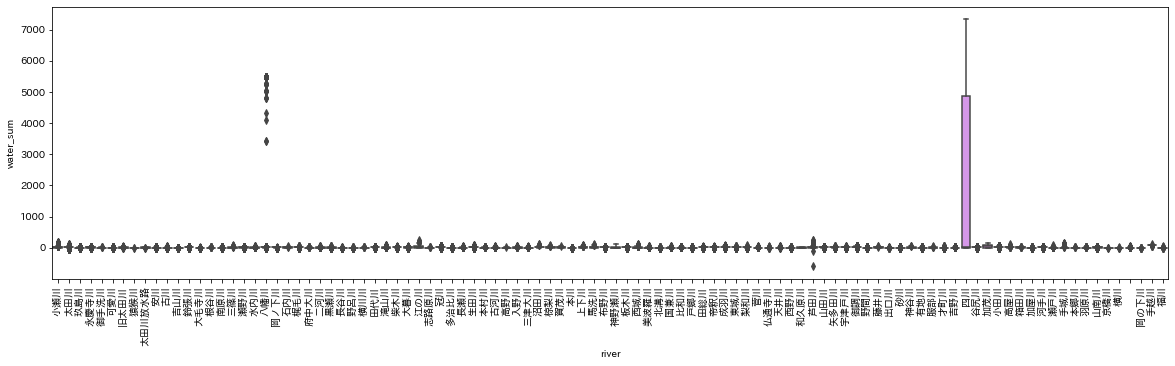

In [8]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

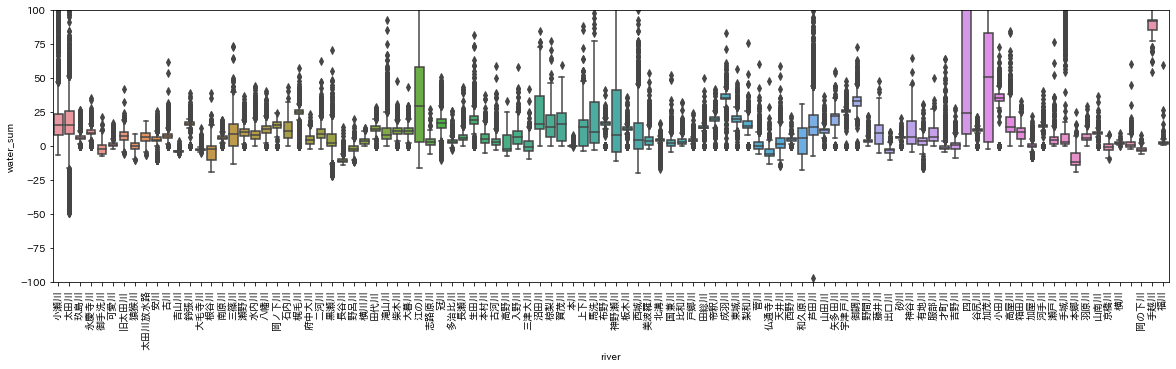

In [9]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

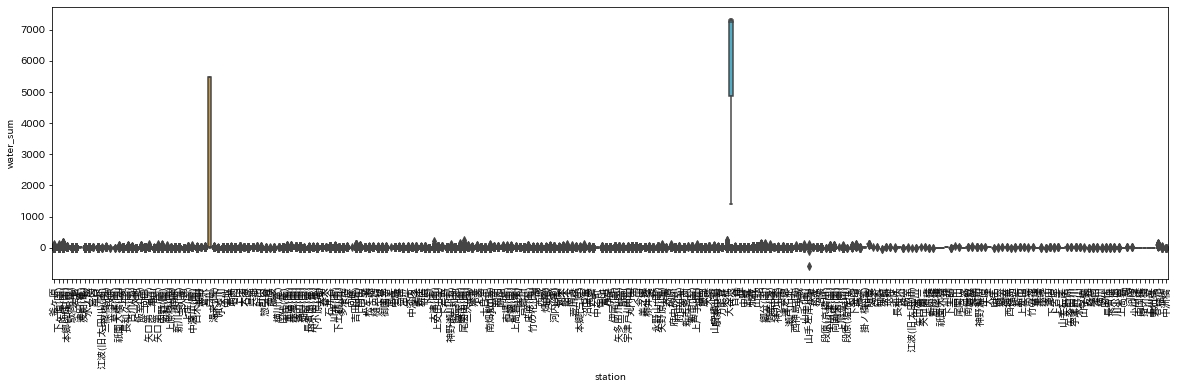

In [10]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

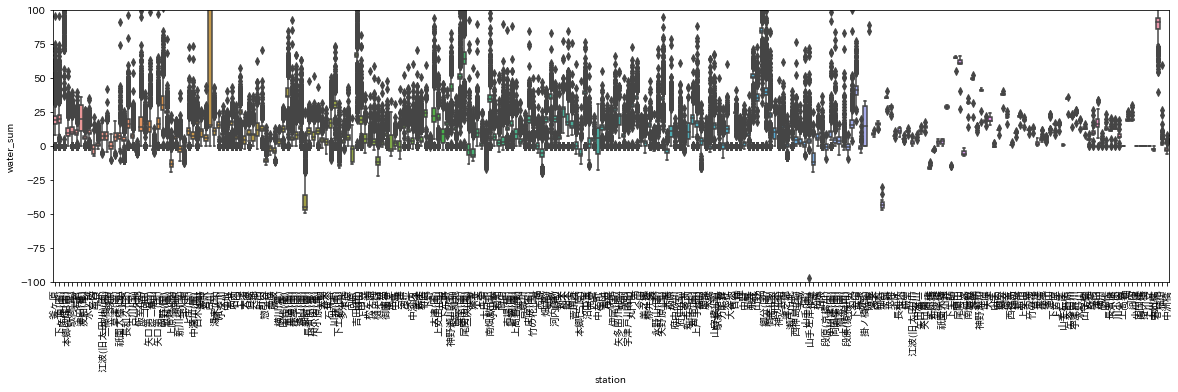

In [11]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

In [12]:
eda_water_data.describe()

,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
count,392066.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392063.000000
mean,1094.817862,2.306785,2.299366,2.275066,2.281411,2.286186,2.283432,2.285574,2.287497,2.295082,2.295695,2.282664,2.285486,2.286224,2.282254,2.271217,2.275475,2.265597,2.278693,2.276737,2.281540,2.290334,2.309045,2.309504,2.305649,54.896705
std,632.508733,21.886215,21.870401,21.791243,21.863007,21.910302,21.895941,21.893927,21.869310,21.875315,21.873893,21.803760,21.836594,21.854108,21.866488,21.861474,21.911499,21.859137,21.907511,21.854689,21.827697,21.831656,21.891874,21.873305,21.847046,521.395317
min,0.000000,-99.990000,-2.040000,-2.050000,-2.060000,-2.130000,-2.150000,-2.040000,-2.040000,-2.050000,-2.050000,-2.050000,-2.090000,-2.060000,-2.060000,-2.070000,-2.080000,-2.080000,-2.060000,-99.990000,-99.990000,-99.980000,-99.980000,-99.980000,-99.980000,-598.750000
25%,547.000000,0.060000,0.060000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.040000,0.030000,0.030000,0.030000,0.020000,0.020000,0.020000,0.030000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.060000,1.750000
50%,1095.000000,0.390000,0.390000,0.380000,0.370000,0.370000,0.370000,0.380000,0.380000,0.380000,0.380000,0.370000,0.370000,0.370000,0.360000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.390000,9.050000
75%,1643.000000,0.760000,0.750000,0.740000,0.730000,0.730000,0.730000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000,0.740000,0.730000,0.730000,0.720000,0.720000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.760000,17.240000
max,2190.000000,305.470000,305.420000,305.370000,305.330000,305.310000,305.300000,305.330000,305.380000,305.390000,305.370000,305.340000,305.300000,305.280000,305.250000,305.240000,305.220000,305.210000,305.230000,305.270000,305.340000,305.390000,305.430000,305.510000,305.520000,7326.790000


In [13]:
eda_water_data[eda_water_data['00:00:00'] >= 100]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
36,0,白川,八幡川,228.04,228.04,228.04,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.75
157,0,大谷池,四川,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.15,305.16,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.73
215,1,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.72
336,1,大谷池,四川,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.60
394,2,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,5472.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391204,2186,大谷池,四川,302.19,302.19,302.19,302.20,302.19,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,7252.76
391383,2187,大谷池,四川,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.21,7252.81
391562,2188,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,7253.04
391741,2189,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.22,302.22,302.22,302.22,302.22,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,7253.37


In [14]:
eda_water_data[eda_water_data['00:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16822,93,山手左岸(国),芦田川,-99.99,0.0,0.03,0.11,0.17,0.18,0.19,0.19,0.17,0.14,0.12,0.13,0.1,0.12,0.11,0.11,0.13,0.12,0.12,0.13,0.13,0.13,0.13,0.13,-97.1


In [15]:
eda_water_data[eda_water_data['23:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16643,92,山手左岸(国),芦田川,0.08,0.06,0.06,0.07,0.08,0.09,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.03,0.02,0.01,0.0,0.0,-99.99,-99.99,-99.98,-99.98,-99.98,-99.98,-598.75


In [16]:
exception_river_list = ['四川', '八幡川', '芦田川']

In [17]:
import itertools
import tqdm
import time

In [18]:
print(water_stations.shape)
stations_info_df = water_stations[water_stations['評価対象'] == 1][['観測所名称', '緯度', '経度']].drop_duplicates()
print(stations_info_df.shape)

(180, 12)
(166, 3)


In [19]:
def calc_rain_place(df):
    
    calc_df = rain_stations[rain_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名称']

In [20]:
def calc_tide_place(df):
    
    calc_df = tide_stations[tide_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名']

In [21]:
def calc_dam_place(df):
    
    calc_df = dam.copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, 'ダム名']

In [22]:
stations_info_df['rain_station'] = stations_info_df.apply(calc_rain_place, axis = 1)

In [23]:
stations_info_df['tide_station'] = stations_info_df.apply(calc_tide_place, axis = 1)

In [24]:
stations_info_df['dam_station'] = stations_info_df.apply(calc_dam_place, axis = 1)

In [25]:
stations_info_df.head()

,観測所名称,緯度,経度,rain_station,tide_station,dam_station
0,多治比,34.681944,132.667222,多治比,広島港,福富ダム
1,南原,34.540556,132.501389,南原(国),広島港,梶毛ダム
2,向原,34.607306,132.703333,向原坂,竹原港,福富ダム
3,上甲立,34.708333,132.739444,下甲立,竹原港,福富ダム
4,上安,34.469306,132.460000,高瀬(国),広島港,梶毛ダム


In [26]:
use_stations = stations_info_df['観測所名称'].unique()

In [27]:
model_data = water_data[water_data['station'].isin(use_stations)].copy()
model_data = model_data.rename(columns = {'station':'water_station'})
for hour in hour_list:
    model_data = model_data.rename(columns = {hour:'water_' + hour})

In [28]:
print(model_data.shape)

model_data = pd.merge(
    model_data,
    stations_info_df[['観測所名称', 'rain_station', 'tide_station', 'dam_station']],
    left_on = 'water_station',
    right_on = '観測所名称',
    how = 'left'
)
print(model_data.shape)

tmp_rain_data = rain_data.copy()
for hour in hour_list:
    tmp_rain_data = tmp_rain_data.rename(columns = {hour:'rain_' + hour})

model_data = pd.merge(
    model_data,
    tmp_rain_data.rename(columns = {'station':'rain_station'}).drop(columns = 'city'),
    left_on = ['rain_station', 'date'],
    right_on = ['rain_station', 'date'],
    how = 'left'
)

del tmp_rain_data

print(model_data.shape)
display(model_data.head())

tmp_tide_data = tide_data.copy()
for hour in hour_list:
    tmp_tide_data = tmp_tide_data.rename(columns = {hour:'tide_' + hour})

model_data = pd.merge(
    model_data,
    tmp_tide_data.rename(columns = {'station':'tide_station'}).drop(columns = 'city'),
    left_on = ['tide_station', 'date'],
    right_on = ['tide_station', 'date'],
    how = 'left'
)

del tmp_tide_data

print(model_data.shape)
display(model_data.head())

model_data = pd.merge(
    model_data,
    dam[[
        'ダム名',
        '完成年月',
        '集水面積_km2',
        '堤体積_千m3', 
        '総貯水容量_千m3', 
        '有効貯水容量_千m3', 
        '型式', 
        '堤高_m',
        '堤頂長_m', 
        '診断結果'
    ]].rename(columns = {'ダム名':'dam_station'}),
    left_on = ['dam_station'],
    right_on = ['dam_station'],
    how = 'left'
)

print(model_data.shape)
display(model_data.head())

(362656, 27)
(362656, 31)
(367359, 55)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(367359, 79)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51


(367359, 88)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C


In [29]:
model_data.columns.to_list()

['date',
 'water_station',
 'river',
 'water_00:00:00',
 'water_01:00:00',
 'water_02:00:00',
 'water_03:00:00',
 'water_04:00:00',
 'water_05:00:00',
 'water_06:00:00',
 'water_07:00:00',
 'water_08:00:00',
 'water_09:00:00',
 'water_10:00:00',
 'water_11:00:00',
 'water_12:00:00',
 'water_13:00:00',
 'water_14:00:00',
 'water_15:00:00',
 'water_16:00:00',
 'water_17:00:00',
 'water_18:00:00',
 'water_19:00:00',
 'water_20:00:00',
 'water_21:00:00',
 'water_22:00:00',
 'water_23:00:00',
 '観測所名称',
 'rain_station',
 'tide_station',
 'dam_station',
 'rain_00:00:00',
 'rain_01:00:00',
 'rain_02:00:00',
 'rain_03:00:00',
 'rain_04:00:00',
 'rain_05:00:00',
 'rain_06:00:00',
 'rain_07:00:00',
 'rain_08:00:00',
 'rain_09:00:00',
 'rain_10:00:00',
 'rain_11:00:00',
 'rain_12:00:00',
 'rain_13:00:00',
 'rain_14:00:00',
 'rain_15:00:00',
 'rain_16:00:00',
 'rain_17:00:00',
 'rain_18:00:00',
 'rain_19:00:00',
 'rain_20:00:00',
 'rain_21:00:00',
 'rain_22:00:00',
 'rain_23:00:00',
 'tide_00:00:00

In [30]:
model_data = model_data.sort_values(['water_station', 'date']).reset_index(drop = True)
model_data.head(1)

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C


In [31]:
for kind_data, hour in itertools.product(['water', 'rain', 'tide'], hour_list):
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].replace({'M':np.nan, '*':np.nan, '-':np.nan, '--':np.nan, '**':np.nan})
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].fillna(model_data[kind_data + '_' + hour].median())
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].astype(float)

In [32]:
for hour in hour_list:
    model_data['target_' + hour] = model_data['water_' + hour].shift(-1)

display(model_data.head(1))

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果,target_00:00:00,target_01:00:00,target_02:00:00,target_03:00:00,target_04:00:00,target_05:00:00,target_06:00:00,target_07:00:00,target_08:00:00,target_09:00:00,target_10:00:00,target_11:00:00,target_12:00:00,target_13:00:00,target_14:00:00,target_15:00:00,target_16:00:00,target_17:00:00,target_18:00:00,target_19:00:00,target_20:00:00,target_21:00:00,target_22:00:00,target_23:00:00
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64


In [33]:
model_data['date'].max()
model_data = model_data[model_data['date'] < model_data['date'].max()]

In [34]:
model_data = model_data[~model_data['river'].isin(exception_river_list)]

In [35]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [36]:
label_cols = [
    'water_station',
    'river',
    '観測所名称',
    'rain_station',
    'tide_station',
    'dam_station',
    '完成年月',
    '型式',
    '診断結果'
]

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in label_cols:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])

In [38]:
model_data.dtypes

date                 int64
water_station        int32
river                int32
water_00:00:00     float64
water_01:00:00     float64
water_02:00:00     float64
water_03:00:00     float64
water_04:00:00     float64
water_05:00:00     float64
water_06:00:00     float64
water_07:00:00     float64
water_08:00:00     float64
water_09:00:00     float64
water_10:00:00     float64
water_11:00:00     float64
water_12:00:00     float64
water_13:00:00     float64
water_14:00:00     float64
water_15:00:00     float64
water_16:00:00     float64
water_17:00:00     float64
water_18:00:00     float64
water_19:00:00     float64
water_20:00:00     float64
water_21:00:00     float64
water_22:00:00     float64
water_23:00:00     float64
観測所名称                int32
rain_station         int32
tide_station         int32
dam_station          int32
rain_00:00:00      float64
rain_01:00:00      float64
rain_02:00:00      float64
rain_03:00:00      float64
rain_04:00:00      float64
rain_05:00:00      float64
r

In [39]:
train = model_data[model_data['date'] <= 1642]
test = model_data[model_data['date'] > 1642]

In [40]:
x_cols = [
#     'water_station',
#     'river',
    'water_00:00:00',
    'water_01:00:00',
    'water_02:00:00',
    'water_03:00:00',
    'water_04:00:00',
    'water_05:00:00',
    'water_06:00:00',
    'water_07:00:00',
    'water_08:00:00',
    'water_09:00:00',
    'water_10:00:00',
    'water_11:00:00',
    'water_12:00:00',
    'water_13:00:00',
    'water_14:00:00',
    'water_15:00:00',
    'water_16:00:00',
    'water_17:00:00',
    'water_18:00:00',
    'water_19:00:00',
    'water_20:00:00',
    'water_21:00:00',
    'water_22:00:00',
    'water_23:00:00',
#     '観測所名称',
#     'rain_station',
#     'tide_station',
#     'dam_station',
#     'rain_00:00:00',
#     'rain_01:00:00',
#     'rain_02:00:00',
#     'rain_03:00:00',
#     'rain_04:00:00',
#     'rain_05:00:00',
#     'rain_06:00:00',
#     'rain_07:00:00',
#     'rain_08:00:00',
#     'rain_09:00:00',
#     'rain_10:00:00',
#     'rain_11:00:00',
#     'rain_12:00:00',
#     'rain_13:00:00',
#     'rain_14:00:00',
#     'rain_15:00:00',
#     'rain_16:00:00',
#     'rain_17:00:00',
#     'rain_18:00:00',
#     'rain_19:00:00',
#     'rain_20:00:00',
#     'rain_21:00:00',
#     'rain_22:00:00',
#     'rain_23:00:00',
#     'tide_00:00:00',
#     'tide_01:00:00',
#     'tide_02:00:00',
#     'tide_03:00:00',
#     'tide_04:00:00',
#     'tide_05:00:00',
#     'tide_06:00:00',
#     'tide_07:00:00',
#     'tide_08:00:00',
#     'tide_09:00:00',
#     'tide_10:00:00',
#     'tide_11:00:00',
#     'tide_12:00:00',
#     'tide_13:00:00',
#     'tide_14:00:00',
#     'tide_15:00:00',
#     'tide_16:00:00',
#     'tide_17:00:00',
#     'tide_18:00:00',
#     'tide_19:00:00',
#     'tide_20:00:00',
#     'tide_21:00:00',
#     'tide_22:00:00',
#     'tide_23:00:00',
#     '完成年月',
#     '集水面積_km2',
#     '堤体積_千m3',
#     '総貯水容量_千m3',
#     '有効貯水容量_千m3',
#     '型式',
#     '堤高_m',
#     '堤頂長_m',
#     '診断結果'
]

y_cols = [ 
    'target_00:00:00',
    'target_01:00:00',
    'target_02:00:00',
    'target_03:00:00',
    'target_04:00:00',
    'target_05:00:00',
    'target_06:00:00',
    'target_07:00:00',
    'target_08:00:00',
    'target_09:00:00',
    'target_10:00:00',
    'target_11:00:00',
    'target_12:00:00',
    'target_13:00:00',
    'target_14:00:00',
    'target_15:00:00',
    'target_16:00:00',
    'target_17:00:00',
    'target_18:00:00',
    'target_19:00:00',
    'target_20:00:00',
    'target_21:00:00',
    'target_22:00:00',
    'target_23:00:00'
]

In [41]:
train_x = train[x_cols]
train_y = train[y_cols]
test_x = test[x_cols]
test_y = test[y_cols]

In [42]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(244246, 24)
(244246, 24)
(81503, 24)
(81503, 24)


In [43]:
from sklearn.linear_model import Ridge

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
import pickle

In [46]:
def objective(trial, train_x, train_y, test_x, test_y):

    params = {
        'objective': 'reg:linear',
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'eval_metric':'rmse',
    }

    model = xgb.XGBRegressor(**params)
    model.fit(train_x, train_y)

    pred = model.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, pred))
    
    print(rmse)
    
    return rmse

In [47]:
rmse_list = []
params_list = []

for target in y_cols:
    
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective(trial,train_x, train_y[target], test_x, test_y[target]), n_trials=100)
    
    model = xgb.XGBRegressor(**study.best_params)
    model.fit(train_x, train_y[target])
    pred = model.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y[target], pred))
    rmse_list.append(rmse)
    
    filename = f'xgb_model_{target[7:9]}.pkl'
    pickle.dump(model, open(filename, 'wb'))
    
    print(f'{target}finished')
    print('*'*80)
    print(rmse)
    print('*'*80)
    print('*'*80)

[I 2022-12-31 17:29:02,108] A new study created in memory with name: no-name-8067d141-e5c5-4779-9297-13b80a756959


[17:29:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:03,648] Trial 0 finished with value: 0.10568705418603465 and parameters: {'max_depth': 7, 'n_estimators': 26, 'learning_rate': 0.2633880537647642}. Best is trial 0 with value: 0.10568705418603465.


0.10568705418603465
[17:29:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:07,222] Trial 1 finished with value: 0.7070655138603054 and parameters: {'max_depth': 7, 'n_estimators': 62, 'learning_rate': 0.0018915356141015298}. Best is trial 0 with value: 0.10568705418603465.


0.7070655138603054
[17:29:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:15,128] Trial 2 finished with value: 0.5160492913829395 and parameters: {'max_depth': 5, 'n_estimators': 221, 'learning_rate': 0.002067881763166143}. Best is trial 0 with value: 0.10568705418603465.


0.5160492913829395
[17:29:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:17,734] Trial 3 finished with value: 0.2852784964022999 and parameters: {'max_depth': 2, 'n_estimators': 156, 'learning_rate': 0.009710409599046866}. Best is trial 0 with value: 0.10568705418603465.


0.2852784964022999
[17:29:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:19,649] Trial 4 finished with value: 0.10058113028877902 and parameters: {'max_depth': 1, 'n_estimators': 177, 'learning_rate': 0.09417395888472738}. Best is trial 4 with value: 0.10058113028877902.


0.10058113028877902
[17:29:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:25,958] Trial 5 finished with value: 0.5173061173363813 and parameters: {'max_depth': 5, 'n_estimators': 174, 'learning_rate': 0.0026104363154343625}. Best is trial 4 with value: 0.10058113028877902.


0.5173061173363813
[17:29:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:28,091] Trial 6 finished with value: 0.35454235698536335 and parameters: {'max_depth': 7, 'n_estimators': 36, 'learning_rate': 0.024205025184591215}. Best is trial 4 with value: 0.10058113028877902.


0.35454235698536335
[17:29:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:28,800] Trial 7 finished with value: 0.775283069876415 and parameters: {'max_depth': 6, 'n_estimators': 13, 'learning_rate': 0.001521674950126985}. Best is trial 4 with value: 0.10058113028877902.


0.775283069876415
[17:29:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:32,036] Trial 8 finished with value: 0.6370366432784339 and parameters: {'max_depth': 2, 'n_estimators': 195, 'learning_rate': 0.0014420293855604476}. Best is trial 4 with value: 0.10058113028877902.


0.6370366432784339
[17:29:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:39,791] Trial 9 finished with value: 0.13377984031180953 and parameters: {'max_depth': 8, 'n_estimators': 118, 'learning_rate': 0.5388297424387423}. Best is trial 4 with value: 0.10058113028877902.


0.13377984031180953
[17:29:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:42,974] Trial 10 finished with value: 0.09931127927121287 and parameters: {'max_depth': 1, 'n_estimators': 288, 'learning_rate': 0.11709757421595604}. Best is trial 10 with value: 0.09931127927121287.


0.09931127927121287
[17:29:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:46,188] Trial 11 finished with value: 0.09948933375229718 and parameters: {'max_depth': 1, 'n_estimators': 295, 'learning_rate': 0.11758716108478716}. Best is trial 10 with value: 0.09931127927121287.


0.09948933375229718
[17:29:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:53,238] Trial 12 finished with value: 0.0997041679618102 and parameters: {'max_depth': 3, 'n_estimators': 300, 'learning_rate': 0.1131428895501866}. Best is trial 10 with value: 0.09931127927121287.


0.0997041679618102
[17:29:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:29:56,523] Trial 13 finished with value: 0.09964132149152166 and parameters: {'max_depth': 1, 'n_estimators': 291, 'learning_rate': 0.049060540908765035}. Best is trial 10 with value: 0.09931127927121287.


0.09964132149152166
[17:29:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:02,528] Trial 14 finished with value: 0.11382727398729624 and parameters: {'max_depth': 3, 'n_estimators': 257, 'learning_rate': 0.7195476690433447}. Best is trial 10 with value: 0.09931127927121287.


0.11382727398729624
[17:30:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:08,222] Trial 15 finished with value: 0.10589717239980498 and parameters: {'max_depth': 3, 'n_estimators': 247, 'learning_rate': 0.25469918052744905}. Best is trial 10 with value: 0.09931127927121287.


0.10589717239980498
[17:30:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:11,206] Trial 16 finished with value: 0.22560276852744698 and parameters: {'max_depth': 1, 'n_estimators': 257, 'learning_rate': 0.017009020874589716}. Best is trial 10 with value: 0.09931127927121287.


0.22560276852744698
[17:30:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:14,653] Trial 17 finished with value: 0.09419761838550915 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.06400410428060448}. Best is trial 17 with value: 0.09419761838550915.


0.09419761838550915
[17:30:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:18,030] Trial 18 finished with value: 0.09370325848837101 and parameters: {'max_depth': 4, 'n_estimators': 105, 'learning_rate': 0.04596639418443175}. Best is trial 18 with value: 0.09370325848837101.


0.09370325848837101
[17:30:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:21,645] Trial 19 finished with value: 0.3274493439147828 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.008946852583515503}. Best is trial 18 with value: 0.09370325848837101.


0.3274493439147828
[17:30:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:24,946] Trial 20 finished with value: 0.09552054400441122 and parameters: {'max_depth': 4, 'n_estimators': 109, 'learning_rate': 0.03857533911896552}. Best is trial 18 with value: 0.09370325848837101.


0.09552054400441122
[17:30:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:27,857] Trial 21 finished with value: 0.09409546438272283 and parameters: {'max_depth': 4, 'n_estimators': 96, 'learning_rate': 0.045908459523576486}. Best is trial 18 with value: 0.09370325848837101.


0.09409546438272283
[17:30:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:30,175] Trial 22 finished with value: 0.1000272595684635 and parameters: {'max_depth': 4, 'n_estimators': 72, 'learning_rate': 0.04867323539491251}. Best is trial 18 with value: 0.09370325848837101.


0.1000272595684635
[17:30:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:35,127] Trial 23 finished with value: 0.20358955071643633 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.01187852501539166}. Best is trial 18 with value: 0.09370325848837101.


0.20358955071643633
[17:30:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:38,878] Trial 24 finished with value: 0.5675049014812555 and parameters: {'max_depth': 6, 'n_estimators': 79, 'learning_rate': 0.004474526013286185}. Best is trial 18 with value: 0.09370325848837101.


0.5675049014812555
[17:30:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:41,629] Trial 25 finished with value: 0.13803193308747094 and parameters: {'max_depth': 4, 'n_estimators': 90, 'learning_rate': 0.024992092786082002}. Best is trial 18 with value: 0.09370325848837101.


0.13803193308747094
[17:30:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:44,903] Trial 26 finished with value: 0.09399991967216675 and parameters: {'max_depth': 3, 'n_estimators': 139, 'learning_rate': 0.058345517511713}. Best is trial 18 with value: 0.09370325848837101.


0.09399991967216675
[17:30:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:47,316] Trial 27 finished with value: 0.10069254031391221 and parameters: {'max_depth': 2, 'n_estimators': 143, 'learning_rate': 0.2566883773460324}. Best is trial 18 with value: 0.09370325848837101.


0.10069254031391221
[17:30:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:48,599] Trial 28 finished with value: 0.10700909060130594 and parameters: {'max_depth': 3, 'n_estimators': 51, 'learning_rate': 0.0652864031932615}. Best is trial 18 with value: 0.09370325848837101.


0.10700909060130594
[17:30:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:53,024] Trial 29 finished with value: 0.10786585786168222 and parameters: {'max_depth': 6, 'n_estimators': 97, 'learning_rate': 0.17323451629431605}. Best is trial 18 with value: 0.09370325848837101.


0.10786585786168222
[17:30:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:30:56,128] Trial 30 finished with value: 0.10511641810020228 and parameters: {'max_depth': 3, 'n_estimators': 131, 'learning_rate': 0.39531115414589607}. Best is trial 18 with value: 0.09370325848837101.


0.10511641810020228
[17:30:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:00,757] Trial 31 finished with value: 0.09716376746903355 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.06984105858162533}. Best is trial 18 with value: 0.09370325848837101.


0.09716376746903355
[17:31:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:02,639] Trial 32 finished with value: 0.17946226764548293 and parameters: {'max_depth': 5, 'n_estimators': 48, 'learning_rate': 0.036392526973201195}. Best is trial 18 with value: 0.09370325848837101.


0.17946226764548293
[17:31:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:05,665] Trial 33 finished with value: 0.19368486835099002 and parameters: {'max_depth': 4, 'n_estimators': 102, 'learning_rate': 0.016350816581669172}. Best is trial 18 with value: 0.09370325848837101.


0.19368486835099002
[17:31:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:08,752] Trial 34 finished with value: 0.09544156443411936 and parameters: {'max_depth': 5, 'n_estimators': 79, 'learning_rate': 0.06794720383561013}. Best is trial 18 with value: 0.09370325848837101.


0.09544156443411936
[17:31:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:10,965] Trial 35 finished with value: 0.09947474033004487 and parameters: {'max_depth': 2, 'n_estimators': 127, 'learning_rate': 0.17398169449541767}. Best is trial 18 with value: 0.09370325848837101.


0.09947474033004487
[17:31:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:15,006] Trial 36 finished with value: 0.09565598707063978 and parameters: {'max_depth': 3, 'n_estimators': 172, 'learning_rate': 0.026629376824162502}. Best is trial 18 with value: 0.09370325848837101.


0.09565598707063978
[17:31:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:20,236] Trial 37 finished with value: 0.09851700962737302 and parameters: {'max_depth': 5, 'n_estimators': 140, 'learning_rate': 0.07942759646481204}. Best is trial 18 with value: 0.09370325848837101.


0.09851700962737302
[17:31:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:26,331] Trial 38 finished with value: 0.22928601814317312 and parameters: {'max_depth': 4, 'n_estimators': 208, 'learning_rate': 0.006910074555198981}. Best is trial 18 with value: 0.09370325848837101.


0.22928601814317312
[17:31:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:29,234] Trial 39 finished with value: 0.14476541096373594 and parameters: {'max_depth': 2, 'n_estimators': 158, 'learning_rate': 0.01923912054639414}. Best is trial 18 with value: 0.09370325848837101.


0.14476541096373594
[17:31:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:31,927] Trial 40 finished with value: 0.10345755472158194 and parameters: {'max_depth': 6, 'n_estimators': 56, 'learning_rate': 0.17131572491974156}. Best is trial 18 with value: 0.09370325848837101.


0.10345755472158194
[17:31:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:35,178] Trial 41 finished with value: 0.09596413416213803 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.05383433566812751}. Best is trial 18 with value: 0.09370325848837101.


0.09596413416213803
[17:31:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:37,677] Trial 42 finished with value: 0.13394207120775156 and parameters: {'max_depth': 5, 'n_estimators': 64, 'learning_rate': 0.03590689432599131}. Best is trial 18 with value: 0.09370325848837101.


0.13394207120775156
[17:31:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:38,442] Trial 43 finished with value: 0.15272677336877796 and parameters: {'max_depth': 4, 'n_estimators': 22, 'learning_rate': 0.09024896997327775}. Best is trial 18 with value: 0.09370325848837101.


0.15272677336877796
[17:31:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:41,257] Trial 44 finished with value: 0.09373379216153206 and parameters: {'max_depth': 3, 'n_estimators': 120, 'learning_rate': 0.06078125159070655}. Best is trial 18 with value: 0.09370325848837101.


0.09373379216153206
[17:31:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:43,980] Trial 45 finished with value: 0.09364616345698921 and parameters: {'max_depth': 3, 'n_estimators': 117, 'learning_rate': 0.048731779379901884}. Best is trial 45 with value: 0.09364616345698921.


0.09364616345698921
[17:31:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:47,899] Trial 46 finished with value: 0.0936988414118332 and parameters: {'max_depth': 3, 'n_estimators': 173, 'learning_rate': 0.04065784850530947}. Best is trial 45 with value: 0.09364616345698921.


0.0936988414118332
[17:31:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:52,116] Trial 47 finished with value: 0.0938640054765164 and parameters: {'max_depth': 3, 'n_estimators': 187, 'learning_rate': 0.028464461946630864}. Best is trial 45 with value: 0.09364616345698921.


0.0938640054765164
[17:31:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:31:55,078] Trial 48 finished with value: 0.10222229078344075 and parameters: {'max_depth': 2, 'n_estimators': 180, 'learning_rate': 0.029438171365550672}. Best is trial 45 with value: 0.09364616345698921.


0.10222229078344075
[17:31:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:00,131] Trial 49 finished with value: 0.09487493135049568 and parameters: {'max_depth': 3, 'n_estimators': 222, 'learning_rate': 0.02208563032421383}. Best is trial 45 with value: 0.09364616345698921.


0.09487493135049568
[17:32:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:04,333] Trial 50 finished with value: 0.15640417163242196 and parameters: {'max_depth': 3, 'n_estimators': 186, 'learning_rate': 0.011793851774252295}. Best is trial 45 with value: 0.09364616345698921.


0.15640417163242196
[17:32:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:07,144] Trial 51 finished with value: 0.09724146259640119 and parameters: {'max_depth': 2, 'n_estimators': 165, 'learning_rate': 0.11056259028724813}. Best is trial 45 with value: 0.09364616345698921.


0.09724146259640119
[17:32:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:11,625] Trial 52 finished with value: 0.09355429005709694 and parameters: {'max_depth': 3, 'n_estimators': 198, 'learning_rate': 0.03130972001113598}. Best is trial 52 with value: 0.09355429005709694.


0.09355429005709694
[17:32:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:16,183] Trial 53 finished with value: 0.09370890946172541 and parameters: {'max_depth': 3, 'n_estimators': 203, 'learning_rate': 0.032230587975708457}. Best is trial 52 with value: 0.09355429005709694.


0.09370890946172541
[17:32:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:19,614] Trial 54 finished with value: 0.09583384044602382 and parameters: {'max_depth': 2, 'n_estimators': 210, 'learning_rate': 0.04208554644150354}. Best is trial 52 with value: 0.09355429005709694.


0.09583384044602382
[17:32:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:24,137] Trial 55 finished with value: 0.1287625594955829 and parameters: {'max_depth': 3, 'n_estimators': 201, 'learning_rate': 0.013238608112293666}. Best is trial 52 with value: 0.09355429005709694.


0.1287625594955829
[17:32:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:39,380] Trial 56 finished with value: 0.11879224879044972 and parameters: {'max_depth': 8, 'n_estimators': 236, 'learning_rate': 0.13659236551244788}. Best is trial 52 with value: 0.09355429005709694.


0.11879224879044972
[17:32:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:42,173] Trial 57 finished with value: 0.09942984173744582 and parameters: {'max_depth': 3, 'n_estimators': 118, 'learning_rate': 0.0338800539406386}. Best is trial 52 with value: 0.09355429005709694.


0.09942984173744582
[17:32:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:47,356] Trial 58 finished with value: 0.0979949227557934 and parameters: {'max_depth': 3, 'n_estimators': 225, 'learning_rate': 0.01862039979524768}. Best is trial 52 with value: 0.09355429005709694.


0.0979949227557934
[17:32:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:49,938] Trial 59 finished with value: 0.09660773776490074 and parameters: {'max_depth': 2, 'n_estimators': 150, 'learning_rate': 0.08725966487677307}. Best is trial 52 with value: 0.09355429005709694.


0.09660773776490074
[17:32:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:55,078] Trial 60 finished with value: 0.09464057312570609 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.04668634223910694}. Best is trial 52 with value: 0.09355429005709694.


0.09464057312570609
[17:32:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:32:59,554] Trial 61 finished with value: 0.09396983479569003 and parameters: {'max_depth': 3, 'n_estimators': 190, 'learning_rate': 0.0292440522165406}. Best is trial 52 with value: 0.09355429005709694.


0.09396983479569003
[17:32:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:04,237] Trial 62 finished with value: 0.0950192918008011 and parameters: {'max_depth': 3, 'n_estimators': 197, 'learning_rate': 0.02442608857485943}. Best is trial 52 with value: 0.09355429005709694.


0.0950192918008011
[17:33:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:07,355] Trial 63 finished with value: 0.09582755141157556 and parameters: {'max_depth': 2, 'n_estimators': 183, 'learning_rate': 0.04972228586785022}. Best is trial 52 with value: 0.09355429005709694.


0.09582755141157556
[17:33:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:12,212] Trial 64 finished with value: 0.09375504078555699 and parameters: {'max_depth': 3, 'n_estimators': 211, 'learning_rate': 0.03895616090249895}. Best is trial 52 with value: 0.09355429005709694.


0.09375504078555699
[17:33:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:17,025] Trial 65 finished with value: 0.09409244926669878 and parameters: {'max_depth': 3, 'n_estimators': 211, 'learning_rate': 0.03705522689064253}. Best is trial 52 with value: 0.09355429005709694.


0.09409244926669878
[17:33:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:23,837] Trial 66 finished with value: 0.09910792518035424 and parameters: {'max_depth': 4, 'n_estimators': 234, 'learning_rate': 0.05869540349975379}. Best is trial 52 with value: 0.09355429005709694.


0.09910792518035424
[17:33:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:26,771] Trial 67 finished with value: 0.12472499085175855 and parameters: {'max_depth': 3, 'n_estimators': 126, 'learning_rate': 0.021799630754691154}. Best is trial 52 with value: 0.09355429005709694.


0.12472499085175855
[17:33:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:29,458] Trial 68 finished with value: 0.09914590666281388 and parameters: {'max_depth': 1, 'n_estimators': 244, 'learning_rate': 0.07650108138259955}. Best is trial 52 with value: 0.09355429005709694.


0.09914590666281388
[17:33:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:33,915] Trial 69 finished with value: 0.11878151305728364 and parameters: {'max_depth': 2, 'n_estimators': 266, 'learning_rate': 0.01483392367479927}. Best is trial 52 with value: 0.09355429005709694.


0.11878151305728364
[17:33:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:38,278] Trial 70 finished with value: 0.1002187117930236 and parameters: {'max_depth': 4, 'n_estimators': 147, 'learning_rate': 0.10366956401687406}. Best is trial 52 with value: 0.09355429005709694.


0.1002187117930236
[17:33:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:42,916] Trial 71 finished with value: 0.09383022247121812 and parameters: {'max_depth': 3, 'n_estimators': 201, 'learning_rate': 0.0305625169315182}. Best is trial 52 with value: 0.09355429005709694.


0.09383022247121812
[17:33:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:47,601] Trial 72 finished with value: 0.09473303108198144 and parameters: {'max_depth': 3, 'n_estimators': 204, 'learning_rate': 0.046556441705370155}. Best is trial 52 with value: 0.09355429005709694.


0.09473303108198144
[17:33:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:52,592] Trial 73 finished with value: 0.0942573365209352 and parameters: {'max_depth': 3, 'n_estimators': 214, 'learning_rate': 0.039933831360689925}. Best is trial 52 with value: 0.09355429005709694.


0.0942573365209352
[17:33:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:55,018] Trial 74 finished with value: 0.10570298657031546 and parameters: {'max_depth': 3, 'n_estimators': 103, 'learning_rate': 0.033705437038588276}. Best is trial 52 with value: 0.09355429005709694.


0.10570298657031546
[17:33:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:33:59,820] Trial 75 finished with value: 0.10191059322361803 and parameters: {'max_depth': 4, 'n_estimators': 160, 'learning_rate': 0.135918773930625}. Best is trial 52 with value: 0.09355429005709694.


0.10191059322361803
[17:33:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:04,219] Trial 76 finished with value: 0.21316806677480196 and parameters: {'max_depth': 3, 'n_estimators': 195, 'learning_rate': 0.008430347060417096}. Best is trial 52 with value: 0.09355429005709694.


0.21316806677480196
[17:34:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:07,273] Trial 77 finished with value: 0.09553513337822127 and parameters: {'max_depth': 2, 'n_estimators': 175, 'learning_rate': 0.058924687050754494}. Best is trial 52 with value: 0.09355429005709694.


0.09553513337822127
[17:34:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:13,926] Trial 78 finished with value: 0.0937060591971397 and parameters: {'max_depth': 4, 'n_estimators': 219, 'learning_rate': 0.021456528677218926}. Best is trial 52 with value: 0.09355429005709694.


0.0937060591971397
[17:34:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:20,505] Trial 79 finished with value: 0.0937631235140794 and parameters: {'max_depth': 4, 'n_estimators': 224, 'learning_rate': 0.021710586576492653}. Best is trial 52 with value: 0.09355429005709694.


0.0937631235140794
[17:34:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:35,718] Trial 80 finished with value: 0.41064246776476626 and parameters: {'max_depth': 7, 'n_estimators': 266, 'learning_rate': 0.002674763464364348}. Best is trial 52 with value: 0.09355429005709694.


0.41064246776476626
[17:34:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:42,645] Trial 81 finished with value: 0.09343558276641245 and parameters: {'max_depth': 4, 'n_estimators': 230, 'learning_rate': 0.02275448228296996}. Best is trial 81 with value: 0.09343558276641245.


0.09343558276641245
[17:34:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:46,195] Trial 82 finished with value: 0.11078738206059324 and parameters: {'max_depth': 4, 'n_estimators': 117, 'learning_rate': 0.024897476778326173}. Best is trial 81 with value: 0.09343558276641245.


0.11078738206059324
[17:34:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:34:52,950] Trial 83 finished with value: 0.09449812457237092 and parameters: {'max_depth': 4, 'n_estimators': 228, 'learning_rate': 0.019804654249278603}. Best is trial 81 with value: 0.09343558276641245.


0.09449812457237092
[17:34:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:00,338] Trial 84 finished with value: 0.09983579892745086 and parameters: {'max_depth': 4, 'n_estimators': 245, 'learning_rate': 0.014752537217778158}. Best is trial 81 with value: 0.09343558276641245.


0.09983579892745086
[17:35:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:07,199] Trial 85 finished with value: 0.09522648639107544 and parameters: {'max_depth': 4, 'n_estimators': 232, 'learning_rate': 0.04249475079356595}. Best is trial 81 with value: 0.09343558276641245.


0.09522648639107544
[17:35:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:15,143] Trial 86 finished with value: 0.09885218210955775 and parameters: {'max_depth': 5, 'n_estimators': 216, 'learning_rate': 0.07056786507762011}. Best is trial 81 with value: 0.09343558276641245.


0.09885218210955775
[17:35:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:17,676] Trial 87 finished with value: 0.18679089673215898 and parameters: {'max_depth': 3, 'n_estimators': 107, 'learning_rate': 0.017312949067826027}. Best is trial 81 with value: 0.09343558276641245.


0.18679089673215898
[17:35:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:22,663] Trial 88 finished with value: 0.09638512432970188 and parameters: {'max_depth': 3, 'n_estimators': 217, 'learning_rate': 0.054811340517911984}. Best is trial 81 with value: 0.09343558276641245.


0.09638512432970188
[17:35:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:25,360] Trial 89 finished with value: 0.31721706205243194 and parameters: {'max_depth': 4, 'n_estimators': 90, 'learning_rate': 0.011350022800230914}. Best is trial 81 with value: 0.09343558276641245.


0.31721706205243194
[17:35:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:29,694] Trial 90 finished with value: 0.1304133708396628 and parameters: {'max_depth': 3, 'n_estimators': 191, 'learning_rate': 0.9045875754251234}. Best is trial 81 with value: 0.09343558276641245.


0.1304133708396628
[17:35:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:36,201] Trial 91 finished with value: 0.09356968092550393 and parameters: {'max_depth': 4, 'n_estimators': 220, 'learning_rate': 0.022185036745340694}. Best is trial 81 with value: 0.09343558276641245.


0.09356968092550393
[17:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:43,906] Trial 92 finished with value: 0.09448723126023514 and parameters: {'max_depth': 4, 'n_estimators': 252, 'learning_rate': 0.03199711512300574}. Best is trial 81 with value: 0.09343558276641245.


0.09448723126023514
[17:35:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:51,960] Trial 93 finished with value: 0.09650913172395156 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.04343078168069204}. Best is trial 81 with value: 0.09343558276641245.


0.09650913172395156
[17:35:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:35:57,954] Trial 94 finished with value: 0.64722970807687 and parameters: {'max_depth': 4, 'n_estimators': 207, 'learning_rate': 0.0010388808205652794}. Best is trial 81 with value: 0.09343558276641245.


0.64722970807687
[17:35:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:02,049] Trial 95 finished with value: 0.09551085308786841 and parameters: {'max_depth': 3, 'n_estimators': 177, 'learning_rate': 0.0264099525447807}. Best is trial 81 with value: 0.09343558276641245.


0.09551085308786841
[17:36:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:09,211] Trial 96 finished with value: 0.09530142161415264 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.036383254288800314}. Best is trial 81 with value: 0.09343558276641245.


0.09530142161415264
[17:36:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:12,165] Trial 97 finished with value: 0.12833432512217072 and parameters: {'max_depth': 3, 'n_estimators': 127, 'learning_rate': 0.020959888509228745}. Best is trial 81 with value: 0.09343558276641245.


0.12833432512217072
[17:36:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:18,025] Trial 98 finished with value: 0.09622872630470773 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.05107742972921928}. Best is trial 81 with value: 0.09343558276641245.


0.09622872630470773
[17:36:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:21,218] Trial 99 finished with value: 0.09439033137129348 and parameters: {'max_depth': 3, 'n_estimators': 137, 'learning_rate': 0.0629859311785993}. Best is trial 81 with value: 0.09343558276641245.


0.09439033137129348


[I 2022-12-31 17:36:28,068] A new study created in memory with name: no-name-9dd372a3-fe69-49ab-8208-b8b540260564


target_00:00:00finished
********************************************************************************
0.09343558276641245
********************************************************************************
********************************************************************************
[17:36:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:36,202] Trial 0 finished with value: 0.658285678344871 and parameters: {'max_depth': 7, 'n_estimators': 137, 'learning_rate': 0.001392339369734937}. Best is trial 0 with value: 0.658285678344871.


0.658285678344871
[17:36:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:44,565] Trial 1 finished with value: 0.3508036991546687 and parameters: {'max_depth': 5, 'n_estimators': 211, 'learning_rate': 0.004251134718581742}. Best is trial 1 with value: 0.3508036991546687.


0.3508036991546687
[17:36:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:55,280] Trial 2 finished with value: 0.5379378172358652 and parameters: {'max_depth': 5, 'n_estimators': 288, 'learning_rate': 0.0014277633419185743}. Best is trial 1 with value: 0.3508036991546687.


0.5379378172358652
[17:36:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:56,225] Trial 3 finished with value: 0.29318347900345837 and parameters: {'max_depth': 8, 'n_estimators': 12, 'learning_rate': 0.0894797665604814}. Best is trial 3 with value: 0.29318347900345837.


0.29318347900345837
[17:36:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:36:56,822] Trial 4 finished with value: 0.3702938563176458 and parameters: {'max_depth': 2, 'n_estimators': 29, 'learning_rate': 0.03775221612369619}. Best is trial 3 with value: 0.29318347900345837.


0.3702938563176458
[17:36:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:03,139] Trial 5 finished with value: 0.11093556071120703 and parameters: {'max_depth': 7, 'n_estimators': 114, 'learning_rate': 0.13122956002450337}. Best is trial 5 with value: 0.11093556071120703.


0.11093556071120703
[17:37:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:04,004] Trial 6 finished with value: 0.5942771066996841 and parameters: {'max_depth': 1, 'n_estimators': 62, 'learning_rate': 0.011048126353987208}. Best is trial 5 with value: 0.11093556071120703.


0.5942771066996841
[17:37:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:08,737] Trial 7 finished with value: 0.7021977201586105 and parameters: {'max_depth': 6, 'n_estimators': 101, 'learning_rate': 0.0012034272387361584}. Best is trial 5 with value: 0.11093556071120703.


0.7021977201586105
[17:37:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:10,499] Trial 8 finished with value: 0.11382982767329552 and parameters: {'max_depth': 5, 'n_estimators': 45, 'learning_rate': 0.49138425401143626}. Best is trial 5 with value: 0.11093556071120703.


0.11382982767329552
[17:37:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:16,579] Trial 9 finished with value: 0.4796941306643319 and parameters: {'max_depth': 3, 'n_estimators': 263, 'learning_rate': 0.002204156850258007}. Best is trial 5 with value: 0.11093556071120703.


0.4796941306643319
[17:37:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:28,783] Trial 10 finished with value: 0.1392815643152267 and parameters: {'max_depth': 8, 'n_estimators': 184, 'learning_rate': 0.6359837882118183}. Best is trial 5 with value: 0.11093556071120703.


0.1392815643152267
[17:37:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:31,484] Trial 11 finished with value: 0.1136932143754374 and parameters: {'max_depth': 4, 'n_estimators': 89, 'learning_rate': 0.4121970815929779}. Best is trial 5 with value: 0.11093556071120703.


0.1136932143754374
[17:37:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:34,086] Trial 12 finished with value: 0.10600311591440933 and parameters: {'max_depth': 3, 'n_estimators': 112, 'learning_rate': 0.15217297515291606}. Best is trial 12 with value: 0.10600311591440933.


0.10600311591440933
[17:37:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:37,273] Trial 13 finished with value: 0.10713146635282789 and parameters: {'max_depth': 3, 'n_estimators': 137, 'learning_rate': 0.14059956549240446}. Best is trial 12 with value: 0.10600311591440933.


0.10713146635282789
[17:37:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:41,162] Trial 14 finished with value: 0.10580836251307968 and parameters: {'max_depth': 3, 'n_estimators': 165, 'learning_rate': 0.14636192055389952}. Best is trial 14 with value: 0.10580836251307968.


0.10580836251307968
[17:37:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:43,374] Trial 15 finished with value: 0.19947809053305854 and parameters: {'max_depth': 1, 'n_estimators': 187, 'learning_rate': 0.028374037692584432}. Best is trial 14 with value: 0.10580836251307968.


0.19947809053305854
[17:37:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:48,651] Trial 16 finished with value: 0.10664538905202378 and parameters: {'max_depth': 3, 'n_estimators': 230, 'learning_rate': 0.23998966335959943}. Best is trial 14 with value: 0.10580836251307968.


0.10664538905202378
[17:37:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:51,423] Trial 17 finished with value: 0.1139270118682536 and parameters: {'max_depth': 2, 'n_estimators': 162, 'learning_rate': 0.06716302500230836}. Best is trial 14 with value: 0.10580836251307968.


0.1139270118682536
[17:37:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:53,902] Trial 18 finished with value: 0.21222822462110227 and parameters: {'max_depth': 4, 'n_estimators': 80, 'learning_rate': 0.01985033011125502}. Best is trial 14 with value: 0.10580836251307968.


0.21222822462110227
[17:37:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:37:56,133] Trial 19 finished with value: 0.1121208520370378 and parameters: {'max_depth': 2, 'n_estimators': 128, 'learning_rate': 0.21607225610988073}. Best is trial 14 with value: 0.10580836251307968.


0.1121208520370378
[17:37:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:01,230] Trial 20 finished with value: 0.14210951352041087 and parameters: {'max_depth': 4, 'n_estimators': 166, 'learning_rate': 0.9944368252322945}. Best is trial 14 with value: 0.10580836251307968.


0.14210951352041087
[17:38:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:06,401] Trial 21 finished with value: 0.10783931289548912 and parameters: {'max_depth': 3, 'n_estimators': 228, 'learning_rate': 0.2594844230107467}. Best is trial 14 with value: 0.10580836251307968.


0.10783931289548912
[17:38:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:12,100] Trial 22 finished with value: 0.10563677878287184 and parameters: {'max_depth': 3, 'n_estimators': 251, 'learning_rate': 0.05610542842605351}. Best is trial 22 with value: 0.10563677878287184.


0.10563677878287184
[17:38:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:16,390] Trial 23 finished with value: 0.11091086652186194 and parameters: {'max_depth': 2, 'n_estimators': 261, 'learning_rate': 0.06422146734962643}. Best is trial 22 with value: 0.10563677878287184.


0.11091086652186194
[17:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:23,225] Trial 24 finished with value: 0.10656859925957249 and parameters: {'max_depth': 3, 'n_estimators': 300, 'learning_rate': 0.046305747449946734}. Best is trial 22 with value: 0.10563677878287184.


0.10656859925957249
[17:38:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:29,493] Trial 25 finished with value: 0.12229031885583468 and parameters: {'max_depth': 4, 'n_estimators': 208, 'learning_rate': 0.0141210295270479}. Best is trial 22 with value: 0.10563677878287184.


0.12229031885583468
[17:38:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:32,439] Trial 26 finished with value: 0.11995768821893765 and parameters: {'max_depth': 1, 'n_estimators': 265, 'learning_rate': 0.11633924142842784}. Best is trial 22 with value: 0.10563677878287184.


0.11995768821893765
[17:38:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:35,494] Trial 27 finished with value: 0.11024849000418663 and parameters: {'max_depth': 2, 'n_estimators': 182, 'learning_rate': 0.1743729678100971}. Best is trial 22 with value: 0.10563677878287184.


0.11024849000418663
[17:38:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:37,156] Trial 28 finished with value: 0.4959382923242467 and parameters: {'max_depth': 3, 'n_estimators': 69, 'learning_rate': 0.007800513193537353}. Best is trial 22 with value: 0.10563677878287184.


0.4959382923242467
[17:38:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:43,909] Trial 29 finished with value: 0.11681867675255422 and parameters: {'max_depth': 6, 'n_estimators': 145, 'learning_rate': 0.3241070328519061}. Best is trial 22 with value: 0.10563677878287184.


0.11681867675255422
[17:38:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:47,327] Trial 30 finished with value: 0.10241583768880859 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.07435307668445877}. Best is trial 30 with value: 0.10241583768880859.


0.10241583768880859
[17:38:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:50,788] Trial 31 finished with value: 0.10211411702231883 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.0695307022368856}. Best is trial 31 with value: 0.10211411702231883.


0.10211411702231883
[17:38:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:54,733] Trial 32 finished with value: 0.10199993741869529 and parameters: {'max_depth': 4, 'n_estimators': 126, 'learning_rate': 0.060336548349285334}. Best is trial 32 with value: 0.10199993741869529.


0.10199993741869529
[17:38:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:38:59,270] Trial 33 finished with value: 0.10888471185664195 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.029340223399350853}. Best is trial 32 with value: 0.10199993741869529.


0.10888471185664195
[17:38:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:03,270] Trial 34 finished with value: 0.10090454578232443 and parameters: {'max_depth': 5, 'n_estimators': 100, 'learning_rate': 0.05919091034697148}. Best is trial 34 with value: 0.10090454578232443.


0.10090454578232443
[17:39:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:07,788] Trial 35 finished with value: 0.10454683674266882 and parameters: {'max_depth': 6, 'n_estimators': 96, 'learning_rate': 0.0858319857563474}. Best is trial 34 with value: 0.10090454578232443.


0.10454683674266882
[17:39:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:09,655] Trial 36 finished with value: 0.3389707861128491 and parameters: {'max_depth': 5, 'n_estimators': 47, 'learning_rate': 0.019803612819799112}. Best is trial 34 with value: 0.10090454578232443.


0.3389707861128491
[17:39:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:15,153] Trial 37 finished with value: 0.10067947037908954 and parameters: {'max_depth': 5, 'n_estimators': 145, 'learning_rate': 0.038806055312901426}. Best is trial 37 with value: 0.10067947037908954.


0.10067947037908954
[17:39:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:20,699] Trial 38 finished with value: 0.10168604703573722 and parameters: {'max_depth': 5, 'n_estimators': 146, 'learning_rate': 0.03508731576030982}. Best is trial 37 with value: 0.10067947037908954.


0.10168604703573722
[17:39:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:29,342] Trial 39 finished with value: 0.3166761981384374 and parameters: {'max_depth': 7, 'n_estimators': 146, 'learning_rate': 0.006979427116701258}. Best is trial 37 with value: 0.10067947037908954.


0.3166761981384374
[17:39:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:35,880] Trial 40 finished with value: 0.10462457304411328 and parameters: {'max_depth': 6, 'n_estimators': 134, 'learning_rate': 0.03531141802282576}. Best is trial 37 with value: 0.10067947037908954.


0.10462457304411328
[17:39:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:39,785] Trial 41 finished with value: 0.10205283323493239 and parameters: {'max_depth': 5, 'n_estimators': 101, 'learning_rate': 0.04550912826986091}. Best is trial 37 with value: 0.10067947037908954.


0.10205283323493239
[17:39:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:42,792] Trial 42 finished with value: 0.20198087543641982 and parameters: {'max_depth': 5, 'n_estimators': 79, 'learning_rate': 0.020494788550152854}. Best is trial 37 with value: 0.10067947037908954.


0.20198087543641982
[17:39:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:46,653] Trial 43 finished with value: 0.10311652244572951 and parameters: {'max_depth': 5, 'n_estimators': 101, 'learning_rate': 0.04290445115933726}. Best is trial 37 with value: 0.10067947037908954.


0.10311652244572951
[17:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:52,472] Trial 44 finished with value: 0.10930686970889804 and parameters: {'max_depth': 6, 'n_estimators': 125, 'learning_rate': 0.10114828699775706}. Best is trial 37 with value: 0.10067947037908954.


0.10930686970889804
[17:39:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:39:58,427] Trial 45 finished with value: 0.10023531197371773 and parameters: {'max_depth': 5, 'n_estimators': 150, 'learning_rate': 0.048689548320275014}. Best is trial 45 with value: 0.10023531197371773.


0.10023531197371773
[17:39:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:07,450] Trial 46 finished with value: 0.10922954090042394 and parameters: {'max_depth': 7, 'n_estimators': 146, 'learning_rate': 0.025838758058820955}. Best is trial 45 with value: 0.10023531197371773.


0.10922954090042394
[17:40:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:15,609] Trial 47 finished with value: 0.1051070227164013 and parameters: {'max_depth': 6, 'n_estimators': 176, 'learning_rate': 0.051392226582034024}. Best is trial 45 with value: 0.10023531197371773.


0.1051070227164013
[17:40:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:23,417] Trial 48 finished with value: 0.1487429507585782 and parameters: {'max_depth': 5, 'n_estimators': 197, 'learning_rate': 0.011113034718837976}. Best is trial 45 with value: 0.10023531197371773.


0.1487429507585782
[17:40:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:33,464] Trial 49 finished with value: 0.4642194216226362 and parameters: {'max_depth': 7, 'n_estimators': 155, 'learning_rate': 0.0037021503438687954}. Best is trial 45 with value: 0.10023531197371773.


0.4642194216226362
[17:40:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:40,013] Trial 50 finished with value: 0.13513428909666114 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.015855707861800752}. Best is trial 45 with value: 0.10023531197371773.


0.13513428909666114
[17:40:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:44,286] Trial 51 finished with value: 0.10563737834911485 and parameters: {'max_depth': 5, 'n_estimators': 102, 'learning_rate': 0.03771865381527766}. Best is trial 45 with value: 0.10023531197371773.


0.10563737834911485
[17:40:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:49,780] Trial 52 finished with value: 0.1047795525289433 and parameters: {'max_depth': 4, 'n_estimators': 137, 'learning_rate': 0.09948043348037354}. Best is trial 45 with value: 0.10023531197371773.


0.1047795525289433
[17:40:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:53,596] Trial 53 finished with value: 0.14409365981710964 and parameters: {'max_depth': 5, 'n_estimators': 85, 'learning_rate': 0.02642554350845842}. Best is trial 45 with value: 0.10023531197371773.


0.14409365981710964
[17:40:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:40:56,879] Trial 54 finished with value: 0.11958540423549421 and parameters: {'max_depth': 6, 'n_estimators': 56, 'learning_rate': 0.04970259360893931}. Best is trial 45 with value: 0.10023531197371773.


0.11958540423549421
[17:40:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:02,618] Trial 55 finished with value: 0.1033240897337855 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.03557031465476028}. Best is trial 45 with value: 0.10023531197371773.


0.1033240897337855
[17:41:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:03,418] Trial 56 finished with value: 0.2976809704751529 and parameters: {'max_depth': 6, 'n_estimators': 12, 'learning_rate': 0.08774166993272722}. Best is trial 45 with value: 0.10023531197371773.


0.2976809704751529
[17:41:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:08,674] Trial 57 finished with value: 0.10057236637961578 and parameters: {'max_depth': 5, 'n_estimators': 122, 'learning_rate': 0.0578333879508773}. Best is trial 45 with value: 0.10023531197371773.


0.10057236637961578
[17:41:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:14,067] Trial 58 finished with value: 0.10145925716998001 and parameters: {'max_depth': 5, 'n_estimators': 127, 'learning_rate': 0.062128093573969236}. Best is trial 45 with value: 0.10023531197371773.


0.10145925716998001
[17:41:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:19,475] Trial 59 finished with value: 0.10589333195126968 and parameters: {'max_depth': 5, 'n_estimators': 136, 'learning_rate': 0.11329716819940282}. Best is trial 45 with value: 0.10023531197371773.


0.10589333195126968
[17:41:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:27,390] Trial 60 finished with value: 0.10452156686273469 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.020486062185516848}. Best is trial 45 with value: 0.10023531197371773.


0.10452156686273469
[17:41:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:31,224] Trial 61 finished with value: 0.10227481791855683 and parameters: {'max_depth': 4, 'n_estimators': 120, 'learning_rate': 0.05954261780465613}. Best is trial 45 with value: 0.10023531197371773.


0.10227481791855683
[17:41:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:38,080] Trial 62 finished with value: 0.10229201860077533 and parameters: {'max_depth': 5, 'n_estimators': 162, 'learning_rate': 0.07158922626600148}. Best is trial 45 with value: 0.10023531197371773.


0.10229201860077533
[17:41:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:41,996] Trial 63 finished with value: 0.11357914462798373 and parameters: {'max_depth': 4, 'n_estimators': 109, 'learning_rate': 0.030674699986165746}. Best is trial 45 with value: 0.10023531197371773.


0.11357914462798373
[17:41:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:48,659] Trial 64 finished with value: 0.11032008694542 and parameters: {'max_depth': 6, 'n_estimators': 127, 'learning_rate': 0.16554124821364036}. Best is trial 45 with value: 0.10023531197371773.


0.11032008694542
[17:41:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:53,340] Trial 65 finished with value: 0.10309198854572246 and parameters: {'max_depth': 4, 'n_estimators': 146, 'learning_rate': 0.05535682108784484}. Best is trial 45 with value: 0.10023531197371773.


0.10309198854572246
[17:41:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:41:59,510] Trial 66 finished with value: 0.10344243080573641 and parameters: {'max_depth': 5, 'n_estimators': 155, 'learning_rate': 0.07974518280708824}. Best is trial 45 with value: 0.10023531197371773.


0.10344243080573641
[17:41:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:03,191] Trial 67 finished with value: 0.10663811158003805 and parameters: {'max_depth': 5, 'n_estimators': 90, 'learning_rate': 0.04046398435314649}. Best is trial 45 with value: 0.10023531197371773.


0.10663811158003805
[17:42:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:07,224] Trial 68 finished with value: 0.11944755722165942 and parameters: {'max_depth': 4, 'n_estimators': 127, 'learning_rate': 0.02398448027989583}. Best is trial 45 with value: 0.10023531197371773.


0.11944755722165942
[17:42:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:15,925] Trial 69 finished with value: 0.12316999762212928 and parameters: {'max_depth': 6, 'n_estimators': 174, 'learning_rate': 0.015646754048886744}. Best is trial 45 with value: 0.10023531197371773.


0.12316999762212928
[17:42:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:18,860] Trial 70 finished with value: 0.10282727092113204 and parameters: {'max_depth': 5, 'n_estimators': 71, 'learning_rate': 0.1293838207347857}. Best is trial 45 with value: 0.10023531197371773.


0.10282727092113204
[17:42:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:23,391] Trial 71 finished with value: 0.10218221550461364 and parameters: {'max_depth': 5, 'n_estimators': 111, 'learning_rate': 0.04297300715617764}. Best is trial 45 with value: 0.10023531197371773.


0.10218221550461364
[17:42:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:27,764] Trial 72 finished with value: 0.10060637170731077 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.056837188202367384}. Best is trial 45 with value: 0.10023531197371773.


0.10060637170731077
[17:42:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:33,079] Trial 73 finished with value: 0.10100320537327251 and parameters: {'max_depth': 5, 'n_estimators': 131, 'learning_rate': 0.06224962920424794}. Best is trial 45 with value: 0.10023531197371773.


0.10100320537327251
[17:42:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:39,122] Trial 74 finished with value: 0.1024714193189081 and parameters: {'max_depth': 5, 'n_estimators': 138, 'learning_rate': 0.0323089593712413}. Best is trial 45 with value: 0.10023531197371773.


0.1024714193189081
[17:42:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:44,573] Trial 75 finished with value: 0.11123914886951328 and parameters: {'max_depth': 6, 'n_estimators': 106, 'learning_rate': 0.19418662370976222}. Best is trial 45 with value: 0.10023531197371773.


0.11123914886951328
[17:42:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:51,110] Trial 76 finished with value: 0.10263230869687431 and parameters: {'max_depth': 5, 'n_estimators': 156, 'learning_rate': 0.0648763362491473}. Best is trial 45 with value: 0.10023531197371773.


0.10263230869687431
[17:42:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:42:58,412] Trial 77 finished with value: 0.10749650025488328 and parameters: {'max_depth': 6, 'n_estimators': 120, 'learning_rate': 0.09795233117370471}. Best is trial 45 with value: 0.10023531197371773.


0.10749650025488328
[17:42:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:04,104] Trial 78 finished with value: 0.10173643826303135 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.05430531145215743}. Best is trial 45 with value: 0.10023531197371773.


0.10173643826303135
[17:43:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:09,987] Trial 79 finished with value: 0.1039730032523284 and parameters: {'max_depth': 5, 'n_estimators': 141, 'learning_rate': 0.07976611835782797}. Best is trial 45 with value: 0.10023531197371773.


0.1039730032523284
[17:43:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:15,071] Trial 80 finished with value: 0.10496239253499878 and parameters: {'max_depth': 6, 'n_estimators': 94, 'learning_rate': 0.04697570830652827}. Best is trial 45 with value: 0.10023531197371773.


0.10496239253499878
[17:43:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:20,480] Trial 81 finished with value: 0.10104390182474128 and parameters: {'max_depth': 5, 'n_estimators': 131, 'learning_rate': 0.05463697485216452}. Best is trial 45 with value: 0.10023531197371773.


0.10104390182474128
[17:43:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:25,536] Trial 82 finished with value: 0.10355985788753348 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.03574153563962765}. Best is trial 45 with value: 0.10023531197371773.


0.10355985788753348
[17:43:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:32,453] Trial 83 finished with value: 0.10267627132502312 and parameters: {'max_depth': 5, 'n_estimators': 150, 'learning_rate': 0.06353127103979073}. Best is trial 45 with value: 0.10023531197371773.


0.10267627132502312
[17:43:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:36,800] Trial 84 finished with value: 0.10398022598234272 and parameters: {'max_depth': 4, 'n_estimators': 131, 'learning_rate': 0.11963893877105493}. Best is trial 45 with value: 0.10023531197371773.


0.10398022598234272
[17:43:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:43,565] Trial 85 finished with value: 0.10554069198727842 and parameters: {'max_depth': 5, 'n_estimators': 161, 'learning_rate': 0.02365774537375053}. Best is trial 45 with value: 0.10023531197371773.


0.10554069198727842
[17:43:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:48,059] Trial 86 finished with value: 0.11076794621725493 and parameters: {'max_depth': 5, 'n_estimators': 107, 'learning_rate': 0.030937200480429083}. Best is trial 45 with value: 0.10023531197371773.


0.11076794621725493
[17:43:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:53,185] Trial 87 finished with value: 0.10042337581706545 and parameters: {'max_depth': 5, 'n_estimators': 121, 'learning_rate': 0.05015098889399936}. Best is trial 45 with value: 0.10023531197371773.


0.10042337581706545
[17:43:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:43:58,270] Trial 88 finished with value: 0.10398835927906311 and parameters: {'max_depth': 6, 'n_estimators': 95, 'learning_rate': 0.07021787587925447}. Best is trial 45 with value: 0.10023531197371773.


0.10398835927906311
[17:43:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:02,380] Trial 89 finished with value: 0.10326358176917148 and parameters: {'max_depth': 4, 'n_estimators': 122, 'learning_rate': 0.0467569411434979}. Best is trial 45 with value: 0.10023531197371773.


0.10326358176917148
[17:44:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:05,769] Trial 90 finished with value: 0.10082215920501526 and parameters: {'max_depth': 5, 'n_estimators': 79, 'learning_rate': 0.08933069648554126}. Best is trial 45 with value: 0.10023531197371773.


0.10082215920501526
[17:44:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:09,197] Trial 91 finished with value: 0.10034184361467129 and parameters: {'max_depth': 5, 'n_estimators': 80, 'learning_rate': 0.09049118504155698}. Best is trial 45 with value: 0.10023531197371773.


0.10034184361467129
[17:44:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:12,311] Trial 92 finished with value: 0.10054685110744663 and parameters: {'max_depth': 5, 'n_estimators': 72, 'learning_rate': 0.07943563716752203}. Best is trial 45 with value: 0.10023531197371773.


0.10054685110744663
[17:44:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:15,761] Trial 93 finished with value: 0.1014273085989668 and parameters: {'max_depth': 5, 'n_estimators': 79, 'learning_rate': 0.08963669309081469}. Best is trial 45 with value: 0.10023531197371773.


0.1014273085989668
[17:44:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:18,401] Trial 94 finished with value: 0.10294830804878402 and parameters: {'max_depth': 5, 'n_estimators': 61, 'learning_rate': 0.14542576782442743}. Best is trial 45 with value: 0.10023531197371773.


0.10294830804878402
[17:44:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:20,521] Trial 95 finished with value: 0.10498265491833118 and parameters: {'max_depth': 6, 'n_estimators': 38, 'learning_rate': 0.1073131369766848}. Best is trial 45 with value: 0.10023531197371773.


0.10498265491833118
[17:44:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:24,112] Trial 96 finished with value: 0.10113727611666892 and parameters: {'max_depth': 5, 'n_estimators': 83, 'learning_rate': 0.08228296788873132}. Best is trial 45 with value: 0.10023531197371773.


0.10113727611666892
[17:44:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:26,522] Trial 97 finished with value: 0.12662737985872632 and parameters: {'max_depth': 4, 'n_estimators': 70, 'learning_rate': 0.03974678935143133}. Best is trial 45 with value: 0.10023531197371773.


0.12662737985872632
[17:44:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:28,867] Trial 98 finished with value: 0.10144508166494218 and parameters: {'max_depth': 5, 'n_estimators': 53, 'learning_rate': 0.12798057879743702}. Best is trial 45 with value: 0.10023531197371773.


0.10144508166494218
[17:44:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:32,067] Trial 99 finished with value: 0.1085703014280878 and parameters: {'max_depth': 5, 'n_estimators': 74, 'learning_rate': 0.30656703383271033}. Best is trial 45 with value: 0.10023531197371773.


0.1085703014280878


[I 2022-12-31 17:44:38,380] A new study created in memory with name: no-name-6f4f77dc-af5d-4957-befa-ca981e256645


target_01:00:00finished
********************************************************************************
0.10023531197371773
********************************************************************************
********************************************************************************
[17:44:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:43,045] Trial 0 finished with value: 0.1621004625127414 and parameters: {'max_depth': 2, 'n_estimators': 253, 'learning_rate': 0.013756028391453496}. Best is trial 0 with value: 0.1621004625127414.


0.1621004625127414
[17:44:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:48,630] Trial 1 finished with value: 0.24392245854112152 and parameters: {'max_depth': 2, 'n_estimators': 300, 'learning_rate': 0.006553154641296284}. Best is trial 0 with value: 0.1621004625127414.


0.24392245854112152
[17:44:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:51,178] Trial 2 finished with value: 0.4335504669941544 and parameters: {'max_depth': 3, 'n_estimators': 97, 'learning_rate': 0.007288125628181009}. Best is trial 0 with value: 0.1621004625127414.


0.4335504669941544
[17:44:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:44:59,925] Trial 3 finished with value: 0.6392977126894039 and parameters: {'max_depth': 6, 'n_estimators': 164, 'learning_rate': 0.0013379232028116117}. Best is trial 0 with value: 0.1621004625127414.


0.6392977126894039
[17:45:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:01,122] Trial 4 finished with value: 0.6214586297370444 and parameters: {'max_depth': 3, 'n_estimators': 39, 'learning_rate': 0.006863755547945835}. Best is trial 0 with value: 0.1621004625127414.


0.6214586297370444
[17:45:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:16,495] Trial 5 finished with value: 0.362342671367559 and parameters: {'max_depth': 6, 'n_estimators': 292, 'learning_rate': 0.0029868165748086297}. Best is trial 0 with value: 0.1621004625127414.


0.362342671367559
[17:45:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:23,189] Trial 6 finished with value: 0.32145414688042084 and parameters: {'max_depth': 3, 'n_estimators': 233, 'learning_rate': 0.004783733530107504}. Best is trial 0 with value: 0.1621004625127414.


0.32145414688042084
[17:45:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:29,243] Trial 7 finished with value: 0.12836527548391655 and parameters: {'max_depth': 3, 'n_estimators': 238, 'learning_rate': 0.38504871436487026}. Best is trial 7 with value: 0.12836527548391655.


0.12836527548391655
[17:45:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:34,684] Trial 8 finished with value: 0.12128481637860472 and parameters: {'max_depth': 6, 'n_estimators': 105, 'learning_rate': 0.11112239639377293}. Best is trial 8 with value: 0.12128481637860472.


0.12128481637860472
[17:45:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:47,749] Trial 9 finished with value: 0.33732838722375513 and parameters: {'max_depth': 6, 'n_estimators': 241, 'learning_rate': 0.003984588442123392}. Best is trial 8 with value: 0.12128481637860472.


0.33732838722375513
[17:45:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:45:58,810] Trial 10 finished with value: 0.12828951235635905 and parameters: {'max_depth': 8, 'n_estimators': 139, 'learning_rate': 0.1245069377078848}. Best is trial 8 with value: 0.12128481637860472.


0.12828951235635905
[17:45:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:09,352] Trial 11 finished with value: 0.12734516783880792 and parameters: {'max_depth': 8, 'n_estimators': 143, 'learning_rate': 0.13701075974672}. Best is trial 8 with value: 0.12128481637860472.


0.12734516783880792
[17:46:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:16,400] Trial 12 finished with value: 0.12423732390494224 and parameters: {'max_depth': 8, 'n_estimators': 87, 'learning_rate': 0.055487673392939814}. Best is trial 8 with value: 0.12128481637860472.


0.12423732390494224
[17:46:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:19,979] Trial 13 finished with value: 0.14721083884074293 and parameters: {'max_depth': 7, 'n_estimators': 53, 'learning_rate': 0.04561832212026255}. Best is trial 8 with value: 0.12128481637860472.


0.14721083884074293
[17:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:23,779] Trial 14 finished with value: 0.15723278882565603 and parameters: {'max_depth': 5, 'n_estimators': 89, 'learning_rate': 0.9438246964268827}. Best is trial 8 with value: 0.12128481637860472.


0.15723278882565603
[17:46:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:24,564] Trial 15 finished with value: 0.4560097524191208 and parameters: {'max_depth': 7, 'n_estimators': 10, 'learning_rate': 0.05804026117101239}. Best is trial 8 with value: 0.12128481637860472.


0.4560097524191208
[17:46:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:29,045] Trial 16 finished with value: 0.16938167000150905 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.019712797856623075}. Best is trial 8 with value: 0.12128481637860472.


0.16938167000150905
[17:46:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:39,644] Trial 17 finished with value: 0.12812417813903712 and parameters: {'max_depth': 7, 'n_estimators': 170, 'learning_rate': 0.1423441857799907}. Best is trial 8 with value: 0.12128481637860472.


0.12812417813903712
[17:46:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:45,435] Trial 18 finished with value: 0.13516974214701208 and parameters: {'max_depth': 8, 'n_estimators': 75, 'learning_rate': 0.3156816781366564}. Best is trial 8 with value: 0.12128481637860472.


0.13516974214701208
[17:46:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:51,725] Trial 19 finished with value: 0.1176666759198926 and parameters: {'max_depth': 4, 'n_estimators': 190, 'learning_rate': 0.06759970235399591}. Best is trial 19 with value: 0.1176666759198926.


0.1176666759198926
[17:46:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:46:58,473] Trial 20 finished with value: 0.1190128031002016 and parameters: {'max_depth': 4, 'n_estimators': 199, 'learning_rate': 0.023681544277404157}. Best is trial 19 with value: 0.1176666759198926.


0.1190128031002016
[17:46:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:05,166] Trial 21 finished with value: 0.11885023667293908 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.024140594383382025}. Best is trial 19 with value: 0.1176666759198926.


0.11885023667293908
[17:47:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:11,715] Trial 22 finished with value: 0.12265171161280766 and parameters: {'max_depth': 4, 'n_estimators': 195, 'learning_rate': 0.020124968850730864}. Best is trial 19 with value: 0.1176666759198926.


0.12265171161280766
[17:47:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:18,486] Trial 23 finished with value: 0.11877401665734666 and parameters: {'max_depth': 4, 'n_estimators': 201, 'learning_rate': 0.024438452221382398}. Best is trial 19 with value: 0.1176666759198926.


0.11877401665734666
[17:47:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:25,368] Trial 24 finished with value: 0.11698350171849549 and parameters: {'max_depth': 4, 'n_estimators': 204, 'learning_rate': 0.03559861900731809}. Best is trial 24 with value: 0.11698350171849549.


0.11698350171849549
[17:47:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:28,141] Trial 25 finished with value: 0.15678885801398995 and parameters: {'max_depth': 1, 'n_estimators': 220, 'learning_rate': 0.039047346652992296}. Best is trial 24 with value: 0.11698350171849549.


0.15678885801398995
[17:47:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:39,566] Trial 26 finished with value: 0.11841128481938398 and parameters: {'max_depth': 5, 'n_estimators': 265, 'learning_rate': 0.014968412350604664}. Best is trial 24 with value: 0.11698350171849549.


0.11841128481938398
[17:47:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:47:51,698] Trial 27 finished with value: 0.1250934689406837 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.011850532229717999}. Best is trial 24 with value: 0.11698350171849549.


0.1250934689406837
[17:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:03,570] Trial 28 finished with value: 0.12015122380368418 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.07944240329681136}. Best is trial 24 with value: 0.11698350171849549.


0.12015122380368418
[17:48:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:08,636] Trial 29 finished with value: 0.1229917560227026 and parameters: {'max_depth': 2, 'n_estimators': 257, 'learning_rate': 0.2572584840191191}. Best is trial 24 with value: 0.11698350171849549.


0.1229917560227026
[17:48:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:11,109] Trial 30 finished with value: 0.34308996186447027 and parameters: {'max_depth': 1, 'n_estimators': 218, 'learning_rate': 0.012235838084791473}. Best is trial 24 with value: 0.11698350171849549.


0.34308996186447027
[17:48:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:17,024] Trial 31 finished with value: 0.11673486037198998 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.03192086279816982}. Best is trial 31 with value: 0.11673486037198998.


0.11673486037198998
[17:48:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:22,368] Trial 32 finished with value: 0.16723785873673244 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.012858509939977794}. Best is trial 31 with value: 0.11673486037198998.


0.16723785873673244
[17:48:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:27,927] Trial 33 finished with value: 0.11623025208418064 and parameters: {'max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.03303088804187704}. Best is trial 33 with value: 0.11623025208418064.


0.11623025208418064
[17:48:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:30,266] Trial 34 finished with value: 0.13178981700305575 and parameters: {'max_depth': 2, 'n_estimators': 131, 'learning_rate': 0.07833032882305606}. Best is trial 33 with value: 0.11623025208418064.


0.13178981700305575
[17:48:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:34,716] Trial 35 finished with value: 0.12304303954944207 and parameters: {'max_depth': 3, 'n_estimators': 180, 'learning_rate': 0.037090892576874715}. Best is trial 33 with value: 0.11623025208418064.


0.12304303954944207
[17:48:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:38,572] Trial 36 finished with value: 0.11939034478243489 and parameters: {'max_depth': 4, 'n_estimators': 121, 'learning_rate': 0.20881537379674062}. Best is trial 33 with value: 0.11623025208418064.


0.11939034478243489
[17:48:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:42,506] Trial 37 finished with value: 0.12052872354757704 and parameters: {'max_depth': 3, 'n_estimators': 159, 'learning_rate': 0.07375427116413949}. Best is trial 33 with value: 0.11623025208418064.


0.12052872354757704
[17:48:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:46,990] Trial 38 finished with value: 0.12426972163507659 and parameters: {'max_depth': 3, 'n_estimators': 183, 'learning_rate': 0.03175045733947497}. Best is trial 33 with value: 0.11623025208418064.


0.12426972163507659
[17:48:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:48:55,598] Trial 39 finished with value: 0.6384157978155323 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.001012724137120028}. Best is trial 33 with value: 0.11623025208418064.


0.6384157978155323
[17:48:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:02,998] Trial 40 finished with value: 0.28342509366032836 and parameters: {'max_depth': 6, 'n_estimators': 149, 'learning_rate': 0.007953097994148664}. Best is trial 33 with value: 0.11623025208418064.


0.28342509366032836
[17:49:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:14,873] Trial 41 finished with value: 0.11535094536319242 and parameters: {'max_depth': 5, 'n_estimators': 296, 'learning_rate': 0.016651270471694235}. Best is trial 41 with value: 0.11535094536319242.


0.11535094536319242
[17:49:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:19,220] Trial 42 finished with value: 0.12406641839229589 and parameters: {'max_depth': 4, 'n_estimators': 124, 'learning_rate': 0.03013433809244718}. Best is trial 41 with value: 0.11535094536319242.


0.12406641839229589
[17:49:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:34,000] Trial 43 finished with value: 0.1378457694979896 and parameters: {'max_depth': 6, 'n_estimators': 292, 'learning_rate': 0.00926058915006479}. Best is trial 41 with value: 0.11535094536319242.


0.1378457694979896
[17:49:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:43,528] Trial 44 finished with value: 0.11654295017076642 and parameters: {'max_depth': 5, 'n_estimators': 242, 'learning_rate': 0.05478082671167679}. Best is trial 41 with value: 0.11535094536319242.


0.11654295017076642
[17:49:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:49:54,588] Trial 45 finished with value: 0.2732061000377718 and parameters: {'max_depth': 5, 'n_estimators': 249, 'learning_rate': 0.004958768228336044}. Best is trial 41 with value: 0.11535094536319242.


0.2732061000377718
[17:49:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:09,415] Trial 46 finished with value: 0.12210445179548479 and parameters: {'max_depth': 6, 'n_estimators': 285, 'learning_rate': 0.04666582413330509}. Best is trial 41 with value: 0.11535094536319242.


0.12210445179548479
[17:50:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:18,692] Trial 47 finished with value: 0.5229070200994134 and parameters: {'max_depth': 5, 'n_estimators': 229, 'learning_rate': 0.0019279778896210337}. Best is trial 41 with value: 0.11535094536319242.


0.5229070200994134
[17:50:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:29,376] Trial 48 finished with value: 0.12272086972017833 and parameters: {'max_depth': 6, 'n_estimators': 212, 'learning_rate': 0.10085252025494082}. Best is trial 41 with value: 0.11535094536319242.


0.12272086972017833
[17:50:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:40,203] Trial 49 finished with value: 0.11839223467249926 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.016241004760422128}. Best is trial 41 with value: 0.11535094536319242.


0.11839223467249926
[17:50:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:45,866] Trial 50 finished with value: 0.12260876154075759 and parameters: {'max_depth': 3, 'n_estimators': 233, 'learning_rate': 0.030171556372984385}. Best is trial 41 with value: 0.11535094536319242.


0.12260876154075759
[17:50:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:50,845] Trial 51 finished with value: 0.11861975602727076 and parameters: {'max_depth': 4, 'n_estimators': 154, 'learning_rate': 0.056753529636165485}. Best is trial 41 with value: 0.11535094536319242.


0.11861975602727076
[17:50:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:50:56,626] Trial 52 finished with value: 0.11955622642073008 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.17758677388019078}. Best is trial 41 with value: 0.11535094536319242.


0.11955622642073008
[17:50:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:09,377] Trial 53 finished with value: 0.11919213958560342 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.06357253092315092}. Best is trial 41 with value: 0.11535094536319242.


0.11919213958560342
[17:51:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:15,378] Trial 54 finished with value: 0.118836950276607 and parameters: {'max_depth': 4, 'n_estimators': 190, 'learning_rate': 0.10100218168495163}. Best is trial 41 with value: 0.11535094536319242.


0.118836950276607
[17:51:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:25,693] Trial 55 finished with value: 0.11979415331559981 and parameters: {'max_depth': 6, 'n_estimators': 208, 'learning_rate': 0.04497586495351526}. Best is trial 41 with value: 0.11535094536319242.


0.11979415331559981
[17:51:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:32,687] Trial 56 finished with value: 0.1257519420697392 and parameters: {'max_depth': 5, 'n_estimators': 167, 'learning_rate': 0.019425694920493963}. Best is trial 41 with value: 0.11535094536319242.


0.1257519420697392
[17:51:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:37,911] Trial 57 finished with value: 0.13776388320797142 and parameters: {'max_depth': 4, 'n_estimators': 138, 'learning_rate': 0.64850453347172}. Best is trial 41 with value: 0.11535094536319242.


0.13776388320797142
[17:51:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:44,332] Trial 58 finished with value: 0.12144532068018049 and parameters: {'max_depth': 3, 'n_estimators': 261, 'learning_rate': 0.03326848424542432}. Best is trial 41 with value: 0.11535094536319242.


0.12144532068018049
[17:51:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:51:51,717] Trial 59 finished with value: 0.1165431278758478 and parameters: {'max_depth': 4, 'n_estimators': 225, 'learning_rate': 0.04518039865061336}. Best is trial 41 with value: 0.11535094536319242.


0.1165431278758478
[17:51:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:00,667] Trial 60 finished with value: 0.15841298440998938 and parameters: {'max_depth': 5, 'n_estimators': 227, 'learning_rate': 0.009805098658547727}. Best is trial 41 with value: 0.11535094536319242.


0.15841298440998938
[17:52:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:08,151] Trial 61 finished with value: 0.11881640600203003 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.05096909882154005}. Best is trial 41 with value: 0.11535094536319242.


0.11881640600203003
[17:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:14,604] Trial 62 finished with value: 0.11781542605114764 and parameters: {'max_depth': 4, 'n_estimators': 203, 'learning_rate': 0.026544234740780187}. Best is trial 41 with value: 0.11535094536319242.


0.11781542605114764
[17:52:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:22,085] Trial 63 finished with value: 0.12464016185436584 and parameters: {'max_depth': 5, 'n_estimators': 188, 'learning_rate': 0.01757715935985697}. Best is trial 41 with value: 0.11535094536319242.


0.12464016185436584
[17:52:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:27,517] Trial 64 finished with value: 0.11674563053892427 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.04103009750127492}. Best is trial 41 with value: 0.11535094536319242.


0.11674563053892427
[17:52:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:33,031] Trial 65 finished with value: 0.11701254227264254 and parameters: {'max_depth': 4, 'n_estimators': 176, 'learning_rate': 0.0404079033207526}. Best is trial 41 with value: 0.11535094536319242.


0.11701254227264254
[17:52:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:50,042] Trial 66 finished with value: 0.1207843162404764 and parameters: {'max_depth': 7, 'n_estimators': 279, 'learning_rate': 0.02172040004274471}. Best is trial 41 with value: 0.11535094536319242.


0.1207843162404764
[17:52:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:52:53,632] Trial 67 finished with value: 0.13219942199704474 and parameters: {'max_depth': 3, 'n_estimators': 147, 'learning_rate': 0.027450455568145977}. Best is trial 41 with value: 0.11535094536319242.


0.13219942199704474
[17:52:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:00,010] Trial 68 finished with value: 0.11739054874364557 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.08612288775222464}. Best is trial 41 with value: 0.11535094536319242.


0.11739054874364557
[17:53:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:02,660] Trial 69 finished with value: 0.1340257582278943 and parameters: {'max_depth': 3, 'n_estimators': 107, 'learning_rate': 0.03606448437992329}. Best is trial 41 with value: 0.11535094536319242.


0.1340257582278943
[17:53:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:09,225] Trial 70 finished with value: 0.11766191614711591 and parameters: {'max_depth': 4, 'n_estimators': 211, 'learning_rate': 0.052385783166110936}. Best is trial 41 with value: 0.11535094536319242.


0.11766191614711591
[17:53:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:14,619] Trial 71 finished with value: 0.11703753436819893 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.04181118323899694}. Best is trial 41 with value: 0.11535094536319242.


0.11703753436819893
[17:53:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:20,124] Trial 72 finished with value: 0.11813585875072091 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.06144909247987501}. Best is trial 41 with value: 0.11535094536319242.


0.11813585875072091
[17:53:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:27,825] Trial 73 finished with value: 0.1146059681848966 and parameters: {'max_depth': 5, 'n_estimators': 193, 'learning_rate': 0.04042624242547793}. Best is trial 73 with value: 0.1146059681848966.


0.1146059681848966
[17:53:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:36,684] Trial 74 finished with value: 0.12429937680534932 and parameters: {'max_depth': 5, 'n_estimators': 222, 'learning_rate': 0.014910525709124477}. Best is trial 73 with value: 0.1146059681848966.


0.12429937680534932
[17:53:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:44,481] Trial 75 finished with value: 0.11671063790501723 and parameters: {'max_depth': 5, 'n_estimators': 194, 'learning_rate': 0.022711397499430033}. Best is trial 73 with value: 0.1146059681848966.


0.11671063790501723
[17:53:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:53:50,720] Trial 76 finished with value: 0.12193054061028699 and parameters: {'max_depth': 5, 'n_estimators': 154, 'learning_rate': 0.023016404624187917}. Best is trial 73 with value: 0.1146059681848966.


0.12193054061028699
[17:53:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:00,068] Trial 77 finished with value: 0.12590420406495148 and parameters: {'max_depth': 6, 'n_estimators': 191, 'learning_rate': 0.12618390093077606}. Best is trial 73 with value: 0.1146059681848966.


0.12590420406495148
[17:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:08,009] Trial 78 finished with value: 0.16178210914619368 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.011066626005563225}. Best is trial 73 with value: 0.1146059681848966.


0.16178210914619368
[17:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:18,374] Trial 79 finished with value: 0.11479239969824992 and parameters: {'max_depth': 5, 'n_estimators': 254, 'learning_rate': 0.026436781346931372}. Best is trial 73 with value: 0.1146059681848966.


0.11479239969824992
[17:54:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:31,241] Trial 80 finished with value: 0.11941325138910207 and parameters: {'max_depth': 6, 'n_estimators': 253, 'learning_rate': 0.01753763167945126}. Best is trial 73 with value: 0.1146059681848966.


0.11941325138910207
[17:54:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:41,372] Trial 81 finished with value: 0.11452837276772619 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.026260170097905815}. Best is trial 81 with value: 0.11452837276772619.


0.11452837276772619
[17:54:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:54:52,558] Trial 82 finished with value: 0.11503326546417658 and parameters: {'max_depth': 5, 'n_estimators': 268, 'learning_rate': 0.026413892608051603}. Best is trial 81 with value: 0.11452837276772619.


0.11503326546417658
[17:54:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:55:04,008] Trial 83 finished with value: 0.11548250322623548 and parameters: {'max_depth': 5, 'n_estimators': 268, 'learning_rate': 0.026454820625841542}. Best is trial 81 with value: 0.11452837276772619.


0.11548250322623548
[17:55:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:55:17,819] Trial 84 finished with value: 0.11826270349790514 and parameters: {'max_depth': 6, 'n_estimators': 267, 'learning_rate': 0.026894494580305833}. Best is trial 81 with value: 0.11452837276772619.


0.11826270349790514
[17:55:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:55:29,262] Trial 85 finished with value: 0.11470953020799975 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.019532259430265486}. Best is trial 81 with value: 0.11452837276772619.


0.11470953020799975
[17:55:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:55:41,143] Trial 86 finished with value: 0.11794751862482174 and parameters: {'max_depth': 5, 'n_estimators': 286, 'learning_rate': 0.014195709619327302}. Best is trial 81 with value: 0.11452837276772619.


0.11794751862482174
[17:55:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:55:52,415] Trial 87 finished with value: 0.11499062076892722 and parameters: {'max_depth': 5, 'n_estimators': 273, 'learning_rate': 0.019516938554127748}. Best is trial 81 with value: 0.11452837276772619.


0.11499062076892722
[17:55:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:03,324] Trial 88 finished with value: 0.2217561977462869 and parameters: {'max_depth': 5, 'n_estimators': 272, 'learning_rate': 0.005693581940342602}. Best is trial 81 with value: 0.11452837276772619.


0.2217561977462869
[17:56:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:13,602] Trial 89 finished with value: 0.1777784755868179 and parameters: {'max_depth': 5, 'n_estimators': 259, 'learning_rate': 0.00754852468175552}. Best is trial 81 with value: 0.11452837276772619.


0.1777784755868179
[17:56:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:28,022] Trial 90 finished with value: 0.11798544376657502 and parameters: {'max_depth': 6, 'n_estimators': 291, 'learning_rate': 0.01902779171480784}. Best is trial 81 with value: 0.11452837276772619.


0.11798544376657502
[17:56:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:37,750] Trial 91 finished with value: 0.11543127812274245 and parameters: {'max_depth': 5, 'n_estimators': 250, 'learning_rate': 0.029419641339507023}. Best is trial 81 with value: 0.11452837276772619.


0.11543127812274245
[17:56:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:48,661] Trial 92 finished with value: 0.11522175586811652 and parameters: {'max_depth': 5, 'n_estimators': 278, 'learning_rate': 0.028126322749258907}. Best is trial 81 with value: 0.11452837276772619.


0.11522175586811652
[17:56:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:56:59,619] Trial 93 finished with value: 0.11449339147476276 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.02040909252460224}. Best is trial 93 with value: 0.11449339147476276.


0.11449339147476276
[17:56:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:57:10,495] Trial 94 finished with value: 0.11968432872633258 and parameters: {'max_depth': 5, 'n_estimators': 279, 'learning_rate': 0.013546148573274266}. Best is trial 93 with value: 0.11449339147476276.


0.11968432872633258
[17:57:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:57:22,372] Trial 95 finished with value: 0.11546605273336415 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.01628864093547531}. Best is trial 93 with value: 0.11449339147476276.


0.11546605273336415
[17:57:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:57:35,890] Trial 96 finished with value: 0.11471123346541254 and parameters: {'max_depth': 5, 'n_estimators': 286, 'learning_rate': 0.02074408457001401}. Best is trial 93 with value: 0.11449339147476276.


0.11471123346541254
[17:57:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:57:51,028] Trial 97 finished with value: 0.13180919521397982 and parameters: {'max_depth': 6, 'n_estimators': 286, 'learning_rate': 0.01027527217257768}. Best is trial 93 with value: 0.11449339147476276.


0.13180919521397982
[17:57:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:02,986] Trial 98 finished with value: 0.11483538106650201 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.020304515056359905}. Best is trial 93 with value: 0.11449339147476276.


0.11483538106650201
[17:58:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:14,934] Trial 99 finished with value: 0.11452508457472131 and parameters: {'max_depth': 5, 'n_estimators': 279, 'learning_rate': 0.02054118940863208}. Best is trial 93 with value: 0.11449339147476276.


0.11452508457472131


[I 2022-12-31 17:58:27,646] A new study created in memory with name: no-name-8ee46be0-9944-4f9d-b385-1428ed9a8a32


target_02:00:00finished
********************************************************************************
0.11449339147476276
********************************************************************************
********************************************************************************
[17:58:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:28,419] Trial 0 finished with value: 0.13734974660275068 and parameters: {'max_depth': 2, 'n_estimators': 36, 'learning_rate': 0.21714585175037482}. Best is trial 0 with value: 0.13734974660275068.


0.13734974660275068
[17:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:40,482] Trial 1 finished with value: 0.1349689150305787 and parameters: {'max_depth': 6, 'n_estimators': 228, 'learning_rate': 0.31871057332434555}. Best is trial 1 with value: 0.1349689150305787.


0.1349689150305787
[17:58:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:43,966] Trial 2 finished with value: 0.4167958798673335 and parameters: {'max_depth': 7, 'n_estimators': 52, 'learning_rate': 0.013286769494039742}. Best is trial 1 with value: 0.1349689150305787.


0.4167958798673335
[17:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:58:57,003] Trial 3 finished with value: 0.12859987819834892 and parameters: {'max_depth': 8, 'n_estimators': 183, 'learning_rate': 0.09861298413572017}. Best is trial 3 with value: 0.12859987819834892.


0.12859987819834892
[17:58:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:09,966] Trial 4 finished with value: 0.2554901646305712 and parameters: {'max_depth': 7, 'n_estimators': 207, 'learning_rate': 0.006338193846840018}. Best is trial 3 with value: 0.12859987819834892.


0.2554901646305712
[17:59:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:27,766] Trial 5 finished with value: 0.14505345050600968 and parameters: {'max_depth': 8, 'n_estimators': 257, 'learning_rate': 0.32354287589645786}. Best is trial 3 with value: 0.12859987819834892.


0.14505345050600968
[17:59:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:34,457] Trial 6 finished with value: 0.11858706853692076 and parameters: {'max_depth': 5, 'n_estimators': 173, 'learning_rate': 0.0719877466082731}. Best is trial 6 with value: 0.11858706853692076.


0.11858706853692076
[17:59:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:38,545] Trial 7 finished with value: 0.3488446391673113 and parameters: {'max_depth': 2, 'n_estimators': 233, 'learning_rate': 0.005244161595250863}. Best is trial 6 with value: 0.11858706853692076.


0.3488446391673113
[17:59:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:52,796] Trial 8 finished with value: 0.13857081690536183 and parameters: {'max_depth': 8, 'n_estimators': 205, 'learning_rate': 0.27255528521282485}. Best is trial 6 with value: 0.11858706853692076.


0.13857081690536183
[17:59:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 17:59:57,370] Trial 9 finished with value: 0.3624808672233922 and parameters: {'max_depth': 3, 'n_estimators': 187, 'learning_rate': 0.004988220394179038}. Best is trial 6 with value: 0.11858706853692076.


0.3624808672233922
[17:59:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:01,091] Trial 10 finished with value: 0.12038661803555308 and parameters: {'max_depth': 4, 'n_estimators': 107, 'learning_rate': 0.04147431978398556}. Best is trial 6 with value: 0.11858706853692076.


0.12038661803555308
[18:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:04,731] Trial 11 finished with value: 0.12011935730920104 and parameters: {'max_depth': 4, 'n_estimators': 112, 'learning_rate': 0.041298353340077094}. Best is trial 6 with value: 0.11858706853692076.


0.12011935730920104
[18:00:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:09,649] Trial 12 finished with value: 0.11632391384502606 and parameters: {'max_depth': 5, 'n_estimators': 122, 'learning_rate': 0.04019690375047035}. Best is trial 12 with value: 0.11632391384502606.


0.11632391384502606
[18:00:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:15,194] Trial 13 finished with value: 0.6504991509015512 and parameters: {'max_depth': 5, 'n_estimators': 140, 'learning_rate': 0.0014210713885553757}. Best is trial 12 with value: 0.11632391384502606.


0.6504991509015512
[18:00:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:27,110] Trial 14 finished with value: 0.12094250432627576 and parameters: {'max_depth': 5, 'n_estimators': 291, 'learning_rate': 0.08363941836388769}. Best is trial 12 with value: 0.11632391384502606.


0.12094250432627576
[18:00:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:31,467] Trial 15 finished with value: 0.1556032230377738 and parameters: {'max_depth': 6, 'n_estimators': 84, 'learning_rate': 0.9396497294848614}. Best is trial 12 with value: 0.11632391384502606.


0.1556032230377738
[18:00:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:33,250] Trial 16 finished with value: 0.3975048093507129 and parameters: {'max_depth': 1, 'n_estimators': 151, 'learning_rate': 0.013519576092088677}. Best is trial 12 with value: 0.11632391384502606.


0.3975048093507129
[18:00:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:36,739] Trial 17 finished with value: 0.26289578266270447 and parameters: {'max_depth': 6, 'n_estimators': 67, 'learning_rate': 0.018926222593324344}. Best is trial 12 with value: 0.11632391384502606.


0.26289578266270447
[18:00:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:40,060] Trial 18 finished with value: 0.12304169470815564 and parameters: {'max_depth': 3, 'n_estimators': 132, 'learning_rate': 0.08722156489725662}. Best is trial 12 with value: 0.11632391384502606.


0.12304169470815564
[18:00:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:40,865] Trial 19 finished with value: 0.12971004180966042 and parameters: {'max_depth': 5, 'n_estimators': 17, 'learning_rate': 0.8230247653521889}. Best is trial 12 with value: 0.11632391384502606.


0.12971004180966042
[18:00:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:46,245] Trial 20 finished with value: 0.6316848688791761 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.0013618670140061455}. Best is trial 12 with value: 0.11632391384502606.


0.6316848688791761
[18:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:49,283] Trial 21 finished with value: 0.1262146926992952 and parameters: {'max_depth': 4, 'n_estimators': 96, 'learning_rate': 0.03742100169927957}. Best is trial 12 with value: 0.11632391384502606.


0.1262146926992952
[18:00:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:52,260] Trial 22 finished with value: 0.12310783743356396 and parameters: {'max_depth': 3, 'n_estimators': 119, 'learning_rate': 0.06006128841082283}. Best is trial 12 with value: 0.11632391384502606.


0.12310783743356396
[18:00:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:00:58,734] Trial 23 finished with value: 0.12121590934116028 and parameters: {'max_depth': 5, 'n_estimators': 162, 'learning_rate': 0.02285684645560057}. Best is trial 12 with value: 0.11632391384502606.


0.12121590934116028
[18:00:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:02,628] Trial 24 finished with value: 0.11790583967123668 and parameters: {'max_depth': 4, 'n_estimators': 123, 'learning_rate': 0.1421608392656237}. Best is trial 12 with value: 0.11632391384502606.


0.11790583967123668
[18:01:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:06,253] Trial 25 finished with value: 0.12063107352458341 and parameters: {'max_depth': 6, 'n_estimators': 73, 'learning_rate': 0.13236991310876955}. Best is trial 12 with value: 0.11632391384502606.


0.12063107352458341
[18:01:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:14,151] Trial 26 finished with value: 0.128246856221947 and parameters: {'max_depth': 7, 'n_estimators': 136, 'learning_rate': 0.18117188360733752}. Best is trial 12 with value: 0.11632391384502606.


0.128246856221947
[18:01:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:20,468] Trial 27 finished with value: 0.1421411410254035 and parameters: {'max_depth': 5, 'n_estimators': 160, 'learning_rate': 0.4914653023554064}. Best is trial 12 with value: 0.11632391384502606.


0.1421411410254035
[18:01:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:23,491] Trial 28 finished with value: 0.12414134831794901 and parameters: {'max_depth': 3, 'n_estimators': 122, 'learning_rate': 0.05743258013376553}. Best is trial 12 with value: 0.11632391384502606.


0.12414134831794901
[18:01:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:24,428] Trial 29 finished with value: 0.13630578524108847 and parameters: {'max_depth': 2, 'n_estimators': 47, 'learning_rate': 0.16130114285202596}. Best is trial 12 with value: 0.11632391384502606.


0.13630578524108847
[18:01:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:30,619] Trial 30 finished with value: 0.13196073534057431 and parameters: {'max_depth': 4, 'n_estimators': 201, 'learning_rate': 0.49565421872946397}. Best is trial 12 with value: 0.11632391384502606.


0.13196073534057431
[18:01:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:34,011] Trial 31 finished with value: 0.13242123671666245 and parameters: {'max_depth': 4, 'n_estimators': 108, 'learning_rate': 0.02921908287081902}. Best is trial 12 with value: 0.11632391384502606.


0.13242123671666245
[18:01:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:37,173] Trial 32 finished with value: 0.11810646296126781 and parameters: {'max_depth': 4, 'n_estimators': 98, 'learning_rate': 0.06106101431324915}. Best is trial 12 with value: 0.11632391384502606.


0.11810646296126781
[18:01:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:41,888] Trial 33 finished with value: 0.11840428117263267 and parameters: {'max_depth': 6, 'n_estimators': 93, 'learning_rate': 0.06605153833892731}. Best is trial 12 with value: 0.11632391384502606.


0.11840428117263267
[18:01:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:46,189] Trial 34 finished with value: 0.12157457655836285 and parameters: {'max_depth': 6, 'n_estimators': 87, 'learning_rate': 0.1273349534339517}. Best is trial 12 with value: 0.11632391384502606.


0.12157457655836285
[18:01:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:49,822] Trial 35 finished with value: 0.42795303440941124 and parameters: {'max_depth': 7, 'n_estimators': 59, 'learning_rate': 0.011205196095376577}. Best is trial 12 with value: 0.11632391384502606.


0.42795303440941124
[18:01:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:51,561] Trial 36 finished with value: 0.1880805100122276 and parameters: {'max_depth': 6, 'n_estimators': 33, 'learning_rate': 0.05379571343651731}. Best is trial 12 with value: 0.11632391384502606.


0.1880805100122276
[18:01:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:53,990] Trial 37 finished with value: 0.12091191388403157 and parameters: {'max_depth': 3, 'n_estimators': 97, 'learning_rate': 0.2571333886427151}. Best is trial 12 with value: 0.11632391384502606.


0.12091191388403157
[18:01:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:01:57,175] Trial 38 finished with value: 0.11889103491149147 and parameters: {'max_depth': 5, 'n_estimators': 80, 'learning_rate': 0.12970467493757412}. Best is trial 12 with value: 0.11632391384502606.


0.11889103491149147
[18:01:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:06,173] Trial 39 finished with value: 0.12487875835877348 and parameters: {'max_depth': 7, 'n_estimators': 146, 'learning_rate': 0.024685272652229903}. Best is trial 12 with value: 0.11632391384502606.


0.12487875835877348
[18:02:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:07,756] Trial 40 finished with value: 0.40864011391487 and parameters: {'max_depth': 1, 'n_estimators': 128, 'learning_rate': 0.015100116701718916}. Best is trial 12 with value: 0.11632391384502606.


0.40864011391487
[18:02:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:16,353] Trial 41 finished with value: 0.12007894439444868 and parameters: {'max_depth': 5, 'n_estimators': 222, 'learning_rate': 0.07600706125088875}. Best is trial 12 with value: 0.11632391384502606.


0.12007894439444868
[18:02:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:22,132] Trial 42 finished with value: 0.11747441782483277 and parameters: {'max_depth': 4, 'n_estimators': 185, 'learning_rate': 0.05850460025027442}. Best is trial 12 with value: 0.11632391384502606.


0.11747441782483277
[18:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:25,316] Trial 43 finished with value: 0.11699345219742784 and parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.1099959975306608}. Best is trial 12 with value: 0.11632391384502606.


0.11699345219742784
[18:02:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:31,342] Trial 44 finished with value: 0.11777297275398314 and parameters: {'max_depth': 4, 'n_estimators': 184, 'learning_rate': 0.10781300421064428}. Best is trial 12 with value: 0.11632391384502606.


0.11777297275398314
[18:02:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:36,048] Trial 45 finished with value: 0.12012658968915298 and parameters: {'max_depth': 3, 'n_estimators': 190, 'learning_rate': 0.2060195505648817}. Best is trial 12 with value: 0.11632391384502606.


0.12012658968915298
[18:02:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:44,016] Trial 46 finished with value: 0.12091902976400916 and parameters: {'max_depth': 4, 'n_estimators': 249, 'learning_rate': 0.10538015154328333}. Best is trial 12 with value: 0.11632391384502606.


0.12091902976400916
[18:02:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:49,492] Trial 47 finished with value: 0.12565535215847645 and parameters: {'max_depth': 4, 'n_estimators': 174, 'learning_rate': 0.3295132368385811}. Best is trial 12 with value: 0.11632391384502606.


0.12565535215847645
[18:02:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:53,482] Trial 48 finished with value: 0.13328122163457315 and parameters: {'max_depth': 2, 'n_estimators': 220, 'learning_rate': 0.03690145668806238}. Best is trial 12 with value: 0.11632391384502606.


0.13328122163457315
[18:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:02:57,346] Trial 49 finished with value: 0.27163412911735346 and parameters: {'max_depth': 3, 'n_estimators': 155, 'learning_rate': 0.008702170643449908}. Best is trial 12 with value: 0.11632391384502606.


0.27163412911735346
[18:02:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:04,868] Trial 50 finished with value: 0.11920070875319869 and parameters: {'max_depth': 5, 'n_estimators': 193, 'learning_rate': 0.10329862250127012}. Best is trial 12 with value: 0.11632391384502606.


0.11920070875319869
[18:03:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:08,389] Trial 51 finished with value: 0.11766764461087639 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.05556335200464239}. Best is trial 12 with value: 0.11632391384502606.


0.11766764461087639
[18:03:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:12,112] Trial 52 finished with value: 0.117915100473734 and parameters: {'max_depth': 4, 'n_estimators': 118, 'learning_rate': 0.04868838263511835}. Best is trial 12 with value: 0.11632391384502606.


0.117915100473734
[18:03:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:17,508] Trial 53 finished with value: 0.11840125490293207 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.08833368027771908}. Best is trial 12 with value: 0.11632391384502606.


0.11840125490293207
[18:03:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:20,906] Trial 54 finished with value: 0.11731352505167256 and parameters: {'max_depth': 3, 'n_estimators': 140, 'learning_rate': 0.1587340441284272}. Best is trial 12 with value: 0.11632391384502606.


0.11731352505167256
[18:03:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:24,501] Trial 55 finished with value: 0.12843387494971095 and parameters: {'max_depth': 3, 'n_estimators': 148, 'learning_rate': 0.031888360906986934}. Best is trial 12 with value: 0.11632391384502606.


0.12843387494971095
[18:03:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:28,179] Trial 56 finished with value: 0.13236066473610628 and parameters: {'max_depth': 2, 'n_estimators': 209, 'learning_rate': 0.04694726690092634}. Best is trial 12 with value: 0.11632391384502606.


0.13236066473610628
[18:03:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:31,439] Trial 57 finished with value: 0.11887397963646495 and parameters: {'max_depth': 3, 'n_estimators': 135, 'learning_rate': 0.2700036281214039}. Best is trial 12 with value: 0.11632391384502606.


0.11887397963646495
[18:03:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:37,781] Trial 58 finished with value: 0.11948473347475995 and parameters: {'max_depth': 5, 'n_estimators': 165, 'learning_rate': 0.10532514643221831}. Best is trial 12 with value: 0.11632391384502606.


0.11948473347475995
[18:03:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:46,887] Trial 59 finished with value: 0.2896984609330748 and parameters: {'max_depth': 4, 'n_estimators': 300, 'learning_rate': 0.003908118115647424}. Best is trial 12 with value: 0.11632391384502606.


0.2896984609330748
[18:03:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:51,164] Trial 60 finished with value: 0.12155950867534022 and parameters: {'max_depth': 3, 'n_estimators': 180, 'learning_rate': 0.07247013816237483}. Best is trial 12 with value: 0.11632391384502606.


0.12155950867534022
[18:03:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:54,521] Trial 61 finished with value: 0.11747192423859683 and parameters: {'max_depth': 4, 'n_estimators': 107, 'learning_rate': 0.15730467047707727}. Best is trial 12 with value: 0.11632391384502606.


0.11747192423859683
[18:03:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:03:57,968] Trial 62 finished with value: 0.11778063736363216 and parameters: {'max_depth': 4, 'n_estimators': 111, 'learning_rate': 0.17509942541550605}. Best is trial 12 with value: 0.11632391384502606.


0.11778063736363216
[18:03:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:02,141] Trial 63 finished with value: 0.12541441104077203 and parameters: {'max_depth': 5, 'n_estimators': 107, 'learning_rate': 0.2250599113967616}. Best is trial 12 with value: 0.11632391384502606.


0.12541441104077203
[18:04:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:06,573] Trial 64 finished with value: 0.12737969509165414 and parameters: {'max_depth': 4, 'n_estimators': 142, 'learning_rate': 0.4050836606273956}. Best is trial 12 with value: 0.11632391384502606.


0.12737969509165414
[18:04:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:09,688] Trial 65 finished with value: 0.11958818450494735 and parameters: {'max_depth': 3, 'n_estimators': 129, 'learning_rate': 0.11892327232123087}. Best is trial 12 with value: 0.11632391384502606.


0.11958818450494735
[18:04:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:12,138] Trial 66 finished with value: 0.1179636412480377 and parameters: {'max_depth': 4, 'n_estimators': 76, 'learning_rate': 0.16359779491587897}. Best is trial 12 with value: 0.11632391384502606.


0.1179636412480377
[18:04:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:16,187] Trial 67 finished with value: 0.11732058257252032 and parameters: {'max_depth': 5, 'n_estimators': 102, 'learning_rate': 0.08156763215691322}. Best is trial 12 with value: 0.11632391384502606.


0.11732058257252032
[18:04:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:18,966] Trial 68 finished with value: 0.11572066420343927 and parameters: {'max_depth': 5, 'n_estimators': 67, 'learning_rate': 0.08139891538262758}. Best is trial 68 with value: 0.11572066420343927.


0.11572066420343927
[18:04:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:21,845] Trial 69 finished with value: 0.11511701384440522 and parameters: {'max_depth': 5, 'n_estimators': 71, 'learning_rate': 0.08289596134228194}. Best is trial 69 with value: 0.11511701384440522.


0.11511701384440522
[18:04:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:24,454] Trial 70 finished with value: 0.11532591921954714 and parameters: {'max_depth': 5, 'n_estimators': 64, 'learning_rate': 0.08629173766638455}. Best is trial 69 with value: 0.11511701384440522.


0.11532591921954714
[18:04:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:27,066] Trial 71 finished with value: 0.11527292183056255 and parameters: {'max_depth': 5, 'n_estimators': 65, 'learning_rate': 0.08478410876282927}. Best is trial 69 with value: 0.11511701384440522.


0.11527292183056255
[18:04:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:29,704] Trial 72 finished with value: 0.11592602703436632 and parameters: {'max_depth': 5, 'n_estimators': 64, 'learning_rate': 0.08125544503331242}. Best is trial 69 with value: 0.11511701384440522.


0.11592602703436632
[18:04:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:32,038] Trial 73 finished with value: 0.12117135940587102 and parameters: {'max_depth': 6, 'n_estimators': 45, 'learning_rate': 0.08409194075537506}. Best is trial 69 with value: 0.11511701384440522.


0.12117135940587102
[18:04:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:34,646] Trial 74 finished with value: 0.13943221348061502 and parameters: {'max_depth': 5, 'n_estimators': 64, 'learning_rate': 0.04115198623208555}. Best is trial 69 with value: 0.11511701384440522.


0.13943221348061502
[18:04:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:36,470] Trial 75 finished with value: 0.3023641574052809 and parameters: {'max_depth': 6, 'n_estimators': 35, 'learning_rate': 0.03073378649896233}. Best is trial 69 with value: 0.11511701384440522.


0.3023641574052809
[18:04:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:38,643] Trial 76 finished with value: 0.12237578449603566 and parameters: {'max_depth': 5, 'n_estimators': 52, 'learning_rate': 0.06977848960354285}. Best is trial 69 with value: 0.11511701384440522.


0.12237578449603566
[18:04:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:39,530] Trial 77 finished with value: 0.1384848211392305 and parameters: {'max_depth': 5, 'n_estimators': 19, 'learning_rate': 0.1341753186414547}. Best is trial 69 with value: 0.11511701384440522.


0.1384848211392305
[18:04:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:43,066] Trial 78 finished with value: 0.1168553360214107 and parameters: {'max_depth': 6, 'n_estimators': 70, 'learning_rate': 0.09020052581120676}. Best is trial 69 with value: 0.11511701384440522.


0.1168553360214107
[18:04:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:46,609] Trial 79 finished with value: 0.12624004138470937 and parameters: {'max_depth': 6, 'n_estimators': 69, 'learning_rate': 0.04642741011791748}. Best is trial 69 with value: 0.11511701384440522.


0.12624004138470937
[18:04:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:51,125] Trial 80 finished with value: 0.1758609840076591 and parameters: {'max_depth': 6, 'n_estimators': 91, 'learning_rate': 0.021314101681694526}. Best is trial 69 with value: 0.11511701384440522.


0.1758609840076591
[18:04:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:54,833] Trial 81 finished with value: 0.11628867125186265 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.09688351987897759}. Best is trial 69 with value: 0.11511701384440522.


0.11628867125186265
[18:04:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:04:57,580] Trial 82 finished with value: 0.11623934004825871 and parameters: {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.09828480354561668}. Best is trial 69 with value: 0.11511701384440522.


0.11623934004825871
[18:04:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:00,440] Trial 83 finished with value: 0.11585696336013376 and parameters: {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.09385720702020112}. Best is trial 69 with value: 0.11511701384440522.


0.11585696336013376
[18:05:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:02,998] Trial 84 finished with value: 0.11973844330030115 and parameters: {'max_depth': 5, 'n_estimators': 57, 'learning_rate': 0.06766647673879336}. Best is trial 69 with value: 0.11511701384440522.


0.11973844330030115
[18:05:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:04,291] Trial 85 finished with value: 0.14186744396023396 and parameters: {'max_depth': 5, 'n_estimators': 27, 'learning_rate': 0.09172644589490019}. Best is trial 69 with value: 0.11511701384440522.


0.14186744396023396
[18:05:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:06,315] Trial 86 finished with value: 0.12071798950944994 and parameters: {'max_depth': 5, 'n_estimators': 44, 'learning_rate': 0.21196485372409443}. Best is trial 69 with value: 0.11511701384440522.


0.12071798950944994
[18:05:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:09,775] Trial 87 finished with value: 0.13249069487689707 and parameters: {'max_depth': 5, 'n_estimators': 78, 'learning_rate': 0.03729734695522075}. Best is trial 69 with value: 0.11511701384440522.


0.13249069487689707
[18:05:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:13,565] Trial 88 finished with value: 0.1174690426199262 and parameters: {'max_depth': 5, 'n_estimators': 85, 'learning_rate': 0.05132462616524441}. Best is trial 69 with value: 0.11511701384440522.


0.1174690426199262
[18:05:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:16,035] Trial 89 finished with value: 0.1172433614257648 and parameters: {'max_depth': 5, 'n_estimators': 59, 'learning_rate': 0.07359579266809772}. Best is trial 69 with value: 0.11511701384440522.


0.1172433614257648
[18:05:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:18,096] Trial 90 finished with value: 0.1304275934161129 and parameters: {'max_depth': 5, 'n_estimators': 50, 'learning_rate': 0.05937123347204808}. Best is trial 69 with value: 0.11511701384440522.


0.1304275934161129
[18:05:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:21,467] Trial 91 finished with value: 0.11941308381440088 and parameters: {'max_depth': 6, 'n_estimators': 68, 'learning_rate': 0.12103698022630222}. Best is trial 69 with value: 0.11511701384440522.


0.11941308381440088
[18:05:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:23,489] Trial 92 finished with value: 0.121277283924447 and parameters: {'max_depth': 6, 'n_estimators': 39, 'learning_rate': 0.09605951659428384}. Best is trial 69 with value: 0.11511701384440522.


0.121277283924447
[18:05:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:27,362] Trial 93 finished with value: 0.12196166718506514 and parameters: {'max_depth': 7, 'n_estimators': 64, 'learning_rate': 0.14023253404988759}. Best is trial 69 with value: 0.11511701384440522.


0.12196166718506514
[18:05:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:30,371] Trial 94 finished with value: 0.11607086056580858 and parameters: {'max_depth': 5, 'n_estimators': 74, 'learning_rate': 0.09133906965752771}. Best is trial 69 with value: 0.11511701384440522.


0.11607086056580858
[18:05:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:33,760] Trial 95 finished with value: 0.11610189216119635 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.07920911921312514}. Best is trial 69 with value: 0.11511701384440522.


0.11610189216119635
[18:05:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:37,011] Trial 96 finished with value: 0.11501648819436912 and parameters: {'max_depth': 5, 'n_estimators': 81, 'learning_rate': 0.0641588035367243}. Best is trial 96 with value: 0.11501648819436912.


0.11501648819436912
[18:05:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:39,339] Trial 97 finished with value: 0.12309712163502945 and parameters: {'max_depth': 5, 'n_estimators': 55, 'learning_rate': 0.06313503774953548}. Best is trial 96 with value: 0.11501648819436912.


0.12309712163502945
[18:05:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:42,449] Trial 98 finished with value: 0.11544945446818801 and parameters: {'max_depth': 5, 'n_estimators': 76, 'learning_rate': 0.07711572939507612}. Best is trial 96 with value: 0.11501648819436912.


0.11544945446818801
[18:05:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:45,604] Trial 99 finished with value: 0.1157589471368114 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.07978129067615962}. Best is trial 96 with value: 0.11501648819436912.


0.1157589471368114


[I 2022-12-31 18:05:48,853] A new study created in memory with name: no-name-c03be38b-3bd7-4981-9374-3388515dcaec


target_03:00:00finished
********************************************************************************
0.11501648819436912
********************************************************************************
********************************************************************************
[18:05:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:50,174] Trial 0 finished with value: 0.12686840095941357 and parameters: {'max_depth': 3, 'n_estimators': 51, 'learning_rate': 0.08364670048662066}. Best is trial 0 with value: 0.12686840095941357.


0.12686840095941357
[18:05:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:05:53,352] Trial 1 finished with value: 0.24248149245162892 and parameters: {'max_depth': 2, 'n_estimators': 181, 'learning_rate': 0.010659880641144062}. Best is trial 0 with value: 0.12686840095941357.


0.24248149245162892
[18:05:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:04,391] Trial 2 finished with value: 0.11793650308838532 and parameters: {'max_depth': 5, 'n_estimators': 285, 'learning_rate': 0.08470909422921295}. Best is trial 2 with value: 0.11793650308838532.


0.11793650308838532
[18:06:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:09,552] Trial 3 finished with value: 0.12655478622725141 and parameters: {'max_depth': 2, 'n_estimators': 297, 'learning_rate': 0.042015899615195806}. Best is trial 2 with value: 0.11793650308838532.


0.12655478622725141
[18:06:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:10,279] Trial 4 finished with value: 0.5873034739610655 and parameters: {'max_depth': 3, 'n_estimators': 25, 'learning_rate': 0.013278850211073853}. Best is trial 2 with value: 0.11793650308838532.


0.5873034739610655
[18:06:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:12,432] Trial 5 finished with value: 0.25521578984729587 and parameters: {'max_depth': 2, 'n_estimators': 121, 'learning_rate': 0.014948563682155556}. Best is trial 2 with value: 0.11793650308838532.


0.25521578984729587
[18:06:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:22,422] Trial 6 finished with value: 0.14258366036666315 and parameters: {'max_depth': 8, 'n_estimators': 144, 'learning_rate': 0.4473706182262836}. Best is trial 2 with value: 0.11793650308838532.


0.14258366036666315
[18:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:23,020] Trial 7 finished with value: 0.15225705979151993 and parameters: {'max_depth': 1, 'n_estimators': 42, 'learning_rate': 0.2852393915470936}. Best is trial 2 with value: 0.11793650308838532.


0.15225705979151993
[18:06:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:26,143] Trial 8 finished with value: 0.13203950285215113 and parameters: {'max_depth': 2, 'n_estimators': 175, 'learning_rate': 0.9574854135177928}. Best is trial 2 with value: 0.11793650308838532.


0.13203950285215113
[18:06:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:35,032] Trial 9 finished with value: 0.11319122578166248 and parameters: {'max_depth': 5, 'n_estimators': 226, 'learning_rate': 0.026428552588912028}. Best is trial 9 with value: 0.11319122578166248.


0.11319122578166248
[18:06:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:46,306] Trial 10 finished with value: 0.621639125624286 and parameters: {'max_depth': 6, 'n_estimators': 235, 'learning_rate': 0.0010626847835995947}. Best is trial 9 with value: 0.11319122578166248.


0.621639125624286
[18:06:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:06:57,636] Trial 11 finished with value: 0.11857233557547858 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.0922913397161019}. Best is trial 9 with value: 0.11319122578166248.


0.11857233557547858
[18:06:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:07:09,440] Trial 12 finished with value: 0.4116215437711984 and parameters: {'max_depth': 6, 'n_estimators': 243, 'learning_rate': 0.0029248546209527005}. Best is trial 9 with value: 0.11319122578166248.


0.4116215437711984
[18:07:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:07:18,835] Trial 13 finished with value: 0.11899940805074834 and parameters: {'max_depth': 5, 'n_estimators': 237, 'learning_rate': 0.13712980982231623}. Best is trial 9 with value: 0.11319122578166248.


0.11899940805074834
[18:07:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:07:34,828] Trial 14 finished with value: 0.11696669077834128 and parameters: {'max_depth': 7, 'n_estimators': 262, 'learning_rate': 0.03287175021731396}. Best is trial 9 with value: 0.11319122578166248.


0.11696669077834128
[18:07:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:07:47,398] Trial 15 finished with value: 0.116406644733823 and parameters: {'max_depth': 7, 'n_estimators': 198, 'learning_rate': 0.0321778260095367}. Best is trial 9 with value: 0.11319122578166248.


0.116406644733823
[18:07:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:02,434] Trial 16 finished with value: 0.25562189111044853 and parameters: {'max_depth': 8, 'n_estimators': 198, 'learning_rate': 0.006650553071763555}. Best is trial 9 with value: 0.11319122578166248.


0.25562189111044853
[18:08:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:07,808] Trial 17 finished with value: 0.565924060341086 and parameters: {'max_depth': 6, 'n_estimators': 98, 'learning_rate': 0.003591318987335508}. Best is trial 9 with value: 0.11319122578166248.


0.565924060341086
[18:08:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:21,516] Trial 18 finished with value: 0.11674551165309144 and parameters: {'max_depth': 7, 'n_estimators': 211, 'learning_rate': 0.03502734574679463}. Best is trial 9 with value: 0.11319122578166248.


0.11674551165309144
[18:08:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:26,684] Trial 19 finished with value: 0.13359723612279992 and parameters: {'max_depth': 4, 'n_estimators': 155, 'learning_rate': 0.019171103993147826}. Best is trial 9 with value: 0.11319122578166248.


0.13359723612279992
[18:08:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:32,289] Trial 20 finished with value: 0.4909363497461201 and parameters: {'max_depth': 7, 'n_estimators': 88, 'learning_rate': 0.005782208896399941}. Best is trial 9 with value: 0.11319122578166248.


0.4909363497461201
[18:08:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:08:45,010] Trial 21 finished with value: 0.11821399134920704 and parameters: {'max_depth': 7, 'n_estimators': 208, 'learning_rate': 0.04611787235120564}. Best is trial 9 with value: 0.11319122578166248.


0.11821399134920704
[18:08:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:01,045] Trial 22 finished with value: 0.12064114499560856 and parameters: {'max_depth': 8, 'n_estimators': 213, 'learning_rate': 0.024473747643217546}. Best is trial 9 with value: 0.11319122578166248.


0.12064114499560856
[18:09:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:12,283] Trial 23 finished with value: 0.11654637730472342 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.05254134226205126}. Best is trial 9 with value: 0.11319122578166248.


0.11654637730472342
[18:09:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:17,972] Trial 24 finished with value: 0.11697595623941434 and parameters: {'max_depth': 4, 'n_estimators': 180, 'learning_rate': 0.1903939408871499}. Best is trial 9 with value: 0.11319122578166248.


0.11697595623941434
[18:09:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:24,390] Trial 25 finished with value: 0.11506168956965449 and parameters: {'max_depth': 6, 'n_estimators': 127, 'learning_rate': 0.06261172673062618}. Best is trial 9 with value: 0.11319122578166248.


0.11506168956965449
[18:09:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:30,580] Trial 26 finished with value: 0.30520026038396575 and parameters: {'max_depth': 6, 'n_estimators': 124, 'learning_rate': 0.00863125029351311}. Best is trial 9 with value: 0.11319122578166248.


0.30520026038396575
[18:09:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:36,371] Trial 27 finished with value: 0.1250758516774725 and parameters: {'max_depth': 5, 'n_estimators': 136, 'learning_rate': 0.023933324101756675}. Best is trial 9 with value: 0.11319122578166248.


0.1250758516774725
[18:09:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:39,516] Trial 28 finished with value: 0.11428301290172554 and parameters: {'max_depth': 4, 'n_estimators': 95, 'learning_rate': 0.061894543143062516}. Best is trial 9 with value: 0.11319122578166248.


0.11428301290172554
[18:09:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:42,044] Trial 29 finished with value: 0.11630209113885255 and parameters: {'max_depth': 4, 'n_estimators': 77, 'learning_rate': 0.060404035167797916}. Best is trial 9 with value: 0.11319122578166248.


0.11630209113885255
[18:09:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:43,610] Trial 30 finished with value: 0.12033402458571058 and parameters: {'max_depth': 3, 'n_estimators': 59, 'learning_rate': 0.12642632836950402}. Best is trial 9 with value: 0.11319122578166248.


0.12033402458571058
[18:09:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:46,194] Trial 31 finished with value: 0.11550185980927821 and parameters: {'max_depth': 4, 'n_estimators': 78, 'learning_rate': 0.06289191024574561}. Best is trial 9 with value: 0.11319122578166248.


0.11550185980927821
[18:09:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:50,009] Trial 32 finished with value: 0.11330807411475662 and parameters: {'max_depth': 4, 'n_estimators': 112, 'learning_rate': 0.06974233390497872}. Best is trial 9 with value: 0.11319122578166248.


0.11330807411475662
[18:09:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:52,608] Trial 33 finished with value: 0.11659680406204714 and parameters: {'max_depth': 3, 'n_estimators': 101, 'learning_rate': 0.23145608343552626}. Best is trial 9 with value: 0.11319122578166248.


0.11659680406204714
[18:09:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:57,252] Trial 34 finished with value: 0.1163275573422656 and parameters: {'max_depth': 5, 'n_estimators': 114, 'learning_rate': 0.09678342302216993}. Best is trial 9 with value: 0.11319122578166248.


0.1163275573422656
[18:09:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:09:59,505] Trial 35 finished with value: 0.11689904492750564 and parameters: {'max_depth': 4, 'n_estimators': 62, 'learning_rate': 0.0709908809839355}. Best is trial 9 with value: 0.11319122578166248.


0.11689904492750564
[18:09:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:05,761] Trial 36 finished with value: 0.11729406835408254 and parameters: {'max_depth': 5, 'n_estimators': 155, 'learning_rate': 0.14297408168944264}. Best is trial 9 with value: 0.11319122578166248.


0.11729406835408254
[18:10:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:06,328] Trial 37 finished with value: 0.6252701795357268 and parameters: {'max_depth': 3, 'n_estimators': 18, 'learning_rate': 0.014395475545194969}. Best is trial 9 with value: 0.11319122578166248.


0.6252701795357268
[18:10:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:11,927] Trial 38 finished with value: 0.12451509395045582 and parameters: {'max_depth': 6, 'n_estimators': 110, 'learning_rate': 0.33791565204404655}. Best is trial 9 with value: 0.11319122578166248.


0.12451509395045582
[18:10:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:13,304] Trial 39 finished with value: 0.38581031140817373 and parameters: {'max_depth': 4, 'n_estimators': 39, 'learning_rate': 0.020387848224597552}. Best is trial 9 with value: 0.11319122578166248.


0.38581031140817373
[18:10:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:18,925] Trial 40 finished with value: 0.1132147955430012 and parameters: {'max_depth': 5, 'n_estimators': 136, 'learning_rate': 0.043231535077023354}. Best is trial 9 with value: 0.11319122578166248.


0.1132147955430012
[18:10:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:24,766] Trial 41 finished with value: 0.11350026640053923 and parameters: {'max_depth': 5, 'n_estimators': 140, 'learning_rate': 0.04279021004846522}. Best is trial 9 with value: 0.11319122578166248.


0.11350026640053923
[18:10:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:30,622] Trial 42 finished with value: 0.11315413023097996 and parameters: {'max_depth': 5, 'n_estimators': 142, 'learning_rate': 0.046172242633896514}. Best is trial 42 with value: 0.11315413023097996.


0.11315413023097996
[18:10:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:36,862] Trial 43 finished with value: 0.11306294228761109 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.04264934459481162}. Best is trial 43 with value: 0.11306294228761109.


0.11306294228761109
[18:10:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:43,423] Trial 44 finished with value: 0.11758662800147315 and parameters: {'max_depth': 5, 'n_estimators': 161, 'learning_rate': 0.09050756951742296}. Best is trial 43 with value: 0.11306294228761109.


0.11758662800147315
[18:10:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:10:54,737] Trial 45 finished with value: 0.11427896615844801 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.02770027914606951}. Best is trial 43 with value: 0.11306294228761109.


0.11427896615844801
[18:10:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:03,221] Trial 46 finished with value: 0.18544879900633066 and parameters: {'max_depth': 6, 'n_estimators': 168, 'learning_rate': 0.010818812693563626}. Best is trial 43 with value: 0.11306294228761109.


0.18544879900633066
[18:11:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:06,848] Trial 47 finished with value: 0.16326537996511573 and parameters: {'max_depth': 3, 'n_estimators': 145, 'learning_rate': 0.01653843350657738}. Best is trial 43 with value: 0.11306294228761109.


0.16326537996511573
[18:11:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:14,816] Trial 48 finished with value: 0.11370768426611359 and parameters: {'max_depth': 5, 'n_estimators': 194, 'learning_rate': 0.037202689618966625}. Best is trial 43 with value: 0.11306294228761109.


0.11370768426611359
[18:11:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:20,188] Trial 49 finished with value: 0.14019607822800995 and parameters: {'max_depth': 5, 'n_estimators': 131, 'learning_rate': 0.6873098310201087}. Best is trial 43 with value: 0.11306294228761109.


0.14019607822800995
[18:11:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:21,987] Trial 50 finished with value: 0.17430423073045992 and parameters: {'max_depth': 1, 'n_estimators': 147, 'learning_rate': 0.04566585365011431}. Best is trial 43 with value: 0.11306294228761109.


0.17430423073045992
[18:11:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:27,659] Trial 51 finished with value: 0.11277162181115882 and parameters: {'max_depth': 5, 'n_estimators': 136, 'learning_rate': 0.04156867442497219}. Best is trial 51 with value: 0.11277162181115882.


0.11277162181115882
[18:11:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:33,444] Trial 52 finished with value: 0.11996517575536157 and parameters: {'max_depth': 6, 'n_estimators': 116, 'learning_rate': 0.11781147984022838}. Best is trial 51 with value: 0.11277162181115882.


0.11996517575536157
[18:11:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:39,000] Trial 53 finished with value: 0.11642639909559749 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.026935086896906872}. Best is trial 51 with value: 0.11277162181115882.


0.11642639909559749
[18:11:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:45,322] Trial 54 finished with value: 0.11507816084320084 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.07993200541909558}. Best is trial 51 with value: 0.11277162181115882.


0.11507816084320084
[18:11:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:48,929] Trial 55 finished with value: 0.11878202341683047 and parameters: {'max_depth': 4, 'n_estimators': 107, 'learning_rate': 0.03719715943966971}. Best is trial 51 with value: 0.11277162181115882.


0.11878202341683047
[18:11:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:11:55,859] Trial 56 finished with value: 0.13593896116814005 and parameters: {'max_depth': 6, 'n_estimators': 133, 'learning_rate': 0.019781165560566784}. Best is trial 51 with value: 0.11277162181115882.


0.13593896116814005
[18:11:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:05,144] Trial 57 finished with value: 0.11359179553878339 and parameters: {'max_depth': 5, 'n_estimators': 223, 'learning_rate': 0.030968521170444355}. Best is trial 51 with value: 0.11277162181115882.


0.11359179553878339
[18:12:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:12,934] Trial 58 finished with value: 0.11974364900916741 and parameters: {'max_depth': 5, 'n_estimators': 192, 'learning_rate': 0.17879374893457745}. Best is trial 51 with value: 0.11277162181115882.


0.11974364900916741
[18:12:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:20,882] Trial 59 finished with value: 0.13547652086783066 and parameters: {'max_depth': 4, 'n_estimators': 247, 'learning_rate': 0.011679681527311706}. Best is trial 51 with value: 0.11277162181115882.


0.13547652086783066
[18:12:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:23,906] Trial 60 finished with value: 0.12919361267481955 and parameters: {'max_depth': 2, 'n_estimators': 166, 'learning_rate': 0.04804965794757783}. Best is trial 51 with value: 0.11277162181115882.


0.12919361267481955
[18:12:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:29,115] Trial 61 finished with value: 0.11366154536667669 and parameters: {'max_depth': 5, 'n_estimators': 125, 'learning_rate': 0.04068960391361183}. Best is trial 51 with value: 0.11277162181115882.


0.11366154536667669
[18:12:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:34,827] Trial 62 finished with value: 0.11276105216899003 and parameters: {'max_depth': 5, 'n_estimators': 139, 'learning_rate': 0.04548291944457765}. Best is trial 62 with value: 0.11276105216899003.


0.11276105216899003
[18:12:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:40,675] Trial 63 finished with value: 0.674507453535761 and parameters: {'max_depth': 5, 'n_estimators': 140, 'learning_rate': 0.0011540250982656581}. Best is trial 62 with value: 0.11276105216899003.


0.674507453535761
[18:12:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:48,507] Trial 64 finished with value: 0.11455140133893327 and parameters: {'max_depth': 6, 'n_estimators': 156, 'learning_rate': 0.05161156410351098}. Best is trial 62 with value: 0.11276105216899003.


0.11455140133893327
[18:12:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:52,379] Trial 65 finished with value: 0.11323336934571153 and parameters: {'max_depth': 4, 'n_estimators': 121, 'learning_rate': 0.07377997685886865}. Best is trial 62 with value: 0.11276105216899003.


0.11323336934571153
[18:12:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:12:59,417] Trial 66 finished with value: 0.11696669050960748 and parameters: {'max_depth': 5, 'n_estimators': 177, 'learning_rate': 0.02292495287660273}. Best is trial 62 with value: 0.11276105216899003.


0.11696669050960748
[18:12:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:05,862] Trial 67 finished with value: 0.11832052235849945 and parameters: {'max_depth': 6, 'n_estimators': 121, 'learning_rate': 0.10223950262292217}. Best is trial 62 with value: 0.11276105216899003.


0.11832052235849945
[18:13:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:08,809] Trial 68 finished with value: 0.13938736775794056 and parameters: {'max_depth': 4, 'n_estimators': 90, 'learning_rate': 0.030477795183041657}. Best is trial 62 with value: 0.11276105216899003.


0.13938736775794056
[18:13:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:14,532] Trial 69 finished with value: 0.15819651957640374 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.016566064448194612}. Best is trial 62 with value: 0.11276105216899003.


0.15819651957640374
[18:13:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:21,938] Trial 70 finished with value: 0.11486087381536014 and parameters: {'max_depth': 5, 'n_estimators': 183, 'learning_rate': 0.05693053199645599}. Best is trial 62 with value: 0.11276105216899003.


0.11486087381536014
[18:13:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:25,390] Trial 71 finished with value: 0.11276886915402409 and parameters: {'max_depth': 4, 'n_estimators': 105, 'learning_rate': 0.07492507117711034}. Best is trial 62 with value: 0.11276105216899003.


0.11276886915402409
[18:13:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:28,684] Trial 72 finished with value: 0.12451311197926711 and parameters: {'max_depth': 4, 'n_estimators': 101, 'learning_rate': 0.0345184896126422}. Best is trial 62 with value: 0.11276105216899003.


0.12451311197926711
[18:13:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:31,429] Trial 73 finished with value: 0.11347304593814356 and parameters: {'max_depth': 4, 'n_estimators': 83, 'learning_rate': 0.07555698444276643}. Best is trial 62 with value: 0.11276105216899003.


0.11347304593814356
[18:13:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:37,375] Trial 74 finished with value: 0.11801121513623368 and parameters: {'max_depth': 6, 'n_estimators': 119, 'learning_rate': 0.11116201897009789}. Best is trial 62 with value: 0.11276105216899003.


0.11801121513623368
[18:13:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:41,032] Trial 75 finished with value: 0.11694430436486775 and parameters: {'max_depth': 3, 'n_estimators': 144, 'learning_rate': 0.15377162608919362}. Best is trial 62 with value: 0.11276105216899003.


0.11694430436486775
[18:13:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:46,080] Trial 76 finished with value: 0.11418650954849834 and parameters: {'max_depth': 4, 'n_estimators': 158, 'learning_rate': 0.08254186393472628}. Best is trial 62 with value: 0.11276105216899003.


0.11418650954849834
[18:13:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:50,521] Trial 77 finished with value: 0.11390964271939431 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.05216224944297456}. Best is trial 62 with value: 0.11276105216899003.


0.11390964271939431
[18:13:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:13:55,914] Trial 78 finished with value: 0.11478748658298836 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.06851941562540724}. Best is trial 62 with value: 0.11276105216899003.


0.11478748658298836
[18:13:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:00,709] Trial 79 finished with value: 0.12424842348578058 and parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.02335316175190597}. Best is trial 62 with value: 0.11276105216899003.


0.12424842348578058
[18:14:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:13,423] Trial 80 finished with value: 0.11593469287731578 and parameters: {'max_depth': 6, 'n_estimators': 257, 'learning_rate': 0.04248314943900859}. Best is trial 62 with value: 0.11276105216899003.


0.11593469287731578
[18:14:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:17,177] Trial 81 finished with value: 0.11311806556000013 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.06381795006947688}. Best is trial 62 with value: 0.11276105216899003.


0.11311806556000013
[18:14:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:19,496] Trial 82 finished with value: 0.12247909751576928 and parameters: {'max_depth': 4, 'n_estimators': 69, 'learning_rate': 0.05284876327722698}. Best is trial 62 with value: 0.11276105216899003.


0.12247909751576928
[18:14:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:24,613] Trial 83 finished with value: 0.1155661185778136 and parameters: {'max_depth': 5, 'n_estimators': 125, 'learning_rate': 0.0960367097068325}. Best is trial 62 with value: 0.11276105216899003.


0.1155661185778136
[18:14:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:28,166] Trial 84 finished with value: 0.11968611132299481 and parameters: {'max_depth': 3, 'n_estimators': 140, 'learning_rate': 0.06563092770768487}. Best is trial 62 with value: 0.11276105216899003.


0.11968611132299481
[18:14:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:32,062] Trial 85 finished with value: 0.13765033379674738 and parameters: {'max_depth': 5, 'n_estimators': 94, 'learning_rate': 0.028452526928556345}. Best is trial 62 with value: 0.11276105216899003.


0.13765033379674738
[18:14:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:35,944] Trial 86 finished with value: 0.1175324828446392 and parameters: {'max_depth': 4, 'n_estimators': 117, 'learning_rate': 0.038178984565324266}. Best is trial 62 with value: 0.11276105216899003.


0.1175324828446392
[18:14:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:45,401] Trial 87 finished with value: 0.11506820044234034 and parameters: {'max_depth': 4, 'n_estimators': 291, 'learning_rate': 0.08106515568216112}. Best is trial 62 with value: 0.11276105216899003.


0.11506820044234034
[18:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:52,058] Trial 88 finished with value: 0.1144417498891891 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.057840060666500465}. Best is trial 62 with value: 0.11276105216899003.


0.1144417498891891
[18:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:14:54,800] Trial 89 finished with value: 0.1325906960535792 and parameters: {'max_depth': 3, 'n_estimators': 107, 'learning_rate': 0.03350512422967525}. Best is trial 62 with value: 0.11276105216899003.


0.1325906960535792
[18:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:00,389] Trial 90 finished with value: 0.11303674503472076 and parameters: {'max_depth': 5, 'n_estimators': 128, 'learning_rate': 0.0451764606271096}. Best is trial 62 with value: 0.11276105216899003.


0.11303674503472076
[18:15:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:05,970] Trial 91 finished with value: 0.11385466723629721 and parameters: {'max_depth': 5, 'n_estimators': 129, 'learning_rate': 0.04658432997809154}. Best is trial 62 with value: 0.11276105216899003.


0.11385466723629721
[18:15:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:11,833] Trial 92 finished with value: 0.11381561146661828 and parameters: {'max_depth': 5, 'n_estimators': 141, 'learning_rate': 0.04047070885855816}. Best is trial 62 with value: 0.11276105216899003.


0.11381561146661828
[18:15:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:18,203] Trial 93 finished with value: 0.11851544845057894 and parameters: {'max_depth': 5, 'n_estimators': 150, 'learning_rate': 0.02556492091760018}. Best is trial 62 with value: 0.11276105216899003.


0.11851544845057894
[18:15:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:22,468] Trial 94 finished with value: 0.11320860826397498 and parameters: {'max_depth': 4, 'n_estimators': 113, 'learning_rate': 0.06232138909160268}. Best is trial 62 with value: 0.11276105216899003.


0.11320860826397498
[18:15:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:29,682] Trial 95 finished with value: 0.11680338457675135 and parameters: {'max_depth': 5, 'n_estimators': 173, 'learning_rate': 0.05813771438207737}. Best is trial 62 with value: 0.11276105216899003.


0.11680338457675135
[18:15:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:33,366] Trial 96 finished with value: 0.11502661780205184 and parameters: {'max_depth': 4, 'n_estimators': 112, 'learning_rate': 0.046230922854818036}. Best is trial 62 with value: 0.11276105216899003.


0.11502661780205184
[18:15:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:37,577] Trial 97 finished with value: 0.12901285999168116 and parameters: {'max_depth': 5, 'n_estimators': 100, 'learning_rate': 0.03024529738065186}. Best is trial 62 with value: 0.11276105216899003.


0.12901285999168116
[18:15:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:43,065] Trial 98 finished with value: 0.1562178835144544 and parameters: {'max_depth': 5, 'n_estimators': 134, 'learning_rate': 0.016712186723333303}. Best is trial 62 with value: 0.11276105216899003.


0.1562178835144544
[18:15:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:49,563] Trial 99 finished with value: 0.11475964577033061 and parameters: {'max_depth': 6, 'n_estimators': 125, 'learning_rate': 0.03579037977265878}. Best is trial 62 with value: 0.11276105216899003.


0.11475964577033061


[I 2022-12-31 18:15:55,296] A new study created in memory with name: no-name-56178928-4005-4114-adcd-3f45bb920070


target_04:00:00finished
********************************************************************************
0.11276105216899003
********************************************************************************
********************************************************************************
[18:15:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:57,646] Trial 0 finished with value: 0.14878192505726356 and parameters: {'max_depth': 2, 'n_estimators': 127, 'learning_rate': 0.029844113537878133}. Best is trial 0 with value: 0.14878192505726356.


0.14878192505726356
[18:15:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:15:58,000] Trial 1 finished with value: 0.7394164493473319 and parameters: {'max_depth': 1, 'n_estimators': 20, 'learning_rate': 0.006434613674464279}. Best is trial 0 with value: 0.14878192505726356.


0.7394164493473319
[18:15:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:07,857] Trial 2 finished with value: 0.1157463573327449 and parameters: {'max_depth': 4, 'n_estimators': 300, 'learning_rate': 0.02903731750620542}. Best is trial 2 with value: 0.1157463573327449.


0.1157463573327449
[18:16:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:17,559] Trial 3 finished with value: 0.13195773102989536 and parameters: {'max_depth': 4, 'n_estimators': 290, 'learning_rate': 0.479826117983666}. Best is trial 2 with value: 0.1157463573327449.


0.13195773102989536
[18:16:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:23,321] Trial 4 finished with value: 0.5626011379434367 and parameters: {'max_depth': 6, 'n_estimators': 113, 'learning_rate': 0.0031826850886477634}. Best is trial 2 with value: 0.1157463573327449.


0.5626011379434367
[18:16:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:32,877] Trial 5 finished with value: 0.12344572665705446 and parameters: {'max_depth': 6, 'n_estimators': 191, 'learning_rate': 0.10861950586385428}. Best is trial 2 with value: 0.1157463573327449.


0.12344572665705446
[18:16:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:34,323] Trial 6 finished with value: 0.20931751701250267 and parameters: {'max_depth': 4, 'n_estimators': 42, 'learning_rate': 0.03887659530352322}. Best is trial 2 with value: 0.1157463573327449.


0.20931751701250267
[18:16:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:41,343] Trial 7 finished with value: 0.12041854395649436 and parameters: {'max_depth': 3, 'n_estimators': 284, 'learning_rate': 0.23946346606363153}. Best is trial 2 with value: 0.1157463573327449.


0.12041854395649436
[18:16:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:44,043] Trial 8 finished with value: 0.1314291187059759 and parameters: {'max_depth': 3, 'n_estimators': 103, 'learning_rate': 0.03732253718675907}. Best is trial 2 with value: 0.1157463573327449.


0.1314291187059759
[18:16:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:16:47,498] Trial 9 finished with value: 0.4040862267035211 and parameters: {'max_depth': 6, 'n_estimators': 66, 'learning_rate': 0.01108901864694516}. Best is trial 2 with value: 0.1157463573327449.


0.4040862267035211
[18:16:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:03,720] Trial 10 finished with value: 0.6180508235336297 and parameters: {'max_depth': 8, 'n_estimators': 216, 'learning_rate': 0.001189264295162037}. Best is trial 2 with value: 0.1157463573327449.


0.6180508235336297
[18:17:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:11,036] Trial 11 finished with value: 0.13642481062915038 and parameters: {'max_depth': 3, 'n_estimators': 299, 'learning_rate': 0.7605380604541921}. Best is trial 2 with value: 0.1157463573327449.


0.13642481062915038
[18:17:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:21,223] Trial 12 finished with value: 0.12271816212695112 and parameters: {'max_depth': 5, 'n_estimators': 252, 'learning_rate': 0.142421114369144}. Best is trial 2 with value: 0.1157463573327449.


0.12271816212695112
[18:17:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:25,705] Trial 13 finished with value: 0.12474129286462125 and parameters: {'max_depth': 2, 'n_estimators': 247, 'learning_rate': 0.13469988531189023}. Best is trial 2 with value: 0.1157463573327449.


0.12474129286462125
[18:17:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:30,457] Trial 14 finished with value: 0.12252746844485703 and parameters: {'max_depth': 3, 'n_estimators': 188, 'learning_rate': 0.33616988847779955}. Best is trial 2 with value: 0.1157463573327449.


0.12252746844485703
[18:17:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:17:41,308] Trial 15 finished with value: 0.11984303595698972 and parameters: {'max_depth': 5, 'n_estimators': 262, 'learning_rate': 0.015563708831288466}. Best is trial 2 with value: 0.1157463573327449.


0.11984303595698972
[18:17:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:00,697] Trial 16 finished with value: 0.12662715081769205 and parameters: {'max_depth': 8, 'n_estimators': 248, 'learning_rate': 0.014849190476891864}. Best is trial 2 with value: 0.1157463573327449.


0.12662715081769205
[18:18:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:07,210] Trial 17 finished with value: 0.48878556701857795 and parameters: {'max_depth': 5, 'n_estimators': 158, 'learning_rate': 0.003262315780875257}. Best is trial 2 with value: 0.1157463573327449.


0.48878556701857795
[18:18:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:20,599] Trial 18 finished with value: 0.12077358908953525 and parameters: {'max_depth': 7, 'n_estimators': 219, 'learning_rate': 0.06293990036871977}. Best is trial 2 with value: 0.1157463573327449.


0.12077358908953525
[18:18:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:31,770] Trial 19 finished with value: 0.11736198608864083 and parameters: {'max_depth': 5, 'n_estimators': 270, 'learning_rate': 0.01732265961152087}. Best is trial 2 with value: 0.1157463573327449.


0.11736198608864083
[18:18:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:38,789] Trial 20 finished with value: 0.2722347830777025 and parameters: {'max_depth': 4, 'n_estimators': 220, 'learning_rate': 0.005690677685615813}. Best is trial 2 with value: 0.1157463573327449.


0.2722347830777025
[18:18:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:18:49,843] Trial 21 finished with value: 0.11762812000290675 and parameters: {'max_depth': 5, 'n_estimators': 269, 'learning_rate': 0.017051815110354116}. Best is trial 2 with value: 0.1157463573327449.


0.11762812000290675
[18:18:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:19:01,148] Trial 22 finished with value: 0.1213919204960021 and parameters: {'max_depth': 5, 'n_estimators': 273, 'learning_rate': 0.014226896575606034}. Best is trial 2 with value: 0.1157463573327449.


0.1213919204960021
[18:19:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:19:16,217] Trial 23 finished with value: 0.1180911490129932 and parameters: {'max_depth': 7, 'n_estimators': 237, 'learning_rate': 0.025688144924357892}. Best is trial 2 with value: 0.1157463573327449.


0.1180911490129932
[18:19:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:19:25,767] Trial 24 finished with value: 0.15878619472727057 and parameters: {'max_depth': 4, 'n_estimators': 298, 'learning_rate': 0.007685661291788832}. Best is trial 2 with value: 0.1157463573327449.


0.15878619472727057
[18:19:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:19:35,306] Trial 25 finished with value: 0.11884259963574469 and parameters: {'max_depth': 6, 'n_estimators': 186, 'learning_rate': 0.060000893224607055}. Best is trial 2 with value: 0.1157463573327449.


0.11884259963574469
[18:19:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:19:46,529] Trial 26 finished with value: 0.2968468276001684 and parameters: {'max_depth': 5, 'n_estimators': 273, 'learning_rate': 0.004090611153969173}. Best is trial 2 with value: 0.1157463573327449.


0.2968468276001684
[18:19:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:03,294] Trial 27 finished with value: 0.11876588116590121 and parameters: {'max_depth': 7, 'n_estimators': 267, 'learning_rate': 0.022265601911597533}. Best is trial 2 with value: 0.1157463573327449.


0.11876588116590121
[18:20:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:10,185] Trial 28 finished with value: 0.5769371013509591 and parameters: {'max_depth': 4, 'n_estimators': 225, 'learning_rate': 0.001500111703317382}. Best is trial 2 with value: 0.1157463573327449.


0.5769371013509591
[18:20:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:12,913] Trial 29 finished with value: 0.12877855246550043 and parameters: {'max_depth': 2, 'n_estimators': 154, 'learning_rate': 0.061343952189661655}. Best is trial 2 with value: 0.1157463573327449.


0.12877855246550043
[18:20:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:14,828] Trial 30 finished with value: 0.2559343788156695 and parameters: {'max_depth': 1, 'n_estimators': 163, 'learning_rate': 0.024538624367220596}. Best is trial 2 with value: 0.1157463573327449.


0.2559343788156695
[18:20:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:29,356] Trial 31 finished with value: 0.11839250293407916 and parameters: {'max_depth': 7, 'n_estimators': 237, 'learning_rate': 0.02707063325262964}. Best is trial 2 with value: 0.1157463573327449.


0.11839250293407916
[18:20:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:46,827] Trial 32 finished with value: 0.14281729158764284 and parameters: {'max_depth': 7, 'n_estimators': 281, 'learning_rate': 0.009014200256428817}. Best is trial 2 with value: 0.1157463573327449.


0.14281729158764284
[18:20:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:20:58,305] Trial 33 finished with value: 0.11877372494103658 and parameters: {'max_depth': 6, 'n_estimators': 235, 'learning_rate': 0.04162939705391273}. Best is trial 2 with value: 0.1157463573327449.


0.11877372494103658
[18:20:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:08,711] Trial 34 finished with value: 0.11583637491866128 and parameters: {'max_depth': 5, 'n_estimators': 262, 'learning_rate': 0.02058988052200703}. Best is trial 2 with value: 0.1157463573327449.


0.11583637491866128
[18:21:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:16,754] Trial 35 finished with value: 0.1213417001339935 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.018849412212273257}. Best is trial 2 with value: 0.1157463573327449.


0.1213417001339935
[18:21:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:24,748] Trial 36 finished with value: 0.13985096436529834 and parameters: {'max_depth': 4, 'n_estimators': 259, 'learning_rate': 0.010894364014688872}. Best is trial 2 with value: 0.1157463573327449.


0.13985096436529834
[18:21:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:37,971] Trial 37 finished with value: 0.12652396801409024 and parameters: {'max_depth': 6, 'n_estimators': 283, 'learning_rate': 0.08995087068824466}. Best is trial 2 with value: 0.1157463573327449.


0.12652396801409024
[18:21:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:49,413] Trial 38 finished with value: 0.22489957171378028 and parameters: {'max_depth': 5, 'n_estimators': 297, 'learning_rate': 0.005108065189216862}. Best is trial 2 with value: 0.1157463573327449.


0.22489957171378028
[18:21:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:49,864] Trial 39 finished with value: 0.4701657631316576 and parameters: {'max_depth': 3, 'n_estimators': 13, 'learning_rate': 0.04519956019459565}. Best is trial 2 with value: 0.1157463573327449.


0.4701657631316576
[18:21:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:21:53,177] Trial 40 finished with value: 0.12585669820886056 and parameters: {'max_depth': 4, 'n_estimators': 105, 'learning_rate': 0.0347074242103969}. Best is trial 2 with value: 0.1157463573327449.


0.12585669820886056
[18:21:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:06,676] Trial 41 finished with value: 0.11691544972548767 and parameters: {'max_depth': 6, 'n_estimators': 274, 'learning_rate': 0.01857774361113184}. Best is trial 2 with value: 0.1157463573327449.


0.11691544972548767
[18:22:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:20,289] Trial 42 finished with value: 0.12993684208130252 and parameters: {'max_depth': 6, 'n_estimators': 281, 'learning_rate': 0.010661936039769058}. Best is trial 2 with value: 0.1157463573327449.


0.12993684208130252
[18:22:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:30,586] Trial 43 finished with value: 0.1167782552807212 and parameters: {'max_depth': 5, 'n_estimators': 264, 'learning_rate': 0.01846899745208649}. Best is trial 2 with value: 0.1157463573327449.


0.1167782552807212
[18:22:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:44,694] Trial 44 finished with value: 0.1474158261295171 and parameters: {'max_depth': 6, 'n_estimators': 289, 'learning_rate': 0.008310782019970302}. Best is trial 2 with value: 0.1157463573327449.


0.1474158261295171
[18:22:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:47,341] Trial 45 finished with value: 0.13969684795207293 and parameters: {'max_depth': 4, 'n_estimators': 84, 'learning_rate': 0.03322721154162613}. Best is trial 2 with value: 0.1157463573327449.


0.13969684795207293
[18:22:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:22:57,146] Trial 46 finished with value: 0.12920030664931492 and parameters: {'max_depth': 5, 'n_estimators': 254, 'learning_rate': 0.012451075634450318}. Best is trial 2 with value: 0.1157463573327449.


0.12920030664931492
[18:22:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:07,421] Trial 47 finished with value: 0.11858505172126642 and parameters: {'max_depth': 6, 'n_estimators': 209, 'learning_rate': 0.02040433282782399}. Best is trial 2 with value: 0.1157463573327449.


0.11858505172126642
[18:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:08,867] Trial 48 finished with value: 0.1255628706362703 and parameters: {'max_depth': 4, 'n_estimators': 43, 'learning_rate': 0.0832670892780754}. Best is trial 2 with value: 0.1157463573327449.


0.1255628706362703
[18:23:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:14,549] Trial 49 finished with value: 0.5085401273237201 and parameters: {'max_depth': 3, 'n_estimators': 245, 'learning_rate': 0.002061948705711402}. Best is trial 2 with value: 0.1157463573327449.


0.5085401273237201
[18:23:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:25,804] Trial 50 finished with value: 0.1177045333208846 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.047514664423496285}. Best is trial 2 with value: 0.1157463573327449.


0.1177045333208846
[18:23:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:36,241] Trial 51 finished with value: 0.11718585867086594 and parameters: {'max_depth': 5, 'n_estimators': 268, 'learning_rate': 0.017673058953425295}. Best is trial 2 with value: 0.1157463573327449.


0.11718585867086594
[18:23:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:46,388] Trial 52 finished with value: 0.11591881362879233 and parameters: {'max_depth': 5, 'n_estimators': 263, 'learning_rate': 0.02922722180650541}. Best is trial 2 with value: 0.1157463573327449.


0.11591881362879233
[18:23:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:23:56,817] Trial 53 finished with value: 0.11538512945727337 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.0307831188147038}. Best is trial 53 with value: 0.11538512945727337.


0.11538512945727337
[18:23:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:05,617] Trial 54 finished with value: 0.11630356997903425 and parameters: {'max_depth': 4, 'n_estimators': 257, 'learning_rate': 0.029724385472440065}. Best is trial 53 with value: 0.11538512945727337.


0.11630356997903425
[18:24:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:12,508] Trial 55 finished with value: 0.1216128991472128 and parameters: {'max_depth': 3, 'n_estimators': 256, 'learning_rate': 0.027651531768393543}. Best is trial 53 with value: 0.11538512945727337.


0.1216128991472128
[18:24:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:20,226] Trial 56 finished with value: 0.12300496573539031 and parameters: {'max_depth': 4, 'n_estimators': 230, 'learning_rate': 0.2318735037136023}. Best is trial 53 with value: 0.11538512945727337.


0.12300496573539031
[18:24:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:27,893] Trial 57 finished with value: 0.11559450825818801 and parameters: {'max_depth': 4, 'n_estimators': 247, 'learning_rate': 0.033673756825630355}. Best is trial 53 with value: 0.11538512945727337.


0.11559450825818801
[18:24:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:35,160] Trial 58 finished with value: 0.11540379412036658 and parameters: {'max_depth': 4, 'n_estimators': 244, 'learning_rate': 0.04695250100061602}. Best is trial 53 with value: 0.11538512945727337.


0.11540379412036658
[18:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:40,853] Trial 59 finished with value: 0.11861590491913866 and parameters: {'max_depth': 3, 'n_estimators': 246, 'learning_rate': 0.14934579430964579}. Best is trial 53 with value: 0.11538512945727337.


0.11861590491913866
[18:24:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:46,989] Trial 60 finished with value: 0.11605945433705499 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.0512984881917815}. Best is trial 53 with value: 0.11538512945727337.


0.11605945433705499
[18:24:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:53,062] Trial 61 finished with value: 0.11698841442883302 and parameters: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.0744566502961378}. Best is trial 53 with value: 0.11538512945727337.


0.11698841442883302
[18:24:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:24:58,511] Trial 62 finished with value: 0.11566518242004707 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.055361381102765526}. Best is trial 53 with value: 0.11538512945727337.


0.11566518242004707
[18:24:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:01,737] Trial 63 finished with value: 0.11912080452104543 and parameters: {'max_depth': 3, 'n_estimators': 130, 'learning_rate': 0.11693020695019632}. Best is trial 53 with value: 0.11538512945727337.


0.11912080452104543
[18:25:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:08,250] Trial 64 finished with value: 0.11595884760277216 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.03946419269432426}. Best is trial 53 with value: 0.11538512945727337.


0.11595884760277216
[18:25:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:11,353] Trial 65 finished with value: 0.1275640295053635 and parameters: {'max_depth': 2, 'n_estimators': 176, 'learning_rate': 0.06366490577288346}. Best is trial 53 with value: 0.11538512945727337.


0.1275640295053635
[18:25:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:16,555] Trial 66 finished with value: 0.11722719056707419 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.035430584186838095}. Best is trial 53 with value: 0.11538512945727337.


0.11722719056707419
[18:25:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:23,847] Trial 67 finished with value: 0.1175833796856291 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.05262707093338668}. Best is trial 53 with value: 0.11538512945727337.


0.1175833796856291
[18:25:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:32,660] Trial 68 finished with value: 0.16408313398381727 and parameters: {'max_depth': 5, 'n_estimators': 230, 'learning_rate': 0.8009446688471442}. Best is trial 53 with value: 0.11538512945727337.


0.16408313398381727
[18:25:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:39,514] Trial 69 finished with value: 0.11944227544289227 and parameters: {'max_depth': 3, 'n_estimators': 290, 'learning_rate': 0.10096836050160879}. Best is trial 53 with value: 0.11538512945727337.


0.11944227544289227
[18:25:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:48,116] Trial 70 finished with value: 0.11661266258631826 and parameters: {'max_depth': 5, 'n_estimators': 220, 'learning_rate': 0.022643354396215287}. Best is trial 53 with value: 0.11538512945727337.


0.11661266258631826
[18:25:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:54,580] Trial 71 finished with value: 0.11609455099273196 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.035401831761178434}. Best is trial 53 with value: 0.11538512945727337.


0.11609455099273196
[18:25:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:25:59,130] Trial 72 finished with value: 0.1175770225214282 and parameters: {'max_depth': 4, 'n_estimators': 145, 'learning_rate': 0.03867054637787455}. Best is trial 53 with value: 0.11538512945727337.


0.1175770225214282
[18:25:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:06,804] Trial 73 finished with value: 0.11778516804912378 and parameters: {'max_depth': 4, 'n_estimators': 249, 'learning_rate': 0.0744530843488841}. Best is trial 53 with value: 0.11538512945727337.


0.11778516804912378
[18:26:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:15,267] Trial 74 finished with value: 0.11640257611508376 and parameters: {'max_depth': 4, 'n_estimators': 276, 'learning_rate': 0.030279731263859588}. Best is trial 53 with value: 0.11538512945727337.


0.11640257611508376
[18:26:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:22,461] Trial 75 finished with value: 0.11575213743303847 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.043874837618458846}. Best is trial 53 with value: 0.11538512945727337.


0.11575213743303847
[18:26:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:31,176] Trial 76 finished with value: 0.13090094287473897 and parameters: {'max_depth': 5, 'n_estimators': 226, 'learning_rate': 0.013518897551523567}. Best is trial 53 with value: 0.11538512945727337.


0.13090094287473897
[18:26:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:37,794] Trial 77 finished with value: 0.12054248334302055 and parameters: {'max_depth': 5, 'n_estimators': 168, 'learning_rate': 0.023596967692777835}. Best is trial 53 with value: 0.11538512945727337.


0.12054248334302055
[18:26:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:45,049] Trial 78 finished with value: 0.11623450341728209 and parameters: {'max_depth': 5, 'n_estimators': 187, 'learning_rate': 0.05619952790756029}. Best is trial 53 with value: 0.11538512945727337.


0.11623450341728209
[18:26:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:26:52,030] Trial 79 finished with value: 0.11551418004534905 and parameters: {'max_depth': 5, 'n_estimators': 181, 'learning_rate': 0.04544493700257444}. Best is trial 53 with value: 0.11538512945727337.


0.11551418004534905
[18:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:00,464] Trial 80 finished with value: 0.1196524956005688 and parameters: {'max_depth': 6, 'n_estimators': 178, 'learning_rate': 0.06713960172388704}. Best is trial 53 with value: 0.11538512945727337.


0.1196524956005688
[18:27:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:06,297] Trial 81 finished with value: 0.11589334679932659 and parameters: {'max_depth': 5, 'n_estimators': 149, 'learning_rate': 0.04515874927438575}. Best is trial 53 with value: 0.11538512945727337.


0.11589334679932659
[18:27:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:12,194] Trial 82 finished with value: 0.11548933536174091 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.04442323773464304}. Best is trial 53 with value: 0.11538512945727337.


0.11548933536174091
[18:27:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:17,608] Trial 83 finished with value: 0.11593438185411561 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.043019556210533404}. Best is trial 53 with value: 0.11538512945727337.


0.11593438185411561
[18:27:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:22,348] Trial 84 finished with value: 0.11507290874346737 and parameters: {'max_depth': 5, 'n_estimators': 120, 'learning_rate': 0.05209202930932065}. Best is trial 84 with value: 0.11507290874346737.


0.11507290874346737
[18:27:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:27,745] Trial 85 finished with value: 0.1191956537729388 and parameters: {'max_depth': 5, 'n_estimators': 141, 'learning_rate': 0.08092689745943553}. Best is trial 84 with value: 0.11507290874346737.


0.1191956537729388
[18:27:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:33,413] Trial 86 finished with value: 0.1160888109385407 and parameters: {'max_depth': 6, 'n_estimators': 114, 'learning_rate': 0.053049928157135266}. Best is trial 84 with value: 0.11507290874346737.


0.1160888109385407
[18:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:39,538] Trial 87 finished with value: 0.12023238155117437 and parameters: {'max_depth': 5, 'n_estimators': 158, 'learning_rate': 0.11031668200027886}. Best is trial 84 with value: 0.11507290874346737.


0.12023238155117437
[18:27:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:42,290] Trial 88 finished with value: 0.11714125003026182 and parameters: {'max_depth': 4, 'n_estimators': 87, 'learning_rate': 0.15792364425242378}. Best is trial 84 with value: 0.11507290874346737.


0.11714125003026182
[18:27:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:49,682] Trial 89 finished with value: 0.1182292044440008 and parameters: {'max_depth': 5, 'n_estimators': 193, 'learning_rate': 0.06634381479060279}. Best is trial 84 with value: 0.11507290874346737.


0.1182292044440008
[18:27:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:54,918] Trial 90 finished with value: 0.11663845415970306 and parameters: {'max_depth': 4, 'n_estimators': 167, 'learning_rate': 0.042783997754734966}. Best is trial 84 with value: 0.11507290874346737.


0.11663845415970306
[18:27:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:27:59,844] Trial 91 finished with value: 0.12828168326868816 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.025693253566199226}. Best is trial 84 with value: 0.11507290874346737.


0.12828168326868816
[18:27:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:06,827] Trial 92 finished with value: 0.11919609842494178 and parameters: {'max_depth': 5, 'n_estimators': 179, 'learning_rate': 0.09202945137852289}. Best is trial 84 with value: 0.11507290874346737.


0.11919609842494178
[18:28:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:13,975] Trial 93 finished with value: 0.11721530620819492 and parameters: {'max_depth': 6, 'n_estimators': 140, 'learning_rate': 0.03237336929145845}. Best is trial 84 with value: 0.11507290874346737.


0.11721530620819492
[18:28:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:22,091] Trial 94 finished with value: 0.11790090207277794 and parameters: {'max_depth': 5, 'n_estimators': 204, 'learning_rate': 0.021509677457793648}. Best is trial 84 with value: 0.11507290874346737.


0.11790090207277794
[18:28:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:27,341] Trial 95 finished with value: 0.11589484537223359 and parameters: {'max_depth': 4, 'n_estimators': 166, 'learning_rate': 0.049543602356370814}. Best is trial 84 with value: 0.11507290874346737.


0.11589484537223359
[18:28:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:32,194] Trial 96 finished with value: 0.20088345272834535 and parameters: {'max_depth': 5, 'n_estimators': 113, 'learning_rate': 0.015052317930206368}. Best is trial 84 with value: 0.11507290874346737.


0.20088345272834535
[18:28:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:35,010] Trial 97 finished with value: 0.13698459805080776 and parameters: {'max_depth': 3, 'n_estimators': 93, 'learning_rate': 0.03528566870700918}. Best is trial 84 with value: 0.11507290874346737.


0.13698459805080776
[18:28:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:37,302] Trial 98 finished with value: 0.12333661191091078 and parameters: {'max_depth': 4, 'n_estimators': 67, 'learning_rate': 0.05930473697903632}. Best is trial 84 with value: 0.11507290874346737.


0.12333661191091078
[18:28:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:47,143] Trial 99 finished with value: 0.11726577499747547 and parameters: {'max_depth': 6, 'n_estimators': 193, 'learning_rate': 0.025163945064740626}. Best is trial 84 with value: 0.11507290874346737.


0.11726577499747547


[I 2022-12-31 18:28:51,873] A new study created in memory with name: no-name-cbc56df9-df70-4e55-addd-a888df2dfc0b


target_05:00:00finished
********************************************************************************
0.11507290874346737
********************************************************************************
********************************************************************************
[18:28:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:53,906] Trial 0 finished with value: 0.1279849446959248 and parameters: {'max_depth': 4, 'n_estimators': 62, 'learning_rate': 0.13070893835766212}. Best is trial 0 with value: 0.1279849446959248.


0.1279849446959248
[18:28:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:28:55,596] Trial 1 finished with value: 0.2509365972844511 and parameters: {'max_depth': 2, 'n_estimators': 88, 'learning_rate': 0.021008841099874727}. Best is trial 0 with value: 0.1279849446959248.


0.2509365972844511
[18:28:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:00,254] Trial 2 finished with value: 0.13600021812930438 and parameters: {'max_depth': 2, 'n_estimators': 269, 'learning_rate': 0.026555279979107754}. Best is trial 0 with value: 0.1279849446959248.


0.13600021812930438
[18:29:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:09,958] Trial 3 finished with value: 0.13862241368837613 and parameters: {'max_depth': 7, 'n_estimators': 168, 'learning_rate': 0.2783399439652399}. Best is trial 0 with value: 0.1279849446959248.


0.13862241368837613
[18:29:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:15,054] Trial 4 finished with value: 0.1286638805678637 and parameters: {'max_depth': 4, 'n_estimators': 166, 'learning_rate': 0.14692025621364715}. Best is trial 0 with value: 0.1279849446959248.


0.1286638805678637
[18:29:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:16,161] Trial 5 finished with value: 0.16017726685897987 and parameters: {'max_depth': 5, 'n_estimators': 26, 'learning_rate': 0.08558121196896153}. Best is trial 0 with value: 0.1279849446959248.


0.16017726685897987
[18:29:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:22,692] Trial 6 finished with value: 0.15647352563066436 and parameters: {'max_depth': 8, 'n_estimators': 94, 'learning_rate': 0.5442173777786274}. Best is trial 0 with value: 0.1279849446959248.


0.15647352563066436
[18:29:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:24,524] Trial 7 finished with value: 0.13075957122980877 and parameters: {'max_depth': 4, 'n_estimators': 56, 'learning_rate': 0.2678305826616013}. Best is trial 0 with value: 0.1279849446959248.


0.13075957122980877
[18:29:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:28,339] Trial 8 finished with value: 0.6733033351966701 and parameters: {'max_depth': 3, 'n_estimators': 159, 'learning_rate': 0.0010933475292487433}. Best is trial 0 with value: 0.1279849446959248.


0.6733033351966701
[18:29:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:44,632] Trial 9 finished with value: 0.2317626944570402 and parameters: {'max_depth': 7, 'n_estimators': 271, 'learning_rate': 0.005461856661132008}. Best is trial 0 with value: 0.1279849446959248.


0.2317626944570402
[18:29:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:46,018] Trial 10 finished with value: 0.6076941801691387 and parameters: {'max_depth': 1, 'n_estimators': 110, 'learning_rate': 0.005659567992318286}. Best is trial 0 with value: 0.1279849446959248.


0.6076941801691387
[18:29:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:29:54,319] Trial 11 finished with value: 0.13062781373159246 and parameters: {'max_depth': 5, 'n_estimators': 214, 'learning_rate': 0.10319386847430555}. Best is trial 0 with value: 0.1279849446959248.


0.13062781373159246
[18:29:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:00,815] Trial 12 finished with value: 0.1281990477770341 and parameters: {'max_depth': 4, 'n_estimators': 208, 'learning_rate': 0.08650748485577797}. Best is trial 0 with value: 0.1279849446959248.


0.1281990477770341
[18:30:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:11,838] Trial 13 finished with value: 0.1741299335578702 and parameters: {'max_depth': 6, 'n_estimators': 214, 'learning_rate': 0.9419294886598608}. Best is trial 0 with value: 0.1279849446959248.


0.1741299335578702
[18:30:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:17,222] Trial 14 finished with value: 0.13029065686741387 and parameters: {'max_depth': 3, 'n_estimators': 214, 'learning_rate': 0.041452420955354785}. Best is trial 0 with value: 0.1279849446959248.


0.13029065686741387
[18:30:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:20,760] Trial 15 finished with value: 0.2770645065104807 and parameters: {'max_depth': 3, 'n_estimators': 130, 'learning_rate': 0.010108032364366963}. Best is trial 0 with value: 0.1279849446959248.


0.2770645065104807
[18:30:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:21,541] Trial 16 finished with value: 0.3719122041872433 and parameters: {'max_depth': 6, 'n_estimators': 13, 'learning_rate': 0.06257651407337865}. Best is trial 0 with value: 0.1279849446959248.


0.3719122041872433
[18:30:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:23,516] Trial 17 finished with value: 0.12923687294174524 and parameters: {'max_depth': 4, 'n_estimators': 60, 'learning_rate': 0.17111959111649538}. Best is trial 0 with value: 0.1279849446959248.


0.12923687294174524
[18:30:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:33,045] Trial 18 finished with value: 0.14093898611404637 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.4072504480418545}. Best is trial 0 with value: 0.1279849446959248.


0.14093898611404637
[18:30:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:34,636] Trial 19 finished with value: 0.36913546287840976 and parameters: {'max_depth': 1, 'n_estimators': 133, 'learning_rate': 0.017457268914232896}. Best is trial 0 with value: 0.1279849446959248.


0.36913546287840976
[18:30:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:43,788] Trial 20 finished with value: 0.12803949053041866 and parameters: {'max_depth': 6, 'n_estimators': 186, 'learning_rate': 0.05463989647986972}. Best is trial 0 with value: 0.1279849446959248.


0.12803949053041866
[18:30:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:30:53,160] Trial 21 finished with value: 0.12759230630121735 and parameters: {'max_depth': 6, 'n_estimators': 191, 'learning_rate': 0.04407455491914074}. Best is trial 21 with value: 0.12759230630121735.


0.12759230630121735
[18:30:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:31:02,394] Trial 22 finished with value: 0.12776385620569666 and parameters: {'max_depth': 6, 'n_estimators': 190, 'learning_rate': 0.04331546048908005}. Best is trial 21 with value: 0.12759230630121735.


0.12776385620569666
[18:31:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:31:13,794] Trial 23 finished with value: 0.12590912291292056 and parameters: {'max_depth': 7, 'n_estimators': 188, 'learning_rate': 0.035622210707278036}. Best is trial 23 with value: 0.12590912291292056.


0.12590912291292056
[18:31:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:31:31,477] Trial 24 finished with value: 0.13787308357859618 and parameters: {'max_depth': 8, 'n_estimators': 239, 'learning_rate': 0.013251662759129196}. Best is trial 23 with value: 0.12590912291292056.


0.13787308357859618
[18:31:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:31:43,150] Trial 25 finished with value: 0.1262830021385563 and parameters: {'max_depth': 7, 'n_estimators': 192, 'learning_rate': 0.03273728088792023}. Best is trial 23 with value: 0.12590912291292056.


0.1262830021385563
[18:31:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:00,922] Trial 26 finished with value: 0.16591208708436656 and parameters: {'max_depth': 7, 'n_estimators': 297, 'learning_rate': 0.007233211123585188}. Best is trial 23 with value: 0.12590912291292056.


0.16591208708436656
[18:32:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:08,729] Trial 27 finished with value: 0.5635366105420277 and parameters: {'max_depth': 7, 'n_estimators': 131, 'learning_rate': 0.002734201261842325}. Best is trial 23 with value: 0.12590912291292056.


0.5635366105420277
[18:32:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:26,309] Trial 28 finished with value: 0.1293777916189335 and parameters: {'max_depth': 8, 'n_estimators': 242, 'learning_rate': 0.028580647417433665}. Best is trial 23 with value: 0.12590912291292056.


0.1293777916189335
[18:32:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:37,790] Trial 29 finished with value: 0.1258171360340302 and parameters: {'max_depth': 7, 'n_estimators': 188, 'learning_rate': 0.032690737815150465}. Best is trial 29 with value: 0.1258171360340302.


0.1258171360340302
[18:32:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:48,422] Trial 30 finished with value: 0.17046939002613318 and parameters: {'max_depth': 8, 'n_estimators': 143, 'learning_rate': 0.0147934228468085}. Best is trial 29 with value: 0.1258171360340302.


0.17046939002613318
[18:32:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:32:59,914] Trial 31 finished with value: 0.12635196490303602 and parameters: {'max_depth': 7, 'n_estimators': 189, 'learning_rate': 0.03618690328978168}. Best is trial 29 with value: 0.1258171360340302.


0.12635196490303602
[18:32:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:33:11,030] Trial 32 finished with value: 0.12702545311859348 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.030034520186500005}. Best is trial 29 with value: 0.1258171360340302.


0.12702545311859348
[18:33:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:33:25,033] Trial 33 finished with value: 0.12618541948875228 and parameters: {'max_depth': 7, 'n_estimators': 229, 'learning_rate': 0.02239839506702509}. Best is trial 29 with value: 0.1258171360340302.


0.12618541948875228
[18:33:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:33:41,917] Trial 34 finished with value: 0.1302032528390045 and parameters: {'max_depth': 8, 'n_estimators': 227, 'learning_rate': 0.019607298369663344}. Best is trial 29 with value: 0.1258171360340302.


0.1302032528390045
[18:33:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:33:57,911] Trial 35 finished with value: 0.15189211749855708 and parameters: {'max_depth': 7, 'n_estimators': 263, 'learning_rate': 0.009256700380154552}. Best is trial 29 with value: 0.1258171360340302.


0.15189211749855708
[18:33:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:34:05,625] Trial 36 finished with value: 0.1345641027011113 and parameters: {'max_depth': 6, 'n_estimators': 154, 'learning_rate': 0.02133934699903257}. Best is trial 29 with value: 0.1258171360340302.


0.1345641027011113
[18:34:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:34:12,364] Trial 37 finished with value: 0.12719941882336092 and parameters: {'max_depth': 5, 'n_estimators': 172, 'learning_rate': 0.06697380758646819}. Best is trial 29 with value: 0.1258171360340302.


0.12719941882336092
[18:34:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:34:27,617] Trial 38 finished with value: 0.12972742437008392 and parameters: {'max_depth': 8, 'n_estimators': 200, 'learning_rate': 0.02759317697086391}. Best is trial 29 with value: 0.1258171360340302.


0.12972742437008392
[18:34:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:34:43,393] Trial 39 finished with value: 0.36243488423500725 and parameters: {'max_depth': 7, 'n_estimators': 259, 'learning_rate': 0.0033557023393176242}. Best is trial 29 with value: 0.1258171360340302.


0.36243488423500725
[18:34:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:34:54,381] Trial 40 finished with value: 0.13527435274486893 and parameters: {'max_depth': 6, 'n_estimators': 231, 'learning_rate': 0.16877006992330065}. Best is trial 29 with value: 0.1258171360340302.


0.13527435274486893
[18:34:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:35:05,299] Trial 41 finished with value: 0.12660647675861178 and parameters: {'max_depth': 7, 'n_estimators': 173, 'learning_rate': 0.04123117812200772}. Best is trial 29 with value: 0.1258171360340302.


0.12660647675861178
[18:35:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 18:35:17,595] Trial 42 finished with value: 0.12694549678464703 and parameters: {'max_depth': 7, 'n_estimators': 203, 'learning_rate': 0.02330338836550729}. Best is trial 29 with value: 0.1258171360340302.


0.12694549678464703
[18:35:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:19:37,695] Trial 43 finished with value: 0.17804051250062977 and parameters: {'max_depth': 7, 'n_estimators': 155, 'learning_rate': 0.012676657345779779}. Best is trial 29 with value: 0.1258171360340302.


0.17804051250062977
[19:19:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:19:50,299] Trial 44 finished with value: 0.13578806467977003 and parameters: {'max_depth': 8, 'n_estimators': 223, 'learning_rate': 0.12029135397695649}. Best is trial 29 with value: 0.1258171360340302.


0.13578806467977003
[19:19:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:19:59,939] Trial 45 finished with value: 0.13200030417286193 and parameters: {'max_depth': 7, 'n_estimators': 200, 'learning_rate': 0.08103721871603722}. Best is trial 29 with value: 0.1258171360340302.


0.13200030417286193
[19:20:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:07,288] Trial 46 finished with value: 0.12575473990480407 and parameters: {'max_depth': 6, 'n_estimators': 177, 'learning_rate': 0.03496490656727123}. Best is trial 46 with value: 0.12575473990480407.


0.12575473990480407
[19:20:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:10,703] Trial 47 finished with value: 0.12573835383709436 and parameters: {'max_depth': 5, 'n_estimators': 101, 'learning_rate': 0.05364547660594624}. Best is trial 47 with value: 0.12573835383709436.


0.12573835383709436
[19:20:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:14,138] Trial 48 finished with value: 0.1320813629368178 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.2527492961377905}. Best is trial 47 with value: 0.12573835383709436.


0.1320813629368178
[19:20:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:16,660] Trial 49 finished with value: 0.12672493585899539 and parameters: {'max_depth': 5, 'n_estimators': 74, 'learning_rate': 0.0587812490171845}. Best is trial 47 with value: 0.12573835383709436.


0.12672493585899539
[19:20:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:18,324] Trial 50 finished with value: 0.1309005650212926 and parameters: {'max_depth': 6, 'n_estimators': 38, 'learning_rate': 0.09869095724500399}. Best is trial 47 with value: 0.12573835383709436.


0.1309005650212926
[19:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:25,302] Trial 51 finished with value: 0.12554468892068754 and parameters: {'max_depth': 6, 'n_estimators': 169, 'learning_rate': 0.035904186357186535}. Best is trial 51 with value: 0.12554468892068754.


0.12554468892068754
[19:20:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:32,414] Trial 52 finished with value: 0.1291551466936004 and parameters: {'max_depth': 6, 'n_estimators': 164, 'learning_rate': 0.05285789194345352}. Best is trial 51 with value: 0.12554468892068754.


0.1291551466936004
[19:20:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:36,033] Trial 53 finished with value: 0.17544065199440106 and parameters: {'max_depth': 5, 'n_estimators': 108, 'learning_rate': 0.018810427719306633}. Best is trial 51 with value: 0.12554468892068754.


0.17544065199440106
[19:20:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:41,979] Trial 54 finished with value: 0.12741379984728507 and parameters: {'max_depth': 6, 'n_estimators': 146, 'learning_rate': 0.06968389312811217}. Best is trial 51 with value: 0.12554468892068754.


0.12741379984728507
[19:20:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:46,324] Trial 55 finished with value: 0.17060885604298506 and parameters: {'max_depth': 6, 'n_estimators': 87, 'learning_rate': 0.023841115355099085}. Best is trial 51 with value: 0.12554468892068754.


0.17060885604298506
[19:20:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:50,279] Trial 56 finished with value: 0.12537492190400956 and parameters: {'max_depth': 5, 'n_estimators': 117, 'learning_rate': 0.04865994122564383}. Best is trial 56 with value: 0.12537492190400956.


0.12537492190400956
[19:20:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:53,445] Trial 57 finished with value: 0.12793657279856355 and parameters: {'max_depth': 4, 'n_estimators': 120, 'learning_rate': 0.051749298177344624}. Best is trial 56 with value: 0.12537492190400956.


0.12793657279856355
[19:20:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:20:57,457] Trial 58 finished with value: 0.1283584936814276 and parameters: {'max_depth': 5, 'n_estimators': 122, 'learning_rate': 0.03382696948273716}. Best is trial 56 with value: 0.12537492190400956.


0.1283584936814276
[19:20:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:00,261] Trial 59 finished with value: 0.12679433636008966 and parameters: {'max_depth': 5, 'n_estimators': 86, 'learning_rate': 0.1395769965459851}. Best is trial 56 with value: 0.12537492190400956.


0.12679433636008966
[19:21:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:02,323] Trial 60 finished with value: 0.13554263307366413 and parameters: {'max_depth': 2, 'n_estimators': 143, 'learning_rate': 0.08047210064547036}. Best is trial 56 with value: 0.12537492190400956.


0.13554263307366413
[19:21:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:09,293] Trial 61 finished with value: 0.12629053513579377 and parameters: {'max_depth': 6, 'n_estimators': 176, 'learning_rate': 0.043768978372227825}. Best is trial 56 with value: 0.12537492190400956.


0.12629053513579377
[19:21:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:13,448] Trial 62 finished with value: 0.12827955575343977 and parameters: {'max_depth': 4, 'n_estimators': 161, 'learning_rate': 0.035850219195333904}. Best is trial 56 with value: 0.12537492190400956.


0.12827955575343977
[19:21:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:16,664] Trial 63 finished with value: 0.30688846603133485 and parameters: {'max_depth': 5, 'n_estimators': 99, 'learning_rate': 0.010857638933244445}. Best is trial 56 with value: 0.12537492190400956.


0.30688846603133485
[19:21:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:25,279] Trial 64 finished with value: 0.1332259248994469 and parameters: {'max_depth': 6, 'n_estimators': 213, 'learning_rate': 0.01580903548456383}. Best is trial 56 with value: 0.12537492190400956.


0.1332259248994469
[19:21:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:30,466] Trial 65 finished with value: 0.1344901663541264 and parameters: {'max_depth': 6, 'n_estimators': 123, 'learning_rate': 0.026532333643044775}. Best is trial 56 with value: 0.12537492190400956.


0.1344901663541264
[19:21:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:39,994] Trial 66 finished with value: 0.12797948894708952 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.04741261768243392}. Best is trial 56 with value: 0.12537492190400956.


0.12797948894708952
[19:21:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:42,303] Trial 67 finished with value: 0.7334521878400191 and parameters: {'max_depth': 5, 'n_estimators': 70, 'learning_rate': 0.0010235045046914383}. Best is trial 56 with value: 0.12537492190400956.


0.7334521878400191
[19:21:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:48,962] Trial 68 finished with value: 0.12693190640713733 and parameters: {'max_depth': 4, 'n_estimators': 253, 'learning_rate': 0.036690216916609966}. Best is trial 56 with value: 0.12537492190400956.


0.12693190640713733
[19:21:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:51,952] Trial 69 finished with value: 0.13002064235920938 and parameters: {'max_depth': 3, 'n_estimators': 150, 'learning_rate': 0.10848414594900135}. Best is trial 56 with value: 0.12537492190400956.


0.13002064235920938
[19:21:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:21:57,472] Trial 70 finished with value: 0.12821034452194818 and parameters: {'max_depth': 6, 'n_estimators': 137, 'learning_rate': 0.06488697928541641}. Best is trial 56 with value: 0.12537492190400956.


0.12821034452194818
[19:21:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:22:07,363] Trial 71 finished with value: 0.12719424470582927 and parameters: {'max_depth': 7, 'n_estimators': 193, 'learning_rate': 0.028657965692083478}. Best is trial 56 with value: 0.12537492190400956.


0.12719424470582927
[19:22:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:22:21,972] Trial 72 finished with value: 0.12624201671746785 and parameters: {'max_depth': 7, 'n_estimators': 286, 'learning_rate': 0.019248307133286954}. Best is trial 56 with value: 0.12537492190400956.


0.12624201671746785
[19:22:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:22:36,713] Trial 73 finished with value: 0.12760838727429893 and parameters: {'max_depth': 7, 'n_estimators': 289, 'learning_rate': 0.017161553822642728}. Best is trial 56 with value: 0.12537492190400956.


0.12760838727429893
[19:22:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:22:50,614] Trial 74 finished with value: 0.12963722016315718 and parameters: {'max_depth': 8, 'n_estimators': 221, 'learning_rate': 0.02131262067776483}. Best is trial 56 with value: 0.12537492190400956.


0.12963722016315718
[19:22:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:22:59,275] Trial 75 finished with value: 0.16282759338910044 and parameters: {'max_depth': 7, 'n_estimators': 170, 'learning_rate': 0.01291998118832229}. Best is trial 56 with value: 0.12537492190400956.


0.16282759338910044
[19:22:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:23:10,741] Trial 76 finished with value: 0.16766157342121485 and parameters: {'max_depth': 6, 'n_estimators': 278, 'learning_rate': 0.007678982426991402}. Best is trial 56 with value: 0.12537492190400956.


0.16766157342121485
[19:23:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:23:27,776] Trial 77 finished with value: 0.12928856417033407 and parameters: {'max_depth': 8, 'n_estimators': 277, 'learning_rate': 0.025513060822215463}. Best is trial 56 with value: 0.12537492190400956.


0.12928856417033407
[19:23:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:23:30,390] Trial 78 finished with value: 0.1742334551601241 and parameters: {'max_depth': 7, 'n_estimators': 49, 'learning_rate': 0.04058986762103094}. Best is trial 56 with value: 0.12537492190400956.


0.1742334551601241
[19:23:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:23:38,242] Trial 79 finished with value: 0.12645827226940196 and parameters: {'max_depth': 5, 'n_estimators': 235, 'learning_rate': 0.032338168646115543}. Best is trial 56 with value: 0.12537492190400956.


0.12645827226940196
[19:23:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:23:50,341] Trial 80 finished with value: 0.13140484050230838 and parameters: {'max_depth': 7, 'n_estimators': 250, 'learning_rate': 0.07158443702289656}. Best is trial 56 with value: 0.12537492190400956.


0.13140484050230838
[19:23:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:00,031] Trial 81 finished with value: 0.1289354515450534 and parameters: {'max_depth': 7, 'n_estimators': 196, 'learning_rate': 0.051738567003715895}. Best is trial 56 with value: 0.12537492190400956.


0.1289354515450534
[19:24:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:09,650] Trial 82 finished with value: 0.1260850433220986 and parameters: {'max_depth': 7, 'n_estimators': 185, 'learning_rate': 0.03131599931409928}. Best is trial 56 with value: 0.12537492190400956.


0.1260850433220986
[19:24:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:22,696] Trial 83 finished with value: 0.13138560950160993 and parameters: {'max_depth': 8, 'n_estimators': 206, 'learning_rate': 0.019173377330546297}. Best is trial 56 with value: 0.12537492190400956.


0.13138560950160993
[19:24:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:32,273] Trial 84 finished with value: 0.1277826757929281 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.02348283326753975}. Best is trial 56 with value: 0.12537492190400956.


0.1277826757929281
[19:24:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:39,398] Trial 85 finished with value: 0.1261691848077592 and parameters: {'max_depth': 6, 'n_estimators': 165, 'learning_rate': 0.030925667935363693}. Best is trial 56 with value: 0.12537492190400956.


0.1261691848077592
[19:24:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:47,276] Trial 86 finished with value: 0.1267600386978949 and parameters: {'max_depth': 6, 'n_estimators': 186, 'learning_rate': 0.039194095285231115}. Best is trial 56 with value: 0.12537492190400956.


0.1267600386978949
[19:24:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:54,265] Trial 87 finished with value: 0.12665872294242309 and parameters: {'max_depth': 6, 'n_estimators': 163, 'learning_rate': 0.030227480921994947}. Best is trial 56 with value: 0.12537492190400956.


0.12665872294242309
[19:24:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:24:59,587] Trial 88 finished with value: 0.12601340789758209 and parameters: {'max_depth': 5, 'n_estimators': 156, 'learning_rate': 0.05953023969057947}. Best is trial 56 with value: 0.12537492190400956.


0.12601340789758209
[19:24:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:05,264] Trial 89 finished with value: 0.1267548996300938 and parameters: {'max_depth': 5, 'n_estimators': 168, 'learning_rate': 0.06073009559548915}. Best is trial 56 with value: 0.12537492190400956.


0.1267548996300938
[19:25:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:10,621] Trial 90 finished with value: 0.12640040825401797 and parameters: {'max_depth': 5, 'n_estimators': 157, 'learning_rate': 0.04924010553277828}. Best is trial 56 with value: 0.12537492190400956.


0.12640040825401797
[19:25:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:16,710] Trial 91 finished with value: 0.12564862509792785 and parameters: {'max_depth': 5, 'n_estimators': 177, 'learning_rate': 0.032292924671988965}. Best is trial 56 with value: 0.12537492190400956.


0.12564862509792785
[19:25:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:21,453] Trial 92 finished with value: 0.12745201698823214 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.032798919989997045}. Best is trial 56 with value: 0.12537492190400956.


0.12745201698823214
[19:25:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:27,969] Trial 93 finished with value: 0.13035776905774 and parameters: {'max_depth': 5, 'n_estimators': 180, 'learning_rate': 0.08825034811396337}. Best is trial 56 with value: 0.12537492190400956.


0.13035776905774
[19:25:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:32,965] Trial 94 finished with value: 0.1250935682411752 and parameters: {'max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.04265216750108057}. Best is trial 94 with value: 0.1250935682411752.


0.1250935682411752
[19:25:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:36,142] Trial 95 finished with value: 0.1287142866838803 and parameters: {'max_depth': 4, 'n_estimators': 115, 'learning_rate': 0.04592236484812055}. Best is trial 94 with value: 0.1250935682411752.


0.1287142866838803
[19:25:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:40,873] Trial 96 finished with value: 0.1266769680534899 and parameters: {'max_depth': 5, 'n_estimators': 138, 'learning_rate': 0.056478627903824546}. Best is trial 94 with value: 0.1250935682411752.


0.1266769680534899
[19:25:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:45,221] Trial 97 finished with value: 0.1275205048228893 and parameters: {'max_depth': 5, 'n_estimators': 127, 'learning_rate': 0.07404139532440134}. Best is trial 94 with value: 0.1250935682411752.


0.1275205048228893
[19:25:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:49,354] Trial 98 finished with value: 0.12801810256183155 and parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.038986789359672466}. Best is trial 94 with value: 0.1250935682411752.


0.12801810256183155
[19:25:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:25:52,800] Trial 99 finished with value: 0.127149282610447 and parameters: {'max_depth': 5, 'n_estimators': 98, 'learning_rate': 0.04519118022550165}. Best is trial 94 with value: 0.1250935682411752.


0.127149282610447


[I 2022-12-31 19:25:57,519] A new study created in memory with name: no-name-0b4df5e1-1035-4ee1-9f63-7b03281b232b


target_06:00:00finished
********************************************************************************
0.1250935682411752
********************************************************************************
********************************************************************************
[19:25:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:06,608] Trial 0 finished with value: 0.13755631853016276 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.13891965285367686}. Best is trial 0 with value: 0.13755631853016276.


0.13755631853016276
[19:26:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:11,779] Trial 1 finished with value: 0.14570357327420808 and parameters: {'max_depth': 7, 'n_estimators': 102, 'learning_rate': 0.4710114849934095}. Best is trial 0 with value: 0.13755631853016276.


0.14570357327420808
[19:26:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:14,909] Trial 2 finished with value: 0.17541310281119796 and parameters: {'max_depth': 6, 'n_estimators': 70, 'learning_rate': 0.029049088138539257}. Best is trial 0 with value: 0.13755631853016276.


0.17541310281119796
[19:26:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:16,992] Trial 3 finished with value: 0.5824894548582437 and parameters: {'max_depth': 1, 'n_estimators': 202, 'learning_rate': 0.0036508829944593892}. Best is trial 0 with value: 0.13755631853016276.


0.5824894548582437
[19:26:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:20,683] Trial 4 finished with value: 0.13499299196115827 and parameters: {'max_depth': 2, 'n_estimators': 246, 'learning_rate': 0.4569183507685496}. Best is trial 4 with value: 0.13499299196115827.


0.13499299196115827
[19:26:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:23,650] Trial 5 finished with value: 0.144202219374887 and parameters: {'max_depth': 1, 'n_estimators': 291, 'learning_rate': 0.8124179007706451}. Best is trial 4 with value: 0.13499299196115827.


0.144202219374887
[19:26:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:33,404] Trial 6 finished with value: 0.1311718380897255 and parameters: {'max_depth': 7, 'n_estimators': 183, 'learning_rate': 0.03336776332423195}. Best is trial 6 with value: 0.1311718380897255.


0.1311718380897255
[19:26:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:37,745] Trial 7 finished with value: 0.5336011499556871 and parameters: {'max_depth': 5, 'n_estimators': 126, 'learning_rate': 0.0033317240540794726}. Best is trial 6 with value: 0.1311718380897255.


0.5336011499556871
[19:26:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:39,507] Trial 8 finished with value: 0.17974034777431167 and parameters: {'max_depth': 7, 'n_estimators': 31, 'learning_rate': 0.06314541772726258}. Best is trial 6 with value: 0.1311718380897255.


0.17974034777431167
[19:26:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:41,412] Trial 9 finished with value: 0.5306413485907411 and parameters: {'max_depth': 1, 'n_estimators': 191, 'learning_rate': 0.005313961292104785}. Best is trial 6 with value: 0.1311718380897255.


0.5306413485907411
[19:26:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:52,783] Trial 10 finished with value: 0.145051020699199 and parameters: {'max_depth': 8, 'n_estimators': 172, 'learning_rate': 0.017427625288093447}. Best is trial 6 with value: 0.1311718380897255.


0.145051020699199
[19:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:26:57,651] Trial 11 finished with value: 0.1329448779407937 and parameters: {'max_depth': 3, 'n_estimators': 234, 'learning_rate': 0.1998421991223809}. Best is trial 6 with value: 0.1311718380897255.


0.1329448779407937
[19:26:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:02,445] Trial 12 finished with value: 0.130451934317101 and parameters: {'max_depth': 3, 'n_estimators': 227, 'learning_rate': 0.13846585191129251}. Best is trial 12 with value: 0.130451934317101.


0.130451934317101
[19:27:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:05,495] Trial 13 finished with value: 0.1812806975359631 and parameters: {'max_depth': 3, 'n_estimators': 143, 'learning_rate': 0.015351995580129976}. Best is trial 12 with value: 0.130451934317101.


0.1812806975359631
[19:27:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:11,134] Trial 14 finished with value: 0.6256639748327324 and parameters: {'max_depth': 4, 'n_estimators': 211, 'learning_rate': 0.0011654236097787963}. Best is trial 12 with value: 0.130451934317101.


0.6256639748327324
[19:27:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:15,384] Trial 15 finished with value: 0.12868541247073353 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.08179148957229483}. Best is trial 15 with value: 0.12868541247073353.


0.12868541247073353
[19:27:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:18,104] Trial 16 finished with value: 0.13059019037415692 and parameters: {'max_depth': 4, 'n_estimators': 97, 'learning_rate': 0.12305498550952547}. Best is trial 15 with value: 0.12868541247073353.


0.13059019037415692
[19:27:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:21,390] Trial 17 finished with value: 0.1325214607586677 and parameters: {'max_depth': 3, 'n_estimators': 153, 'learning_rate': 0.06577746916585368}. Best is trial 15 with value: 0.12868541247073353.


0.1325214607586677
[19:27:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:25,113] Trial 18 finished with value: 0.13506583712215992 and parameters: {'max_depth': 2, 'n_estimators': 239, 'learning_rate': 0.2036065943761696}. Best is trial 15 with value: 0.12868541247073353.


0.13506583712215992
[19:27:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:25,896] Trial 19 finished with value: 0.20933491620149577 and parameters: {'max_depth': 4, 'n_estimators': 24, 'learning_rate': 0.06935316918407226}. Best is trial 15 with value: 0.12868541247073353.


0.20933491620149577
[19:27:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:30,139] Trial 20 finished with value: 0.13388561686501524 and parameters: {'max_depth': 2, 'n_estimators': 274, 'learning_rate': 0.3729858514206704}. Best is trial 15 with value: 0.12868541247073353.


0.13388561686501524
[19:27:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:32,412] Trial 21 finished with value: 0.12940351780219447 and parameters: {'max_depth': 4, 'n_estimators': 80, 'learning_rate': 0.11812285414709732}. Best is trial 15 with value: 0.12868541247073353.


0.12940351780219447
[19:27:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:34,517] Trial 22 finished with value: 0.12919194747004753 and parameters: {'max_depth': 5, 'n_estimators': 57, 'learning_rate': 0.10241714289551408}. Best is trial 15 with value: 0.12868541247073353.


0.12919194747004753
[19:27:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:36,473] Trial 23 finished with value: 0.17418393595205947 and parameters: {'max_depth': 5, 'n_estimators': 53, 'learning_rate': 0.03905762545566472}. Best is trial 15 with value: 0.12868541247073353.


0.17418393595205947
[19:27:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:40,210] Trial 24 finished with value: 0.12934567776076877 and parameters: {'max_depth': 6, 'n_estimators': 82, 'learning_rate': 0.08322187248396457}. Best is trial 15 with value: 0.12868541247073353.


0.12934567776076877
[19:27:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:45,452] Trial 25 finished with value: 0.23181029097783354 and parameters: {'max_depth': 6, 'n_estimators': 118, 'learning_rate': 0.012635389393190543}. Best is trial 15 with value: 0.12868541247073353.


0.23181029097783354
[19:27:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:48,150] Trial 26 finished with value: 0.1376774344592961 and parameters: {'max_depth': 6, 'n_estimators': 61, 'learning_rate': 0.25515982080632826}. Best is trial 15 with value: 0.12868541247073353.


0.1376774344592961
[19:27:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:50,680] Trial 27 finished with value: 0.1331701425682136 and parameters: {'max_depth': 6, 'n_estimators': 50, 'learning_rate': 0.07731461645091292}. Best is trial 15 with value: 0.12868541247073353.


0.1331701425682136
[19:27:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:51,250] Trial 28 finished with value: 0.4463819556973588 and parameters: {'max_depth': 5, 'n_estimators': 13, 'learning_rate': 0.04700539987272881}. Best is trial 15 with value: 0.12868541247073353.


0.4463819556973588
[19:27:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:27:57,839] Trial 29 finished with value: 0.13557746945871485 and parameters: {'max_depth': 8, 'n_estimators': 93, 'learning_rate': 0.10032226227503926}. Best is trial 15 with value: 0.12868541247073353.


0.13557746945871485
[19:27:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:02,313] Trial 30 finished with value: 0.1716922143371871 and parameters: {'max_depth': 5, 'n_estimators': 128, 'learning_rate': 0.9667548216536039}. Best is trial 15 with value: 0.12868541247073353.


0.1716922143371871
[19:28:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:04,456] Trial 31 finished with value: 0.13089785590172803 and parameters: {'max_depth': 4, 'n_estimators': 74, 'learning_rate': 0.15677407011866334}. Best is trial 15 with value: 0.12868541247073353.


0.13089785590172803
[19:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:07,026] Trial 32 finished with value: 0.13481068532794147 and parameters: {'max_depth': 4, 'n_estimators': 90, 'learning_rate': 0.29432300276172146}. Best is trial 15 with value: 0.12868541247073353.


0.13481068532794147
[19:28:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:08,876] Trial 33 finished with value: 0.3019007982590047 and parameters: {'max_depth': 6, 'n_estimators': 40, 'learning_rate': 0.027381143604911284}. Best is trial 15 with value: 0.12868541247073353.


0.3019007982590047
[19:28:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:11,612] Trial 34 finished with value: 0.13207013864788786 and parameters: {'max_depth': 5, 'n_estimators': 76, 'learning_rate': 0.10769596195995619}. Best is trial 15 with value: 0.12868541247073353.


0.13207013864788786
[19:28:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:18,073] Trial 35 finished with value: 0.13869805441816 and parameters: {'max_depth': 6, 'n_estimators': 144, 'learning_rate': 0.0218717863876074}. Best is trial 15 with value: 0.12868541247073353.


0.13869805441816
[19:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:23,972] Trial 36 finished with value: 0.1523350154831995 and parameters: {'max_depth': 5, 'n_estimators': 171, 'learning_rate': 0.5805815899050873}. Best is trial 15 with value: 0.12868541247073353.


0.1523350154831995
[19:28:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:30,003] Trial 37 finished with value: 0.13182433081437223 and parameters: {'max_depth': 7, 'n_estimators': 110, 'learning_rate': 0.04786291328129088}. Best is trial 15 with value: 0.12868541247073353.


0.13182433081437223
[19:28:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:32,293] Trial 38 finished with value: 0.12820483666377186 and parameters: {'max_depth': 4, 'n_estimators': 79, 'learning_rate': 0.09582888213340732}. Best is trial 38 with value: 0.12820483666377186.


0.12820483666377186
[19:28:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:34,612] Trial 39 finished with value: 0.32391030098207857 and parameters: {'max_depth': 3, 'n_estimators': 107, 'learning_rate': 0.010197858612264896}. Best is trial 38 with value: 0.12820483666377186.


0.32391030098207857
[19:28:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:36,788] Trial 40 finished with value: 0.1326435497600284 and parameters: {'max_depth': 5, 'n_estimators': 61, 'learning_rate': 0.1984212005133592}. Best is trial 38 with value: 0.12820483666377186.


0.1326435497600284
[19:28:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:39,194] Trial 41 finished with value: 0.1278053229168152 and parameters: {'max_depth': 4, 'n_estimators': 82, 'learning_rate': 0.08986723939693121}. Best is trial 41 with value: 0.1278053229168152.


0.1278053229168152
[19:28:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:42,840] Trial 42 finished with value: 0.12705030705409762 and parameters: {'max_depth': 4, 'n_estimators': 131, 'learning_rate': 0.08174925124505059}. Best is trial 42 with value: 0.12705030705409762.


0.12705030705409762
[19:28:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:46,662] Trial 43 finished with value: 0.12872225593572154 and parameters: {'max_depth': 4, 'n_estimators': 133, 'learning_rate': 0.05563510623105818}. Best is trial 42 with value: 0.12705030705409762.


0.12872225593572154
[19:28:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:50,398] Trial 44 finished with value: 0.12817487689758028 and parameters: {'max_depth': 4, 'n_estimators': 133, 'learning_rate': 0.052473881013123}. Best is trial 42 with value: 0.12705030705409762.


0.12817487689758028
[19:28:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:54,027] Trial 45 finished with value: 0.13502305268065704 and parameters: {'max_depth': 3, 'n_estimators': 166, 'learning_rate': 0.03178945947534133}. Best is trial 42 with value: 0.12705030705409762.


0.13502305268065704
[19:28:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:28:59,246] Trial 46 finished with value: 0.1309694001073112 and parameters: {'max_depth': 4, 'n_estimators': 187, 'learning_rate': 0.02522899040933948}. Best is trial 42 with value: 0.12705030705409762.


0.1309694001073112
[19:28:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:02,653] Trial 47 finished with value: 0.13348098521522866 and parameters: {'max_depth': 3, 'n_estimators': 158, 'learning_rate': 0.039103573843452526}. Best is trial 42 with value: 0.12705030705409762.


0.13348098521522866
[19:29:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:05,882] Trial 48 finished with value: 0.12945403512907347 and parameters: {'max_depth': 4, 'n_estimators': 116, 'learning_rate': 0.16002122102184596}. Best is trial 42 with value: 0.12705030705409762.


0.12945403512907347
[19:29:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:07,961] Trial 49 finished with value: 0.1397445729038141 and parameters: {'max_depth': 2, 'n_estimators': 129, 'learning_rate': 0.08257600524493205}. Best is trial 42 with value: 0.12705030705409762.


0.1397445729038141
[19:29:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:11,200] Trial 50 finished with value: 0.132710157534864 and parameters: {'max_depth': 3, 'n_estimators': 147, 'learning_rate': 0.053516890368035586}. Best is trial 42 with value: 0.12705030705409762.


0.132710157534864
[19:29:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:15,071] Trial 51 finished with value: 0.1284490692856528 and parameters: {'max_depth': 4, 'n_estimators': 136, 'learning_rate': 0.06045706884951543}. Best is trial 42 with value: 0.12705030705409762.


0.1284490692856528
[19:29:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:20,622] Trial 52 finished with value: 0.12759349891490618 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.04208658880205798}. Best is trial 42 with value: 0.12705030705409762.


0.12759349891490618
[19:29:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:26,583] Trial 53 finished with value: 0.13204892617473268 and parameters: {'max_depth': 4, 'n_estimators': 207, 'learning_rate': 0.020779852201117808}. Best is trial 42 with value: 0.12705030705409762.


0.13204892617473268
[19:29:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:31,382] Trial 54 finished with value: 0.13254069830569498 and parameters: {'max_depth': 3, 'n_estimators': 219, 'learning_rate': 0.0422725820439807}. Best is trial 42 with value: 0.12705030705409762.


0.13254069830569498
[19:29:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:34,524] Trial 55 finished with value: 0.38706163249635284 and parameters: {'max_depth': 4, 'n_estimators': 95, 'learning_rate': 0.008466585399299004}. Best is trial 42 with value: 0.12705030705409762.


0.38706163249635284
[19:29:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:38,604] Trial 56 finished with value: 0.13234625734950606 and parameters: {'max_depth': 4, 'n_estimators': 137, 'learning_rate': 0.031451817267398575}. Best is trial 42 with value: 0.12705030705409762.


0.13234625734950606
[19:29:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:42,848] Trial 57 finished with value: 0.13180305614480986 and parameters: {'max_depth': 3, 'n_estimators': 194, 'learning_rate': 0.06041325799124116}. Best is trial 42 with value: 0.12705030705409762.


0.13180305614480986
[19:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:47,254] Trial 58 finished with value: 0.13344883308874475 and parameters: {'max_depth': 5, 'n_estimators': 121, 'learning_rate': 0.16074822620122517}. Best is trial 42 with value: 0.12705030705409762.


0.13344883308874475
[19:29:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:51,339] Trial 59 finished with value: 0.13708680381639873 and parameters: {'max_depth': 2, 'n_estimators': 256, 'learning_rate': 0.08648992088280828}. Best is trial 42 with value: 0.12705030705409762.


0.13708680381639873
[19:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:29:56,317] Trial 60 finished with value: 0.1288904390912517 and parameters: {'max_depth': 4, 'n_estimators': 176, 'learning_rate': 0.06277622784442764}. Best is trial 42 with value: 0.12705030705409762.


0.1288904390912517
[19:29:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:00,657] Trial 61 finished with value: 0.12781957459163457 and parameters: {'max_depth': 4, 'n_estimators': 151, 'learning_rate': 0.11213715624106652}. Best is trial 42 with value: 0.12705030705409762.


0.12781957459163457
[19:30:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:05,201] Trial 62 finished with value: 0.13178073791544356 and parameters: {'max_depth': 4, 'n_estimators': 160, 'learning_rate': 0.12842630744355932}. Best is trial 42 with value: 0.12705030705409762.


0.13178073791544356
[19:30:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:08,911] Trial 63 finished with value: 0.6794046171070964 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.001479240729114226}. Best is trial 42 with value: 0.12705030705409762.


0.6794046171070964
[19:30:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:11,960] Trial 64 finished with value: 0.1312604149104279 and parameters: {'max_depth': 3, 'n_estimators': 139, 'learning_rate': 0.0981948847818406}. Best is trial 42 with value: 0.12705030705409762.


0.1312604149104279
[19:30:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:16,232] Trial 65 finished with value: 0.13453101840198867 and parameters: {'max_depth': 4, 'n_estimators': 150, 'learning_rate': 0.2509032372996367}. Best is trial 42 with value: 0.12705030705409762.


0.13453101840198867
[19:30:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:18,716] Trial 66 finished with value: 0.12922059948646736 and parameters: {'max_depth': 4, 'n_estimators': 85, 'learning_rate': 0.0729016889238296}. Best is trial 42 with value: 0.12705030705409762.


0.12922059948646736
[19:30:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:24,967] Trial 67 finished with value: 0.1341358480806766 and parameters: {'max_depth': 5, 'n_estimators': 178, 'learning_rate': 0.1351371536395724}. Best is trial 42 with value: 0.12705030705409762.


0.1341358480806766
[19:30:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:26,525] Trial 68 finished with value: 0.1508262411597501 and parameters: {'max_depth': 3, 'n_estimators': 66, 'learning_rate': 0.04515280110909531}. Best is trial 42 with value: 0.12705030705409762.


0.1508262411597501
[19:30:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:32,123] Trial 69 finished with value: 0.1315601188037411 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.20130238875470652}. Best is trial 42 with value: 0.12705030705409762.


0.1315601188037411
[19:30:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:36,290] Trial 70 finished with value: 0.1312585824250055 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.036937002405560165}. Best is trial 42 with value: 0.12705030705409762.


0.1312585824250055
[19:30:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:39,938] Trial 71 finished with value: 0.12963213409393756 and parameters: {'max_depth': 4, 'n_estimators': 126, 'learning_rate': 0.09245402236053706}. Best is trial 42 with value: 0.12705030705409762.


0.12963213409393756
[19:30:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:44,717] Trial 72 finished with value: 0.13100873048346426 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.11715128132146868}. Best is trial 42 with value: 0.12705030705409762.


0.13100873048346426
[19:30:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:49,166] Trial 73 finished with value: 0.12850670337766973 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.06920443870432215}. Best is trial 42 with value: 0.12705030705409762.


0.12850670337766973
[19:30:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:30:57,417] Trial 74 finished with value: 0.1301267306671088 and parameters: {'max_depth': 4, 'n_estimators': 294, 'learning_rate': 0.06832581641642445}. Best is trial 42 with value: 0.12705030705409762.


0.1301267306671088
[19:30:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:00,378] Trial 75 finished with value: 0.12991490982751602 and parameters: {'max_depth': 4, 'n_estimators': 102, 'learning_rate': 0.0498111194920345}. Best is trial 42 with value: 0.12705030705409762.


0.12991490982751602
[19:31:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:06,964] Trial 76 finished with value: 0.13134972577659565 and parameters: {'max_depth': 5, 'n_estimators': 184, 'learning_rate': 0.07213697619926962}. Best is trial 42 with value: 0.12705030705409762.


0.13134972577659565
[19:31:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:10,541] Trial 77 finished with value: 0.13211452805460328 and parameters: {'max_depth': 3, 'n_estimators': 160, 'learning_rate': 0.057018574565202935}. Best is trial 42 with value: 0.12705030705409762.


0.13211452805460328
[19:31:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:11,934] Trial 78 finished with value: 0.1290586937305009 and parameters: {'max_depth': 4, 'n_estimators': 45, 'learning_rate': 0.1619968630533911}. Best is trial 42 with value: 0.12705030705409762.


0.1290586937305009
[19:31:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:15,257] Trial 79 finished with value: 0.13142927144682712 and parameters: {'max_depth': 3, 'n_estimators': 148, 'learning_rate': 0.10914581958583314}. Best is trial 42 with value: 0.12705030705409762.


0.13142927144682712
[19:31:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:19,837] Trial 80 finished with value: 0.13085364170274796 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.03394589779864077}. Best is trial 42 with value: 0.12705030705409762.


0.13085364170274796
[19:31:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:23,860] Trial 81 finished with value: 0.1296913619915892 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.07940725581644063}. Best is trial 42 with value: 0.12705030705409762.


0.1296913619915892
[19:31:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:28,511] Trial 82 finished with value: 0.12907535393828426 and parameters: {'max_depth': 4, 'n_estimators': 165, 'learning_rate': 0.0890729738268833}. Best is trial 42 with value: 0.12705030705409762.


0.12907535393828426
[19:31:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:32,885] Trial 83 finished with value: 0.1287900780927131 and parameters: {'max_depth': 4, 'n_estimators': 154, 'learning_rate': 0.06247319226644534}. Best is trial 42 with value: 0.12705030705409762.


0.1287900780927131
[19:31:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:36,697] Trial 84 finished with value: 0.1380142782676354 and parameters: {'max_depth': 4, 'n_estimators': 133, 'learning_rate': 0.02561152261967656}. Best is trial 42 with value: 0.12705030705409762.


0.1380142782676354
[19:31:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:40,955] Trial 85 finished with value: 0.12938412635033386 and parameters: {'max_depth': 5, 'n_estimators': 116, 'learning_rate': 0.044322145906750966}. Best is trial 42 with value: 0.12705030705409762.


0.12938412635033386
[19:31:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:45,634] Trial 86 finished with value: 0.1307703745495097 and parameters: {'max_depth': 3, 'n_estimators': 216, 'learning_rate': 0.13710213354352724}. Best is trial 42 with value: 0.12705030705409762.


0.1307703745495097
[19:31:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:52,232] Trial 87 finished with value: 0.13165471960877378 and parameters: {'max_depth': 4, 'n_estimators': 235, 'learning_rate': 0.10757695743620728}. Best is trial 42 with value: 0.12705030705409762.


0.13165471960877378
[19:31:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:31:57,328] Trial 88 finished with value: 0.12852042237611017 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.05448001003628109}. Best is trial 42 with value: 0.12705030705409762.


0.12852042237611017
[19:31:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:03,273] Trial 89 finished with value: 0.1345567859952687 and parameters: {'max_depth': 4, 'n_estimators': 204, 'learning_rate': 0.01869863435957756}. Best is trial 42 with value: 0.12705030705409762.


0.1345567859952687
[19:32:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:07,292] Trial 90 finished with value: 0.13285148007206285 and parameters: {'max_depth': 3, 'n_estimators': 178, 'learning_rate': 0.03742011623053731}. Best is trial 42 with value: 0.12705030705409762.


0.13285148007206285
[19:32:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:11,818] Trial 91 finished with value: 0.12785967173033752 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.05275700760026249}. Best is trial 42 with value: 0.12705030705409762.


0.12785967173033752
[19:32:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:17,191] Trial 92 finished with value: 0.12889063012986576 and parameters: {'max_depth': 4, 'n_estimators': 187, 'learning_rate': 0.054306591392984625}. Best is trial 42 with value: 0.12705030705409762.


0.12889063012986576
[19:32:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:22,050] Trial 93 finished with value: 0.13083365103486463 and parameters: {'max_depth': 4, 'n_estimators': 165, 'learning_rate': 0.029444582216124823}. Best is trial 42 with value: 0.12705030705409762.


0.13083365103486463
[19:32:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:26,306] Trial 94 finished with value: 0.12791175402987784 and parameters: {'max_depth': 4, 'n_estimators': 144, 'learning_rate': 0.04969201587213356}. Best is trial 42 with value: 0.12705030705409762.


0.12791175402987784
[19:32:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:30,322] Trial 95 finished with value: 0.12829767714552034 and parameters: {'max_depth': 4, 'n_estimators': 135, 'learning_rate': 0.07037213721733383}. Best is trial 42 with value: 0.12705030705409762.


0.12829767714552034
[19:32:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:35,297] Trial 96 finished with value: 0.1285398842083755 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.04184796808091041}. Best is trial 42 with value: 0.12705030705409762.


0.1285398842083755
[19:32:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:39,703] Trial 97 finished with value: 0.12796993204844206 and parameters: {'max_depth': 4, 'n_estimators': 143, 'learning_rate': 0.04756423342764068}. Best is trial 42 with value: 0.12705030705409762.


0.12796993204844206
[19:32:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:43,302] Trial 98 finished with value: 0.19379424993300168 and parameters: {'max_depth': 3, 'n_estimators': 144, 'learning_rate': 0.013983131998108233}. Best is trial 42 with value: 0.12705030705409762.


0.19379424993300168
[19:32:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:46,231] Trial 99 finished with value: 0.18921642807625938 and parameters: {'max_depth': 4, 'n_estimators': 87, 'learning_rate': 0.021976072130198893}. Best is trial 42 with value: 0.12705030705409762.


0.18921642807625938


[I 2022-12-31 19:32:50,569] A new study created in memory with name: no-name-b4d46399-704d-4221-a29e-eb10e8b6b267


target_07:00:00finished
********************************************************************************
0.12705030705409762
********************************************************************************
********************************************************************************
[19:32:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:32:51,577] Trial 0 finished with value: 0.15477130314688894 and parameters: {'max_depth': 1, 'n_estimators': 75, 'learning_rate': 0.3209345168095344}. Best is trial 0 with value: 0.15477130314688894.


0.15477130314688894
[19:32:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:07,195] Trial 1 finished with value: 0.1630928793960724 and parameters: {'max_depth': 8, 'n_estimators': 231, 'learning_rate': 0.48764365562830536}. Best is trial 0 with value: 0.15477130314688894.


0.1630928793960724
[19:33:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:11,380] Trial 2 finished with value: 0.6963260566822504 and parameters: {'max_depth': 7, 'n_estimators': 73, 'learning_rate': 0.0017496341506678535}. Best is trial 0 with value: 0.15477130314688894.


0.6963260566822504
[19:33:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:13,330] Trial 3 finished with value: 0.6370105400073206 and parameters: {'max_depth': 2, 'n_estimators': 113, 'learning_rate': 0.002454455881229207}. Best is trial 0 with value: 0.15477130314688894.


0.6370105400073206
[19:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:21,827] Trial 4 finished with value: 0.5317989232370529 and parameters: {'max_depth': 5, 'n_estimators': 232, 'learning_rate': 0.0018361736721332754}. Best is trial 0 with value: 0.15477130314688894.


0.5317989232370529
[19:33:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:30,919] Trial 5 finished with value: 0.4439990752605621 and parameters: {'max_depth': 8, 'n_estimators': 131, 'learning_rate': 0.00481096198432187}. Best is trial 0 with value: 0.15477130314688894.


0.4439990752605621
[19:33:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:35,721] Trial 6 finished with value: 0.13758006004650664 and parameters: {'max_depth': 2, 'n_estimators': 298, 'learning_rate': 0.12437883516370152}. Best is trial 6 with value: 0.13758006004650664.


0.13758006004650664
[19:33:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:47,367] Trial 7 finished with value: 0.2405052878571909 and parameters: {'max_depth': 6, 'n_estimators': 253, 'learning_rate': 0.005710928452563211}. Best is trial 6 with value: 0.13758006004650664.


0.2405052878571909
[19:33:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:53,440] Trial 8 finished with value: 0.13394308726404072 and parameters: {'max_depth': 5, 'n_estimators': 161, 'learning_rate': 0.024558726307208855}. Best is trial 8 with value: 0.13394308726404072.


0.13394308726404072
[19:33:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:56,325] Trial 9 finished with value: 0.21536442011422266 and parameters: {'max_depth': 2, 'n_estimators': 173, 'learning_rate': 0.013211475445419557}. Best is trial 8 with value: 0.13394308726404072.


0.21536442011422266
[19:33:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:33:57,025] Trial 10 finished with value: 0.3643321756758173 and parameters: {'max_depth': 4, 'n_estimators': 20, 'learning_rate': 0.04347623880721545}. Best is trial 8 with value: 0.13394308726404072.


0.3643321756758173
[19:33:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:05,308] Trial 11 finished with value: 0.13374674139583093 and parameters: {'max_depth': 4, 'n_estimators': 289, 'learning_rate': 0.0759440343219182}. Best is trial 11 with value: 0.13374674139583093.


0.13374674139583093
[19:34:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:10,672] Trial 12 finished with value: 0.133425100791593 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.0387423723157792}. Best is trial 12 with value: 0.133425100791593.


0.133425100791593
[19:34:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:16,304] Trial 13 finished with value: 0.13399058378918693 and parameters: {'max_depth': 4, 'n_estimators': 195, 'learning_rate': 0.06169271159176783}. Best is trial 12 with value: 0.133425100791593.


0.13399058378918693
[19:34:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:23,027] Trial 14 finished with value: 0.1333901180865467 and parameters: {'max_depth': 3, 'n_estimators': 300, 'learning_rate': 0.10536170046796595}. Best is trial 14 with value: 0.1333901180865467.


0.1333901180865467
[19:34:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:27,602] Trial 15 finished with value: 0.1336162297835337 and parameters: {'max_depth': 3, 'n_estimators': 202, 'learning_rate': 0.13882176626548293}. Best is trial 14 with value: 0.1333901180865467.


0.1336162297835337
[19:34:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:33,660] Trial 16 finished with value: 0.13978398899126807 and parameters: {'max_depth': 3, 'n_estimators': 264, 'learning_rate': 0.017786801826243162}. Best is trial 14 with value: 0.1333901180865467.


0.13978398899126807
[19:34:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:34,471] Trial 17 finished with value: 0.14537199408066226 and parameters: {'max_depth': 6, 'n_estimators': 14, 'learning_rate': 0.18888414595813524}. Best is trial 14 with value: 0.1333901180865467.


0.14537199408066226
[19:34:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:37,343] Trial 18 finished with value: 0.2930364732066794 and parameters: {'max_depth': 3, 'n_estimators': 118, 'learning_rate': 0.01058465771032488}. Best is trial 14 with value: 0.1333901180865467.


0.2930364732066794
[19:34:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:47,071] Trial 19 finished with value: 0.1878772653735572 and parameters: {'max_depth': 6, 'n_estimators': 209, 'learning_rate': 0.9855754406256139}. Best is trial 14 with value: 0.1333901180865467.


0.1878772653735572
[19:34:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:50,025] Trial 20 finished with value: 0.15353688406566576 and parameters: {'max_depth': 1, 'n_estimators': 271, 'learning_rate': 0.034694934936797796}. Best is trial 14 with value: 0.1333901180865467.


0.15353688406566576
[19:34:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:54,711] Trial 21 finished with value: 0.13478681171836604 and parameters: {'max_depth': 3, 'n_estimators': 204, 'learning_rate': 0.12688911570519917}. Best is trial 14 with value: 0.1333901180865467.


0.13478681171836604
[19:34:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:34:58,656] Trial 22 finished with value: 0.13390300646598163 and parameters: {'max_depth': 3, 'n_estimators': 171, 'learning_rate': 0.25048741231855914}. Best is trial 14 with value: 0.1333901180865467.


0.13390300646598163
[19:34:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:05,759] Trial 23 finished with value: 0.133011002273912 and parameters: {'max_depth': 4, 'n_estimators': 231, 'learning_rate': 0.08901632039775122}. Best is trial 23 with value: 0.133011002273912.


0.133011002273912
[19:35:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:14,321] Trial 24 finished with value: 0.1325294181336778 and parameters: {'max_depth': 5, 'n_estimators': 228, 'learning_rate': 0.062447233143472}. Best is trial 24 with value: 0.1325294181336778.


0.1325294181336778
[19:35:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:23,093] Trial 25 finished with value: 0.1343952070843466 and parameters: {'max_depth': 5, 'n_estimators': 237, 'learning_rate': 0.07289914802002813}. Best is trial 24 with value: 0.1325294181336778.


0.1343952070843466
[19:35:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:33,555] Trial 26 finished with value: 0.15298148448363574 and parameters: {'max_depth': 5, 'n_estimators': 281, 'learning_rate': 0.43073038033280303}. Best is trial 24 with value: 0.1325294181336778.


0.15298148448363574
[19:35:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:47,368] Trial 27 finished with value: 0.13726331577992373 and parameters: {'max_depth': 7, 'n_estimators': 253, 'learning_rate': 0.09292635182261492}. Best is trial 24 with value: 0.1325294181336778.


0.13726331577992373
[19:35:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:35:53,867] Trial 28 finished with value: 0.13231542823382542 and parameters: {'max_depth': 4, 'n_estimators': 219, 'learning_rate': 0.054111112664767654}. Best is trial 28 with value: 0.13231542823382542.


0.13231542823382542
[19:35:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:00,832] Trial 29 finished with value: 0.13909380980194852 and parameters: {'max_depth': 6, 'n_estimators': 145, 'learning_rate': 0.02227766245288323}. Best is trial 28 with value: 0.13231542823382542.


0.13909380980194852
[19:36:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:07,495] Trial 30 finished with value: 0.13241086371640426 and parameters: {'max_depth': 4, 'n_estimators': 226, 'learning_rate': 0.05635821886138169}. Best is trial 28 with value: 0.13231542823382542.


0.13241086371640426
[19:36:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:14,020] Trial 31 finished with value: 0.13219313359503512 and parameters: {'max_depth': 4, 'n_estimators': 221, 'learning_rate': 0.05652250884483412}. Best is trial 31 with value: 0.13219313359503512.


0.13219313359503512
[19:36:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:22,124] Trial 32 finished with value: 0.13166639025039822 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.048848119719129855}. Best is trial 32 with value: 0.13166639025039822.


0.13166639025039822
[19:36:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:28,618] Trial 33 finished with value: 0.13277513216969405 and parameters: {'max_depth': 4, 'n_estimators': 223, 'learning_rate': 0.047275871213487024}. Best is trial 32 with value: 0.13166639025039822.


0.13277513216969405
[19:36:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:35,800] Trial 34 finished with value: 0.13031214246096906 and parameters: {'max_depth': 5, 'n_estimators': 189, 'learning_rate': 0.029962990009839995}. Best is trial 34 with value: 0.13031214246096906.


0.13031214246096906
[19:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:47,020] Trial 35 finished with value: 0.1816620305002901 and parameters: {'max_depth': 7, 'n_estimators': 190, 'learning_rate': 0.010436119508538736}. Best is trial 34 with value: 0.13031214246096906.


0.1816620305002901
[19:36:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:36:53,055] Trial 36 finished with value: 0.1330389359814687 and parameters: {'max_depth': 5, 'n_estimators': 152, 'learning_rate': 0.02811888876869056}. Best is trial 34 with value: 0.13031214246096906.


0.1330389359814687
[19:36:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:05,050] Trial 37 finished with value: 0.1326878588955253 and parameters: {'max_depth': 6, 'n_estimators': 246, 'learning_rate': 0.01714279305447215}. Best is trial 34 with value: 0.13031214246096906.


0.1326878588955253
[19:37:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:13,232] Trial 38 finished with value: 0.6423319710231963 and parameters: {'max_depth': 5, 'n_estimators': 214, 'learning_rate': 0.0010096148830815719}. Best is trial 34 with value: 0.13031214246096906.


0.6423319710231963
[19:37:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:16,491] Trial 39 finished with value: 0.4726410689004964 and parameters: {'max_depth': 5, 'n_estimators': 85, 'learning_rate': 0.006589468796478036}. Best is trial 34 with value: 0.13031214246096906.


0.4726410689004964
[19:37:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:26,520] Trial 40 finished with value: 0.14266906337736748 and parameters: {'max_depth': 7, 'n_estimators': 185, 'learning_rate': 0.18017588356121705}. Best is trial 34 with value: 0.13031214246096906.


0.14266906337736748
[19:37:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:32,967] Trial 41 finished with value: 0.1323590425706411 and parameters: {'max_depth': 4, 'n_estimators': 220, 'learning_rate': 0.04891921091970708}. Best is trial 34 with value: 0.13031214246096906.


0.1323590425706411
[19:37:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:39,367] Trial 42 finished with value: 0.13289720644951616 and parameters: {'max_depth': 4, 'n_estimators': 218, 'learning_rate': 0.03046026801071581}. Best is trial 34 with value: 0.13031214246096906.


0.13289720644951616
[19:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:48,274] Trial 43 finished with value: 0.1309862204172579 and parameters: {'max_depth': 5, 'n_estimators': 244, 'learning_rate': 0.04024975020249249}. Best is trial 34 with value: 0.13031214246096906.


0.1309862204172579
[19:37:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:37:59,547] Trial 44 finished with value: 0.13114180679129073 and parameters: {'max_depth': 6, 'n_estimators': 242, 'learning_rate': 0.02060728828203735}. Best is trial 34 with value: 0.13031214246096906.


0.13114180679129073
[19:37:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:38:11,023] Trial 45 finished with value: 0.13281143002365134 and parameters: {'max_depth': 6, 'n_estimators': 245, 'learning_rate': 0.016864197696078137}. Best is trial 34 with value: 0.13031214246096906.


0.13281143002365134
[19:38:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:38:23,672] Trial 46 finished with value: 0.3636395255106951 and parameters: {'max_depth': 6, 'n_estimators': 275, 'learning_rate': 0.00317313457588766}. Best is trial 34 with value: 0.13031214246096906.


0.3636395255106951
[19:38:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:38:40,865] Trial 47 finished with value: 0.17753865643738298 and parameters: {'max_depth': 8, 'n_estimators': 243, 'learning_rate': 0.008535244935226992}. Best is trial 34 with value: 0.13031214246096906.


0.17753865643738298
[19:38:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:38:50,884] Trial 48 finished with value: 0.13134097378603918 and parameters: {'max_depth': 5, 'n_estimators': 260, 'learning_rate': 0.026123323834753628}. Best is trial 34 with value: 0.13031214246096906.


0.13134097378603918
[19:38:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:39:00,615] Trial 49 finished with value: 0.13040312990384897 and parameters: {'max_depth': 5, 'n_estimators': 258, 'learning_rate': 0.02224363688370118}. Best is trial 34 with value: 0.13031214246096906.


0.13040312990384897
[19:39:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:39:12,725] Trial 50 finished with value: 0.13061705308336932 and parameters: {'max_depth': 6, 'n_estimators': 256, 'learning_rate': 0.021385453169724032}. Best is trial 34 with value: 0.13031214246096906.


0.13061705308336932
[19:39:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:39:25,235] Trial 51 finished with value: 0.13014627021158195 and parameters: {'max_depth': 6, 'n_estimators': 264, 'learning_rate': 0.021505194857313517}. Best is trial 51 with value: 0.13014627021158195.


0.13014627021158195
[19:39:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:39:42,603] Trial 52 finished with value: 0.13423343331105692 and parameters: {'max_depth': 7, 'n_estimators': 290, 'learning_rate': 0.013893818479943037}. Best is trial 51 with value: 0.13014627021158195.


0.13423343331105692
[19:39:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:39:55,160] Trial 53 finished with value: 0.12987113755133664 and parameters: {'max_depth': 6, 'n_estimators': 263, 'learning_rate': 0.022433326624953728}. Best is trial 53 with value: 0.12987113755133664.


0.12987113755133664
[19:39:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:40:07,520] Trial 54 finished with value: 0.1330603049494783 and parameters: {'max_depth': 6, 'n_estimators': 262, 'learning_rate': 0.03632441324677065}. Best is trial 53 with value: 0.12987113755133664.


0.1330603049494783
[19:40:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:40:24,371] Trial 55 finished with value: 0.13588987763320834 and parameters: {'max_depth': 7, 'n_estimators': 284, 'learning_rate': 0.01310599144258353}. Best is trial 53 with value: 0.12987113755133664.


0.13588987763320834
[19:40:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:40:37,338] Trial 56 finished with value: 0.16366983457776896 and parameters: {'max_depth': 6, 'n_estimators': 271, 'learning_rate': 0.008445856899608783}. Best is trial 53 with value: 0.12987113755133664.


0.16366983457776896
[19:40:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:40:46,976] Trial 57 finished with value: 0.29219153037113127 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.004574223194046853}. Best is trial 53 with value: 0.12987113755133664.


0.29219153037113127
[19:40:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:41:05,378] Trial 58 finished with value: 0.13462746695544262 and parameters: {'max_depth': 8, 'n_estimators': 270, 'learning_rate': 0.036580311728258194}. Best is trial 53 with value: 0.12987113755133664.


0.13462746695544262
[19:41:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:41:19,604] Trial 59 finished with value: 0.13055168475648982 and parameters: {'max_depth': 6, 'n_estimators': 296, 'learning_rate': 0.021758554766712644}. Best is trial 53 with value: 0.12987113755133664.


0.13055168475648982
[19:41:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:41:38,061] Trial 60 finished with value: 0.13147823826312027 and parameters: {'max_depth': 7, 'n_estimators': 299, 'learning_rate': 0.02194878160812051}. Best is trial 53 with value: 0.12987113755133664.


0.13147823826312027
[19:41:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:41:52,323] Trial 61 finished with value: 0.1332123465363413 and parameters: {'max_depth': 6, 'n_estimators': 291, 'learning_rate': 0.014020755225487111}. Best is trial 53 with value: 0.12987113755133664.


0.1332123465363413
[19:41:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:05,695] Trial 62 finished with value: 0.13245191126056471 and parameters: {'max_depth': 6, 'n_estimators': 279, 'learning_rate': 0.029328453680068676}. Best is trial 53 with value: 0.12987113755133664.


0.13245191126056471
[19:42:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:16,076] Trial 63 finished with value: 0.13078054768551334 and parameters: {'max_depth': 5, 'n_estimators': 264, 'learning_rate': 0.020086931593307943}. Best is trial 53 with value: 0.12987113755133664.


0.13078054768551334
[19:42:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:29,111] Trial 64 finished with value: 0.13139904144130304 and parameters: {'max_depth': 6, 'n_estimators': 265, 'learning_rate': 0.01754898179811266}. Best is trial 53 with value: 0.12987113755133664.


0.13139904144130304
[19:42:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:39,084] Trial 65 finished with value: 0.1544688260133747 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.010073822616257975}. Best is trial 53 with value: 0.12987113755133664.


0.1544688260133747
[19:42:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:40,882] Trial 66 finished with value: 0.38541933221035163 and parameters: {'max_depth': 6, 'n_estimators': 34, 'learning_rate': 0.02332358996047174}. Best is trial 53 with value: 0.12987113755133664.


0.38541933221035163
[19:42:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:42:59,455] Trial 67 finished with value: 0.13495221952756317 and parameters: {'max_depth': 7, 'n_estimators': 293, 'learning_rate': 0.01366650343180262}. Best is trial 53 with value: 0.12987113755133664.


0.13495221952756317
[19:42:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:11,008] Trial 68 finished with value: 0.1317565425315801 and parameters: {'max_depth': 6, 'n_estimators': 234, 'learning_rate': 0.019222864961236832}. Best is trial 53 with value: 0.12987113755133664.


0.1317565425315801
[19:43:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:22,101] Trial 69 finished with value: 0.19458946507609234 and parameters: {'max_depth': 5, 'n_estimators': 284, 'learning_rate': 0.0065554743785019125}. Best is trial 53 with value: 0.12987113755133664.


0.19458946507609234
[19:43:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:23,635] Trial 70 finished with value: 0.2995639678026682 and parameters: {'max_depth': 1, 'n_estimators': 128, 'learning_rate': 0.02517809855942468}. Best is trial 53 with value: 0.12987113755133664.


0.2995639678026682
[19:43:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:31,422] Trial 71 finished with value: 0.13091351306504787 and parameters: {'max_depth': 5, 'n_estimators': 200, 'learning_rate': 0.037903170143940054}. Best is trial 53 with value: 0.12987113755133664.


0.13091351306504787
[19:43:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:39,261] Trial 72 finished with value: 0.13032150281493063 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.029414057072312996}. Best is trial 53 with value: 0.12987113755133664.


0.13032150281493063
[19:43:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:50,077] Trial 73 finished with value: 0.13115404472204048 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.02988325977118294}. Best is trial 53 with value: 0.12987113755133664.


0.13115404472204048
[19:43:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:43:59,034] Trial 74 finished with value: 0.14673222817577714 and parameters: {'max_depth': 6, 'n_estimators': 180, 'learning_rate': 0.015415797261408692}. Best is trial 53 with value: 0.12987113755133664.


0.14673222817577714
[19:43:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:05,347] Trial 75 finished with value: 0.1953834090909125 and parameters: {'max_depth': 5, 'n_estimators': 160, 'learning_rate': 0.011557601776534369}. Best is trial 53 with value: 0.12987113755133664.


0.1953834090909125
[19:44:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:15,128] Trial 76 finished with value: 0.1351197548919679 and parameters: {'max_depth': 6, 'n_estimators': 208, 'learning_rate': 0.06606034255660266}. Best is trial 53 with value: 0.12987113755133664.


0.1351197548919679
[19:44:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:18,981] Trial 77 finished with value: 0.1900418035669151 and parameters: {'max_depth': 5, 'n_estimators': 97, 'learning_rate': 0.01961879329884917}. Best is trial 53 with value: 0.12987113755133664.


0.1900418035669151
[19:44:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:29,507] Trial 78 finished with value: 0.13260046479591495 and parameters: {'max_depth': 7, 'n_estimators': 172, 'learning_rate': 0.030625676363223546}. Best is trial 53 with value: 0.12987113755133664.


0.13260046479591495
[19:44:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:41,870] Trial 79 finished with value: 0.13029115746056583 and parameters: {'max_depth': 6, 'n_estimators': 249, 'learning_rate': 0.024423894326139145}. Best is trial 53 with value: 0.12987113755133664.


0.13029115746056583
[19:44:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:44:54,006] Trial 80 finished with value: 0.13277742362836956 and parameters: {'max_depth': 6, 'n_estimators': 252, 'learning_rate': 0.04251490699822753}. Best is trial 53 with value: 0.12987113755133664.


0.13277742362836956
[19:44:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:45:07,177] Trial 81 finished with value: 0.1301303788928744 and parameters: {'max_depth': 6, 'n_estimators': 264, 'learning_rate': 0.024670038901937738}. Best is trial 53 with value: 0.12987113755133664.


0.1301303788928744
[19:45:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:45:18,837] Trial 82 finished with value: 0.13042230387998383 and parameters: {'max_depth': 6, 'n_estimators': 235, 'learning_rate': 0.025012475145040926}. Best is trial 53 with value: 0.12987113755133664.


0.13042230387998383
[19:45:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:45:30,222] Trial 83 finished with value: 0.1324804795682284 and parameters: {'max_depth': 6, 'n_estimators': 236, 'learning_rate': 0.0339863538265072}. Best is trial 53 with value: 0.12987113755133664.


0.1324804795682284
[19:45:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:45:39,891] Trial 84 finished with value: 0.13099534500332996 and parameters: {'max_depth': 6, 'n_estimators': 197, 'learning_rate': 0.025537233743979648}. Best is trial 53 with value: 0.12987113755133664.


0.13099534500332996
[19:45:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:45:53,904] Trial 85 finished with value: 0.13573638853053813 and parameters: {'max_depth': 7, 'n_estimators': 229, 'learning_rate': 0.016251494734631288}. Best is trial 53 with value: 0.12987113755133664.


0.13573638853053813
[19:45:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:05,797] Trial 86 finished with value: 0.13425112481878837 and parameters: {'max_depth': 6, 'n_estimators': 251, 'learning_rate': 0.045506734756090836}. Best is trial 53 with value: 0.12987113755133664.


0.13425112481878837
[19:46:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:17,514] Trial 87 finished with value: 0.14551672106007685 and parameters: {'max_depth': 6, 'n_estimators': 238, 'learning_rate': 0.011925095637549416}. Best is trial 53 with value: 0.12987113755133664.


0.14551672106007685
[19:46:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:30,445] Trial 88 finished with value: 0.1321094975975616 and parameters: {'max_depth': 7, 'n_estimators': 210, 'learning_rate': 0.024632826439942204}. Best is trial 53 with value: 0.12987113755133664.


0.1321094975975616
[19:46:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:41,238] Trial 89 finished with value: 0.15920954749525673 and parameters: {'max_depth': 5, 'n_estimators': 272, 'learning_rate': 0.0089650039349359}. Best is trial 53 with value: 0.12987113755133664.


0.15920954749525673
[19:46:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:44,770] Trial 90 finished with value: 0.1415000886052557 and parameters: {'max_depth': 2, 'n_estimators': 191, 'learning_rate': 0.03396669174444211}. Best is trial 53 with value: 0.12987113755133664.


0.1415000886052557
[19:46:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:46:57,518] Trial 91 finished with value: 0.12998154719286684 and parameters: {'max_depth': 6, 'n_estimators': 257, 'learning_rate': 0.02189713400362334}. Best is trial 53 with value: 0.12987113755133664.


0.12998154719286684
[19:46:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:47:10,609] Trial 92 finished with value: 0.13116360141701439 and parameters: {'max_depth': 6, 'n_estimators': 266, 'learning_rate': 0.02677522424232855}. Best is trial 53 with value: 0.12987113755133664.


0.13116360141701439
[19:47:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:47:24,494] Trial 93 finished with value: 0.13083755373688669 and parameters: {'max_depth': 6, 'n_estimators': 282, 'learning_rate': 0.017785713012412253}. Best is trial 53 with value: 0.12987113755133664.


0.13083755373688669
[19:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:47:36,443] Trial 94 finished with value: 0.17634095747448006 and parameters: {'max_depth': 6, 'n_estimators': 247, 'learning_rate': 0.8799035684491544}. Best is trial 53 with value: 0.12987113755133664.


0.17634095747448006
[19:47:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:47:52,301] Trial 95 finished with value: 0.13201403696613365 and parameters: {'max_depth': 7, 'n_estimators': 259, 'learning_rate': 0.0224385228275581}. Best is trial 53 with value: 0.12987113755133664.


0.13201403696613365
[19:47:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:02,175] Trial 96 finished with value: 0.13450679383321587 and parameters: {'max_depth': 5, 'n_estimators': 241, 'learning_rate': 0.07793287096927694}. Best is trial 53 with value: 0.12987113755133664.


0.13450679383321587
[19:48:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:14,966] Trial 97 finished with value: 0.1312266306640588 and parameters: {'max_depth': 6, 'n_estimators': 229, 'learning_rate': 0.03151483260338589}. Best is trial 53 with value: 0.12987113755133664.


0.1312266306640588
[19:48:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:22,739] Trial 98 finished with value: 0.16920460898128856 and parameters: {'max_depth': 6, 'n_estimators': 142, 'learning_rate': 0.015337753912700714}. Best is trial 53 with value: 0.12987113755133664.


0.16920460898128856
[19:48:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:33,228] Trial 99 finished with value: 0.13122760002579728 and parameters: {'max_depth': 5, 'n_estimators': 266, 'learning_rate': 0.04031481044824037}. Best is trial 53 with value: 0.12987113755133664.


0.13122760002579728


[I 2022-12-31 19:48:46,458] A new study created in memory with name: no-name-67aac894-5bd4-46b7-8df7-1e203d72962d


target_08:00:00finished
********************************************************************************
0.12987113755133664
********************************************************************************
********************************************************************************
[19:48:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:47,838] Trial 0 finished with value: 0.1674725823858396 and parameters: {'max_depth': 3, 'n_estimators': 53, 'learning_rate': 0.07660506610101828}. Best is trial 0 with value: 0.1674725823858396.


0.1674725823858396
[19:48:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:48:59,207] Trial 1 finished with value: 0.17866369267700163 and parameters: {'max_depth': 8, 'n_estimators': 168, 'learning_rate': 0.1693288743522632}. Best is trial 0 with value: 0.1674725823858396.


0.17866369267700163
[19:48:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:04,966] Trial 2 finished with value: 0.5480031701626792 and parameters: {'max_depth': 3, 'n_estimators': 241, 'learning_rate': 0.0017528962232048616}. Best is trial 0 with value: 0.1674725823858396.


0.5480031701626792
[19:49:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:14,429] Trial 3 finished with value: 0.19809105763607718 and parameters: {'max_depth': 6, 'n_estimators': 187, 'learning_rate': 0.0112228549430109}. Best is trial 0 with value: 0.1674725823858396.


0.19809105763607718
[19:49:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:28,780] Trial 4 finished with value: 0.4730721056009735 and parameters: {'max_depth': 7, 'n_estimators': 233, 'learning_rate': 0.0024471974491463108}. Best is trial 0 with value: 0.1674725823858396.


0.4730721056009735
[19:49:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:36,078] Trial 5 finished with value: 0.2159634100089942 and parameters: {'max_depth': 6, 'n_estimators': 148, 'learning_rate': 0.9471227913543978}. Best is trial 0 with value: 0.1674725823858396.


0.2159634100089942
[19:49:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:36,878] Trial 6 finished with value: 0.7221131423373915 and parameters: {'max_depth': 7, 'n_estimators': 11, 'learning_rate': 0.007676455429284438}. Best is trial 0 with value: 0.1674725823858396.


0.7221131423373915
[19:49:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:44,842] Trial 7 finished with value: 0.16257289707811126 and parameters: {'max_depth': 4, 'n_estimators': 252, 'learning_rate': 0.017922731562333778}. Best is trial 7 with value: 0.16257289707811126.


0.16257289707811126
[19:49:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:49,635] Trial 8 finished with value: 0.5729527759347114 and parameters: {'max_depth': 2, 'n_estimators': 262, 'learning_rate': 0.0016414878268630182}. Best is trial 7 with value: 0.16257289707811126.


0.5729527759347114
[19:49:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:50,164] Trial 9 finished with value: 0.3752110510253044 and parameters: {'max_depth': 1, 'n_estimators': 36, 'learning_rate': 0.06273110664813292}. Best is trial 7 with value: 0.16257289707811126.


0.3752110510253044
[19:49:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:49:59,474] Trial 10 finished with value: 0.16458628103243364 and parameters: {'max_depth': 4, 'n_estimators': 296, 'learning_rate': 0.013151556300003073}. Best is trial 7 with value: 0.16257289707811126.


0.16458628103243364
[19:49:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:08,744] Trial 11 finished with value: 0.16583662065947175 and parameters: {'max_depth': 4, 'n_estimators': 295, 'learning_rate': 0.012551599793828694}. Best is trial 7 with value: 0.16257289707811126.


0.16583662065947175
[19:50:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:20,273] Trial 12 finished with value: 0.16012828072691435 and parameters: {'max_depth': 5, 'n_estimators': 296, 'learning_rate': 0.030547536641624982}. Best is trial 12 with value: 0.16012828072691435.


0.16012828072691435
[19:50:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:28,526] Trial 13 finished with value: 0.16044400110880316 and parameters: {'max_depth': 5, 'n_estimators': 206, 'learning_rate': 0.03658398939286094}. Best is trial 12 with value: 0.16012828072691435.


0.16044400110880316
[19:50:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:32,132] Trial 14 finished with value: 0.16462931708802128 and parameters: {'max_depth': 5, 'n_estimators': 90, 'learning_rate': 0.16849773937261148}. Best is trial 12 with value: 0.16012828072691435.


0.16462931708802128
[19:50:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:40,141] Trial 15 finished with value: 0.16072180012087853 and parameters: {'max_depth': 5, 'n_estimators': 201, 'learning_rate': 0.0383044260295367}. Best is trial 12 with value: 0.16012828072691435.


0.16072180012087853
[19:50:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:45,929] Trial 16 finished with value: 0.17638628340866183 and parameters: {'max_depth': 6, 'n_estimators': 118, 'learning_rate': 0.27986821932374706}. Best is trial 12 with value: 0.16012828072691435.


0.17638628340866183
[19:50:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:50:54,429] Trial 17 finished with value: 0.351365619387432 and parameters: {'max_depth': 5, 'n_estimators': 213, 'learning_rate': 0.004488724737331268}. Best is trial 12 with value: 0.16012828072691435.


0.351365619387432
[19:50:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:01,104] Trial 18 finished with value: 0.16380088287960004 and parameters: {'max_depth': 3, 'n_estimators': 278, 'learning_rate': 0.03297522516811259}. Best is trial 12 with value: 0.16012828072691435.


0.16380088287960004
[19:51:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:11,751] Trial 19 finished with value: 0.1744251267390808 and parameters: {'max_depth': 8, 'n_estimators': 153, 'learning_rate': 0.07961394631629948}. Best is trial 12 with value: 0.16012828072691435.


0.1744251267390808
[19:51:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:25,553] Trial 20 finished with value: 0.31637066686430854 and parameters: {'max_depth': 7, 'n_estimators': 225, 'learning_rate': 0.004939136563175933}. Best is trial 12 with value: 0.16012828072691435.


0.31637066686430854
[19:51:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:33,618] Trial 21 finished with value: 0.16088318714579816 and parameters: {'max_depth': 5, 'n_estimators': 200, 'learning_rate': 0.03294852318007671}. Best is trial 12 with value: 0.16012828072691435.


0.16088318714579816
[19:51:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:40,477] Trial 22 finished with value: 0.1607024323056445 and parameters: {'max_depth': 5, 'n_estimators': 173, 'learning_rate': 0.043401642222605855}. Best is trial 12 with value: 0.16012828072691435.


0.1607024323056445
[19:51:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:46,398] Trial 23 finished with value: 0.1816919420731871 and parameters: {'max_depth': 6, 'n_estimators': 117, 'learning_rate': 0.021347407720513738}. Best is trial 12 with value: 0.16012828072691435.


0.1816919420731871
[19:51:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:51,840] Trial 24 finished with value: 0.16124806401649378 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.057368295567097556}. Best is trial 12 with value: 0.16012828072691435.


0.16124806401649378
[19:51:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:51:56,233] Trial 25 finished with value: 0.16421011799239912 and parameters: {'max_depth': 5, 'n_estimators': 111, 'learning_rate': 0.13856783805986664}. Best is trial 12 with value: 0.16012828072691435.


0.16421011799239912
[19:51:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:02,682] Trial 26 finished with value: 0.1793633510033617 and parameters: {'max_depth': 6, 'n_estimators': 134, 'learning_rate': 0.30212016990164114}. Best is trial 12 with value: 0.16012828072691435.


0.1793633510033617
[19:52:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:09,322] Trial 27 finished with value: 0.1645593106044667 and parameters: {'max_depth': 3, 'n_estimators': 275, 'learning_rate': 0.023723004698321035}. Best is trial 12 with value: 0.16012828072691435.


0.1645593106044667
[19:52:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:12,062] Trial 28 finished with value: 0.16196626572306247 and parameters: {'max_depth': 4, 'n_estimators': 85, 'learning_rate': 0.10615252264607217}. Best is trial 12 with value: 0.16012828072691435.


0.16196626572306247
[19:52:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:15,210] Trial 29 finished with value: 0.16604101653626713 and parameters: {'max_depth': 2, 'n_estimators': 170, 'learning_rate': 0.04640704449740786}. Best is trial 12 with value: 0.16012828072691435.


0.16604101653626713
[19:52:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:22,854] Trial 30 finished with value: 0.30170066177739724 and parameters: {'max_depth': 5, 'n_estimators': 191, 'learning_rate': 0.0061802279105376435}. Best is trial 12 with value: 0.16012828072691435.


0.30170066177739724
[19:52:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:31,215] Trial 31 finished with value: 0.1604688133361027 and parameters: {'max_depth': 5, 'n_estimators': 210, 'learning_rate': 0.03690595677611744}. Best is trial 12 with value: 0.16012828072691435.


0.1604688133361027
[19:52:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:39,806] Trial 32 finished with value: 0.1650584849871216 and parameters: {'max_depth': 5, 'n_estimators': 220, 'learning_rate': 0.08276296471458192}. Best is trial 12 with value: 0.16012828072691435.


0.1650584849871216
[19:52:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:52,729] Trial 33 finished with value: 0.16189821167862337 and parameters: {'max_depth': 6, 'n_estimators': 254, 'learning_rate': 0.020023216860742463}. Best is trial 12 with value: 0.16012828072691435.


0.16189821167862337
[19:52:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:52:58,457] Trial 34 finished with value: 0.1616396627458692 and parameters: {'max_depth': 4, 'n_estimators': 179, 'learning_rate': 0.04488473761855498}. Best is trial 12 with value: 0.16012828072691435.


0.1616396627458692
[19:52:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:13,439] Trial 35 finished with value: 0.16744505066633725 and parameters: {'max_depth': 7, 'n_estimators': 242, 'learning_rate': 0.02721243530130945}. Best is trial 12 with value: 0.16012828072691435.


0.16744505066633725
[19:53:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:23,478] Trial 36 finished with value: 0.16949089102005824 and parameters: {'max_depth': 6, 'n_estimators': 210, 'learning_rate': 0.10942985568260953}. Best is trial 12 with value: 0.16012828072691435.


0.16949089102005824
[19:53:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:30,010] Trial 37 finished with value: 0.22719968770732277 and parameters: {'max_depth': 5, 'n_estimators': 161, 'learning_rate': 0.010640587927329406}. Best is trial 12 with value: 0.16012828072691435.


0.22719968770732277
[19:53:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:36,717] Trial 38 finished with value: 0.18137727648668886 and parameters: {'max_depth': 6, 'n_estimators': 140, 'learning_rate': 0.3252743988750509}. Best is trial 12 with value: 0.16012828072691435.


0.18137727648668886
[19:53:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:42,435] Trial 39 finished with value: 0.16843938560964872 and parameters: {'max_depth': 3, 'n_estimators': 235, 'learning_rate': 0.016569533744286526}. Best is trial 12 with value: 0.16012828072691435.


0.16843938560964872
[19:53:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:53:53,662] Trial 40 finished with value: 0.16875371480788337 and parameters: {'max_depth': 7, 'n_estimators': 190, 'learning_rate': 0.05233846704990118}. Best is trial 12 with value: 0.16012828072691435.


0.16875371480788337
[19:53:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:01,651] Trial 41 finished with value: 0.16033090531810712 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.03749209004683802}. Best is trial 12 with value: 0.16012828072691435.


0.16033090531810712
[19:54:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:07,973] Trial 42 finished with value: 0.16178486140022202 and parameters: {'max_depth': 4, 'n_estimators': 204, 'learning_rate': 0.030030475010376135}. Best is trial 12 with value: 0.16012828072691435.


0.16178486140022202
[19:54:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:16,760] Trial 43 finished with value: 0.16341447450544674 and parameters: {'max_depth': 5, 'n_estimators': 229, 'learning_rate': 0.06308489576288893}. Best is trial 12 with value: 0.16012828072691435.


0.16341447450544674
[19:54:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:22,491] Trial 44 finished with value: 0.17313050367045102 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.01614664776557099}. Best is trial 12 with value: 0.16012828072691435.


0.17313050367045102
[19:54:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:32,860] Trial 45 finished with value: 0.16649558505516157 and parameters: {'max_depth': 5, 'n_estimators': 269, 'learning_rate': 0.10038477654987515}. Best is trial 12 with value: 0.16012828072691435.


0.16649558505516157
[19:54:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:45,448] Trial 46 finished with value: 0.19213716062966252 and parameters: {'max_depth': 6, 'n_estimators': 251, 'learning_rate': 0.008858704432235565}. Best is trial 12 with value: 0.16012828072691435.


0.19213716062966252
[19:54:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:54:56,768] Trial 47 finished with value: 0.40587247228210066 and parameters: {'max_depth': 5, 'n_estimators': 287, 'learning_rate': 0.002658337360032535}. Best is trial 12 with value: 0.16012828072691435.


0.40587247228210066
[19:54:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:02,057] Trial 48 finished with value: 0.16145491486489047 and parameters: {'max_depth': 4, 'n_estimators': 157, 'learning_rate': 0.04235037252352748}. Best is trial 12 with value: 0.16012828072691435.


0.16145491486489047
[19:55:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:06,730] Trial 49 finished with value: 0.17758107687470445 and parameters: {'max_depth': 3, 'n_estimators': 192, 'learning_rate': 0.7187265398671135}. Best is trial 12 with value: 0.16012828072691435.


0.17758107687470445
[19:55:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:17,761] Trial 50 finished with value: 0.16165884750110335 and parameters: {'max_depth': 6, 'n_estimators': 217, 'learning_rate': 0.025770625697661524}. Best is trial 12 with value: 0.16012828072691435.


0.16165884750110335
[19:55:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:25,757] Trial 51 finished with value: 0.1598323030461235 and parameters: {'max_depth': 5, 'n_estimators': 199, 'learning_rate': 0.03767368709436198}. Best is trial 51 with value: 0.1598323030461235.


0.1598323030461235
[19:55:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:33,590] Trial 52 finished with value: 0.1625838235320493 and parameters: {'max_depth': 5, 'n_estimators': 199, 'learning_rate': 0.061195477092295385}. Best is trial 51 with value: 0.1598323030461235.


0.1625838235320493
[19:55:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:43,243] Trial 53 finished with value: 0.16080754345454687 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.03458885813965732}. Best is trial 51 with value: 0.1598323030461235.


0.16080754345454687
[19:55:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:48,603] Trial 54 finished with value: 0.18396097659152325 and parameters: {'max_depth': 4, 'n_estimators': 167, 'learning_rate': 0.014745143923479908}. Best is trial 51 with value: 0.1598323030461235.


0.18396097659152325
[19:55:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:55:55,631] Trial 55 finished with value: 0.16312817353692324 and parameters: {'max_depth': 6, 'n_estimators': 144, 'learning_rate': 0.07156046039182566}. Best is trial 51 with value: 0.1598323030461235.


0.16312817353692324
[19:55:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:01,036] Trial 56 finished with value: 0.16038675763062374 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.038419878598885925}. Best is trial 51 with value: 0.1598323030461235.


0.16038675763062374
[19:56:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:04,103] Trial 57 finished with value: 0.19626355139442442 and parameters: {'max_depth': 4, 'n_estimators': 94, 'learning_rate': 0.022956333342581747}. Best is trial 51 with value: 0.1598323030461235.


0.19626355139442442
[19:56:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:09,292] Trial 58 finished with value: 0.16130618278018524 and parameters: {'max_depth': 5, 'n_estimators': 127, 'learning_rate': 0.03644043664204656}. Best is trial 51 with value: 0.1598323030461235.


0.16130618278018524
[19:56:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:11,865] Trial 59 finished with value: 0.48398443697139293 and parameters: {'max_depth': 6, 'n_estimators': 49, 'learning_rate': 0.011038633892995791}. Best is trial 51 with value: 0.1598323030461235.


0.48398443697139293
[19:56:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:15,012] Trial 60 finished with value: 0.7219044224073106 and parameters: {'max_depth': 5, 'n_estimators': 76, 'learning_rate': 0.0011219119650439822}. Best is trial 51 with value: 0.1598323030461235.


0.7219044224073106
[19:56:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:22,277] Trial 61 finished with value: 0.1615219666675705 and parameters: {'max_depth': 5, 'n_estimators': 182, 'learning_rate': 0.052084580663649696}. Best is trial 51 with value: 0.1598323030461235.


0.1615219666675705
[19:56:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:30,630] Trial 62 finished with value: 0.16066808350804754 and parameters: {'max_depth': 5, 'n_estimators': 211, 'learning_rate': 0.03894349530295799}. Best is trial 51 with value: 0.1598323030461235.


0.16066808350804754
[19:56:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:39,056] Trial 63 finished with value: 0.16086317393127902 and parameters: {'max_depth': 5, 'n_estimators': 210, 'learning_rate': 0.02938452768445943}. Best is trial 51 with value: 0.1598323030461235.


0.16086317393127902
[19:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:42,606] Trial 64 finished with value: 0.20969833081437952 and parameters: {'max_depth': 4, 'n_estimators': 104, 'learning_rate': 0.018623243086457467}. Best is trial 51 with value: 0.1598323030461235.


0.20969833081437952
[19:56:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:56:53,983] Trial 65 finished with value: 0.1659191917920632 and parameters: {'max_depth': 6, 'n_estimators': 233, 'learning_rate': 0.08247444231940672}. Best is trial 51 with value: 0.1598323030461235.


0.1659191917920632
[19:56:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:02,830] Trial 66 finished with value: 0.16144435900385107 and parameters: {'max_depth': 5, 'n_estimators': 222, 'learning_rate': 0.03751308891650743}. Best is trial 51 with value: 0.1598323030461235.


0.16144435900385107
[19:57:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:04,648] Trial 67 finished with value: 0.16969103464276988 and parameters: {'max_depth': 1, 'n_estimators': 149, 'learning_rate': 0.1546487935191412}. Best is trial 51 with value: 0.1598323030461235.


0.16969103464276988
[19:57:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:12,949] Trial 68 finished with value: 0.16127298687006453 and parameters: {'max_depth': 5, 'n_estimators': 205, 'learning_rate': 0.0234352992839641}. Best is trial 51 with value: 0.1598323030461235.


0.16127298687006453
[19:57:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:21,146] Trial 69 finished with value: 0.1705935963811044 and parameters: {'max_depth': 4, 'n_estimators': 264, 'learning_rate': 0.2332997485371039}. Best is trial 51 with value: 0.1598323030461235.


0.1705935963811044
[19:57:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:28,990] Trial 70 finished with value: 0.16069162475626225 and parameters: {'max_depth': 5, 'n_estimators': 197, 'learning_rate': 0.04670715086199652}. Best is trial 51 with value: 0.1598323030461235.


0.16069162475626225
[19:57:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:37,543] Trial 71 finished with value: 0.1621743394594032 and parameters: {'max_depth': 5, 'n_estimators': 215, 'learning_rate': 0.04962669766868071}. Best is trial 51 with value: 0.1598323030461235.


0.1621743394594032
[19:57:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:42,785] Trial 72 finished with value: 0.1615317916750304 and parameters: {'max_depth': 5, 'n_estimators': 130, 'learning_rate': 0.07010341872029842}. Best is trial 51 with value: 0.1598323030461235.


0.1615317916750304
[19:57:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:57:53,249] Trial 73 finished with value: 0.16128597274651657 and parameters: {'max_depth': 6, 'n_estimators': 198, 'learning_rate': 0.030406357950806873}. Best is trial 51 with value: 0.1598323030461235.


0.16128597274651657
[19:57:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:03,213] Trial 74 finished with value: 0.1613571700365856 and parameters: {'max_depth': 5, 'n_estimators': 227, 'learning_rate': 0.02033007093745973}. Best is trial 51 with value: 0.1598323030461235.


0.1613571700365856
[19:58:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:11,540] Trial 75 finished with value: 0.1616242882000902 and parameters: {'max_depth': 6, 'n_estimators': 161, 'learning_rate': 0.0387781549076961}. Best is trial 51 with value: 0.1598323030461235.


0.1616242882000902
[19:58:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:18,942] Trial 76 finished with value: 0.16423298825056454 and parameters: {'max_depth': 5, 'n_estimators': 188, 'learning_rate': 0.09093886178421433}. Best is trial 51 with value: 0.1598323030461235.


0.16423298825056454
[19:58:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:24,527] Trial 77 finished with value: 0.1613990522696972 and parameters: {'max_depth': 4, 'n_estimators': 176, 'learning_rate': 0.05810569339286609}. Best is trial 51 with value: 0.1598323030461235.


0.1613990522696972
[19:58:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:28,977] Trial 78 finished with value: 0.16453765746743548 and parameters: {'max_depth': 2, 'n_estimators': 255, 'learning_rate': 0.04383756946200054}. Best is trial 51 with value: 0.1598323030461235.


0.16453765746743548
[19:58:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:36,902] Trial 79 finished with value: 0.16037533750575014 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.027347446021246963}. Best is trial 51 with value: 0.1598323030461235.


0.16037533750575014
[19:58:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:46,911] Trial 80 finished with value: 0.1692382512294689 and parameters: {'max_depth': 6, 'n_estimators': 208, 'learning_rate': 0.12234991545453638}. Best is trial 51 with value: 0.1598323030461235.


0.1692382512294689
[19:58:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:58:54,784] Trial 81 finished with value: 0.16039411509989923 and parameters: {'max_depth': 5, 'n_estimators': 195, 'learning_rate': 0.027294308747539454}. Best is trial 51 with value: 0.1598323030461235.


0.16039411509989923
[19:58:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:02,350] Trial 82 finished with value: 0.16037573301696867 and parameters: {'max_depth': 5, 'n_estimators': 186, 'learning_rate': 0.027526390635642394}. Best is trial 51 with value: 0.1598323030461235.


0.16037573301696867
[19:59:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:09,936] Trial 83 finished with value: 0.16125519523574497 and parameters: {'max_depth': 5, 'n_estimators': 186, 'learning_rate': 0.02587254164768335}. Best is trial 51 with value: 0.1598323030461235.


0.16125519523574497
[19:59:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:15,271] Trial 84 finished with value: 0.19419497338442795 and parameters: {'max_depth': 4, 'n_estimators': 165, 'learning_rate': 0.01338642240607643}. Best is trial 51 with value: 0.1598323030461235.


0.19419497338442795
[19:59:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:22,305] Trial 85 finished with value: 0.168106350675102 and parameters: {'max_depth': 5, 'n_estimators': 174, 'learning_rate': 0.018406351094848023}. Best is trial 51 with value: 0.1598323030461235.


0.168106350675102
[19:59:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:30,054] Trial 86 finished with value: 0.1598382053243197 and parameters: {'max_depth': 5, 'n_estimators': 192, 'learning_rate': 0.030554273325629842}. Best is trial 51 with value: 0.1598323030461235.


0.1598382053243197
[19:59:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:42,106] Trial 87 finished with value: 0.16061325063233464 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.024693365597370745}. Best is trial 51 with value: 0.1598323030461235.


0.16061325063233464
[19:59:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:51,938] Trial 88 finished with value: 0.16208667130797183 and parameters: {'max_depth': 6, 'n_estimators': 194, 'learning_rate': 0.031228460975719335}. Best is trial 51 with value: 0.1598323030461235.


0.16208667130797183
[19:59:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 19:59:57,758] Trial 89 finished with value: 0.1735471965850568 and parameters: {'max_depth': 4, 'n_estimators': 184, 'learning_rate': 0.015720365517723274}. Best is trial 51 with value: 0.1598323030461235.


0.1735471965850568
[19:59:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:04,114] Trial 90 finished with value: 0.2823595371325577 and parameters: {'max_depth': 5, 'n_estimators': 156, 'learning_rate': 0.008248709415740024}. Best is trial 51 with value: 0.1598323030461235.


0.2823595371325577
[20:00:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:12,244] Trial 91 finished with value: 0.16021049996798625 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.03388855340830574}. Best is trial 51 with value: 0.1598323030461235.


0.16021049996798625
[20:00:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:20,423] Trial 92 finished with value: 0.16000644114676524 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.027982371734358764}. Best is trial 51 with value: 0.1598323030461235.


0.16000644114676524
[20:00:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:28,625] Trial 93 finished with value: 0.1604693669531867 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.026901472196989497}. Best is trial 51 with value: 0.1598323030461235.


0.1604693669531867
[20:00:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:37,399] Trial 94 finished with value: 0.1609838183227676 and parameters: {'max_depth': 5, 'n_estimators': 217, 'learning_rate': 0.02161537742976359}. Best is trial 51 with value: 0.1598323030461235.


0.1609838183227676
[20:00:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:43,045] Trial 95 finished with value: 0.16170182218563908 and parameters: {'max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.03252243478737211}. Best is trial 51 with value: 0.1598323030461235.


0.16170182218563908
[20:00:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:49,318] Trial 96 finished with value: 0.1637755257868086 and parameters: {'max_depth': 4, 'n_estimators': 193, 'learning_rate': 0.020834186276380416}. Best is trial 51 with value: 0.1598323030461235.


0.1637755257868086
[20:00:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:00:55,543] Trial 97 finished with value: 0.23479589281135071 and parameters: {'max_depth': 6, 'n_estimators': 121, 'learning_rate': 0.013491683246920782}. Best is trial 51 with value: 0.1598323030461235.


0.23479589281135071
[20:00:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:02,671] Trial 98 finished with value: 0.16163988235193746 and parameters: {'max_depth': 5, 'n_estimators': 178, 'learning_rate': 0.05319198290151314}. Best is trial 51 with value: 0.1598323030461235.


0.16163988235193746
[20:01:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:15,833] Trial 99 finished with value: 0.1726083705527482 and parameters: {'max_depth': 8, 'n_estimators': 171, 'learning_rate': 0.026893673989251608}. Best is trial 51 with value: 0.1598323030461235.


0.1726083705527482


[I 2022-12-31 20:01:23,790] A new study created in memory with name: no-name-7e18c845-bcc5-47e8-97d5-d0632374e058


target_09:00:00finished
********************************************************************************
0.1598323030461235
********************************************************************************
********************************************************************************
[20:01:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:36,069] Trial 0 finished with value: 0.5685899074866501 and parameters: {'max_depth': 6, 'n_estimators': 242, 'learning_rate': 0.0014673344072710175}. Best is trial 0 with value: 0.5685899074866501.


0.5685899074866501
[20:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:38,996] Trial 1 finished with value: 0.19828704382604953 and parameters: {'max_depth': 1, 'n_estimators': 257, 'learning_rate': 0.7048252972231444}. Best is trial 1 with value: 0.19828704382604953.


0.19828704382604953
[20:01:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:39,468] Trial 2 finished with value: 0.7513069317559246 and parameters: {'max_depth': 3, 'n_estimators': 14, 'learning_rate': 0.0026436179854286788}. Best is trial 1 with value: 0.19828704382604953.


0.7513069317559246
[20:01:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:45,011] Trial 3 finished with value: 0.20130714684584491 and parameters: {'max_depth': 8, 'n_estimators': 71, 'learning_rate': 0.044126843017559994}. Best is trial 1 with value: 0.19828704382604953.


0.20130714684584491
[20:01:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:46,633] Trial 4 finished with value: 0.20863913879915552 and parameters: {'max_depth': 2, 'n_estimators': 89, 'learning_rate': 0.038615373478253764}. Best is trial 1 with value: 0.19828704382604953.


0.20863913879915552
[20:01:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:52,079] Trial 5 finished with value: 0.5735364026314587 and parameters: {'max_depth': 3, 'n_estimators': 225, 'learning_rate': 0.0016367983195498337}. Best is trial 1 with value: 0.19828704382604953.


0.5735364026314587
[20:01:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:01:53,500] Trial 6 finished with value: 0.6396158774003714 and parameters: {'max_depth': 1, 'n_estimators': 117, 'learning_rate': 0.003965951361755698}. Best is trial 1 with value: 0.19828704382604953.


0.6396158774003714
[20:01:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:00,567] Trial 7 finished with value: 0.3648759892765873 and parameters: {'max_depth': 4, 'n_estimators': 225, 'learning_rate': 0.004224340707832332}. Best is trial 1 with value: 0.19828704382604953.


0.3648759892765873
[20:02:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:03,008] Trial 8 finished with value: 0.19334793053404126 and parameters: {'max_depth': 7, 'n_estimators': 37, 'learning_rate': 0.12220695764242402}. Best is trial 8 with value: 0.19334793053404126.


0.19334793053404126
[20:02:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:05,612] Trial 9 finished with value: 0.3061158178645714 and parameters: {'max_depth': 2, 'n_estimators': 146, 'learning_rate': 0.011143564571153274}. Best is trial 8 with value: 0.19334793053404126.


0.3061158178645714
[20:02:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:06,741] Trial 10 finished with value: 0.19644442696880693 and parameters: {'max_depth': 7, 'n_estimators': 16, 'learning_rate': 0.3022665846413809}. Best is trial 8 with value: 0.19334793053404126.


0.19644442696880693
[20:02:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:07,724] Trial 11 finished with value: 0.19548465842990814 and parameters: {'max_depth': 7, 'n_estimators': 13, 'learning_rate': 0.2879501928712474}. Best is trial 8 with value: 0.19334793053404126.


0.19548465842990814
[20:02:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:10,869] Trial 12 finished with value: 0.19213821000019263 and parameters: {'max_depth': 6, 'n_estimators': 63, 'learning_rate': 0.14999610920162637}. Best is trial 12 with value: 0.19213821000019263.


0.19213821000019263
[20:02:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:13,512] Trial 13 finished with value: 0.1879387829458988 and parameters: {'max_depth': 5, 'n_estimators': 63, 'learning_rate': 0.1106872761542026}. Best is trial 13 with value: 0.1879387829458988.


0.1879387829458988
[20:02:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:19,932] Trial 14 finished with value: 0.19319239393433787 and parameters: {'max_depth': 5, 'n_estimators': 165, 'learning_rate': 0.11079592477001905}. Best is trial 13 with value: 0.1879387829458988.


0.19319239393433787
[20:02:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:22,913] Trial 15 finished with value: 0.18889518697895474 and parameters: {'max_depth': 5, 'n_estimators': 73, 'learning_rate': 0.09734728426060854}. Best is trial 13 with value: 0.1879387829458988.


0.18889518697895474
[20:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:27,522] Trial 16 finished with value: 0.22552951041643338 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.017770407985270034}. Best is trial 13 with value: 0.1879387829458988.


0.22552951041643338
[20:02:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:36,693] Trial 17 finished with value: 0.18883548987495516 and parameters: {'max_depth': 4, 'n_estimators': 298, 'learning_rate': 0.054416855606129785}. Best is trial 13 with value: 0.1879387829458988.


0.18883548987495516
[20:02:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:45,651] Trial 18 finished with value: 0.1904014689046054 and parameters: {'max_depth': 4, 'n_estimators': 284, 'learning_rate': 0.014208825447934427}. Best is trial 13 with value: 0.1879387829458988.


0.1904014689046054
[20:02:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:50,197] Trial 19 finished with value: 0.21607037351292446 and parameters: {'max_depth': 3, 'n_estimators': 187, 'learning_rate': 0.9172499741799724}. Best is trial 13 with value: 0.1879387829458988.


0.21607037351292446
[20:02:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:02:59,280] Trial 20 finished with value: 0.1879348138851861 and parameters: {'max_depth': 4, 'n_estimators': 293, 'learning_rate': 0.04069799273594148}. Best is trial 20 with value: 0.1879348138851861.


0.1879348138851861
[20:02:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:08,154] Trial 21 finished with value: 0.189525407139599 and parameters: {'max_depth': 4, 'n_estimators': 292, 'learning_rate': 0.05645688222190431}. Best is trial 20 with value: 0.1879348138851861.


0.189525407139599
[20:03:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:21,263] Trial 22 finished with value: 0.18991745955644854 and parameters: {'max_depth': 6, 'n_estimators': 266, 'learning_rate': 0.025510998667608514}. Best is trial 20 with value: 0.1879348138851861.


0.18991745955644854
[20:03:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:30,581] Trial 23 finished with value: 0.2089707894010541 and parameters: {'max_depth': 4, 'n_estimators': 299, 'learning_rate': 0.008097069517441116}. Best is trial 20 with value: 0.1879348138851861.


0.2089707894010541
[20:03:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:38,863] Trial 24 finished with value: 0.18899288008957643 and parameters: {'max_depth': 5, 'n_estimators': 214, 'learning_rate': 0.06529710650254653}. Best is trial 20 with value: 0.1879348138851861.


0.18899288008957643
[20:03:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:43,622] Trial 25 finished with value: 0.1948472724286381 and parameters: {'max_depth': 3, 'n_estimators': 196, 'learning_rate': 0.2746521450552076}. Best is trial 20 with value: 0.1879348138851861.


0.1948472724286381
[20:03:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:48,289] Trial 26 finished with value: 0.19273040589341403 and parameters: {'max_depth': 2, 'n_estimators': 267, 'learning_rate': 0.02425451884979753}. Best is trial 20 with value: 0.1879348138851861.


0.19273040589341403
[20:03:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:52,920] Trial 27 finished with value: 0.19265951581614663 and parameters: {'max_depth': 4, 'n_estimators': 146, 'learning_rate': 0.17921797482708535}. Best is trial 20 with value: 0.1879348138851861.


0.19265951581614663
[20:03:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:03:58,514] Trial 28 finished with value: 0.19027549108667463 and parameters: {'max_depth': 6, 'n_estimators': 113, 'learning_rate': 0.07847141573396026}. Best is trial 20 with value: 0.1879348138851861.


0.19027549108667463
[20:03:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:08,035] Trial 29 finished with value: 0.2129630723526178 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.4605044934112292}. Best is trial 20 with value: 0.1879348138851861.


0.2129630723526178
[20:04:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:14,730] Trial 30 finished with value: 0.18919479415892002 and parameters: {'max_depth': 3, 'n_estimators': 278, 'learning_rate': 0.03263742899830575}. Best is trial 20 with value: 0.1879348138851861.


0.18919479415892002
[20:04:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:16,390] Trial 31 finished with value: 0.19086585358747535 and parameters: {'max_depth': 5, 'n_estimators': 38, 'learning_rate': 0.09147716967645143}. Best is trial 20 with value: 0.1879348138851861.


0.19086585358747535
[20:04:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:19,495] Trial 32 finished with value: 0.19284989148549544 and parameters: {'max_depth': 5, 'n_estimators': 78, 'learning_rate': 0.1841404633418742}. Best is trial 20 with value: 0.1879348138851861.


0.19284989148549544
[20:04:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:21,931] Trial 33 finished with value: 0.20362716603275466 and parameters: {'max_depth': 6, 'n_estimators': 46, 'learning_rate': 0.05529696878227344}. Best is trial 20 with value: 0.1879348138851861.


0.20362716603275466
[20:04:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:24,872] Trial 34 finished with value: 0.18792760119349955 and parameters: {'max_depth': 4, 'n_estimators': 91, 'learning_rate': 0.07372943506786815}. Best is trial 34 with value: 0.18792760119349955.


0.18792760119349955
[20:04:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:28,011] Trial 35 finished with value: 0.19021403458331887 and parameters: {'max_depth': 4, 'n_estimators': 97, 'learning_rate': 0.0416646818047045}. Best is trial 34 with value: 0.18792760119349955.


0.19021403458331887
[20:04:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:30,002] Trial 36 finished with value: 0.29683721435509386 and parameters: {'max_depth': 4, 'n_estimators': 57, 'learning_rate': 0.022592351686786985}. Best is trial 34 with value: 0.18792760119349955.


0.29683721435509386
[20:04:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:33,186] Trial 37 finished with value: 0.1900713226250734 and parameters: {'max_depth': 3, 'n_estimators': 127, 'learning_rate': 0.04619055388234313}. Best is trial 34 with value: 0.18792760119349955.


0.1900713226250734
[20:04:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:37,712] Trial 38 finished with value: 0.2738247528436521 and parameters: {'max_depth': 2, 'n_estimators': 252, 'learning_rate': 0.007733652853556188}. Best is trial 34 with value: 0.18792760119349955.


0.2738247528436521
[20:04:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:44,241] Trial 39 finished with value: 0.22272034403939422 and parameters: {'max_depth': 8, 'n_estimators': 93, 'learning_rate': 0.48121527000358877}. Best is trial 34 with value: 0.18792760119349955.


0.22272034403939422
[20:04:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:49,609] Trial 40 finished with value: 0.6559146363097215 and parameters: {'max_depth': 4, 'n_estimators': 167, 'learning_rate': 0.0011471524169385948}. Best is trial 34 with value: 0.18792760119349955.


0.6559146363097215
[20:04:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:52,782] Trial 41 finished with value: 0.1879855350905509 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.09057088449119906}. Best is trial 34 with value: 0.18792760119349955.


0.1879855350905509
[20:04:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:56,247] Trial 42 finished with value: 0.18766340793004252 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.06662085005450243}. Best is trial 42 with value: 0.18766340793004252.


0.18766340793004252
[20:04:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:04:59,694] Trial 43 finished with value: 0.189374914461017 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.13878135836064023}. Best is trial 42 with value: 0.18766340793004252.


0.189374914461017
[20:04:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:06,067] Trial 44 finished with value: 0.19190206307229088 and parameters: {'max_depth': 6, 'n_estimators': 131, 'learning_rate': 0.07861306511948897}. Best is trial 42 with value: 0.18766340793004252.


0.19190206307229088
[20:05:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:11,040] Trial 45 finished with value: 0.19906593070993484 and parameters: {'max_depth': 6, 'n_estimators': 102, 'learning_rate': 0.2188580404951722}. Best is trial 42 with value: 0.18766340793004252.


0.19906593070993484
[20:05:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:13,204] Trial 46 finished with value: 0.23750715098324898 and parameters: {'max_depth': 5, 'n_estimators': 51, 'learning_rate': 0.03509978204701458}. Best is trial 42 with value: 0.18766340793004252.


0.23750715098324898
[20:05:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:15,058] Trial 47 finished with value: 0.22002253418322668 and parameters: {'max_depth': 7, 'n_estimators': 27, 'learning_rate': 0.07702537595797858}. Best is trial 42 with value: 0.18766340793004252.


0.22002253418322668
[20:05:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:17,875] Trial 48 finished with value: 0.18812921274706348 and parameters: {'max_depth': 5, 'n_estimators': 68, 'learning_rate': 0.11879981968243473}. Best is trial 42 with value: 0.18766340793004252.


0.18812921274706348
[20:05:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:21,985] Trial 49 finished with value: 0.1912421907768341 and parameters: {'max_depth': 6, 'n_estimators': 82, 'learning_rate': 0.10992011195130923}. Best is trial 42 with value: 0.18766340793004252.


0.1912421907768341
[20:05:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:22,970] Trial 50 finished with value: 0.19022131612887894 and parameters: {'max_depth': 4, 'n_estimators': 27, 'learning_rate': 0.1567131499435747}. Best is trial 42 with value: 0.18766340793004252.


0.19022131612887894
[20:05:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:25,703] Trial 51 finished with value: 0.18848117739548303 and parameters: {'max_depth': 5, 'n_estimators': 66, 'learning_rate': 0.12013231687971929}. Best is trial 42 with value: 0.18766340793004252.


0.18848117739548303
[20:05:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:28,534] Trial 52 finished with value: 0.188661935589395 and parameters: {'max_depth': 5, 'n_estimators': 68, 'learning_rate': 0.06841444485773283}. Best is trial 42 with value: 0.18766340793004252.


0.188661935589395
[20:05:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:32,870] Trial 53 finished with value: 0.18825114914813781 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.04582641636392028}. Best is trial 42 with value: 0.18766340793004252.


0.18825114914813781
[20:05:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:36,945] Trial 54 finished with value: 0.19325318693303667 and parameters: {'max_depth': 4, 'n_estimators': 128, 'learning_rate': 0.25312578273433683}. Best is trial 42 with value: 0.18766340793004252.


0.19325318693303667
[20:05:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:38,206] Trial 55 finished with value: 0.19424884658208327 and parameters: {'max_depth': 3, 'n_estimators': 46, 'learning_rate': 0.39911320382254245}. Best is trial 42 with value: 0.18766340793004252.


0.19424884658208327
[20:05:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:40,249] Trial 56 finished with value: 0.1875705015605038 and parameters: {'max_depth': 4, 'n_estimators': 61, 'learning_rate': 0.09979552588155259}. Best is trial 56 with value: 0.1875705015605038.


0.1875705015605038
[20:05:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:41,370] Trial 57 finished with value: 0.3696360555023382 and parameters: {'max_depth': 4, 'n_estimators': 32, 'learning_rate': 0.028736458116551046}. Best is trial 56 with value: 0.1875705015605038.


0.3696360555023382
[20:05:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:44,230] Trial 58 finished with value: 0.18745184306096024 and parameters: {'max_depth': 4, 'n_estimators': 88, 'learning_rate': 0.09081280364748491}. Best is trial 58 with value: 0.18745184306096024.


0.18745184306096024
[20:05:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:45,695] Trial 59 finished with value: 0.3547004211796245 and parameters: {'max_depth': 3, 'n_estimators': 56, 'learning_rate': 0.018593800021822017}. Best is trial 58 with value: 0.18745184306096024.


0.3547004211796245
[20:05:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:46,151] Trial 60 finished with value: 0.46465935640844513 and parameters: {'max_depth': 4, 'n_estimators': 10, 'learning_rate': 0.05961654847872517}. Best is trial 58 with value: 0.18745184306096024.


0.46465935640844513
[20:05:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:49,025] Trial 61 finished with value: 0.18789446297915102 and parameters: {'max_depth': 4, 'n_estimators': 88, 'learning_rate': 0.09076921810681995}. Best is trial 58 with value: 0.18745184306096024.


0.18789446297915102
[20:05:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:52,014] Trial 62 finished with value: 0.18790581839159062 and parameters: {'max_depth': 4, 'n_estimators': 91, 'learning_rate': 0.09032449938351451}. Best is trial 58 with value: 0.18745184306096024.


0.18790581839159062
[20:05:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:54,920] Trial 63 finished with value: 0.18938873633026773 and parameters: {'max_depth': 4, 'n_estimators': 88, 'learning_rate': 0.05080617913294796}. Best is trial 58 with value: 0.18745184306096024.


0.18938873633026773
[20:05:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:05:57,919] Trial 64 finished with value: 0.19108918213954623 and parameters: {'max_depth': 3, 'n_estimators': 120, 'learning_rate': 0.03962359743497925}. Best is trial 58 with value: 0.18745184306096024.


0.19108918213954623
[20:05:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:01,437] Trial 65 finished with value: 0.18810364784359163 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.09458333440504502}. Best is trial 58 with value: 0.18745184306096024.


0.18810364784359163
[20:06:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:04,938] Trial 66 finished with value: 0.19195175551873328 and parameters: {'max_depth': 3, 'n_estimators': 141, 'learning_rate': 0.19520093852000356}. Best is trial 58 with value: 0.18745184306096024.


0.19195175551873328
[20:06:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:12,083] Trial 67 finished with value: 0.18893839729985415 and parameters: {'max_depth': 4, 'n_estimators': 229, 'learning_rate': 0.07014047533426812}. Best is trial 58 with value: 0.18745184306096024.


0.18893839729985415
[20:06:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:14,408] Trial 68 finished with value: 0.1913627239874177 and parameters: {'max_depth': 3, 'n_estimators': 92, 'learning_rate': 0.15641731333037545}. Best is trial 58 with value: 0.18745184306096024.


0.1913627239874177
[20:06:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:16,240] Trial 69 finished with value: 0.6574538734400502 and parameters: {'max_depth': 1, 'n_estimators': 155, 'learning_rate': 0.002514639132024995}. Best is trial 58 with value: 0.18745184306096024.


0.6574538734400502
[20:06:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:19,645] Trial 70 finished with value: 0.19524876514599104 and parameters: {'max_depth': 4, 'n_estimators': 106, 'learning_rate': 0.029751098392750534}. Best is trial 58 with value: 0.18745184306096024.


0.19524876514599104
[20:06:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:21,640] Trial 71 finished with value: 0.18796750230215312 and parameters: {'max_depth': 4, 'n_estimators': 61, 'learning_rate': 0.1347771407188298}. Best is trial 58 with value: 0.18745184306096024.


0.18796750230215312
[20:06:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:24,073] Trial 72 finished with value: 0.18830226197762695 and parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.09886039612757701}. Best is trial 58 with value: 0.18745184306096024.


0.18830226197762695
[20:06:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:27,973] Trial 73 finished with value: 0.18763515250353807 and parameters: {'max_depth': 5, 'n_estimators': 95, 'learning_rate': 0.0619563309759304}. Best is trial 58 with value: 0.18745184306096024.


0.18763515250353807
[20:06:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:31,035] Trial 74 finished with value: 0.18815067261525337 and parameters: {'max_depth': 4, 'n_estimators': 94, 'learning_rate': 0.0616388154019448}. Best is trial 58 with value: 0.18745184306096024.


0.18815067261525337
[20:06:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:35,010] Trial 75 finished with value: 0.18837859449952934 and parameters: {'max_depth': 5, 'n_estimators': 99, 'learning_rate': 0.08351120799668242}. Best is trial 58 with value: 0.18745184306096024.


0.18837859449952934
[20:06:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:37,889] Trial 76 finished with value: 0.19210033569637897 and parameters: {'max_depth': 3, 'n_estimators': 115, 'learning_rate': 0.03781693707313232}. Best is trial 58 with value: 0.18745184306096024.


0.19210033569637897
[20:06:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:41,430] Trial 77 finished with value: 0.18830789398702616 and parameters: {'max_depth': 5, 'n_estimators': 86, 'learning_rate': 0.055209545166570916}. Best is trial 58 with value: 0.18745184306096024.


0.18830789398702616
[20:06:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:47,201] Trial 78 finished with value: 0.18849665079329853 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.0726040703542365}. Best is trial 58 with value: 0.18745184306096024.


0.18849665079329853
[20:06:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:49,624] Trial 79 finished with value: 0.19463285390567767 and parameters: {'max_depth': 4, 'n_estimators': 73, 'learning_rate': 0.044379443437229854}. Best is trial 58 with value: 0.18745184306096024.


0.19463285390567767
[20:06:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:55,019] Trial 80 finished with value: 0.1904114339376085 and parameters: {'max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.10609467524034014}. Best is trial 58 with value: 0.18745184306096024.


0.1904114339376085
[20:06:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:58,325] Trial 81 finished with value: 0.1901194405892981 and parameters: {'max_depth': 5, 'n_estimators': 82, 'learning_rate': 0.13748885047001005}. Best is trial 58 with value: 0.18745184306096024.


0.1901194405892981
[20:06:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:06:59,817] Trial 82 finished with value: 0.19235898269699434 and parameters: {'max_depth': 4, 'n_estimators': 42, 'learning_rate': 0.08057056391393456}. Best is trial 58 with value: 0.18745184306096024.


0.19235898269699434
[20:06:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:02,180] Trial 83 finished with value: 0.1920835085754024 and parameters: {'max_depth': 5, 'n_estimators': 57, 'learning_rate': 0.17288062791441533}. Best is trial 58 with value: 0.18745184306096024.


0.1920835085754024
[20:07:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:08,715] Trial 84 finished with value: 0.19886876262994263 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.22317738141138804}. Best is trial 58 with value: 0.18745184306096024.


0.19886876262994263
[20:07:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:10,836] Trial 85 finished with value: 0.20438460517250528 and parameters: {'max_depth': 5, 'n_estimators': 50, 'learning_rate': 0.05014013185683833}. Best is trial 58 with value: 0.18745184306096024.


0.20438460517250528
[20:07:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:16,809] Trial 86 finished with value: 0.18995529749988505 and parameters: {'max_depth': 6, 'n_estimators': 119, 'learning_rate': 0.06329824094239386}. Best is trial 58 with value: 0.18745184306096024.


0.18995529749988505
[20:07:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:19,817] Trial 87 finished with value: 0.18854489682049566 and parameters: {'max_depth': 5, 'n_estimators': 73, 'learning_rate': 0.092237012775499}. Best is trial 58 with value: 0.18745184306096024.


0.18854489682049566
[20:07:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:21,874] Trial 88 finished with value: 0.1882157901866367 and parameters: {'max_depth': 4, 'n_estimators': 62, 'learning_rate': 0.11232092289438585}. Best is trial 58 with value: 0.18745184306096024.


0.1882157901866367
[20:07:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:24,331] Trial 89 finished with value: 0.19661556355042353 and parameters: {'max_depth': 3, 'n_estimators': 98, 'learning_rate': 0.03468704180566342}. Best is trial 58 with value: 0.18745184306096024.


0.19661556355042353
[20:07:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:26,958] Trial 90 finished with value: 0.24924404981444165 and parameters: {'max_depth': 4, 'n_estimators': 81, 'learning_rate': 0.020765031340312785}. Best is trial 58 with value: 0.18745184306096024.


0.24924404981444165
[20:07:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:28,963] Trial 91 finished with value: 0.18891503843328455 and parameters: {'max_depth': 4, 'n_estimators': 61, 'learning_rate': 0.15658726800823417}. Best is trial 58 with value: 0.18745184306096024.


0.18891503843328455
[20:07:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:31,880] Trial 92 finished with value: 0.1890758563376182 and parameters: {'max_depth': 4, 'n_estimators': 91, 'learning_rate': 0.13886917612655847}. Best is trial 58 with value: 0.18745184306096024.


0.1890758563376182
[20:07:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:34,064] Trial 93 finished with value: 0.1878483952628202 and parameters: {'max_depth': 4, 'n_estimators': 66, 'learning_rate': 0.1300170645963864}. Best is trial 58 with value: 0.18745184306096024.


0.1878483952628202
[20:07:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:37,174] Trial 94 finished with value: 0.18878620834548268 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.12208619851128778}. Best is trial 58 with value: 0.18745184306096024.


0.18878620834548268
[20:07:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:40,024] Trial 95 finished with value: 0.18923693778041972 and parameters: {'max_depth': 5, 'n_estimators': 68, 'learning_rate': 0.06671206741045424}. Best is trial 58 with value: 0.18745184306096024.


0.18923693778041972
[20:07:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:43,443] Trial 96 finished with value: 0.1872541254418612 and parameters: {'max_depth': 4, 'n_estimators': 108, 'learning_rate': 0.08088240546923085}. Best is trial 96 with value: 0.1872541254418612.


0.1872541254418612
[20:07:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:46,306] Trial 97 finished with value: 0.18765344253029312 and parameters: {'max_depth': 4, 'n_estimators': 89, 'learning_rate': 0.08500036901000405}. Best is trial 96 with value: 0.1872541254418612.


0.18765344253029312
[20:07:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:49,710] Trial 98 finished with value: 0.18802357251301516 and parameters: {'max_depth': 4, 'n_estimators': 107, 'learning_rate': 0.08355170241055221}. Best is trial 96 with value: 0.1872541254418612.


0.18802357251301516
[20:07:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:07:52,700] Trial 99 finished with value: 0.1940678147166713 and parameters: {'max_depth': 3, 'n_estimators': 123, 'learning_rate': 0.3383171407540924}. Best is trial 96 with value: 0.1872541254418612.


0.1940678147166713


[I 2022-12-31 20:07:56,170] A new study created in memory with name: no-name-82a75049-0664-4258-9cf7-4aee7f47e7ce


target_10:00:00finished
********************************************************************************
0.1872541254418612
********************************************************************************
********************************************************************************
[20:07:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:00,706] Trial 0 finished with value: 0.2071713481691565 and parameters: {'max_depth': 3, 'n_estimators': 188, 'learning_rate': 0.207281248668093}. Best is trial 0 with value: 0.2071713481691565.


0.2071713481691565
[20:08:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:01,989] Trial 1 finished with value: 0.20475337538744454 and parameters: {'max_depth': 3, 'n_estimators': 49, 'learning_rate': 0.09669827690272595}. Best is trial 1 with value: 0.20475337538744454.


0.20475337538744454
[20:08:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:17,281] Trial 2 finished with value: 0.30516172886966647 and parameters: {'max_depth': 7, 'n_estimators': 247, 'learning_rate': 0.005169641275091427}. Best is trial 1 with value: 0.20475337538744454.


0.30516172886966647
[20:08:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:18,829] Trial 3 finished with value: 0.6875707805757217 and parameters: {'max_depth': 8, 'n_estimators': 19, 'learning_rate': 0.006941243954581753}. Best is trial 1 with value: 0.20475337538744454.


0.6875707805757217
[20:08:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:25,509] Trial 4 finished with value: 0.20320362090440702 and parameters: {'max_depth': 4, 'n_estimators': 213, 'learning_rate': 0.061184435222200864}. Best is trial 4 with value: 0.20320362090440702.


0.20320362090440702
[20:08:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:36,187] Trial 5 finished with value: 0.2040880830107646 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.05600670832220697}. Best is trial 4 with value: 0.20320362090440702.


0.2040880830107646
[20:08:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:37,588] Trial 6 finished with value: 0.206379632185396 and parameters: {'max_depth': 7, 'n_estimators': 20, 'learning_rate': 0.17790282434434948}. Best is trial 4 with value: 0.20320362090440702.


0.206379632185396
[20:08:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:41,953] Trial 7 finished with value: 0.2114928918150528 and parameters: {'max_depth': 8, 'n_estimators': 56, 'learning_rate': 0.055945368314704695}. Best is trial 4 with value: 0.20320362090440702.


0.2114928918150528
[20:08:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:44,312] Trial 8 finished with value: 0.20932443651176538 and parameters: {'max_depth': 1, 'n_estimators': 188, 'learning_rate': 0.09437202899069173}. Best is trial 4 with value: 0.20320362090440702.


0.20932443651176538
[20:08:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:45,564] Trial 9 finished with value: 0.729945726327229 and parameters: {'max_depth': 5, 'n_estimators': 29, 'learning_rate': 0.0022157509546674287}. Best is trial 4 with value: 0.20320362090440702.


0.729945726327229
[20:08:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:46,991] Trial 10 finished with value: 0.21535759415976247 and parameters: {'max_depth': 1, 'n_estimators': 115, 'learning_rate': 0.8462896261244333}. Best is trial 4 with value: 0.20320362090440702.


0.21535759415976247
[20:08:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:08:58,214] Trial 11 finished with value: 0.20136251554027776 and parameters: {'max_depth': 5, 'n_estimators': 282, 'learning_rate': 0.019915248551060173}. Best is trial 11 with value: 0.20136251554027776.


0.20136251554027776
[20:08:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:07,420] Trial 12 finished with value: 0.2019067825581043 and parameters: {'max_depth': 4, 'n_estimators': 297, 'learning_rate': 0.01878730687707229}. Best is trial 11 with value: 0.20136251554027776.


0.2019067825581043
[20:09:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:22,258] Trial 13 finished with value: 0.2044607981630082 and parameters: {'max_depth': 6, 'n_estimators': 295, 'learning_rate': 0.01381034353310936}. Best is trial 11 with value: 0.20136251554027776.


0.2044607981630082
[20:09:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:28,028] Trial 14 finished with value: 0.2067563428990695 and parameters: {'max_depth': 3, 'n_estimators': 239, 'learning_rate': 0.01685518038830831}. Best is trial 11 with value: 0.20136251554027776.


0.2067563428990695
[20:09:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:32,072] Trial 15 finished with value: 0.6602561653421315 and parameters: {'max_depth': 4, 'n_estimators': 128, 'learning_rate': 0.00142234028285753}. Best is trial 11 with value: 0.20136251554027776.


0.6602561653421315
[20:09:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:46,822] Trial 16 finished with value: 0.20369428709788362 and parameters: {'max_depth': 6, 'n_estimators': 300, 'learning_rate': 0.026657561005054127}. Best is trial 11 with value: 0.20136251554027776.


0.20369428709788362
[20:09:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:09:51,432] Trial 17 finished with value: 0.27336607519458844 and parameters: {'max_depth': 2, 'n_estimators': 259, 'learning_rate': 0.00804969047676652}. Best is trial 11 with value: 0.20136251554027776.


0.27336607519458844
[20:09:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:00,237] Trial 18 finished with value: 0.4959849289013674 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.0024176580944477465}. Best is trial 11 with value: 0.20136251554027776.


0.4959849289013674
[20:10:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:08,792] Trial 19 finished with value: 0.2069989574251832 and parameters: {'max_depth': 6, 'n_estimators': 165, 'learning_rate': 0.019834724542209414}. Best is trial 11 with value: 0.20136251554027776.


0.2069989574251832
[20:10:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:17,348] Trial 20 finished with value: 0.23011617001567525 and parameters: {'max_depth': 4, 'n_estimators': 273, 'learning_rate': 0.5616443631887007}. Best is trial 11 with value: 0.20136251554027776.


0.23011617001567525
[20:10:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:24,091] Trial 21 finished with value: 0.20175792339495996 and parameters: {'max_depth': 4, 'n_estimators': 213, 'learning_rate': 0.038860088461247264}. Best is trial 11 with value: 0.20136251554027776.


0.20175792339495996
[20:10:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:31,272] Trial 22 finished with value: 0.22180212639371857 and parameters: {'max_depth': 4, 'n_estimators': 227, 'learning_rate': 0.010693360489377307}. Best is trial 11 with value: 0.20136251554027776.


0.22180212639371857
[20:10:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:36,062] Trial 23 finished with value: 0.2050945486575901 and parameters: {'max_depth': 2, 'n_estimators': 270, 'learning_rate': 0.036200681906686044}. Best is trial 11 with value: 0.20136251554027776.


0.2050945486575901
[20:10:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:44,026] Trial 24 finished with value: 0.20147141674974037 and parameters: {'max_depth': 5, 'n_estimators': 197, 'learning_rate': 0.03402562838662034}. Best is trial 11 with value: 0.20136251554027776.


0.20147141674974037
[20:10:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:51,814] Trial 25 finished with value: 0.20169952385732776 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.03420216157280918}. Best is trial 11 with value: 0.20136251554027776.


0.20169952385732776
[20:10:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:10:58,456] Trial 26 finished with value: 0.4752222459105376 and parameters: {'max_depth': 6, 'n_estimators': 133, 'learning_rate': 0.004383135413118683}. Best is trial 11 with value: 0.20136251554027776.


0.4752222459105376
[20:10:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:01,811] Trial 27 finished with value: 0.20508463373066163 and parameters: {'max_depth': 5, 'n_estimators': 85, 'learning_rate': 0.21260062290102777}. Best is trial 11 with value: 0.20136251554027776.


0.20508463373066163
[20:11:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:11,584] Trial 28 finished with value: 0.20892209702483167 and parameters: {'max_depth': 7, 'n_estimators': 172, 'learning_rate': 0.10076325160438625}. Best is trial 11 with value: 0.20136251554027776.


0.20892209702483167
[20:11:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:18,853] Trial 29 finished with value: 0.2109986581701116 and parameters: {'max_depth': 5, 'n_estimators': 189, 'learning_rate': 0.19711473937566065}. Best is trial 11 with value: 0.20136251554027776.


0.2109986581701116
[20:11:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:26,154] Trial 30 finished with value: 0.20539698866664854 and parameters: {'max_depth': 6, 'n_estimators': 144, 'learning_rate': 0.025112931656603294}. Best is trial 11 with value: 0.20136251554027776.


0.20539698866664854
[20:11:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:30,891] Trial 31 finished with value: 0.20385272104163119 and parameters: {'max_depth': 3, 'n_estimators': 197, 'learning_rate': 0.027442321475146733}. Best is trial 11 with value: 0.20136251554027776.


0.20385272104163119
[20:11:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:39,104] Trial 32 finished with value: 0.20216829765570982 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.041080186143544604}. Best is trial 11 with value: 0.20136251554027776.


0.20216829765570982
[20:11:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:44,752] Trial 33 finished with value: 0.2040125380824055 and parameters: {'max_depth': 3, 'n_estimators': 240, 'learning_rate': 0.09482089910648266}. Best is trial 11 with value: 0.20136251554027776.


0.2040125380824055
[20:11:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:50,495] Trial 34 finished with value: 0.20216652879975217 and parameters: {'max_depth': 4, 'n_estimators': 168, 'learning_rate': 0.04128064717121247}. Best is trial 11 with value: 0.20136251554027776.


0.20216652879975217
[20:11:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:11:59,197] Trial 35 finished with value: 0.2027831043321875 and parameters: {'max_depth': 5, 'n_estimators': 224, 'learning_rate': 0.06501094570097965}. Best is trial 11 with value: 0.20136251554027776.


0.2027831043321875
[20:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:15,241] Trial 36 finished with value: 0.22949373484211913 and parameters: {'max_depth': 7, 'n_estimators': 254, 'learning_rate': 0.008529675554413698}. Best is trial 11 with value: 0.20136251554027776.


0.22949373484211913
[20:12:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:21,636] Trial 37 finished with value: 0.3354987584047496 and parameters: {'max_depth': 4, 'n_estimators': 205, 'learning_rate': 0.005476497306966185}. Best is trial 11 with value: 0.20136251554027776.


0.3354987584047496
[20:12:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:29,428] Trial 38 finished with value: 0.24514293086931868 and parameters: {'max_depth': 6, 'n_estimators': 154, 'learning_rate': 0.011997020218903793}. Best is trial 11 with value: 0.20136251554027776.


0.24514293086931868
[20:12:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:32,529] Trial 39 finished with value: 0.20547012267150616 and parameters: {'max_depth': 2, 'n_estimators': 175, 'learning_rate': 0.14435888282663367}. Best is trial 11 with value: 0.20136251554027776.


0.20547012267150616
[20:12:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:36,507] Trial 40 finished with value: 0.21058352219821913 and parameters: {'max_depth': 5, 'n_estimators': 101, 'learning_rate': 0.30495881715554723}. Best is trial 11 with value: 0.20136251554027776.


0.21058352219821913
[20:12:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:45,702] Trial 41 finished with value: 0.2018376904403907 and parameters: {'max_depth': 4, 'n_estimators': 289, 'learning_rate': 0.018504254624137784}. Best is trial 11 with value: 0.20136251554027776.


0.2018376904403907
[20:12:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:12:52,636] Trial 42 finished with value: 0.20348070766398085 and parameters: {'max_depth': 3, 'n_estimators': 284, 'learning_rate': 0.05398066555309852}. Best is trial 11 with value: 0.20136251554027776.


0.20348070766398085
[20:12:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:00,343] Trial 43 finished with value: 0.20255770117704322 and parameters: {'max_depth': 4, 'n_estimators': 234, 'learning_rate': 0.020504751082480576}. Best is trial 11 with value: 0.20136251554027776.


0.20255770117704322
[20:13:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:10,352] Trial 44 finished with value: 0.2019710789530278 and parameters: {'max_depth': 5, 'n_estimators': 257, 'learning_rate': 0.03268120221488734}. Best is trial 11 with value: 0.20136251554027776.


0.2019710789530278
[20:13:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:19,213] Trial 45 finished with value: 0.2043222641065429 and parameters: {'max_depth': 4, 'n_estimators': 284, 'learning_rate': 0.013898104521022168}. Best is trial 11 with value: 0.20136251554027776.


0.2043222641065429
[20:13:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:26,200] Trial 46 finished with value: 0.20331499416070226 and parameters: {'max_depth': 5, 'n_estimators': 182, 'learning_rate': 0.07104741968444495}. Best is trial 11 with value: 0.20136251554027776.


0.20331499416070226
[20:13:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:32,469] Trial 47 finished with value: 0.20190141745175244 and parameters: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.04470956777820789}. Best is trial 11 with value: 0.20136251554027776.


0.20190141745175244
[20:13:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:37,611] Trial 48 finished with value: 0.20376831370926438 and parameters: {'max_depth': 3, 'n_estimators': 216, 'learning_rate': 0.0248272997961049}. Best is trial 11 with value: 0.20136251554027776.


0.20376831370926438
[20:13:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:13:49,875] Trial 49 finished with value: 0.20431874641222963 and parameters: {'max_depth': 6, 'n_estimators': 242, 'learning_rate': 0.01614660777212101}. Best is trial 11 with value: 0.20136251554027776.


0.20431874641222963
[20:13:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:00,448] Trial 50 finished with value: 0.214344036031386 and parameters: {'max_depth': 5, 'n_estimators': 266, 'learning_rate': 0.010039252232620584}. Best is trial 11 with value: 0.20136251554027776.


0.214344036031386
[20:14:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:06,645] Trial 51 finished with value: 0.20266817891777608 and parameters: {'max_depth': 4, 'n_estimators': 197, 'learning_rate': 0.04275127458814306}. Best is trial 11 with value: 0.20136251554027776.


0.20266817891777608
[20:14:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:11,559] Trial 52 finished with value: 0.20199718313266793 and parameters: {'max_depth': 4, 'n_estimators': 155, 'learning_rate': 0.04755575287687267}. Best is trial 11 with value: 0.20136251554027776.


0.20199718313266793
[20:14:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:20,055] Trial 53 finished with value: 0.20459270400487456 and parameters: {'max_depth': 4, 'n_estimators': 282, 'learning_rate': 0.0732468605729258}. Best is trial 11 with value: 0.20136251554027776.


0.20459270400487456
[20:14:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:27,936] Trial 54 finished with value: 0.2014890493857306 and parameters: {'max_depth': 5, 'n_estimators': 197, 'learning_rate': 0.030528972198661505}. Best is trial 11 with value: 0.20136251554027776.


0.2014890493857306
[20:14:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:36,986] Trial 55 finished with value: 0.20191722162473055 and parameters: {'max_depth': 5, 'n_estimators': 230, 'learning_rate': 0.031773205354745336}. Best is trial 11 with value: 0.20136251554027776.


0.20191722162473055
[20:14:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:14:51,155] Trial 56 finished with value: 0.2087064152253616 and parameters: {'max_depth': 8, 'n_estimators': 184, 'learning_rate': 0.02049654884407886}. Best is trial 11 with value: 0.20136251554027776.


0.2087064152253616
[20:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:03,239] Trial 57 finished with value: 0.21229588036843836 and parameters: {'max_depth': 6, 'n_estimators': 251, 'learning_rate': 0.12792487587123377}. Best is trial 11 with value: 0.20136251554027776.


0.21229588036843836
[20:15:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:14,920] Trial 58 finished with value: 0.20194631932210072 and parameters: {'max_depth': 5, 'n_estimators': 293, 'learning_rate': 0.015408516205845633}. Best is trial 11 with value: 0.20136251554027776.


0.20194631932210072
[20:15:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:23,368] Trial 59 finished with value: 0.2013238451919193 and parameters: {'max_depth': 5, 'n_estimators': 212, 'learning_rate': 0.02347302156701509}. Best is trial 59 with value: 0.2013238451919193.


0.2013238451919193
[20:15:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:34,076] Trial 60 finished with value: 0.2032898925606375 and parameters: {'max_depth': 6, 'n_estimators': 218, 'learning_rate': 0.03089804760778852}. Best is trial 59 with value: 0.2013238451919193.


0.2032898925606375
[20:15:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:41,649] Trial 61 finished with value: 0.20151061814079163 and parameters: {'max_depth': 5, 'n_estimators': 190, 'learning_rate': 0.02476155853051322}. Best is trial 59 with value: 0.2013238451919193.


0.20151061814079163
[20:15:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:49,244] Trial 62 finished with value: 0.20256661923416355 and parameters: {'max_depth': 5, 'n_estimators': 190, 'learning_rate': 0.02176542115230441}. Best is trial 59 with value: 0.2013238451919193.


0.20256661923416355
[20:15:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:15:56,083] Trial 63 finished with value: 0.20225549725359965 and parameters: {'max_depth': 5, 'n_estimators': 176, 'learning_rate': 0.056566335112341784}. Best is trial 59 with value: 0.2013238451919193.


0.20225549725359965
[20:15:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:06,296] Trial 64 finished with value: 0.20348730347686741 and parameters: {'max_depth': 6, 'n_estimators': 210, 'learning_rate': 0.036976207019710265}. Best is trial 59 with value: 0.2013238451919193.


0.20348730347686741
[20:16:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:12,208] Trial 65 finished with value: 0.20321379658706923 and parameters: {'max_depth': 5, 'n_estimators': 146, 'learning_rate': 0.02708454964517088}. Best is trial 59 with value: 0.2013238451919193.


0.20321379658706923
[20:16:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:18,574] Trial 66 finished with value: 0.20352603360982496 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.0795353817892235}. Best is trial 59 with value: 0.2013238451919193.


0.20352603360982496
[20:16:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:28,236] Trial 67 finished with value: 0.22144047426864513 and parameters: {'max_depth': 6, 'n_estimators': 191, 'learning_rate': 0.012390210966028829}. Best is trial 59 with value: 0.2013238451919193.


0.22144047426864513
[20:16:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:36,965] Trial 68 finished with value: 0.29569732220693906 and parameters: {'max_depth': 5, 'n_estimators': 222, 'learning_rate': 0.0060472209788470154}. Best is trial 59 with value: 0.2013238451919193.


0.29569732220693906
[20:16:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:49,858] Trial 69 finished with value: 0.24611856877472274 and parameters: {'max_depth': 7, 'n_estimators': 205, 'learning_rate': 0.00899402741228274}. Best is trial 59 with value: 0.2013238451919193.


0.24611856877472274
[20:16:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:16:56,843] Trial 70 finished with value: 0.20189870765965767 and parameters: {'max_depth': 5, 'n_estimators': 178, 'learning_rate': 0.05111138787107284}. Best is trial 59 with value: 0.2013238451919193.


0.20189870765965767
[20:16:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:05,158] Trial 71 finished with value: 0.20294522981690682 and parameters: {'max_depth': 4, 'n_estimators': 267, 'learning_rate': 0.01641758610790815}. Best is trial 59 with value: 0.2013238451919193.


0.20294522981690682
[20:17:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:11,836] Trial 72 finished with value: 0.2021747298246307 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.022931129168554873}. Best is trial 59 with value: 0.2013238451919193.


0.2021747298246307
[20:17:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:13,615] Trial 73 finished with value: 0.2583518041250435 and parameters: {'max_depth': 4, 'n_estimators': 54, 'learning_rate': 0.03141561569677401}. Best is trial 59 with value: 0.2013238451919193.


0.2583518041250435
[20:17:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:23,321] Trial 74 finished with value: 0.20158264635104348 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.019866962308231227}. Best is trial 59 with value: 0.2013238451919193.


0.20158264635104348
[20:17:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:32,447] Trial 75 finished with value: 0.20177285264727876 and parameters: {'max_depth': 5, 'n_estimators': 236, 'learning_rate': 0.035636127614137085}. Best is trial 59 with value: 0.2013238451919193.


0.20177285264727876
[20:17:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:43,780] Trial 76 finished with value: 0.2029930468290792 and parameters: {'max_depth': 6, 'n_estimators': 227, 'learning_rate': 0.026356395615925444}. Best is trial 59 with value: 0.2013238451919193.


0.2029930468290792
[20:17:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:17:53,689] Trial 77 finished with value: 0.2060961079297276 and parameters: {'max_depth': 5, 'n_estimators': 247, 'learning_rate': 0.013555526639883205}. Best is trial 59 with value: 0.2013238451919193.


0.2060961079297276
[20:17:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:03,552] Trial 78 finished with value: 0.20312212749550046 and parameters: {'max_depth': 6, 'n_estimators': 202, 'learning_rate': 0.03876826959853637}. Best is trial 59 with value: 0.2013238451919193.


0.20312212749550046
[20:18:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:11,033] Trial 79 finished with value: 0.4547238713933438 and parameters: {'max_depth': 5, 'n_estimators': 191, 'learning_rate': 0.003356459980794552}. Best is trial 59 with value: 0.2013238451919193.


0.4547238713933438
[20:18:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:17,685] Trial 80 finished with value: 0.2441942355873023 and parameters: {'max_depth': 5, 'n_estimators': 164, 'learning_rate': 0.011392293849857718}. Best is trial 59 with value: 0.2013238451919193.


0.2441942355873023
[20:18:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:27,334] Trial 81 finished with value: 0.20183226480414643 and parameters: {'max_depth': 5, 'n_estimators': 241, 'learning_rate': 0.018685232150924266}. Best is trial 59 with value: 0.2013238451919193.


0.20183226480414643
[20:18:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:36,451] Trial 82 finished with value: 0.2021057002267077 and parameters: {'max_depth': 5, 'n_estimators': 234, 'learning_rate': 0.03578106941095983}. Best is trial 59 with value: 0.2013238451919193.


0.2021057002267077
[20:18:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:46,786] Trial 83 finished with value: 0.20171318404813166 and parameters: {'max_depth': 5, 'n_estimators': 261, 'learning_rate': 0.027717120972389007}. Best is trial 59 with value: 0.2013238451919193.


0.20171318404813166
[20:18:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:18:57,007] Trial 84 finished with value: 0.20156447802747743 and parameters: {'max_depth': 5, 'n_estimators': 259, 'learning_rate': 0.02860875606713554}. Best is trial 59 with value: 0.2013238451919193.


0.20156447802747743
[20:18:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:19:09,902] Trial 85 finished with value: 0.2034957298093736 and parameters: {'max_depth': 6, 'n_estimators': 265, 'learning_rate': 0.028281239289047883}. Best is trial 59 with value: 0.2013238451919193.


0.2034957298093736
[20:19:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:19:20,928] Trial 86 finished with value: 0.20161676569559522 and parameters: {'max_depth': 5, 'n_estimators': 279, 'learning_rate': 0.023009787997229553}. Best is trial 59 with value: 0.2013238451919193.


0.20161676569559522
[20:19:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:19:31,127] Trial 87 finished with value: 0.201154789633948 and parameters: {'max_depth': 5, 'n_estimators': 254, 'learning_rate': 0.021764691776464215}. Best is trial 87 with value: 0.201154789633948.


0.201154789633948
[20:19:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:19:42,164] Trial 88 finished with value: 0.20133587120335264 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.021904532285616275}. Best is trial 87 with value: 0.201154789633948.


0.20133587120335264
[20:19:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:19:54,592] Trial 89 finished with value: 0.20377437648587754 and parameters: {'max_depth': 6, 'n_estimators': 248, 'learning_rate': 0.01746498039008533}. Best is trial 87 with value: 0.201154789633948.


0.20377437648587754
[20:19:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:20:05,819] Trial 90 finished with value: 0.20341291519510687 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.01401329225152891}. Best is trial 87 with value: 0.201154789633948.


0.20341291519510687
[20:20:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:20:16,882] Trial 91 finished with value: 0.20132748596059655 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.02448249975957814}. Best is trial 87 with value: 0.201154789633948.


0.20132748596059655
[20:20:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:20:27,595] Trial 92 finished with value: 0.20132465436179373 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.02132139665816397}. Best is trial 87 with value: 0.201154789633948.


0.20132465436179373
[20:20:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:20:38,987] Trial 93 finished with value: 0.20130450379742196 and parameters: {'max_depth': 5, 'n_estimators': 290, 'learning_rate': 0.02480052390219707}. Best is trial 87 with value: 0.201154789633948.


0.20130450379742196
[20:20:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:20:50,960] Trial 94 finished with value: 0.23120567764081162 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.007051636767991792}. Best is trial 87 with value: 0.201154789633948.


0.23120567764081162
[20:20:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:04,295] Trial 95 finished with value: 0.20309102494647016 and parameters: {'max_depth': 6, 'n_estimators': 269, 'learning_rate': 0.02349547903404874}. Best is trial 87 with value: 0.201154789633948.


0.20309102494647016
[20:21:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:15,916] Trial 96 finished with value: 0.20204216045215284 and parameters: {'max_depth': 5, 'n_estimators': 289, 'learning_rate': 0.015350619588595965}. Best is trial 87 with value: 0.201154789633948.


0.20204216045215284
[20:21:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:26,815] Trial 97 finished with value: 0.2135958982347917 and parameters: {'max_depth': 5, 'n_estimators': 273, 'learning_rate': 0.009888523400462037}. Best is trial 87 with value: 0.201154789633948.


0.2135958982347917
[20:21:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:38,024] Trial 98 finished with value: 0.2030522999710793 and parameters: {'max_depth': 5, 'n_estimators': 292, 'learning_rate': 0.047638290369289835}. Best is trial 87 with value: 0.201154789633948.


0.2030522999710793
[20:21:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:46,747] Trial 99 finished with value: 0.20179135419153463 and parameters: {'max_depth': 4, 'n_estimators': 280, 'learning_rate': 0.020799517098628057}. Best is trial 87 with value: 0.201154789633948.


0.20179135419153463


[I 2022-12-31 20:21:56,899] A new study created in memory with name: no-name-962570a6-07d7-4c43-9c3d-3c4dcb7fec43


target_11:00:00finished
********************************************************************************
0.201154789633948
********************************************************************************
********************************************************************************
[20:21:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:21:59,141] Trial 0 finished with value: 0.6730252498829942 and parameters: {'max_depth': 1, 'n_estimators': 202, 'learning_rate': 0.0016033860565123454}. Best is trial 0 with value: 0.6730252498829942.


0.6730252498829942
[20:21:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:03,603] Trial 1 finished with value: 0.6803089078461722 and parameters: {'max_depth': 6, 'n_estimators': 88, 'learning_rate': 0.0016295146420542074}. Best is trial 0 with value: 0.6730252498829942.


0.6803089078461722
[20:22:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:10,358] Trial 2 finished with value: 0.2310282364414182 and parameters: {'max_depth': 3, 'n_estimators': 287, 'learning_rate': 0.8858548006387587}. Best is trial 2 with value: 0.2310282364414182.


0.2310282364414182
[20:22:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:15,119] Trial 3 finished with value: 0.29704932783673355 and parameters: {'max_depth': 2, 'n_estimators': 269, 'learning_rate': 0.006778761540567532}. Best is trial 2 with value: 0.2310282364414182.


0.29704932783673355
[20:22:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:28,106] Trial 4 finished with value: 0.2089522974963607 and parameters: {'max_depth': 6, 'n_estimators': 275, 'learning_rate': 0.0858985484841209}. Best is trial 4 with value: 0.2089522974963607.


0.2089522974963607
[20:22:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:32,126] Trial 5 finished with value: 0.26673586219783657 and parameters: {'max_depth': 2, 'n_estimators': 231, 'learning_rate': 0.00957176937692767}. Best is trial 4 with value: 0.2089522974963607.


0.26673586219783657
[20:22:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:35,308] Trial 6 finished with value: 0.6624163073453548 and parameters: {'max_depth': 1, 'n_estimators': 278, 'learning_rate': 0.001317686767810402}. Best is trial 4 with value: 0.2089522974963607.


0.6624163073453548
[20:22:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:38,563] Trial 7 finished with value: 0.22899874296316527 and parameters: {'max_depth': 1, 'n_estimators': 283, 'learning_rate': 0.026419179795762675}. Best is trial 4 with value: 0.2089522974963607.


0.22899874296316527
[20:22:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:42,309] Trial 8 finished with value: 0.2062462588637784 and parameters: {'max_depth': 2, 'n_estimators': 211, 'learning_rate': 0.04198067533169054}. Best is trial 8 with value: 0.2062462588637784.


0.2062462588637784
[20:22:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:51,958] Trial 9 finished with value: 0.44132286475938975 and parameters: {'max_depth': 7, 'n_estimators': 153, 'learning_rate': 0.004418273485970779}. Best is trial 8 with value: 0.2062462588637784.


0.44132286475938975
[20:22:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:52,535] Trial 10 finished with value: 0.20868839601372535 and parameters: {'max_depth': 4, 'n_estimators': 14, 'learning_rate': 0.22040686012826213}. Best is trial 8 with value: 0.2062462588637784.


0.20868839601372535
[20:22:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:53,181] Trial 11 finished with value: 0.21483414347602847 and parameters: {'max_depth': 4, 'n_estimators': 16, 'learning_rate': 0.1591431919778857}. Best is trial 8 with value: 0.2062462588637784.


0.21483414347602847
[20:22:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:22:57,449] Trial 12 finished with value: 0.2081459166773404 and parameters: {'max_depth': 4, 'n_estimators': 135, 'learning_rate': 0.27054356164653526}. Best is trial 8 with value: 0.2062462588637784.


0.2081459166773404
[20:22:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:03,070] Trial 13 finished with value: 0.21962772866287497 and parameters: {'max_depth': 5, 'n_estimators': 142, 'learning_rate': 0.45720267143218174}. Best is trial 8 with value: 0.2062462588637784.


0.21962772866287497
[20:23:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:05,556] Trial 14 finished with value: 0.2054603208037373 and parameters: {'max_depth': 3, 'n_estimators': 98, 'learning_rate': 0.043875926102884176}. Best is trial 14 with value: 0.2054603208037373.


0.2054603208037373
[20:23:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:07,756] Trial 15 finished with value: 0.2097871944011531 and parameters: {'max_depth': 3, 'n_estimators': 87, 'learning_rate': 0.04009302147991614}. Best is trial 14 with value: 0.2054603208037373.


0.2097871944011531
[20:23:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:12,534] Trial 16 finished with value: 0.20436996787677453 and parameters: {'max_depth': 3, 'n_estimators': 194, 'learning_rate': 0.026009837919041698}. Best is trial 16 with value: 0.20436996787677453.


0.20436996787677453
[20:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:14,655] Trial 17 finished with value: 0.26711303633867733 and parameters: {'max_depth': 3, 'n_estimators': 84, 'learning_rate': 0.02053677403979977}. Best is trial 16 with value: 0.20436996787677453.


0.26711303633867733
[20:23:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:21,618] Trial 18 finished with value: 0.20390156604661186 and parameters: {'max_depth': 5, 'n_estimators': 177, 'learning_rate': 0.0746624616216212}. Best is trial 18 with value: 0.20390156604661186.


0.20390156604661186
[20:23:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:34,788] Trial 19 finished with value: 0.21215930782812106 and parameters: {'max_depth': 8, 'n_estimators': 193, 'learning_rate': 0.09607709274516106}. Best is trial 18 with value: 0.20390156604661186.


0.21215930782812106
[20:23:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:41,652] Trial 20 finished with value: 0.21766759356814921 and parameters: {'max_depth': 5, 'n_estimators': 169, 'learning_rate': 0.014699978247300098}. Best is trial 18 with value: 0.20390156604661186.


0.21766759356814921
[20:23:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:46,440] Trial 21 finished with value: 0.20283130380663517 and parameters: {'max_depth': 5, 'n_estimators': 119, 'learning_rate': 0.08022429279584169}. Best is trial 21 with value: 0.20283130380663517.


0.20283130380663517
[20:23:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:52,156] Trial 22 finished with value: 0.20250199796704552 and parameters: {'max_depth': 6, 'n_estimators': 115, 'learning_rate': 0.08521564752322254}. Best is trial 22 with value: 0.20250199796704552.


0.20250199796704552
[20:23:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:23:57,557] Trial 23 finished with value: 0.20496488665956625 and parameters: {'max_depth': 6, 'n_estimators': 111, 'learning_rate': 0.1179027953656133}. Best is trial 22 with value: 0.20250199796704552.


0.20496488665956625
[20:23:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:01,869] Trial 24 finished with value: 0.20539047425188067 and parameters: {'max_depth': 7, 'n_estimators': 66, 'learning_rate': 0.05814866168166805}. Best is trial 22 with value: 0.20250199796704552.


0.20539047425188067
[20:24:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:04,136] Trial 25 finished with value: 0.2117726882522495 and parameters: {'max_depth': 5, 'n_estimators': 55, 'learning_rate': 0.3598270261854778}. Best is trial 22 with value: 0.20250199796704552.


0.2117726882522495
[20:24:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:10,167] Trial 26 finished with value: 0.20224744367557304 and parameters: {'max_depth': 6, 'n_estimators': 122, 'learning_rate': 0.0718209774427539}. Best is trial 26 with value: 0.20224744367557304.


0.20224744367557304
[20:24:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:17,087] Trial 27 finished with value: 0.20820191705694568 and parameters: {'max_depth': 7, 'n_estimators': 119, 'learning_rate': 0.15307613600418285}. Best is trial 26 with value: 0.20224744367557304.


0.20820191705694568
[20:24:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:20,721] Trial 28 finished with value: 0.22767575571367152 and parameters: {'max_depth': 8, 'n_estimators': 49, 'learning_rate': 0.5746175018007469}. Best is trial 26 with value: 0.20224744367557304.


0.22767575571367152
[20:24:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:26,524] Trial 29 finished with value: 0.21186005418173293 and parameters: {'max_depth': 6, 'n_estimators': 122, 'learning_rate': 0.2231096604870653}. Best is trial 26 with value: 0.20224744367557304.


0.21186005418173293
[20:24:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:36,659] Trial 30 finished with value: 0.20634005543833128 and parameters: {'max_depth': 7, 'n_estimators': 170, 'learning_rate': 0.05776912018428807}. Best is trial 26 with value: 0.20224744367557304.


0.20634005543833128
[20:24:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:43,350] Trial 31 finished with value: 0.20394848928326467 and parameters: {'max_depth': 5, 'n_estimators': 169, 'learning_rate': 0.08170154608924993}. Best is trial 26 with value: 0.20224744367557304.


0.20394848928326467
[20:24:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:50,029] Trial 32 finished with value: 0.20402528878482273 and parameters: {'max_depth': 6, 'n_estimators': 134, 'learning_rate': 0.07038247792468834}. Best is trial 26 with value: 0.20224744367557304.


0.20402528878482273
[20:24:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:24:57,441] Trial 33 finished with value: 0.2068273953085415 and parameters: {'max_depth': 6, 'n_estimators': 155, 'learning_rate': 0.13226365024708864}. Best is trial 26 with value: 0.20224744367557304.


0.2068273953085415
[20:24:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:01,817] Trial 34 finished with value: 0.2507471123129918 and parameters: {'max_depth': 5, 'n_estimators': 105, 'learning_rate': 0.01669992441951901}. Best is trial 26 with value: 0.20224744367557304.


0.2507471123129918
[20:25:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:04,048] Trial 35 finished with value: 0.6712923268196894 and parameters: {'max_depth': 4, 'n_estimators': 69, 'learning_rate': 0.0023420708617884114}. Best is trial 26 with value: 0.20224744367557304.


0.6712923268196894
[20:25:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:12,439] Trial 36 finished with value: 0.2466072050107455 and parameters: {'max_depth': 5, 'n_estimators': 213, 'learning_rate': 0.8471607110789667}. Best is trial 26 with value: 0.20224744367557304.


0.2466072050107455
[20:25:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:24,470] Trial 37 finished with value: 0.20215142723670973 and parameters: {'max_depth': 6, 'n_estimators': 249, 'learning_rate': 0.03662204202526025}. Best is trial 37 with value: 0.20215142723670973.


0.20215142723670973
[20:25:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:39,900] Trial 38 finished with value: 0.20525541059867367 and parameters: {'max_depth': 7, 'n_estimators': 256, 'learning_rate': 0.03181335623305016}. Best is trial 37 with value: 0.20215142723670973.


0.20525541059867367
[20:25:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:25:52,357] Trial 39 finished with value: 0.20440833678972978 and parameters: {'max_depth': 6, 'n_estimators': 245, 'learning_rate': 0.014212120690052489}. Best is trial 37 with value: 0.20215142723670973.


0.20440833678972978
[20:25:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:06,294] Trial 40 finished with value: 0.3082711494401724 and parameters: {'max_depth': 7, 'n_estimators': 224, 'learning_rate': 0.005564999158604842}. Best is trial 37 with value: 0.20215142723670973.


0.3082711494401724
[20:26:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:19,861] Trial 41 finished with value: 0.2061437329804914 and parameters: {'max_depth': 6, 'n_estimators': 292, 'learning_rate': 0.06658925524337937}. Best is trial 37 with value: 0.20215142723670973.


0.2061437329804914
[20:26:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:26,813] Trial 42 finished with value: 0.20520223303236781 and parameters: {'max_depth': 5, 'n_estimators': 181, 'learning_rate': 0.10208170544511455}. Best is trial 37 with value: 0.20215142723670973.


0.20520223303236781
[20:26:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:33,029] Trial 43 finished with value: 0.2014823701719182 and parameters: {'max_depth': 6, 'n_estimators': 124, 'learning_rate': 0.048446037548462065}. Best is trial 43 with value: 0.2014823701719182.


0.2014823701719182
[20:26:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:40,308] Trial 44 finished with value: 0.20240748046347803 and parameters: {'max_depth': 6, 'n_estimators': 142, 'learning_rate': 0.0295842021186615}. Best is trial 43 with value: 0.2014823701719182.


0.20240748046347803
[20:26:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:47,666] Trial 45 finished with value: 0.29025607837115613 and parameters: {'max_depth': 6, 'n_estimators': 143, 'learning_rate': 0.009575658615300936}. Best is trial 43 with value: 0.2014823701719182.


0.29025607837115613
[20:26:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:26:56,349] Trial 46 finished with value: 0.2049290828838967 and parameters: {'max_depth': 7, 'n_estimators': 129, 'learning_rate': 0.033591330600719733}. Best is trial 43 with value: 0.2014823701719182.


0.2049290828838967
[20:26:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:01,412] Trial 47 finished with value: 0.2019908250486739 and parameters: {'max_depth': 6, 'n_estimators': 99, 'learning_rate': 0.048542797482049094}. Best is trial 43 with value: 0.2014823701719182.


0.2019908250486739
[20:27:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:12,386] Trial 48 finished with value: 0.2056871420497296 and parameters: {'max_depth': 8, 'n_estimators': 149, 'learning_rate': 0.04880941056336187}. Best is trial 43 with value: 0.2014823701719182.


0.2056871420497296
[20:27:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:17,041] Trial 49 finished with value: 0.2405026214684098 and parameters: {'max_depth': 6, 'n_estimators': 91, 'learning_rate': 0.020758519284507282}. Best is trial 43 with value: 0.2014823701719182.


0.2405026214684098
[20:27:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:20,274] Trial 50 finished with value: 0.21818114688881232 and parameters: {'max_depth': 4, 'n_estimators': 101, 'learning_rate': 0.025107359507385903}. Best is trial 43 with value: 0.2014823701719182.


0.21818114688881232
[20:27:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:24,366] Trial 51 finished with value: 0.2080153855617407 and parameters: {'max_depth': 6, 'n_estimators': 79, 'learning_rate': 0.037423360392756226}. Best is trial 43 with value: 0.2014823701719182.


0.2080153855617407
[20:27:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:30,939] Trial 52 finished with value: 0.28405402865675206 and parameters: {'max_depth': 6, 'n_estimators': 130, 'learning_rate': 0.010892032382570084}. Best is trial 43 with value: 0.2014823701719182.


0.28405402865675206
[20:27:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:37,869] Trial 53 finished with value: 0.20423732490459737 and parameters: {'max_depth': 7, 'n_estimators': 110, 'learning_rate': 0.04818047867321696}. Best is trial 43 with value: 0.2014823701719182.


0.20423732490459737
[20:27:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:27:45,989] Trial 54 finished with value: 0.20244354573450046 and parameters: {'max_depth': 6, 'n_estimators': 159, 'learning_rate': 0.028239872789312066}. Best is trial 43 with value: 0.2014823701719182.


0.20244354573450046
[20:27:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:02,446] Trial 55 finished with value: 0.20400625259124192 and parameters: {'max_depth': 7, 'n_estimators': 264, 'learning_rate': 0.026422626894511643}. Best is trial 43 with value: 0.2014823701719182.


0.20400625259124192
[20:28:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:04,156] Trial 56 finished with value: 0.471706626640264 and parameters: {'max_depth': 6, 'n_estimators': 32, 'learning_rate': 0.01829250830002168}. Best is trial 43 with value: 0.2014823701719182.


0.471706626640264
[20:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:12,134] Trial 57 finished with value: 0.20152142387015604 and parameters: {'max_depth': 6, 'n_estimators': 159, 'learning_rate': 0.04255310580212268}. Best is trial 43 with value: 0.2014823701719182.


0.20152142387015604
[20:28:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:19,592] Trial 58 finished with value: 0.2023767024572334 and parameters: {'max_depth': 5, 'n_estimators': 189, 'learning_rate': 0.05369638530059671}. Best is trial 43 with value: 0.2014823701719182.


0.2023767024572334
[20:28:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:27,035] Trial 59 finished with value: 0.2026191701101403 and parameters: {'max_depth': 5, 'n_estimators': 190, 'learning_rate': 0.05320981546219186}. Best is trial 43 with value: 0.2014823701719182.


0.2026191701101403
[20:28:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:33,362] Trial 60 finished with value: 0.20826305746143714 and parameters: {'max_depth': 4, 'n_estimators': 207, 'learning_rate': 0.17437659692468524}. Best is trial 43 with value: 0.2014823701719182.


0.20826305746143714
[20:28:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:40,550] Trial 61 finished with value: 0.20149944921254212 and parameters: {'max_depth': 6, 'n_estimators': 141, 'learning_rate': 0.0407988362584959}. Best is trial 43 with value: 0.2014823701719182.


0.20149944921254212
[20:28:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:50,039] Trial 62 finished with value: 0.2025232601545838 and parameters: {'max_depth': 5, 'n_estimators': 240, 'learning_rate': 0.03728975946698872}. Best is trial 43 with value: 0.2014823701719182.


0.2025232601545838
[20:28:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:28:57,362] Trial 63 finished with value: 0.2072622922414071 and parameters: {'max_depth': 6, 'n_estimators': 155, 'learning_rate': 0.11043199661139551}. Best is trial 43 with value: 0.2014823701719182.


0.2072622922414071
[20:28:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:03,274] Trial 64 finished with value: 0.20612619009036542 and parameters: {'max_depth': 7, 'n_estimators': 92, 'learning_rate': 0.043100605982099194}. Best is trial 43 with value: 0.2014823701719182.


0.20612619009036542
[20:29:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:09,673] Trial 65 finished with value: 0.20337400272099357 and parameters: {'max_depth': 5, 'n_estimators': 162, 'learning_rate': 0.06289248507880126}. Best is trial 43 with value: 0.2014823701719182.


0.20337400272099357
[20:29:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:16,724] Trial 66 finished with value: 0.20622367908553674 and parameters: {'max_depth': 6, 'n_estimators': 138, 'learning_rate': 0.02307311464457619}. Best is trial 43 with value: 0.2014823701719182.


0.20622367908553674
[20:29:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:18,160] Trial 67 finished with value: 0.2142331629839267 and parameters: {'max_depth': 1, 'n_estimators': 123, 'learning_rate': 0.08774386138400973}. Best is trial 43 with value: 0.2014823701719182.


0.2142331629839267
[20:29:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:29,776] Trial 68 finished with value: 0.20377059864628563 and parameters: {'max_depth': 5, 'n_estimators': 299, 'learning_rate': 0.04512954404870459}. Best is trial 43 with value: 0.2014823701719182.


0.20377059864628563
[20:29:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:42,757] Trial 69 finished with value: 0.20698400286741273 and parameters: {'max_depth': 7, 'n_estimators': 225, 'learning_rate': 0.05943151761562894}. Best is trial 43 with value: 0.2014823701719182.


0.20698400286741273
[20:29:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:51,738] Trial 70 finished with value: 0.20933913878927643 and parameters: {'max_depth': 6, 'n_estimators': 182, 'learning_rate': 0.14081054015629524}. Best is trial 43 with value: 0.2014823701719182.


0.20933913878927643
[20:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:29:59,719] Trial 71 finished with value: 0.20195636281680074 and parameters: {'max_depth': 6, 'n_estimators': 151, 'learning_rate': 0.03361434017497448}. Best is trial 43 with value: 0.2014823701719182.


0.20195636281680074
[20:29:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:08,274] Trial 72 finished with value: 0.20190914375897917 and parameters: {'max_depth': 6, 'n_estimators': 169, 'learning_rate': 0.03709192117941978}. Best is trial 43 with value: 0.2014823701719182.


0.20190914375897917
[20:30:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:17,659] Trial 73 finished with value: 0.20405530924625656 and parameters: {'max_depth': 7, 'n_estimators': 150, 'learning_rate': 0.03944419010917963}. Best is trial 43 with value: 0.2014823701719182.


0.20405530924625656
[20:30:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:25,781] Trial 74 finished with value: 0.2051148744890544 and parameters: {'max_depth': 6, 'n_estimators': 167, 'learning_rate': 0.07332645070799756}. Best is trial 43 with value: 0.2014823701719182.


0.2051148744890544
[20:30:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:31,270] Trial 75 finished with value: 0.20397194732553767 and parameters: {'max_depth': 6, 'n_estimators': 105, 'learning_rate': 0.03367907123994036}. Best is trial 43 with value: 0.2014823701719182.


0.20397194732553767
[20:30:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:37,802] Trial 76 finished with value: 0.24031957421534958 and parameters: {'max_depth': 6, 'n_estimators': 127, 'learning_rate': 0.014920745824626916}. Best is trial 43 with value: 0.2014823701719182.


0.24031957421534958
[20:30:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:40,887] Trial 77 finished with value: 0.2970660411687386 and parameters: {'max_depth': 2, 'n_estimators': 147, 'learning_rate': 0.012377168012973037}. Best is trial 43 with value: 0.2014823701719182.


0.2970660411687386
[20:30:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:47,780] Trial 78 finished with value: 0.2202561748779584 and parameters: {'max_depth': 6, 'n_estimators': 114, 'learning_rate': 0.020563550733072974}. Best is trial 43 with value: 0.2014823701719182.


0.2202561748779584
[20:30:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:30:52,755] Trial 79 finished with value: 0.219897214937746 and parameters: {'max_depth': 7, 'n_estimators': 76, 'learning_rate': 0.03182235258498575}. Best is trial 43 with value: 0.2014823701719182.


0.219897214937746
[20:30:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:01,245] Trial 80 finished with value: 0.20571354937991093 and parameters: {'max_depth': 7, 'n_estimators': 136, 'learning_rate': 0.06437361385929796}. Best is trial 43 with value: 0.2014823701719182.


0.20571354937991093
[20:31:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:09,340] Trial 81 finished with value: 0.20260377068689717 and parameters: {'max_depth': 5, 'n_estimators': 201, 'learning_rate': 0.05103488000948811}. Best is trial 43 with value: 0.2014823701719182.


0.20260377068689717
[20:31:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:17,608] Trial 82 finished with value: 0.20163488983520825 and parameters: {'max_depth': 6, 'n_estimators': 161, 'learning_rate': 0.04129278610159114}. Best is trial 43 with value: 0.2014823701719182.


0.20163488983520825
[20:31:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:26,165] Trial 83 finished with value: 0.2012239192267936 and parameters: {'max_depth': 6, 'n_estimators': 173, 'learning_rate': 0.0381458220159649}. Best is trial 83 with value: 0.2012239192267936.


0.2012239192267936
[20:31:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:34,367] Trial 84 finished with value: 0.2031649832906454 and parameters: {'max_depth': 6, 'n_estimators': 163, 'learning_rate': 0.0233166105796586}. Best is trial 83 with value: 0.2012239192267936.


0.2031649832906454
[20:31:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:43,129] Trial 85 finished with value: 0.2019582475279777 and parameters: {'max_depth': 6, 'n_estimators': 178, 'learning_rate': 0.036552385366492794}. Best is trial 83 with value: 0.2012239192267936.


0.2019582475279777
[20:31:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:31:51,663] Trial 86 finished with value: 0.20187137954991718 and parameters: {'max_depth': 6, 'n_estimators': 176, 'learning_rate': 0.04234269851332678}. Best is trial 83 with value: 0.2012239192267936.


0.20187137954991718
[20:31:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:00,074] Trial 87 finished with value: 0.20186602104149523 and parameters: {'max_depth': 6, 'n_estimators': 174, 'learning_rate': 0.040902925084168415}. Best is trial 83 with value: 0.2012239192267936.


0.20186602104149523
[20:32:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:08,507] Trial 88 finished with value: 0.2016660101250933 and parameters: {'max_depth': 6, 'n_estimators': 173, 'learning_rate': 0.028600994838930038}. Best is trial 83 with value: 0.2012239192267936.


0.2016660101250933
[20:32:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:20,332] Trial 89 finished with value: 0.20391912217805733 and parameters: {'max_depth': 7, 'n_estimators': 198, 'learning_rate': 0.027493122036472233}. Best is trial 83 with value: 0.2012239192267936.


0.20391912217805733
[20:32:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:28,774] Trial 90 finished with value: 0.20617633445237465 and parameters: {'max_depth': 6, 'n_estimators': 173, 'learning_rate': 0.018504043754343016}. Best is trial 83 with value: 0.2012239192267936.


0.20617633445237465
[20:32:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:36,881] Trial 91 finished with value: 0.2023216109042761 and parameters: {'max_depth': 6, 'n_estimators': 174, 'learning_rate': 0.04468139764983577}. Best is trial 83 with value: 0.2012239192267936.


0.2023216109042761
[20:32:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:45,909] Trial 92 finished with value: 0.20157083763468184 and parameters: {'max_depth': 6, 'n_estimators': 185, 'learning_rate': 0.03346242784338279}. Best is trial 83 with value: 0.2012239192267936.


0.20157083763468184
[20:32:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:32:53,554] Trial 93 finished with value: 0.2022816687255799 and parameters: {'max_depth': 6, 'n_estimators': 160, 'learning_rate': 0.0414038779456413}. Best is trial 83 with value: 0.2012239192267936.


0.2022816687255799
[20:32:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:00,637] Trial 94 finished with value: 0.20107392696120446 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.03019544072751881}. Best is trial 94 with value: 0.20107392696120446.


0.20107392696120446
[20:33:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:07,791] Trial 95 finished with value: 0.20275213536865946 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.021929848659588382}. Best is trial 94 with value: 0.20107392696120446.


0.20275213536865946
[20:33:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:15,268] Trial 96 finished with value: 0.20674530459372134 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.016501695614330136}. Best is trial 94 with value: 0.20107392696120446.


0.20674530459372134
[20:33:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:23,116] Trial 97 finished with value: 0.2013828317495811 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.030276126755417136}. Best is trial 94 with value: 0.20107392696120446.


0.2013828317495811
[20:33:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:31,188] Trial 98 finished with value: 0.2011281776624444 and parameters: {'max_depth': 5, 'n_estimators': 211, 'learning_rate': 0.026009573645120434}. Best is trial 94 with value: 0.20107392696120446.


0.2011281776624444
[20:33:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:37,983] Trial 99 finished with value: 0.2016846894988222 and parameters: {'max_depth': 4, 'n_estimators': 214, 'learning_rate': 0.028880541983397387}. Best is trial 94 with value: 0.20107392696120446.


0.2016846894988222


[I 2022-12-31 20:33:45,124] A new study created in memory with name: no-name-7c35c9c5-32a2-41b4-94d6-d0711056771c


target_12:00:00finished
********************************************************************************
0.20107392696120446
********************************************************************************
********************************************************************************
[20:33:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:46,925] Trial 0 finished with value: 0.21972558032362002 and parameters: {'max_depth': 1, 'n_estimators': 159, 'learning_rate': 0.5439021833717854}. Best is trial 0 with value: 0.21972558032362002.


0.21972558032362002
[20:33:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:47,887] Trial 1 finished with value: 0.26255129170592967 and parameters: {'max_depth': 1, 'n_estimators': 81, 'learning_rate': 0.06410764617733603}. Best is trial 0 with value: 0.21972558032362002.


0.26255129170592967
[20:33:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:48,855] Trial 2 finished with value: 0.7495607094722141 and parameters: {'max_depth': 4, 'n_estimators': 29, 'learning_rate': 0.0010516646735382366}. Best is trial 0 with value: 0.21972558032362002.


0.7495607094722141
[20:33:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:53,942] Trial 3 finished with value: 0.43296723388720526 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.0041233678718809175}. Best is trial 0 with value: 0.21972558032362002.


0.43296723388720526
[20:33:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:55,412] Trial 4 finished with value: 0.20946574471477467 and parameters: {'max_depth': 3, 'n_estimators': 60, 'learning_rate': 0.06570727843450343}. Best is trial 4 with value: 0.20946574471477467.


0.20946574471477467
[20:33:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:33:58,401] Trial 5 finished with value: 0.211247405022802 and parameters: {'max_depth': 8, 'n_estimators': 42, 'learning_rate': 0.15826413027419026}. Best is trial 4 with value: 0.20946574471477467.


0.211247405022802
[20:33:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:34:18,722] Trial 6 finished with value: 0.24571555267272202 and parameters: {'max_depth': 8, 'n_estimators': 283, 'learning_rate': 0.006685398678515278}. Best is trial 4 with value: 0.20946574471477467.


0.24571555267272202
[20:34:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:34:30,261] Trial 7 finished with value: 0.20575717311881336 and parameters: {'max_depth': 6, 'n_estimators': 255, 'learning_rate': 0.042791026171320204}. Best is trial 7 with value: 0.20575717311881336.


0.20575717311881336
[20:34:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:34:32,543] Trial 8 finished with value: 0.542004948053056 and parameters: {'max_depth': 1, 'n_estimators': 208, 'learning_rate': 0.0047128717869472465}. Best is trial 7 with value: 0.20575717311881336.


0.542004948053056
[20:34:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:34:36,969] Trial 9 finished with value: 0.4045321157633234 and parameters: {'max_depth': 3, 'n_estimators': 193, 'learning_rate': 0.0045067280204509185}. Best is trial 7 with value: 0.20575717311881336.


0.4045321157633234
[20:34:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:34:50,067] Trial 10 finished with value: 0.2049617104477027 and parameters: {'max_depth': 6, 'n_estimators': 273, 'learning_rate': 0.016374742027641248}. Best is trial 10 with value: 0.2049617104477027.


0.2049617104477027
[20:34:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:35:04,284] Trial 11 finished with value: 0.20419009444835298 and parameters: {'max_depth': 6, 'n_estimators': 298, 'learning_rate': 0.021994625508680976}. Best is trial 11 with value: 0.20419009444835298.


0.20419009444835298
[20:35:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:35:18,363] Trial 12 finished with value: 0.20463874283084796 and parameters: {'max_depth': 6, 'n_estimators': 298, 'learning_rate': 0.016024571090839563}. Best is trial 11 with value: 0.20419009444835298.


0.20463874283084796
[20:35:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:35:30,013] Trial 13 finished with value: 0.20531131396993665 and parameters: {'max_depth': 6, 'n_estimators': 245, 'learning_rate': 0.017004172885329127}. Best is trial 11 with value: 0.20419009444835298.


0.20531131396993665
[20:35:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:35:36,247] Trial 14 finished with value: 0.21796964836617091 and parameters: {'max_depth': 7, 'n_estimators': 116, 'learning_rate': 0.24956913497008532}. Best is trial 11 with value: 0.20419009444835298.


0.21796964836617091
[20:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:35:45,255] Trial 15 finished with value: 0.20939869080120707 and parameters: {'max_depth': 5, 'n_estimators': 235, 'learning_rate': 0.013326761217070854}. Best is trial 11 with value: 0.20419009444835298.


0.20939869080120707
[20:35:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:01,960] Trial 16 finished with value: 0.5097797881550385 and parameters: {'max_depth': 7, 'n_estimators': 292, 'learning_rate': 0.0016739120499556634}. Best is trial 11 with value: 0.20419009444835298.


0.5097797881550385
[20:36:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:06,550] Trial 17 finished with value: 0.20883651634919384 and parameters: {'max_depth': 5, 'n_estimators': 125, 'learning_rate': 0.1350660663661306}. Best is trial 11 with value: 0.20419009444835298.


0.20883651634919384
[20:36:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:19,350] Trial 18 finished with value: 0.20617698412641533 and parameters: {'max_depth': 7, 'n_estimators': 220, 'learning_rate': 0.025008190623993048}. Best is trial 11 with value: 0.20419009444835298.


0.20617698412641533
[20:36:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:30,412] Trial 19 finished with value: 0.220037862966685 and parameters: {'max_depth': 5, 'n_estimators': 298, 'learning_rate': 0.008287343030365482}. Best is trial 11 with value: 0.20419009444835298.


0.220037862966685
[20:36:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:36,411] Trial 20 finished with value: 0.47419048274072756 and parameters: {'max_depth': 3, 'n_estimators': 270, 'learning_rate': 0.0023358862230915046}. Best is trial 11 with value: 0.20419009444835298.


0.47419048274072756
[20:36:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:36:49,217] Trial 21 finished with value: 0.20655936609001685 and parameters: {'max_depth': 6, 'n_estimators': 266, 'learning_rate': 0.013863514251908873}. Best is trial 11 with value: 0.20419009444835298.


0.20655936609001685
[20:36:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:02,667] Trial 22 finished with value: 0.20575880441199862 and parameters: {'max_depth': 6, 'n_estimators': 300, 'learning_rate': 0.038825500973554666}. Best is trial 11 with value: 0.20419009444835298.


0.20575880441199862
[20:37:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:16,267] Trial 23 finished with value: 0.2063887342190764 and parameters: {'max_depth': 7, 'n_estimators': 236, 'learning_rate': 0.026894699481871186}. Best is trial 11 with value: 0.20419009444835298.


0.2063887342190764
[20:37:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:28,954] Trial 24 finished with value: 0.21262639335935132 and parameters: {'max_depth': 6, 'n_estimators': 268, 'learning_rate': 0.010669927499569737}. Best is trial 11 with value: 0.20419009444835298.


0.21262639335935132
[20:37:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:39,287] Trial 25 finished with value: 0.2030238710803015 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.02042009749712131}. Best is trial 25 with value: 0.2030238710803015.


0.2030238710803015
[20:37:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:45,433] Trial 26 finished with value: 0.2036593875744012 and parameters: {'max_depth': 4, 'n_estimators': 211, 'learning_rate': 0.0653773424760674}. Best is trial 25 with value: 0.2030238710803015.


0.2036593875744012
[20:37:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:51,152] Trial 27 finished with value: 0.20596182413241063 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.08455820851235801}. Best is trial 25 with value: 0.2030238710803015.


0.20596182413241063
[20:37:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:37:54,709] Trial 28 finished with value: 0.2064551185041841 and parameters: {'max_depth': 2, 'n_estimators': 221, 'learning_rate': 0.31844659114549556}. Best is trial 25 with value: 0.2030238710803015.


0.2064551185041841
[20:37:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:00,718] Trial 29 finished with value: 0.24258036088798493 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.8073673111463553}. Best is trial 25 with value: 0.2030238710803015.


0.24258036088798493
[20:38:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:05,879] Trial 30 finished with value: 0.2056502392473018 and parameters: {'max_depth': 4, 'n_estimators': 177, 'learning_rate': 0.10596304909992552}. Best is trial 25 with value: 0.2030238710803015.


0.2056502392473018
[20:38:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:15,443] Trial 31 finished with value: 0.20536778182964077 and parameters: {'max_depth': 5, 'n_estimators': 260, 'learning_rate': 0.04653748740615747}. Best is trial 25 with value: 0.2030238710803015.


0.20536778182964077
[20:38:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:26,011] Trial 32 finished with value: 0.20351776401248028 and parameters: {'max_depth': 5, 'n_estimators': 283, 'learning_rate': 0.024534723420406027}. Best is trial 25 with value: 0.2030238710803015.


0.20351776401248028
[20:38:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:33,307] Trial 33 finished with value: 0.20294358970684975 and parameters: {'max_depth': 4, 'n_estimators': 252, 'learning_rate': 0.02524430491914799}. Best is trial 33 with value: 0.20294358970684975.


0.20294358970684975
[20:38:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:40,415] Trial 34 finished with value: 0.20485105070014797 and parameters: {'max_depth': 4, 'n_estimators': 246, 'learning_rate': 0.05770243551629484}. Best is trial 33 with value: 0.20294358970684975.


0.20485105070014797
[20:38:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:45,419] Trial 35 finished with value: 0.20550535707303877 and parameters: {'max_depth': 3, 'n_estimators': 219, 'learning_rate': 0.03407580928080082}. Best is trial 33 with value: 0.20294358970684975.


0.20550535707303877
[20:38:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:47,594] Trial 36 finished with value: 0.21045062644990767 and parameters: {'max_depth': 2, 'n_estimators': 130, 'learning_rate': 0.060170574902902646}. Best is trial 33 with value: 0.20294358970684975.


0.21045062644990767
[20:38:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:48,099] Trial 37 finished with value: 0.33089586515734276 and parameters: {'max_depth': 4, 'n_estimators': 13, 'learning_rate': 0.08517182818295455}. Best is trial 33 with value: 0.20294358970684975.


0.33089586515734276
[20:38:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:38:56,712] Trial 38 finished with value: 0.23517558026013294 and parameters: {'max_depth': 5, 'n_estimators': 232, 'learning_rate': 0.00881312826238676}. Best is trial 33 with value: 0.20294358970684975.


0.23517558026013294
[20:38:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:04,920] Trial 39 finished with value: 0.2030859454408404 and parameters: {'max_depth': 4, 'n_estimators': 280, 'learning_rate': 0.02375707104586352}. Best is trial 33 with value: 0.20294358970684975.


0.2030859454408404
[20:39:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:09,476] Trial 40 finished with value: 0.21154294898780268 and parameters: {'max_depth': 2, 'n_estimators': 279, 'learning_rate': 0.02274730997713936}. Best is trial 33 with value: 0.20294358970684975.


0.21154294898780268
[20:39:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:16,911] Trial 41 finished with value: 0.20335000012466461 and parameters: {'max_depth': 4, 'n_estimators': 252, 'learning_rate': 0.03262709794566085}. Best is trial 33 with value: 0.20294358970684975.


0.20335000012466461
[20:39:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:22,694] Trial 42 finished with value: 0.20610100958091496 and parameters: {'max_depth': 3, 'n_estimators': 254, 'learning_rate': 0.030339053525562307}. Best is trial 33 with value: 0.20294358970684975.


0.20610100958091496
[20:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:31,114] Trial 43 finished with value: 0.2609317314879728 and parameters: {'max_depth': 4, 'n_estimators': 284, 'learning_rate': 0.005985563080881993}. Best is trial 33 with value: 0.20294358970684975.


0.2609317314879728
[20:39:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:41,685] Trial 44 finished with value: 0.203306533214254 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.01951297992150773}. Best is trial 33 with value: 0.20294358970684975.


0.203306533214254
[20:39:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:49,189] Trial 45 finished with value: 0.21855859078158607 and parameters: {'max_depth': 4, 'n_estimators': 255, 'learning_rate': 0.010160661106246955}. Best is trial 33 with value: 0.20294358970684975.


0.21855859078158607
[20:39:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:50,921] Trial 46 finished with value: 0.22037260396544428 and parameters: {'max_depth': 3, 'n_estimators': 72, 'learning_rate': 0.040169456955868356}. Best is trial 33 with value: 0.20294358970684975.


0.22037260396544428
[20:39:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:39:58,295] Trial 47 finished with value: 0.20499438119368277 and parameters: {'max_depth': 4, 'n_estimators': 248, 'learning_rate': 0.016310528022101103}. Best is trial 33 with value: 0.20294358970684975.


0.20499438119368277
[20:39:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:08,964] Trial 48 finished with value: 0.20355504731991061 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.02059913082463981}. Best is trial 33 with value: 0.20294358970684975.


0.20355504731991061
[20:40:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:11,331] Trial 49 finished with value: 0.6081911774753381 and parameters: {'max_depth': 3, 'n_estimators': 100, 'learning_rate': 0.002934708985490676}. Best is trial 33 with value: 0.20294358970684975.


0.6081911774753381
[20:40:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:18,812] Trial 50 finished with value: 0.30928805526828745 and parameters: {'max_depth': 5, 'n_estimators': 192, 'learning_rate': 0.00650190010434412}. Best is trial 33 with value: 0.20294358970684975.


0.30928805526828745
[20:40:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:29,695] Trial 51 finished with value: 0.20402467909116295 and parameters: {'max_depth': 5, 'n_estimators': 287, 'learning_rate': 0.029471184656350444}. Best is trial 33 with value: 0.20294358970684975.


0.20402467909116295
[20:40:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:37,633] Trial 52 finished with value: 0.20493624521314355 and parameters: {'max_depth': 4, 'n_estimators': 270, 'learning_rate': 0.05002492706543917}. Best is trial 33 with value: 0.20294358970684975.


0.20493624521314355
[20:40:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:48,575] Trial 53 finished with value: 0.2070088111405451 and parameters: {'max_depth': 5, 'n_estimators': 286, 'learning_rate': 0.012153303785742522}. Best is trial 33 with value: 0.20294358970684975.


0.2070088111405451
[20:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:40:57,610] Trial 54 finished with value: 0.20375505939082922 and parameters: {'max_depth': 5, 'n_estimators': 238, 'learning_rate': 0.01945969637529797}. Best is trial 33 with value: 0.20294358970684975.


0.20375505939082922
[20:40:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:05,320] Trial 55 finished with value: 0.20332549304524256 and parameters: {'max_depth': 4, 'n_estimators': 263, 'learning_rate': 0.03442981759020211}. Best is trial 33 with value: 0.20294358970684975.


0.20332549304524256
[20:41:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:11,269] Trial 56 finished with value: 0.20598045125157627 and parameters: {'max_depth': 3, 'n_estimators': 259, 'learning_rate': 0.03577593398927498}. Best is trial 33 with value: 0.20294358970684975.


0.20598045125157627
[20:41:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:18,096] Trial 57 finished with value: 0.20695163986480578 and parameters: {'max_depth': 4, 'n_estimators': 228, 'learning_rate': 0.01589545615816702}. Best is trial 33 with value: 0.20294358970684975.


0.20695163986480578
[20:41:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:24,369] Trial 58 finished with value: 0.20660461838940208 and parameters: {'max_depth': 3, 'n_estimators': 274, 'learning_rate': 0.019310369277866397}. Best is trial 33 with value: 0.20294358970684975.


0.20660461838940208
[20:41:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:32,000] Trial 59 finished with value: 0.20474931849723474 and parameters: {'max_depth': 4, 'n_estimators': 261, 'learning_rate': 0.08186590034659161}. Best is trial 33 with value: 0.20294358970684975.


0.20474931849723474
[20:41:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:39,353] Trial 60 finished with value: 0.21138576698320014 and parameters: {'max_depth': 4, 'n_estimators': 247, 'learning_rate': 0.012348557936505907}. Best is trial 33 with value: 0.20294358970684975.


0.21138576698320014
[20:41:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:41:50,156] Trial 61 finished with value: 0.20376772231440649 and parameters: {'max_depth': 5, 'n_estimators': 287, 'learning_rate': 0.026841542662160663}. Best is trial 33 with value: 0.20294358970684975.


0.20376772231440649
[20:41:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:00,866] Trial 62 finished with value: 0.20329274457557012 and parameters: {'max_depth': 5, 'n_estimators': 273, 'learning_rate': 0.022919560930584965}. Best is trial 33 with value: 0.20294358970684975.


0.20329274457557012
[20:42:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:10,323] Trial 63 finished with value: 0.20372099896818754 and parameters: {'max_depth': 4, 'n_estimators': 294, 'learning_rate': 0.04237259824830978}. Best is trial 33 with value: 0.20294358970684975.


0.20372099896818754
[20:42:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:23,052] Trial 64 finished with value: 0.20483659993098324 and parameters: {'max_depth': 6, 'n_estimators': 273, 'learning_rate': 0.02975959281011174}. Best is trial 33 with value: 0.20294358970684975.


0.20483659993098324
[20:42:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:32,835] Trial 65 finished with value: 0.20541031295208487 and parameters: {'max_depth': 5, 'n_estimators': 266, 'learning_rate': 0.049872611660781295}. Best is trial 33 with value: 0.20294358970684975.


0.20541031295208487
[20:42:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:47,386] Trial 66 finished with value: 0.20451982274145195 and parameters: {'max_depth': 6, 'n_estimators': 300, 'learning_rate': 0.016082548715533603}. Best is trial 33 with value: 0.20294358970684975.


0.20451982274145195
[20:42:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:42:57,579] Trial 67 finished with value: 0.2370725453296815 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.008197210089285752}. Best is trial 33 with value: 0.20294358970684975.


0.2370725453296815
[20:42:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:04,757] Trial 68 finished with value: 0.2028506607086761 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.022664641865459915}. Best is trial 68 with value: 0.2028506607086761.


0.2028506607086761
[20:43:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:16,214] Trial 69 finished with value: 0.20983136543130904 and parameters: {'max_depth': 6, 'n_estimators': 238, 'learning_rate': 0.013164482229621001}. Best is trial 68 with value: 0.2028506607086761.


0.20983136543130904
[20:43:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:24,083] Trial 70 finished with value: 0.2033549944995678 and parameters: {'max_depth': 4, 'n_estimators': 264, 'learning_rate': 0.01844634723754428}. Best is trial 68 with value: 0.2028506607086761.


0.2033549944995678
[20:43:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:31,636] Trial 71 finished with value: 0.20295277516200305 and parameters: {'max_depth': 4, 'n_estimators': 253, 'learning_rate': 0.02422419585638853}. Best is trial 68 with value: 0.2028506607086761.


0.20295277516200305
[20:43:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:39,847] Trial 72 finished with value: 0.20282322492030902 and parameters: {'max_depth': 4, 'n_estimators': 277, 'learning_rate': 0.023714435564917025}. Best is trial 72 with value: 0.20282322492030902.


0.20282322492030902
[20:43:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:48,113] Trial 73 finished with value: 0.20310210495393205 and parameters: {'max_depth': 4, 'n_estimators': 275, 'learning_rate': 0.023158211244143963}. Best is trial 72 with value: 0.20282322492030902.


0.20310210495393205
[20:43:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:43:54,856] Trial 74 finished with value: 0.20585423484932533 and parameters: {'max_depth': 3, 'n_estimators': 292, 'learning_rate': 0.023845688891887474}. Best is trial 72 with value: 0.20282322492030902.


0.20585423484932533
[20:43:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:02,047] Trial 75 finished with value: 0.20311858233181432 and parameters: {'max_depth': 4, 'n_estimators': 242, 'learning_rate': 0.023079897673884558}. Best is trial 72 with value: 0.20282322492030902.


0.20311858233181432
[20:44:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:08,655] Trial 76 finished with value: 0.22847851024490903 and parameters: {'max_depth': 4, 'n_estimators': 225, 'learning_rate': 0.009988883312118637}. Best is trial 72 with value: 0.20282322492030902.


0.22847851024490903
[20:44:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:12,038] Trial 77 finished with value: 0.24501821262345652 and parameters: {'max_depth': 3, 'n_estimators': 144, 'learning_rate': 0.014657849298795291}. Best is trial 72 with value: 0.20282322492030902.


0.24501821262345652
[20:44:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:18,287] Trial 78 finished with value: 0.20285171233902818 and parameters: {'max_depth': 4, 'n_estimators': 207, 'learning_rate': 0.027568949542787914}. Best is trial 72 with value: 0.20282322492030902.


0.20285171233902818
[20:44:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:22,862] Trial 79 finished with value: 0.20617514232449763 and parameters: {'max_depth': 3, 'n_estimators': 199, 'learning_rate': 0.05564927489074565}. Best is trial 72 with value: 0.20282322492030902.


0.20617514232449763
[20:44:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:28,943] Trial 80 finished with value: 0.2041774712776227 and parameters: {'max_depth': 4, 'n_estimators': 205, 'learning_rate': 0.04168810469174164}. Best is trial 72 with value: 0.20282322492030902.


0.2041774712776227
[20:44:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:36,105] Trial 81 finished with value: 0.2030788596346294 and parameters: {'max_depth': 4, 'n_estimators': 238, 'learning_rate': 0.024232693461201278}. Best is trial 72 with value: 0.20282322492030902.


0.2030788596346294
[20:44:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:42,554] Trial 82 finished with value: 0.20309246376393758 and parameters: {'max_depth': 4, 'n_estimators': 215, 'learning_rate': 0.028043717411218097}. Best is trial 72 with value: 0.20282322492030902.


0.20309246376393758
[20:44:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:49,221] Trial 83 finished with value: 0.20303424547309157 and parameters: {'max_depth': 4, 'n_estimators': 218, 'learning_rate': 0.030028173166810064}. Best is trial 72 with value: 0.20282322492030902.


0.20303424547309157
[20:44:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:44:56,039] Trial 84 finished with value: 0.2056628480207698 and parameters: {'max_depth': 4, 'n_estimators': 231, 'learning_rate': 0.07153616752048998}. Best is trial 72 with value: 0.20282322492030902.


0.2056628480207698
[20:44:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:02,444] Trial 85 finished with value: 0.20353578424438581 and parameters: {'max_depth': 4, 'n_estimators': 209, 'learning_rate': 0.03732877960424207}. Best is trial 72 with value: 0.20282322492030902.


0.20353578424438581
[20:45:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:08,059] Trial 86 finished with value: 0.20290245661380601 and parameters: {'max_depth': 4, 'n_estimators': 187, 'learning_rate': 0.027517531631483155}. Best is trial 72 with value: 0.20282322492030902.


0.20290245661380601
[20:45:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:12,125] Trial 87 finished with value: 0.20585724000860695 and parameters: {'max_depth': 3, 'n_estimators': 174, 'learning_rate': 0.031701427132645954}. Best is trial 72 with value: 0.20282322492030902.


0.20585724000860695
[20:45:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:17,631] Trial 88 finished with value: 0.20898046318920244 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.01770727021344662}. Best is trial 72 with value: 0.20282322492030902.


0.20898046318920244
[20:45:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:23,112] Trial 89 finished with value: 0.23290185181995465 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.011509815618740966}. Best is trial 72 with value: 0.20282322492030902.


0.23290185181995465
[20:45:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:28,070] Trial 90 finished with value: 0.20596319062773985 and parameters: {'max_depth': 3, 'n_estimators': 219, 'learning_rate': 0.052619623312957886}. Best is trial 72 with value: 0.20282322492030902.


0.20596319062773985
[20:45:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:35,624] Trial 91 finished with value: 0.2029827397888804 and parameters: {'max_depth': 4, 'n_estimators': 251, 'learning_rate': 0.026744665659717195}. Best is trial 72 with value: 0.20282322492030902.


0.2029827397888804
[20:45:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:42,333] Trial 92 finished with value: 0.20317939324447287 and parameters: {'max_depth': 4, 'n_estimators': 224, 'learning_rate': 0.028126176524775538}. Best is trial 72 with value: 0.20282322492030902.


0.20317939324447287
[20:45:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:49,888] Trial 93 finished with value: 0.2030757016350567 and parameters: {'max_depth': 4, 'n_estimators': 254, 'learning_rate': 0.020556251746157425}. Best is trial 72 with value: 0.20282322492030902.


0.2030757016350567
[20:45:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:45:57,409] Trial 94 finished with value: 0.20775990989306609 and parameters: {'max_depth': 4, 'n_estimators': 251, 'learning_rate': 0.013857458259806997}. Best is trial 72 with value: 0.20282322492030902.


0.20775990989306609
[20:45:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:07,040] Trial 95 finished with value: 0.20515583916318827 and parameters: {'max_depth': 5, 'n_estimators': 258, 'learning_rate': 0.043129902959805996}. Best is trial 72 with value: 0.20282322492030902.


0.20515583916318827
[20:46:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:13,185] Trial 96 finished with value: 0.20461831167845326 and parameters: {'max_depth': 4, 'n_estimators': 205, 'learning_rate': 0.02023932584455872}. Best is trial 72 with value: 0.20282322492030902.


0.20461831167845326
[20:46:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:28,993] Trial 97 finished with value: 0.20914463019525623 and parameters: {'max_depth': 8, 'n_estimators': 229, 'learning_rate': 0.03381897547462395}. Best is trial 72 with value: 0.20282322492030902.


0.20914463019525623
[20:46:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:36,672] Trial 98 finished with value: 0.204450449425808 and parameters: {'max_depth': 4, 'n_estimators': 255, 'learning_rate': 0.016463308815590116}. Best is trial 72 with value: 0.20282322492030902.


0.204450449425808
[20:46:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:42,821] Trial 99 finished with value: 0.20470297505321974 and parameters: {'max_depth': 5, 'n_estimators': 158, 'learning_rate': 0.027856294339233114}. Best is trial 72 with value: 0.20282322492030902.


0.20470297505321974


[I 2022-12-31 20:46:51,217] A new study created in memory with name: no-name-51e62637-86bc-4fa0-8f8f-9831773b6306


target_13:00:00finished
********************************************************************************
0.20282322492030902
********************************************************************************
********************************************************************************
[20:46:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:54,280] Trial 0 finished with value: 0.6042099624060728 and parameters: {'max_depth': 1, 'n_estimators': 295, 'learning_rate': 0.0021483495827007795}. Best is trial 0 with value: 0.6042099624060728.


0.6042099624060728
[20:46:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:46:57,191] Trial 1 finished with value: 0.20213826323735043 and parameters: {'max_depth': 6, 'n_estimators': 59, 'learning_rate': 0.09727117591134173}. Best is trial 1 with value: 0.20213826323735043.


0.20213826323735043
[20:46:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:04,059] Trial 2 finished with value: 0.20555075930615546 and parameters: {'max_depth': 8, 'n_estimators': 99, 'learning_rate': 0.0817017448927844}. Best is trial 1 with value: 0.20213826323735043.


0.20555075930615546
[20:47:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:12,493] Trial 3 finished with value: 0.20224895053648748 and parameters: {'max_depth': 4, 'n_estimators': 287, 'learning_rate': 0.025973539964683063}. Best is trial 1 with value: 0.20213826323735043.


0.20224895053648748
[20:47:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:16,793] Trial 4 finished with value: 0.25843438338086305 and parameters: {'max_depth': 8, 'n_estimators': 58, 'learning_rate': 0.028605805588469674}. Best is trial 1 with value: 0.20213826323735043.


0.25843438338086305
[20:47:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:19,558] Trial 5 finished with value: 0.20491705836060076 and parameters: {'max_depth': 3, 'n_estimators': 119, 'learning_rate': 0.12045582858839546}. Best is trial 1 with value: 0.20213826323735043.


0.20491705836060076
[20:47:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:29,384] Trial 6 finished with value: 0.63377364778135 and parameters: {'max_depth': 6, 'n_estimators': 207, 'learning_rate': 0.0010732445490075717}. Best is trial 1 with value: 0.20213826323735043.


0.63377364778135
[20:47:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:35,290] Trial 7 finished with value: 0.56765793876138 and parameters: {'max_depth': 4, 'n_estimators': 197, 'learning_rate': 0.001835515232204744}. Best is trial 1 with value: 0.20213826323735043.


0.56765793876138
[20:47:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:36,678] Trial 8 finished with value: 0.6545171716212228 and parameters: {'max_depth': 3, 'n_estimators': 57, 'learning_rate': 0.0034701820715668046}. Best is trial 1 with value: 0.20213826323735043.


0.6545171716212228
[20:47:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:49,918] Trial 9 finished with value: 0.22572906712643512 and parameters: {'max_depth': 7, 'n_estimators': 245, 'learning_rate': 0.2880082764339247}. Best is trial 1 with value: 0.20213826323735043.


0.22572906712643512
[20:47:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:50,555] Trial 10 finished with value: 0.22921886145267414 and parameters: {'max_depth': 6, 'n_estimators': 11, 'learning_rate': 0.9357721002042775}. Best is trial 1 with value: 0.20213826323735043.


0.22921886145267414
[20:47:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:47:55,086] Trial 11 finished with value: 0.21074971309514418 and parameters: {'max_depth': 4, 'n_estimators': 149, 'learning_rate': 0.02144068577199052}. Best is trial 1 with value: 0.20213826323735043.


0.21074971309514418
[20:47:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:06,449] Trial 12 finished with value: 0.20225045757087096 and parameters: {'max_depth': 5, 'n_estimators': 297, 'learning_rate': 0.015952066131843655}. Best is trial 1 with value: 0.20213826323735043.


0.20225045757087096
[20:48:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:10,358] Trial 13 finished with value: 0.3301144845348059 and parameters: {'max_depth': 2, 'n_estimators': 231, 'learning_rate': 0.006723150820977241}. Best is trial 1 with value: 0.20213826323735043.


0.3301144845348059
[20:48:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:15,738] Trial 14 finished with value: 0.20346403152471182 and parameters: {'max_depth': 5, 'n_estimators': 143, 'learning_rate': 0.07091991531983474}. Best is trial 1 with value: 0.20213826323735043.


0.20346403152471182
[20:48:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:19,571] Trial 15 finished with value: 0.20975961160781428 and parameters: {'max_depth': 6, 'n_estimators': 83, 'learning_rate': 0.21184512137953113}. Best is trial 1 with value: 0.20213826323735043.


0.20975961160781428
[20:48:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:20,309] Trial 16 finished with value: 0.6268958110364784 and parameters: {'max_depth': 3, 'n_estimators': 27, 'learning_rate': 0.009339108748150792}. Best is trial 1 with value: 0.20213826323735043.


0.6268958110364784
[20:48:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:27,344] Trial 17 finished with value: 0.2018180938660972 and parameters: {'max_depth': 5, 'n_estimators': 188, 'learning_rate': 0.049788491688846616}. Best is trial 17 with value: 0.2018180938660972.


0.2018180938660972
[20:48:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:38,424] Trial 18 finished with value: 0.235884752021787 and parameters: {'max_depth': 7, 'n_estimators': 183, 'learning_rate': 0.4812864132769044}. Best is trial 17 with value: 0.2018180938660972.


0.235884752021787
[20:48:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:49,340] Trial 19 finished with value: 0.20543046913340315 and parameters: {'max_depth': 7, 'n_estimators': 170, 'learning_rate': 0.06683191153277586}. Best is trial 17 with value: 0.2018180938660972.


0.20543046913340315
[20:48:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:54,256] Trial 20 finished with value: 0.20181149029408657 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.04696940183347394}. Best is trial 20 with value: 0.20181149029408657.


0.20181149029408657
[20:48:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:48:58,928] Trial 21 finished with value: 0.2014384238316045 and parameters: {'max_depth': 5, 'n_estimators': 120, 'learning_rate': 0.04513629630645788}. Best is trial 21 with value: 0.2014384238316045.


0.2014384238316045
[20:48:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:03,659] Trial 22 finished with value: 0.20131797150259262 and parameters: {'max_depth': 5, 'n_estimators': 123, 'learning_rate': 0.05231822465024138}. Best is trial 22 with value: 0.20131797150259262.


0.20131797150259262
[20:49:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:08,700] Trial 23 finished with value: 0.20161922008122643 and parameters: {'max_depth': 5, 'n_estimators': 130, 'learning_rate': 0.04012561428082864}. Best is trial 22 with value: 0.20131797150259262.


0.20161922008122643
[20:49:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:12,488] Trial 24 finished with value: 0.27312598467784027 and parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.012546788185634759}. Best is trial 22 with value: 0.20131797150259262.


0.27312598467784027
[20:49:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:15,804] Trial 25 finished with value: 0.20504826162550083 and parameters: {'max_depth': 5, 'n_estimators': 87, 'learning_rate': 0.16299521468951067}. Best is trial 22 with value: 0.20131797150259262.


0.20504826162550083
[20:49:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:23,100] Trial 26 finished with value: 0.20213090152447089 and parameters: {'max_depth': 6, 'n_estimators': 152, 'learning_rate': 0.03753897011535563}. Best is trial 22 with value: 0.20131797150259262.


0.20213090152447089
[20:49:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:26,167] Trial 27 finished with value: 0.23318218080921027 and parameters: {'max_depth': 3, 'n_estimators': 131, 'learning_rate': 0.018598246658177563}. Best is trial 22 with value: 0.20131797150259262.


0.23318218080921027
[20:49:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:29,218] Trial 28 finished with value: 0.5093971484226308 and parameters: {'max_depth': 4, 'n_estimators': 99, 'learning_rate': 0.005039987024826474}. Best is trial 22 with value: 0.20131797150259262.


0.5093971484226308
[20:49:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:32,136] Trial 29 finished with value: 0.2072876182527848 and parameters: {'max_depth': 2, 'n_estimators': 170, 'learning_rate': 0.29034953768864635}. Best is trial 22 with value: 0.20131797150259262.


0.2072876182527848
[20:49:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:33,951] Trial 30 finished with value: 0.211136655971314 and parameters: {'max_depth': 2, 'n_estimators': 105, 'learning_rate': 0.13188134003481883}. Best is trial 22 with value: 0.20131797150259262.


0.211136655971314
[20:49:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:38,698] Trial 31 finished with value: 0.20141295647526536 and parameters: {'max_depth': 5, 'n_estimators': 122, 'learning_rate': 0.04634761000876377}. Best is trial 22 with value: 0.20131797150259262.


0.20141295647526536
[20:49:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:41,747] Trial 32 finished with value: 0.2105350677375974 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.03855468451972528}. Best is trial 22 with value: 0.20131797150259262.


0.2105350677375974
[20:49:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:48,114] Trial 33 finished with value: 0.2031875599769136 and parameters: {'max_depth': 6, 'n_estimators': 135, 'learning_rate': 0.0601703534159984}. Best is trial 22 with value: 0.20131797150259262.


0.2031875599769136
[20:49:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:49:52,076] Trial 34 finished with value: 0.20200110200389124 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.0961105483850299}. Best is trial 22 with value: 0.20131797150259262.


0.20200110200389124
[20:49:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:00,101] Trial 35 finished with value: 0.20284909416296498 and parameters: {'max_depth': 6, 'n_estimators': 161, 'learning_rate': 0.028518790535123902}. Best is trial 22 with value: 0.20131797150259262.


0.20284909416296498
[20:50:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:02,334] Trial 36 finished with value: 0.20284220139531364 and parameters: {'max_depth': 4, 'n_estimators': 71, 'learning_rate': 0.09072286008508942}. Best is trial 22 with value: 0.20131797150259262.


0.20284220139531364
[20:50:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:09,577] Trial 37 finished with value: 0.2615318040488736 and parameters: {'max_depth': 7, 'n_estimators': 121, 'learning_rate': 0.013517335987441996}. Best is trial 22 with value: 0.20131797150259262.


0.2615318040488736
[20:50:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:10,900] Trial 38 finished with value: 0.31688632059547395 and parameters: {'max_depth': 4, 'n_estimators': 41, 'learning_rate': 0.029690075185891052}. Best is trial 22 with value: 0.20131797150259262.


0.31688632059547395
[20:50:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:15,192] Trial 39 finished with value: 0.2016843142710159 and parameters: {'max_depth': 5, 'n_estimators': 111, 'learning_rate': 0.04638600147671484}. Best is trial 22 with value: 0.20131797150259262.


0.2016843142710159
[20:50:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:16,245] Trial 40 finished with value: 0.40622433803120506 and parameters: {'max_depth': 1, 'n_estimators': 91, 'learning_rate': 0.023532429636572594}. Best is trial 22 with value: 0.20131797150259262.


0.40622433803120506
[20:50:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:20,629] Trial 41 finished with value: 0.20150795283808445 and parameters: {'max_depth': 5, 'n_estimators': 114, 'learning_rate': 0.05144507589280962}. Best is trial 22 with value: 0.20131797150259262.


0.20150795283808445
[20:50:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:26,914] Trial 42 finished with value: 0.207187516084803 and parameters: {'max_depth': 6, 'n_estimators': 138, 'learning_rate': 0.12365914846472129}. Best is trial 22 with value: 0.20131797150259262.


0.207187516084803
[20:50:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:29,517] Trial 43 finished with value: 0.20236118550799567 and parameters: {'max_depth': 5, 'n_estimators': 65, 'learning_rate': 0.06758735156218018}. Best is trial 22 with value: 0.20131797150259262.


0.20236118550799567
[20:50:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:33,020] Trial 44 finished with value: 0.20581137004714012 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.035071998001080955}. Best is trial 22 with value: 0.20131797150259262.


0.20581137004714012
[20:50:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:40,896] Trial 45 finished with value: 0.2030638345664958 and parameters: {'max_depth': 6, 'n_estimators': 167, 'learning_rate': 0.05174187437082838}. Best is trial 22 with value: 0.20131797150259262.


0.2030638345664958
[20:50:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:46,561] Trial 46 finished with value: 0.20243445657793843 and parameters: {'max_depth': 5, 'n_estimators': 149, 'learning_rate': 0.08619182319542194}. Best is trial 22 with value: 0.20131797150259262.


0.20243445657793843
[20:50:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:49,440] Trial 47 finished with value: 0.24794476714265837 and parameters: {'max_depth': 4, 'n_estimators': 93, 'learning_rate': 0.02010985950360342}. Best is trial 22 with value: 0.20131797150259262.


0.24794476714265837
[20:50:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:50:58,907] Trial 48 finished with value: 0.21246533291808326 and parameters: {'max_depth': 6, 'n_estimators': 210, 'learning_rate': 0.20196092295139975}. Best is trial 22 with value: 0.20131797150259262.


0.21246533291808326
[20:50:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:17,412] Trial 49 finished with value: 0.20490187040379815 and parameters: {'max_depth': 8, 'n_estimators': 265, 'learning_rate': 0.026381462983069863}. Best is trial 22 with value: 0.20131797150259262.


0.20490187040379815
[20:51:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:22,387] Trial 50 finished with value: 0.29481001712368343 and parameters: {'max_depth': 5, 'n_estimators': 131, 'learning_rate': 0.010317498427745552}. Best is trial 22 with value: 0.20131797150259262.


0.29481001712368343
[20:51:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:26,608] Trial 51 finished with value: 0.202071356077204 and parameters: {'max_depth': 5, 'n_estimators': 110, 'learning_rate': 0.04525876541616253}. Best is trial 22 with value: 0.20131797150259262.


0.202071356077204
[20:51:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:28,634] Trial 52 finished with value: 0.20950277678734108 and parameters: {'max_depth': 5, 'n_estimators': 51, 'learning_rate': 0.05839013242014411}. Best is trial 22 with value: 0.20131797150259262.


0.20950277678734108
[20:51:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:32,763] Trial 53 finished with value: 0.20372200090325482 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.11077548538211313}. Best is trial 22 with value: 0.20131797150259262.


0.20372200090325482
[20:51:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:37,322] Trial 54 finished with value: 0.20256513429917677 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.038879108950892326}. Best is trial 22 with value: 0.20131797150259262.


0.20256513429917677
[20:51:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:42,558] Trial 55 finished with value: 0.20239747317413065 and parameters: {'max_depth': 6, 'n_estimators': 102, 'learning_rate': 0.07476713494270212}. Best is trial 22 with value: 0.20131797150259262.


0.20239747317413065
[20:51:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:48,565] Trial 56 finished with value: 0.20155239942099468 and parameters: {'max_depth': 5, 'n_estimators': 159, 'learning_rate': 0.046537057015193665}. Best is trial 22 with value: 0.20131797150259262.


0.20155239942099468
[20:51:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:53,804] Trial 57 finished with value: 0.21465226268429743 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.01633562041755981}. Best is trial 22 with value: 0.20131797150259262.


0.21465226268429743
[20:51:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:51:59,739] Trial 58 finished with value: 0.20210311596474673 and parameters: {'max_depth': 5, 'n_estimators': 155, 'learning_rate': 0.0319176050421442}. Best is trial 22 with value: 0.20131797150259262.


0.20210311596474673
[20:51:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:05,549] Trial 59 finished with value: 0.20994994551301277 and parameters: {'max_depth': 6, 'n_estimators': 128, 'learning_rate': 0.14401630549570651}. Best is trial 22 with value: 0.20131797150259262.


0.20994994551301277
[20:52:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:08,855] Trial 60 finished with value: 0.6588013104717896 and parameters: {'max_depth': 3, 'n_estimators': 144, 'learning_rate': 0.0013174285235473986}. Best is trial 22 with value: 0.20131797150259262.


0.6588013104717896
[20:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:13,310] Trial 61 finished with value: 0.20174242622815527 and parameters: {'max_depth': 5, 'n_estimators': 115, 'learning_rate': 0.04747241713965673}. Best is trial 22 with value: 0.20131797150259262.


0.20174242622815527
[20:52:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:19,161] Trial 62 finished with value: 0.20261319417433624 and parameters: {'max_depth': 5, 'n_estimators': 159, 'learning_rate': 0.0764742138151411}. Best is trial 22 with value: 0.20131797150259262.


0.20261319417433624
[20:52:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:22,393] Trial 63 finished with value: 0.20645751671558268 and parameters: {'max_depth': 5, 'n_estimators': 83, 'learning_rate': 0.04104565397035787}. Best is trial 22 with value: 0.20131797150259262.


0.20645751671558268
[20:52:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:28,228] Trial 64 finished with value: 0.20273474496965718 and parameters: {'max_depth': 4, 'n_estimators': 199, 'learning_rate': 0.05553936279092779}. Best is trial 22 with value: 0.20131797150259262.


0.20273474496965718
[20:52:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:34,239] Trial 65 finished with value: 0.2136559759546339 and parameters: {'max_depth': 6, 'n_estimators': 124, 'learning_rate': 0.022057528120667365}. Best is trial 22 with value: 0.20131797150259262.


0.2136559759546339
[20:52:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:41,145] Trial 66 finished with value: 0.20137194955995852 and parameters: {'max_depth': 5, 'n_estimators': 180, 'learning_rate': 0.03237107605807648}. Best is trial 22 with value: 0.20131797150259262.


0.20137194955995852
[20:52:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:47,983] Trial 67 finished with value: 0.2013976349241104 and parameters: {'max_depth': 5, 'n_estimators': 178, 'learning_rate': 0.03259956572457559}. Best is trial 22 with value: 0.20131797150259262.


0.2013976349241104
[20:52:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:52:55,054] Trial 68 finished with value: 0.20223329150892586 and parameters: {'max_depth': 5, 'n_estimators': 183, 'learning_rate': 0.02569173788501638}. Best is trial 22 with value: 0.20131797150259262.


0.20223329150892586
[20:52:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:05,454] Trial 69 finished with value: 0.20524402498466424 and parameters: {'max_depth': 6, 'n_estimators': 215, 'learning_rate': 0.016817573494347853}. Best is trial 22 with value: 0.20131797150259262.


0.20524402498466424
[20:53:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:11,302] Trial 70 finished with value: 0.20245394059593969 and parameters: {'max_depth': 4, 'n_estimators': 197, 'learning_rate': 0.033492738262997576}. Best is trial 22 with value: 0.20131797150259262.


0.20245394059593969
[20:53:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:17,936] Trial 71 finished with value: 0.2021491065626898 and parameters: {'max_depth': 5, 'n_estimators': 179, 'learning_rate': 0.06125906647200354}. Best is trial 22 with value: 0.20131797150259262.


0.2021491065626898
[20:53:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:24,987] Trial 72 finished with value: 0.20710575186409547 and parameters: {'max_depth': 5, 'n_estimators': 192, 'learning_rate': 0.10564453727170389}. Best is trial 22 with value: 0.20131797150259262.


0.20710575186409547
[20:53:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:31,298] Trial 73 finished with value: 0.20157890940090786 and parameters: {'max_depth': 5, 'n_estimators': 164, 'learning_rate': 0.03237058418015229}. Best is trial 22 with value: 0.20131797150259262.


0.20157890940090786
[20:53:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:37,539] Trial 74 finished with value: 0.2320757179732741 and parameters: {'max_depth': 5, 'n_estimators': 162, 'learning_rate': 0.013110908903959247}. Best is trial 22 with value: 0.20131797150259262.


0.2320757179732741
[20:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:47,881] Trial 75 finished with value: 0.20205074658686553 and parameters: {'max_depth': 6, 'n_estimators': 219, 'learning_rate': 0.03182455954265724}. Best is trial 22 with value: 0.20131797150259262.


0.20205074658686553
[20:53:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:52,389] Trial 76 finished with value: 0.2073616636021122 and parameters: {'max_depth': 4, 'n_estimators': 148, 'learning_rate': 0.024655615811788552}. Best is trial 22 with value: 0.20131797150259262.


0.2073616636021122
[20:53:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:53:58,761] Trial 77 finished with value: 0.2487515429140133 and parameters: {'max_depth': 5, 'n_estimators': 172, 'learning_rate': 0.9466768072038149}. Best is trial 22 with value: 0.20131797150259262.


0.2487515429140133
[20:53:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:06,005] Trial 78 finished with value: 0.20501875566748318 and parameters: {'max_depth': 5, 'n_estimators': 188, 'learning_rate': 0.019837855007459056}. Best is trial 22 with value: 0.20131797150259262.


0.20501875566748318
[20:54:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:14,975] Trial 79 finished with value: 0.2076934948570723 and parameters: {'max_depth': 7, 'n_estimators': 163, 'learning_rate': 0.07923041164317912}. Best is trial 22 with value: 0.20131797150259262.


0.2076934948570723
[20:54:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:19,098] Trial 80 finished with value: 0.3611173772368 and parameters: {'max_depth': 4, 'n_estimators': 137, 'learning_rate': 0.007268313571001117}. Best is trial 22 with value: 0.20131797150259262.


0.3611173772368
[20:54:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:24,872] Trial 81 finished with value: 0.20139108436005893 and parameters: {'max_depth': 5, 'n_estimators': 152, 'learning_rate': 0.041719528921974065}. Best is trial 22 with value: 0.20131797150259262.


0.20139108436005893
[20:54:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:30,632] Trial 82 finished with value: 0.2017542531928607 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.05240335539307343}. Best is trial 22 with value: 0.20131797150259262.


0.2017542531928607
[20:54:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:37,419] Trial 83 finished with value: 0.20124160551363332 and parameters: {'max_depth': 5, 'n_estimators': 179, 'learning_rate': 0.042184820392756534}. Best is trial 83 with value: 0.20124160551363332.


0.20124160551363332
[20:54:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:44,283] Trial 84 finished with value: 0.20151601020541277 and parameters: {'max_depth': 5, 'n_estimators': 179, 'learning_rate': 0.04206719500646924}. Best is trial 83 with value: 0.20124160551363332.


0.20151601020541277
[20:54:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:54:54,874] Trial 85 finished with value: 0.2051089889375186 and parameters: {'max_depth': 6, 'n_estimators': 236, 'learning_rate': 0.06522975415699836}. Best is trial 83 with value: 0.20124160551363332.


0.2051089889375186
[20:54:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:00,367] Trial 86 finished with value: 0.20234697274279123 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.03971685385419437}. Best is trial 83 with value: 0.20124160551363332.


0.20234697274279123
[20:55:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:08,090] Trial 87 finished with value: 0.2019117286834758 and parameters: {'max_depth': 5, 'n_estimators': 200, 'learning_rate': 0.027146094563125184}. Best is trial 83 with value: 0.20124160551363332.


0.2019117286834758
[20:55:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:10,969] Trial 88 finished with value: 0.20269746880149103 and parameters: {'max_depth': 4, 'n_estimators': 95, 'learning_rate': 0.09142029350165568}. Best is trial 83 with value: 0.20124160551363332.


0.20269746880149103
[20:55:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:17,831] Trial 89 finished with value: 0.20223429622490133 and parameters: {'max_depth': 6, 'n_estimators': 144, 'learning_rate': 0.042396917852389714}. Best is trial 83 with value: 0.20124160551363332.


0.20223429622490133
[20:55:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:24,751] Trial 90 finished with value: 0.20212102284463093 and parameters: {'max_depth': 5, 'n_estimators': 188, 'learning_rate': 0.06246937830636105}. Best is trial 83 with value: 0.20124160551363332.


0.20212102284463093
[20:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:31,021] Trial 91 finished with value: 0.20215948012434296 and parameters: {'max_depth': 5, 'n_estimators': 169, 'learning_rate': 0.053396706342273885}. Best is trial 83 with value: 0.20124160551363332.


0.20215948012434296
[20:55:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:38,882] Trial 92 finished with value: 0.20114550247719343 and parameters: {'max_depth': 5, 'n_estimators': 205, 'learning_rate': 0.03488665344394472}. Best is trial 92 with value: 0.20114550247719343.


0.20114550247719343
[20:55:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:46,583] Trial 93 finished with value: 0.2016834638086511 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.03685217437709177}. Best is trial 92 with value: 0.20114550247719343.


0.2016834638086511
[20:55:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:54,654] Trial 94 finished with value: 0.20220902251093473 and parameters: {'max_depth': 5, 'n_estimators': 210, 'learning_rate': 0.022678186242001384}. Best is trial 92 with value: 0.20114550247719343.


0.20220902251093473
[20:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:55:58,895] Trial 95 finished with value: 0.20966547253365694 and parameters: {'max_depth': 5, 'n_estimators': 107, 'learning_rate': 0.0289277103804837}. Best is trial 92 with value: 0.20114550247719343.


0.20966547253365694
[20:55:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:07,321] Trial 96 finished with value: 0.201834242252982 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.036143915912463284}. Best is trial 92 with value: 0.20114550247719343.


0.201834242252982
[20:56:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:15,979] Trial 97 finished with value: 0.20328971954644956 and parameters: {'max_depth': 6, 'n_estimators': 182, 'learning_rate': 0.04326798125308077}. Best is trial 92 with value: 0.20114550247719343.


0.20328971954644956
[20:56:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:22,515] Trial 98 finished with value: 0.20260092672378674 and parameters: {'max_depth': 4, 'n_estimators': 226, 'learning_rate': 0.07084624068733177}. Best is trial 92 with value: 0.20114550247719343.


0.20260092672378674
[20:56:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:27,527] Trial 99 finished with value: 0.20134292804912374 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.04935046723909445}. Best is trial 92 with value: 0.20114550247719343.


0.20134292804912374


[I 2022-12-31 20:56:35,137] A new study created in memory with name: no-name-5c049694-a656-4726-bf26-20d658adfdf6


target_14:00:00finished
********************************************************************************
0.20114550247719343
********************************************************************************
********************************************************************************
[20:56:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:38,828] Trial 0 finished with value: 0.20118794036263754 and parameters: {'max_depth': 4, 'n_estimators': 125, 'learning_rate': 0.2191161738998192}. Best is trial 0 with value: 0.20118794036263754.


0.20118794036263754
[20:56:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:44,034] Trial 1 finished with value: 0.6984269089432165 and parameters: {'max_depth': 6, 'n_estimators': 108, 'learning_rate': 0.0010317032592861322}. Best is trial 0 with value: 0.20118794036263754.


0.6984269089432165
[20:56:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:49,025] Trial 2 finished with value: 0.5949319367086215 and parameters: {'max_depth': 3, 'n_estimators': 227, 'learning_rate': 0.0014182066560299012}. Best is trial 0 with value: 0.20118794036263754.


0.5949319367086215
[20:56:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:56:55,023] Trial 3 finished with value: 0.5857261772576011 and parameters: {'max_depth': 6, 'n_estimators': 130, 'learning_rate': 0.0024341444438705346}. Best is trial 0 with value: 0.20118794036263754.


0.5857261772576011
[20:56:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:09,578] Trial 4 finished with value: 0.20075050914011386 and parameters: {'max_depth': 8, 'n_estimators': 221, 'learning_rate': 0.03776735707798438}. Best is trial 4 with value: 0.20075050914011386.


0.20075050914011386
[20:57:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:17,308] Trial 5 finished with value: 0.6592708742681571 and parameters: {'max_depth': 6, 'n_estimators': 167, 'learning_rate': 0.0010635172563519067}. Best is trial 4 with value: 0.20075050914011386.


0.6592708742681571
[20:57:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:18,986] Trial 6 finished with value: 0.5280691995875259 and parameters: {'max_depth': 4, 'n_estimators': 56, 'learning_rate': 0.008102646420511466}. Best is trial 4 with value: 0.20075050914011386.


0.5280691995875259
[20:57:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:36,336] Trial 7 finished with value: 0.4955084581946388 and parameters: {'max_depth': 8, 'n_estimators': 254, 'learning_rate': 0.002052152288950687}. Best is trial 4 with value: 0.20075050914011386.


0.4955084581946388
[20:57:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:39,254] Trial 8 finished with value: 0.6281947339160519 and parameters: {'max_depth': 5, 'n_estimators': 79, 'learning_rate': 0.002973506521681305}. Best is trial 4 with value: 0.20075050914011386.


0.6281947339160519
[20:57:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:41,744] Trial 9 finished with value: 0.20063437355121755 and parameters: {'max_depth': 4, 'n_estimators': 85, 'learning_rate': 0.045958031276454855}. Best is trial 9 with value: 0.20063437355121755.


0.20063437355121755
[20:57:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:57:42,129] Trial 10 finished with value: 0.2464397813629039 and parameters: {'max_depth': 1, 'n_estimators': 25, 'learning_rate': 0.559542566304023}. Best is trial 9 with value: 0.20063437355121755.


0.2464397813629039
[20:57:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:01,007] Trial 11 finished with value: 0.20394230473153735 and parameters: {'max_depth': 8, 'n_estimators': 300, 'learning_rate': 0.051660020379724426}. Best is trial 9 with value: 0.20063437355121755.


0.20394230473153735
[20:58:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:03,930] Trial 12 finished with value: 0.2074996106089022 and parameters: {'max_depth': 2, 'n_estimators': 186, 'learning_rate': 0.03470884077776873}. Best is trial 9 with value: 0.20063437355121755.


0.2074996106089022
[20:58:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:14,324] Trial 13 finished with value: 0.20531318570940357 and parameters: {'max_depth': 7, 'n_estimators': 205, 'learning_rate': 0.08978760576994779}. Best is trial 9 with value: 0.20063437355121755.


0.20531318570940357
[20:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:20,005] Trial 14 finished with value: 0.2080582170353259 and parameters: {'max_depth': 3, 'n_estimators': 266, 'learning_rate': 0.013975098000864033}. Best is trial 9 with value: 0.20063437355121755.


0.2080582170353259
[20:58:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:20,628] Trial 15 finished with value: 0.6561842062305365 and parameters: {'max_depth': 5, 'n_estimators': 14, 'learning_rate': 0.013079210722387477}. Best is trial 9 with value: 0.20063437355121755.


0.6561842062305365
[20:58:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:22,394] Trial 16 finished with value: 0.20102547301348894 and parameters: {'max_depth': 3, 'n_estimators': 80, 'learning_rate': 0.12346305289193948}. Best is trial 9 with value: 0.20063437355121755.


0.20102547301348894
[20:58:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:30,124] Trial 17 finished with value: 0.2651196758434519 and parameters: {'max_depth': 7, 'n_estimators': 150, 'learning_rate': 0.9966921389773354}. Best is trial 9 with value: 0.20063437355121755.


0.2651196758434519
[20:58:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:32,359] Trial 18 finished with value: 0.2790468575351497 and parameters: {'max_depth': 1, 'n_estimators': 230, 'learning_rate': 0.019725321488529762}. Best is trial 9 with value: 0.20063437355121755.


0.2790468575351497
[20:58:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:42,138] Trial 19 finished with value: 0.3890408421170101 and parameters: {'max_depth': 7, 'n_estimators': 179, 'learning_rate': 0.004747259384489583}. Best is trial 9 with value: 0.20063437355121755.


0.3890408421170101
[20:58:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:45,619] Trial 20 finished with value: 0.20336154332339684 and parameters: {'max_depth': 5, 'n_estimators': 98, 'learning_rate': 0.283270435175787}. Best is trial 9 with value: 0.20063437355121755.


0.20336154332339684
[20:58:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:47,217] Trial 21 finished with value: 0.200220061913233 and parameters: {'max_depth': 3, 'n_estimators': 73, 'learning_rate': 0.09987265559625604}. Best is trial 21 with value: 0.200220061913233.


0.200220061913233
[20:58:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:48,127] Trial 22 finished with value: 0.23059481210502555 and parameters: {'max_depth': 2, 'n_estimators': 52, 'learning_rate': 0.05932687852491906}. Best is trial 21 with value: 0.200220061913233.


0.23059481210502555
[20:58:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:49,300] Trial 23 finished with value: 0.3253888342115602 and parameters: {'max_depth': 4, 'n_estimators': 39, 'learning_rate': 0.029694796052459355}. Best is trial 21 with value: 0.200220061913233.


0.3253888342115602
[20:58:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:50,722] Trial 24 finished with value: 0.2061581092026924 and parameters: {'max_depth': 2, 'n_estimators': 86, 'learning_rate': 0.13767128022231823}. Best is trial 21 with value: 0.200220061913233.


0.2061581092026924
[20:58:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:53,605] Trial 25 finished with value: 0.20074090363470143 and parameters: {'max_depth': 3, 'n_estimators': 136, 'learning_rate': 0.06272534451732266}. Best is trial 21 with value: 0.200220061913233.


0.20074090363470143
[20:58:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:56,577] Trial 26 finished with value: 0.20097886936345793 and parameters: {'max_depth': 3, 'n_estimators': 140, 'learning_rate': 0.07358340376045887}. Best is trial 21 with value: 0.200220061913233.


0.20097886936345793
[20:58:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:58:59,656] Trial 27 finished with value: 0.20008817901513973 and parameters: {'max_depth': 4, 'n_estimators': 114, 'learning_rate': 0.23307136677435333}. Best is trial 27 with value: 0.20008817901513973.


0.20008817901513973
[20:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:02,735] Trial 28 finished with value: 0.2057593917194445 and parameters: {'max_depth': 4, 'n_estimators': 112, 'learning_rate': 0.2835226826595987}. Best is trial 27 with value: 0.20008817901513973.


0.2057593917194445
[20:59:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:04,423] Trial 29 finished with value: 0.1989132034253449 and parameters: {'max_depth': 4, 'n_estimators': 58, 'learning_rate': 0.18577964789360482}. Best is trial 29 with value: 0.1989132034253449.


0.1989132034253449
[20:59:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:06,456] Trial 30 finished with value: 0.1988527996938631 and parameters: {'max_depth': 5, 'n_estimators': 57, 'learning_rate': 0.1864112001068409}. Best is trial 30 with value: 0.1988527996938631.


0.1988527996938631
[20:59:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:08,570] Trial 31 finished with value: 0.1980578414780749 and parameters: {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.18656878477031327}. Best is trial 31 with value: 0.1980578414780749.


0.1980578414780749
[20:59:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:10,578] Trial 32 finished with value: 0.1980395303925214 and parameters: {'max_depth': 5, 'n_estimators': 56, 'learning_rate': 0.19597203439541647}. Best is trial 32 with value: 0.1980395303925214.


0.1980395303925214
[20:59:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:12,586] Trial 33 finished with value: 0.20665656953293435 and parameters: {'max_depth': 5, 'n_estimators': 56, 'learning_rate': 0.5590001632029449}. Best is trial 32 with value: 0.1980395303925214.


0.20665656953293435
[20:59:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:14,421] Trial 34 finished with value: 0.19847982275168075 and parameters: {'max_depth': 6, 'n_estimators': 40, 'learning_rate': 0.17375143644084484}. Best is trial 32 with value: 0.1980395303925214.


0.19847982275168075
[20:59:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:15,860] Trial 35 finished with value: 0.2038861983444875 and parameters: {'max_depth': 6, 'n_estimators': 32, 'learning_rate': 0.42514119007949275}. Best is trial 32 with value: 0.1980395303925214.


0.2038861983444875
[20:59:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:16,468] Trial 36 finished with value: 0.25238386682063996 and parameters: {'max_depth': 6, 'n_estimators': 11, 'learning_rate': 0.14435643538825538}. Best is trial 32 with value: 0.1980395303925214.


0.25238386682063996
[20:59:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:18,167] Trial 37 finished with value: 0.2035289020084988 and parameters: {'max_depth': 6, 'n_estimators': 39, 'learning_rate': 0.41081911751470185}. Best is trial 32 with value: 0.1980395303925214.


0.2035289020084988
[20:59:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:20,642] Trial 38 finished with value: 0.23005159124595748 and parameters: {'max_depth': 5, 'n_estimators': 69, 'learning_rate': 0.9015667951230889}. Best is trial 32 with value: 0.1980395303925214.


0.23005159124595748
[20:59:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:24,059] Trial 39 finished with value: 0.20103971066536938 and parameters: {'max_depth': 5, 'n_estimators': 100, 'learning_rate': 0.17468286832885133}. Best is trial 32 with value: 0.1980395303925214.


0.20103971066536938
[20:59:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:26,379] Trial 40 finished with value: 0.20406524036631477 and parameters: {'max_depth': 7, 'n_estimators': 45, 'learning_rate': 0.33536180770685553}. Best is trial 32 with value: 0.1980395303925214.


0.20406524036631477
[20:59:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:28,397] Trial 41 finished with value: 0.19802147974203693 and parameters: {'max_depth': 5, 'n_estimators': 57, 'learning_rate': 0.19468159523769651}. Best is trial 41 with value: 0.19802147974203693.


0.19802147974203693
[20:59:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:29,678] Trial 42 finished with value: 0.197405995088901 and parameters: {'max_depth': 6, 'n_estimators': 27, 'learning_rate': 0.21167214202267765}. Best is trial 42 with value: 0.197405995088901.


0.197405995088901
[20:59:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:30,699] Trial 43 finished with value: 0.20712207574419572 and parameters: {'max_depth': 6, 'n_estimators': 21, 'learning_rate': 0.6471517897771419}. Best is trial 42 with value: 0.197405995088901.


0.20712207574419572
[20:59:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:32,014] Trial 44 finished with value: 0.20413570975089446 and parameters: {'max_depth': 6, 'n_estimators': 27, 'learning_rate': 0.11111725856192488}. Best is trial 42 with value: 0.197405995088901.


0.20413570975089446
[20:59:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:35,842] Trial 45 finished with value: 0.20501002312823283 and parameters: {'max_depth': 6, 'n_estimators': 92, 'learning_rate': 0.23086064224395772}. Best is trial 42 with value: 0.197405995088901.


0.20501002312823283
[20:59:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:38,226] Trial 46 finished with value: 0.20549396012411675 and parameters: {'max_depth': 5, 'n_estimators': 68, 'learning_rate': 0.4296291428294579}. Best is trial 42 with value: 0.197405995088901.


0.20549396012411675
[20:59:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:40,680] Trial 47 finished with value: 0.20141055458681476 and parameters: {'max_depth': 7, 'n_estimators': 43, 'learning_rate': 0.08417656264229513}. Best is trial 42 with value: 0.197405995088901.


0.20141055458681476
[20:59:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:45,738] Trial 48 finished with value: 0.207465032039016 and parameters: {'max_depth': 6, 'n_estimators': 122, 'learning_rate': 0.2913220125172507}. Best is trial 42 with value: 0.197405995088901.


0.207465032039016
[20:59:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:46,958] Trial 49 finished with value: 0.1967239826970663 and parameters: {'max_depth': 5, 'n_estimators': 32, 'learning_rate': 0.1570888625698554}. Best is trial 49 with value: 0.1967239826970663.


0.1967239826970663
[20:59:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:47,816] Trial 50 finished with value: 0.2063822957771089 and parameters: {'max_depth': 5, 'n_estimators': 21, 'learning_rate': 0.13613537690706135}. Best is trial 49 with value: 0.1967239826970663.


0.2063822957771089
[20:59:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:48,994] Trial 51 finished with value: 0.19739868662476037 and parameters: {'max_depth': 5, 'n_estimators': 31, 'learning_rate': 0.20114981956394662}. Best is trial 49 with value: 0.1967239826970663.


0.19739868662476037
[20:59:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:51,256] Trial 52 finished with value: 0.20152381290386912 and parameters: {'max_depth': 5, 'n_estimators': 64, 'learning_rate': 0.23212142462191732}. Best is trial 49 with value: 0.1967239826970663.


0.20152381290386912
[20:59:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:52,212] Trial 53 finished with value: 0.19989908009782062 and parameters: {'max_depth': 4, 'n_estimators': 31, 'learning_rate': 0.3312065291535408}. Best is trial 49 with value: 0.1967239826970663.


0.19989908009782062
[20:59:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:52,674] Trial 54 finished with value: 0.20410220602571744 and parameters: {'max_depth': 5, 'n_estimators': 10, 'learning_rate': 0.6460345607071787}. Best is trial 49 with value: 0.1967239826970663.


0.20410220602571744
[20:59:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:54,831] Trial 55 finished with value: 0.1972184762169542 and parameters: {'max_depth': 4, 'n_estimators': 76, 'learning_rate': 0.09901903511688796}. Best is trial 49 with value: 0.1967239826970663.


0.1972184762169542
[20:59:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:56,247] Trial 56 finished with value: 0.22726037438775237 and parameters: {'max_depth': 4, 'n_estimators': 48, 'learning_rate': 0.045143686732440264}. Best is trial 49 with value: 0.1967239826970663.


0.22726037438775237
[20:59:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 20:59:58,457] Trial 57 finished with value: 0.19709099043595435 and parameters: {'max_depth': 4, 'n_estimators': 78, 'learning_rate': 0.08797447217607733}. Best is trial 49 with value: 0.1967239826970663.


0.19709099043595435
[20:59:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:00,673] Trial 58 finished with value: 0.23122961117263024 and parameters: {'max_depth': 4, 'n_estimators': 77, 'learning_rate': 0.027408992643524626}. Best is trial 49 with value: 0.1967239826970663.


0.23122961117263024
[21:00:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:03,119] Trial 59 finished with value: 0.19720319436825084 and parameters: {'max_depth': 4, 'n_estimators': 86, 'learning_rate': 0.0891657692396184}. Best is trial 49 with value: 0.1967239826970663.


0.19720319436825084
[21:00:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:06,515] Trial 60 finished with value: 0.20033192470101285 and parameters: {'max_depth': 3, 'n_estimators': 161, 'learning_rate': 0.07350973929841778}. Best is trial 49 with value: 0.1967239826970663.


0.20033192470101285
[21:00:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:09,276] Trial 61 finished with value: 0.19701706223142246 and parameters: {'max_depth': 4, 'n_estimators': 101, 'learning_rate': 0.09624235940556333}. Best is trial 49 with value: 0.1967239826970663.


0.19701706223142246
[21:00:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:12,087] Trial 62 finished with value: 0.1966966595547355 and parameters: {'max_depth': 4, 'n_estimators': 101, 'learning_rate': 0.10173775352097894}. Best is trial 62 with value: 0.1966966595547355.


0.1966966595547355
[21:00:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:14,496] Trial 63 finished with value: 0.19708315674193871 and parameters: {'max_depth': 4, 'n_estimators': 86, 'learning_rate': 0.09301448736902013}. Best is trial 62 with value: 0.1966966595547355.


0.19708315674193871
[21:00:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:17,283] Trial 64 finished with value: 0.2000153389091342 and parameters: {'max_depth': 4, 'n_estimators': 99, 'learning_rate': 0.04206923522393614}. Best is trial 62 with value: 0.1966966595547355.


0.2000153389091342
[21:00:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:19,244] Trial 65 finished with value: 0.20277274117977656 and parameters: {'max_depth': 3, 'n_estimators': 90, 'learning_rate': 0.05445305106478581}. Best is trial 62 with value: 0.1966966595547355.


0.20277274117977656
[21:00:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:22,508] Trial 66 finished with value: 0.1968579163508841 and parameters: {'max_depth': 4, 'n_estimators': 121, 'learning_rate': 0.10583980742934296}. Best is trial 62 with value: 0.1966966595547355.


0.1968579163508841
[21:00:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:25,866] Trial 67 finished with value: 0.19674388390528416 and parameters: {'max_depth': 4, 'n_estimators': 124, 'learning_rate': 0.07109952874561314}. Best is trial 62 with value: 0.1966966595547355.


0.19674388390528416
[21:00:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:28,140] Trial 68 finished with value: 0.20134426338386752 and parameters: {'max_depth': 3, 'n_estimators': 107, 'learning_rate': 0.06593239414749057}. Best is trial 62 with value: 0.1966966595547355.


0.20134426338386752
[21:00:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:31,543] Trial 69 finished with value: 0.20642656056757785 and parameters: {'max_depth': 4, 'n_estimators': 124, 'learning_rate': 0.025505027396533667}. Best is trial 62 with value: 0.1966966595547355.


0.20642656056757785
[21:00:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:34,593] Trial 70 finished with value: 0.1996438203009239 and parameters: {'max_depth': 3, 'n_estimators': 149, 'learning_rate': 0.11695832730606259}. Best is trial 62 with value: 0.1966966595547355.


0.1996438203009239
[21:00:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:38,264] Trial 71 finished with value: 0.19704580084755627 and parameters: {'max_depth': 4, 'n_estimators': 137, 'learning_rate': 0.08548193375685792}. Best is trial 62 with value: 0.1966966595547355.


0.19704580084755627
[21:00:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:41,796] Trial 72 finished with value: 0.19836019422888188 and parameters: {'max_depth': 4, 'n_estimators': 131, 'learning_rate': 0.035870204322696435}. Best is trial 62 with value: 0.1966966595547355.


0.19836019422888188
[21:00:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:45,064] Trial 73 finished with value: 0.19687881206001523 and parameters: {'max_depth': 4, 'n_estimators': 118, 'learning_rate': 0.07777087045946485}. Best is trial 62 with value: 0.1966966595547355.


0.19687881206001523
[21:00:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:48,799] Trial 74 finished with value: 0.19678876728051856 and parameters: {'max_depth': 4, 'n_estimators': 141, 'learning_rate': 0.050349817365011255}. Best is trial 62 with value: 0.1966966595547355.


0.19678876728051856
[21:00:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:53,565] Trial 75 finished with value: 0.19627489333983145 and parameters: {'max_depth': 4, 'n_estimators': 180, 'learning_rate': 0.05072917399385644}. Best is trial 75 with value: 0.19627489333983145.


0.19627489333983145
[21:00:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:00:57,101] Trial 76 finished with value: 0.20064961768036157 and parameters: {'max_depth': 3, 'n_estimators': 174, 'learning_rate': 0.05157927870300135}. Best is trial 75 with value: 0.19627489333983145.


0.20064961768036157
[21:00:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:02,536] Trial 77 finished with value: 0.20530133522373606 and parameters: {'max_depth': 4, 'n_estimators': 205, 'learning_rate': 0.01585518746202379}. Best is trial 75 with value: 0.19627489333983145.


0.20530133522373606
[21:01:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:06,466] Trial 78 finished with value: 0.20042467645062512 and parameters: {'max_depth': 3, 'n_estimators': 194, 'learning_rate': 0.1486146912045534}. Best is trial 75 with value: 0.19627489333983145.


0.20042467645062512
[21:01:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:10,307] Trial 79 finished with value: 0.19642692228982966 and parameters: {'max_depth': 4, 'n_estimators': 145, 'learning_rate': 0.06921152045540133}. Best is trial 75 with value: 0.19627489333983145.


0.19642692228982966
[21:01:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:14,580] Trial 80 finished with value: 0.1979604727767488 and parameters: {'max_depth': 4, 'n_estimators': 152, 'learning_rate': 0.0331442923399182}. Best is trial 75 with value: 0.19627489333983145.


0.1979604727767488
[21:01:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:18,033] Trial 81 finished with value: 0.19733668067726196 and parameters: {'max_depth': 4, 'n_estimators': 117, 'learning_rate': 0.06676343049952674}. Best is trial 75 with value: 0.19627489333983145.


0.19733668067726196
[21:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:21,903] Trial 82 finished with value: 0.198447425830142 and parameters: {'max_depth': 4, 'n_estimators': 142, 'learning_rate': 0.11243212616645223}. Best is trial 75 with value: 0.19627489333983145.


0.198447425830142
[21:01:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:26,378] Trial 83 finished with value: 0.20179976150781245 and parameters: {'max_depth': 4, 'n_estimators': 167, 'learning_rate': 0.02277915071316646}. Best is trial 75 with value: 0.19627489333983145.


0.20179976150781245
[21:01:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:29,238] Trial 84 finished with value: 0.19774198577397223 and parameters: {'max_depth': 4, 'n_estimators': 106, 'learning_rate': 0.05058466915391856}. Best is trial 75 with value: 0.19627489333983145.


0.19774198577397223
[21:01:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:32,474] Trial 85 finished with value: 0.20142471048110017 and parameters: {'max_depth': 3, 'n_estimators': 159, 'learning_rate': 0.04086578765398059}. Best is trial 75 with value: 0.19627489333983145.


0.20142471048110017
[21:01:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:36,695] Trial 86 finished with value: 0.19726232002610983 and parameters: {'max_depth': 5, 'n_estimators': 126, 'learning_rate': 0.07561063309698553}. Best is trial 75 with value: 0.19627489333983145.


0.19726232002610983
[21:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:40,573] Trial 87 finished with value: 0.19661258734339424 and parameters: {'max_depth': 4, 'n_estimators': 146, 'learning_rate': 0.05660236660640292}. Best is trial 75 with value: 0.19627489333983145.


0.19661258734339424
[21:01:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:43,592] Trial 88 finished with value: 0.20086344425038757 and parameters: {'max_depth': 3, 'n_estimators': 147, 'learning_rate': 0.06059590838508832}. Best is trial 75 with value: 0.19627489333983145.


0.20086344425038757
[21:01:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:49,893] Trial 89 finished with value: 0.29283052128221054 and parameters: {'max_depth': 5, 'n_estimators': 187, 'learning_rate': 0.007176869074706216}. Best is trial 75 with value: 0.19627489333983145.


0.29283052128221054
[21:01:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:52,412] Trial 90 finished with value: 0.20459836532506528 and parameters: {'max_depth': 2, 'n_estimators': 169, 'learning_rate': 0.13548391527569756}. Best is trial 75 with value: 0.19627489333983145.


0.20459836532506528
[21:01:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:55,498] Trial 91 finished with value: 0.19735870871233402 and parameters: {'max_depth': 4, 'n_estimators': 117, 'learning_rate': 0.07473773746280153}. Best is trial 75 with value: 0.19627489333983145.


0.19735870871233402
[21:01:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:01:59,223] Trial 92 finished with value: 0.19666420056905254 and parameters: {'max_depth': 4, 'n_estimators': 141, 'learning_rate': 0.056779750017070786}. Best is trial 75 with value: 0.19627489333983145.


0.19666420056905254
[21:01:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:02,672] Trial 93 finished with value: 0.19723063619809186 and parameters: {'max_depth': 4, 'n_estimators': 130, 'learning_rate': 0.055788465850426815}. Best is trial 75 with value: 0.19627489333983145.


0.19723063619809186
[21:02:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:06,545] Trial 94 finished with value: 0.19711021846234034 and parameters: {'max_depth': 4, 'n_estimators': 145, 'learning_rate': 0.04176018721927464}. Best is trial 75 with value: 0.19627489333983145.


0.19711021846234034
[21:02:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:10,032] Trial 95 finished with value: 0.2002104111716398 and parameters: {'max_depth': 4, 'n_estimators': 133, 'learning_rate': 0.1566753567253203}. Best is trial 75 with value: 0.19627489333983145.


0.2002104111716398
[21:02:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:15,372] Trial 96 finished with value: 0.19611784678701905 and parameters: {'max_depth': 5, 'n_estimators': 157, 'learning_rate': 0.03282615839923158}. Best is trial 96 with value: 0.19611784678701905.


0.19611784678701905
[21:02:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:20,762] Trial 97 finished with value: 0.20548230334102435 and parameters: {'max_depth': 5, 'n_estimators': 158, 'learning_rate': 0.019076698007061566}. Best is trial 96 with value: 0.19611784678701905.


0.20548230334102435
[21:02:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:26,798] Trial 98 finished with value: 0.19601204479595064 and parameters: {'max_depth': 5, 'n_estimators': 181, 'learning_rate': 0.02982000543824039}. Best is trial 98 with value: 0.19601204479595064.


0.19601204479595064
[21:02:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:32,713] Trial 99 finished with value: 0.1956022502467021 and parameters: {'max_depth': 5, 'n_estimators': 177, 'learning_rate': 0.03330342109536824}. Best is trial 99 with value: 0.1956022502467021.


0.1956022502467021


[I 2022-12-31 21:02:38,718] A new study created in memory with name: no-name-d689cd73-7904-4a37-a7ad-df317e370ecc


target_15:00:00finished
********************************************************************************
0.1956022502467021
********************************************************************************
********************************************************************************
[21:02:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:39,622] Trial 0 finished with value: 0.22060148766946905 and parameters: {'max_depth': 6, 'n_estimators': 19, 'learning_rate': 0.11015683586408775}. Best is trial 0 with value: 0.22060148766946905.


0.22060148766946905
[21:02:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:49,444] Trial 1 finished with value: 0.21008627418716178 and parameters: {'max_depth': 6, 'n_estimators': 243, 'learning_rate': 0.28167257643783067}. Best is trial 1 with value: 0.21008627418716178.


0.21008627418716178
[21:02:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:02:57,283] Trial 2 finished with value: 0.21136621665819427 and parameters: {'max_depth': 5, 'n_estimators': 240, 'learning_rate': 0.3931026098490317}. Best is trial 1 with value: 0.21008627418716178.


0.21136621665819427
[21:02:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:01,920] Trial 3 finished with value: 0.19254306043936537 and parameters: {'max_depth': 4, 'n_estimators': 179, 'learning_rate': 0.08743898741163514}. Best is trial 3 with value: 0.19254306043936537.


0.19254306043936537
[21:03:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:09,131] Trial 4 finished with value: 0.2002192391786206 and parameters: {'max_depth': 6, 'n_estimators': 171, 'learning_rate': 0.017902128644546437}. Best is trial 3 with value: 0.19254306043936537.


0.2002192391786206
[21:03:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:10,883] Trial 5 finished with value: 0.24963910333640818 and parameters: {'max_depth': 4, 'n_estimators': 64, 'learning_rate': 0.02730505739455145}. Best is trial 3 with value: 0.19254306043936537.


0.24963910333640818
[21:03:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:13,595] Trial 6 finished with value: 0.20290644370529334 and parameters: {'max_depth': 1, 'n_estimators': 276, 'learning_rate': 0.08078805490973567}. Best is trial 3 with value: 0.19254306043936537.


0.20290644370529334
[21:03:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:15,865] Trial 7 finished with value: 0.4193418717481766 and parameters: {'max_depth': 4, 'n_estimators': 85, 'learning_rate': 0.008984039454498995}. Best is trial 3 with value: 0.19254306043936537.


0.4193418717481766
[21:03:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:20,022] Trial 8 finished with value: 0.20178598466838243 and parameters: {'max_depth': 2, 'n_estimators': 280, 'learning_rate': 0.6350018785016646}. Best is trial 3 with value: 0.19254306043936537.


0.20178598466838243
[21:03:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:26,106] Trial 9 finished with value: 0.22367523800286535 and parameters: {'max_depth': 8, 'n_estimators': 95, 'learning_rate': 0.022514630956166407}. Best is trial 3 with value: 0.19254306043936537.


0.22367523800286535
[21:03:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:29,446] Trial 10 finished with value: 0.6520257474227663 and parameters: {'max_depth': 3, 'n_estimators': 164, 'learning_rate': 0.0012872192982692635}. Best is trial 3 with value: 0.19254306043936537.


0.6520257474227663
[21:03:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:39,986] Trial 11 finished with value: 0.4034177513620597 and parameters: {'max_depth': 8, 'n_estimators': 169, 'learning_rate': 0.004733162894016506}. Best is trial 3 with value: 0.19254306043936537.


0.4034177513620597
[21:03:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:47,938] Trial 12 finished with value: 0.196175635607101 and parameters: {'max_depth': 6, 'n_estimators': 200, 'learning_rate': 0.08980632149191158}. Best is trial 3 with value: 0.19254306043936537.


0.196175635607101
[21:03:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:54,591] Trial 13 finished with value: 0.19387851864098798 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.09047834921170607}. Best is trial 3 with value: 0.19254306043936537.


0.19387851864098798
[21:03:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:57,053] Trial 14 finished with value: 0.19378895350709005 and parameters: {'max_depth': 3, 'n_estimators': 121, 'learning_rate': 0.14187683065591924}. Best is trial 3 with value: 0.19254306043936537.


0.19378895350709005
[21:03:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:03:59,353] Trial 15 finished with value: 0.19506410230849974 and parameters: {'max_depth': 3, 'n_estimators': 113, 'learning_rate': 0.23297085603993337}. Best is trial 3 with value: 0.19254306043936537.


0.19506410230849974
[21:03:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:01,288] Trial 16 finished with value: 0.2028650993457377 and parameters: {'max_depth': 2, 'n_estimators': 128, 'learning_rate': 0.9554329106073554}. Best is trial 3 with value: 0.19254306043936537.


0.2028650993457377
[21:04:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:04,049] Trial 17 finished with value: 0.1948453524852966 and parameters: {'max_depth': 3, 'n_estimators': 136, 'learning_rate': 0.052681229930452184}. Best is trial 3 with value: 0.19254306043936537.


0.1948453524852966
[21:04:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:04,646] Trial 18 finished with value: 0.21600901030764438 and parameters: {'max_depth': 1, 'n_estimators': 51, 'learning_rate': 0.166991121340152}. Best is trial 3 with value: 0.19254306043936537.


0.21600901030764438
[21:04:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:09,906] Trial 19 finished with value: 0.19188786683790857 and parameters: {'max_depth': 4, 'n_estimators': 203, 'learning_rate': 0.04628111784578835}. Best is trial 19 with value: 0.19188786683790857.


0.19188786683790857
[21:04:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:20,409] Trial 20 finished with value: 0.21900409904223078 and parameters: {'max_depth': 7, 'n_estimators': 203, 'learning_rate': 0.011022751520510814}. Best is trial 19 with value: 0.19188786683790857.


0.21900409904223078
[21:04:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:26,348] Trial 21 finished with value: 0.1918688083047733 and parameters: {'max_depth': 4, 'n_estimators': 230, 'learning_rate': 0.04399496334888896}. Best is trial 21 with value: 0.1918688083047733.


0.1918688083047733
[21:04:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:32,479] Trial 22 finished with value: 0.19185359083567047 and parameters: {'max_depth': 4, 'n_estimators': 236, 'learning_rate': 0.04484502103779027}. Best is trial 22 with value: 0.19185359083567047.


0.19185359083567047
[21:04:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:40,566] Trial 23 finished with value: 0.19133238011012058 and parameters: {'max_depth': 5, 'n_estimators': 237, 'learning_rate': 0.03972386354300871}. Best is trial 23 with value: 0.19133238011012058.


0.19133238011012058
[21:04:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:50,473] Trial 24 finished with value: 0.315146883368217 and parameters: {'max_depth': 5, 'n_estimators': 300, 'learning_rate': 0.003969149926730542}. Best is trial 23 with value: 0.19133238011012058.


0.315146883368217
[21:04:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:04:58,273] Trial 25 finished with value: 0.19178271921081666 and parameters: {'max_depth': 5, 'n_estimators': 240, 'learning_rate': 0.04368097176690079}. Best is trial 23 with value: 0.19133238011012058.


0.19178271921081666
[21:04:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:05:11,437] Trial 26 finished with value: 0.19865809554980074 and parameters: {'max_depth': 7, 'n_estimators': 254, 'learning_rate': 0.013633922126011066}. Best is trial 23 with value: 0.19133238011012058.


0.19865809554980074
[21:05:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:05:20,120] Trial 27 finished with value: 0.19054584131201124 and parameters: {'max_depth': 5, 'n_estimators': 264, 'learning_rate': 0.029021771886046654}. Best is trial 27 with value: 0.19054584131201124.


0.19054584131201124
[21:05:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:05:28,952] Trial 28 finished with value: 0.3187556587322689 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.004319919732980294}. Best is trial 27 with value: 0.19054584131201124.


0.3187556587322689
[21:05:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:05:44,285] Trial 29 finished with value: 0.22329890778474537 and parameters: {'max_depth': 7, 'n_estimators': 299, 'learning_rate': 0.0071578793458692}. Best is trial 27 with value: 0.19054584131201124.


0.22329890778474537
[21:05:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:05:52,862] Trial 30 finished with value: 0.19105990976237197 and parameters: {'max_depth': 5, 'n_estimators': 265, 'learning_rate': 0.0292098839390881}. Best is trial 27 with value: 0.19054584131201124.


0.19105990976237197
[21:05:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:00,114] Trial 31 finished with value: 0.19092486119100727 and parameters: {'max_depth': 5, 'n_estimators': 221, 'learning_rate': 0.028809957006397022}. Best is trial 27 with value: 0.19054584131201124.


0.19092486119100727
[21:06:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:10,821] Trial 32 finished with value: 0.19302767624859565 and parameters: {'max_depth': 6, 'n_estimators': 260, 'learning_rate': 0.018010935354416096}. Best is trial 27 with value: 0.19054584131201124.


0.19302767624859565
[21:06:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:18,034] Trial 33 finished with value: 0.19057254014686012 and parameters: {'max_depth': 5, 'n_estimators': 220, 'learning_rate': 0.027433967263128505}. Best is trial 27 with value: 0.19054584131201124.


0.19057254014686012
[21:06:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:27,124] Trial 34 finished with value: 0.19145696280493157 and parameters: {'max_depth': 6, 'n_estimators': 221, 'learning_rate': 0.026972676844979556}. Best is trial 27 with value: 0.19054584131201124.


0.19145696280493157
[21:06:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:37,759] Trial 35 finished with value: 0.19380107555765547 and parameters: {'max_depth': 6, 'n_estimators': 257, 'learning_rate': 0.017183793154480338}. Best is trial 27 with value: 0.19054584131201124.


0.19380107555765547
[21:06:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:44,015] Trial 36 finished with value: 0.19136862908169072 and parameters: {'max_depth': 5, 'n_estimators': 186, 'learning_rate': 0.026721062259026943}. Best is trial 27 with value: 0.19054584131201124.


0.19136862908169072
[21:06:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:06:51,014] Trial 37 finished with value: 0.1922221570926798 and parameters: {'max_depth': 5, 'n_estimators': 220, 'learning_rate': 0.06496238505791095}. Best is trial 27 with value: 0.19054584131201124.


0.1922221570926798
[21:06:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:05,668] Trial 38 finished with value: 0.23643530954134245 and parameters: {'max_depth': 7, 'n_estimators': 287, 'learning_rate': 0.006597515053618239}. Best is trial 27 with value: 0.19054584131201124.


0.23643530954134245
[21:07:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:06,043] Trial 39 finished with value: 0.5927982921153472 and parameters: {'max_depth': 4, 'n_estimators': 10, 'learning_rate': 0.031130492505383047}. Best is trial 27 with value: 0.19054584131201124.


0.5927982921153472
[21:07:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:16,764] Trial 40 finished with value: 0.4472628796405705 and parameters: {'max_depth': 6, 'n_estimators': 265, 'learning_rate': 0.0024900537313744045}. Best is trial 27 with value: 0.19054584131201124.


0.4472628796405705
[21:07:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:24,994] Trial 41 finished with value: 0.19114223848493278 and parameters: {'max_depth': 5, 'n_estimators': 252, 'learning_rate': 0.019920616759092367}. Best is trial 27 with value: 0.19054584131201124.


0.19114223848493278
[21:07:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:33,254] Trial 42 finished with value: 0.19592392822880383 and parameters: {'max_depth': 5, 'n_estimators': 251, 'learning_rate': 0.014038047571410747}. Best is trial 27 with value: 0.19054584131201124.


0.19592392822880383
[21:07:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:40,533] Trial 43 finished with value: 0.19179534881160015 and parameters: {'max_depth': 4, 'n_estimators': 283, 'learning_rate': 0.02238442323005902}. Best is trial 27 with value: 0.19054584131201124.


0.19179534881160015
[21:07:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:49,414] Trial 44 finished with value: 0.21951618917247517 and parameters: {'max_depth': 6, 'n_estimators': 216, 'learning_rate': 0.010237683497624942}. Best is trial 27 with value: 0.19054584131201124.


0.21951618917247517
[21:07:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:07:57,428] Trial 45 finished with value: 0.19166229196489792 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.019790624290092786}. Best is trial 27 with value: 0.19054584131201124.


0.19166229196489792
[21:07:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:04,682] Trial 46 finished with value: 0.19393137910099678 and parameters: {'max_depth': 6, 'n_estimators': 185, 'learning_rate': 0.06477190725281236}. Best is trial 27 with value: 0.19054584131201124.


0.19393137910099678
[21:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:08,714] Trial 47 finished with value: 0.19205758894849695 and parameters: {'max_depth': 4, 'n_estimators': 155, 'learning_rate': 0.035286156518410286}. Best is trial 27 with value: 0.19054584131201124.


0.19205758894849695
[21:08:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:17,231] Trial 48 finished with value: 0.19759034947842755 and parameters: {'max_depth': 5, 'n_estimators': 272, 'learning_rate': 0.12526591214172528}. Best is trial 27 with value: 0.19054584131201124.


0.19759034947842755
[21:08:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:23,134] Trial 49 finished with value: 0.20342965486972342 and parameters: {'max_depth': 4, 'n_estimators': 226, 'learning_rate': 0.01315193259230771}. Best is trial 27 with value: 0.19054584131201124.


0.20342965486972342
[21:08:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:28,780] Trial 50 finished with value: 0.19413879137284962 and parameters: {'max_depth': 3, 'n_estimators': 287, 'learning_rate': 0.05960064651404581}. Best is trial 27 with value: 0.19054584131201124.


0.19413879137284962
[21:08:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:36,750] Trial 51 finished with value: 0.1914725801009679 and parameters: {'max_depth': 5, 'n_estimators': 249, 'learning_rate': 0.035605046805925564}. Best is trial 27 with value: 0.19054584131201124.


0.1914725801009679
[21:08:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:44,348] Trial 52 finished with value: 0.19090063651265476 and parameters: {'max_depth': 5, 'n_estimators': 231, 'learning_rate': 0.023772679597754556}. Best is trial 27 with value: 0.19054584131201124.


0.19090063651265476
[21:08:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:50,772] Trial 53 finished with value: 0.19050655567952554 and parameters: {'max_depth': 5, 'n_estimators': 197, 'learning_rate': 0.02812761879897912}. Best is trial 53 with value: 0.19050655567952554.


0.19050655567952554
[21:08:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:08:58,429] Trial 54 finished with value: 0.19222002837374544 and parameters: {'max_depth': 6, 'n_estimators': 189, 'learning_rate': 0.029057763873506882}. Best is trial 53 with value: 0.19050655567952554.


0.19222002837374544
[21:08:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:03,731] Trial 55 finished with value: 0.19562350456541597 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.09510956097224219}. Best is trial 53 with value: 0.19050655567952554.


0.19562350456541597
[21:09:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:08,286] Trial 56 finished with value: 0.19205434321636283 and parameters: {'max_depth': 5, 'n_estimators': 144, 'learning_rate': 0.07180664413659807}. Best is trial 53 with value: 0.19050655567952554.


0.19205434321636283
[21:09:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:15,302] Trial 57 finished with value: 0.1932151367031723 and parameters: {'max_depth': 6, 'n_estimators': 171, 'learning_rate': 0.026266811602533253}. Best is trial 53 with value: 0.19050655567952554.


0.1932151367031723
[21:09:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:21,188] Trial 58 finished with value: 0.22634948621450024 and parameters: {'max_depth': 4, 'n_estimators': 234, 'learning_rate': 0.009119664439548831}. Best is trial 53 with value: 0.19050655567952554.


0.22634948621450024
[21:09:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:28,653] Trial 59 finished with value: 0.2033743306944568 and parameters: {'max_depth': 6, 'n_estimators': 195, 'learning_rate': 0.1752010204156944}. Best is trial 53 with value: 0.19050655567952554.


0.2033743306944568
[21:09:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:35,495] Trial 60 finished with value: 0.19855004598696113 and parameters: {'max_depth': 5, 'n_estimators': 208, 'learning_rate': 0.01551235560416751}. Best is trial 53 with value: 0.19050655567952554.


0.19855004598696113
[21:09:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:43,202] Trial 61 finished with value: 0.19190342405747798 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.05165994178644219}. Best is trial 53 with value: 0.19050655567952554.


0.19190342405747798
[21:09:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:51,687] Trial 62 finished with value: 0.19079631435062255 and parameters: {'max_depth': 5, 'n_estimators': 264, 'learning_rate': 0.02066226197481022}. Best is trial 53 with value: 0.19050655567952554.


0.19079631435062255
[21:09:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:09:58,985] Trial 63 finished with value: 0.19133325039009064 and parameters: {'max_depth': 5, 'n_estimators': 228, 'learning_rate': 0.03680217734931846}. Best is trial 53 with value: 0.19050655567952554.


0.19133325039009064
[21:09:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:05,718] Trial 64 finished with value: 0.1920086058051794 and parameters: {'max_depth': 4, 'n_estimators': 263, 'learning_rate': 0.024142009742126422}. Best is trial 53 with value: 0.19050655567952554.


0.1920086058051794
[21:10:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:14,513] Trial 65 finished with value: 0.22994658071095522 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.007299395514677663}. Best is trial 53 with value: 0.19050655567952554.


0.22994658071095522
[21:10:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:25,439] Trial 66 finished with value: 0.20068124138929244 and parameters: {'max_depth': 6, 'n_estimators': 267, 'learning_rate': 0.01143180080401923}. Best is trial 53 with value: 0.19050655567952554.


0.20068124138929244
[21:10:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:31,896] Trial 67 finished with value: 0.1928638268292335 and parameters: {'max_depth': 5, 'n_estimators': 198, 'learning_rate': 0.022035956093124847}. Best is trial 53 with value: 0.19050655567952554.


0.1928638268292335
[21:10:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:32,924] Trial 68 finished with value: 0.33170749731542964 and parameters: {'max_depth': 4, 'n_estimators': 37, 'learning_rate': 0.030187443191821938}. Best is trial 53 with value: 0.19050655567952554.


0.33170749731542964
[21:10:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:40,424] Trial 69 finished with value: 0.19364464329293785 and parameters: {'max_depth': 5, 'n_estimators': 228, 'learning_rate': 0.017655056157506416}. Best is trial 53 with value: 0.19050655567952554.


0.19364464329293785
[21:10:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:47,547] Trial 70 finished with value: 0.1942741781174854 and parameters: {'max_depth': 6, 'n_estimators': 178, 'learning_rate': 0.05376815874484675}. Best is trial 53 with value: 0.19050655567952554.


0.1942741781174854
[21:10:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:10:55,851] Trial 71 finished with value: 0.19135164741020763 and parameters: {'max_depth': 5, 'n_estimators': 256, 'learning_rate': 0.019984029492281084}. Best is trial 53 with value: 0.19050655567952554.


0.19135164741020763
[21:10:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:03,524] Trial 72 finished with value: 0.19180822600844166 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.03777507644715218}. Best is trial 53 with value: 0.19050655567952554.


0.19180822600844166
[21:11:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:12,966] Trial 73 finished with value: 0.19204053513265365 and parameters: {'max_depth': 5, 'n_estimators': 292, 'learning_rate': 0.015563929095893719}. Best is trial 53 with value: 0.19050655567952554.


0.19204053513265365
[21:11:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:21,923] Trial 74 finished with value: 0.19651543744800043 and parameters: {'max_depth': 5, 'n_estimators': 278, 'learning_rate': 0.012395955848621139}. Best is trial 53 with value: 0.19050655567952554.


0.19651543744800043
[21:11:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:27,501] Trial 75 finished with value: 0.19213228102293942 and parameters: {'max_depth': 4, 'n_estimators': 220, 'learning_rate': 0.023509545616621316}. Best is trial 53 with value: 0.19050655567952554.


0.19213228102293942
[21:11:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:34,928] Trial 76 finished with value: 0.19101187036151088 and parameters: {'max_depth': 5, 'n_estimators': 235, 'learning_rate': 0.04588839512892296}. Best is trial 53 with value: 0.19050655567952554.


0.19101187036151088
[21:11:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:43,905] Trial 77 finished with value: 0.195836998645961 and parameters: {'max_depth': 6, 'n_estimators': 235, 'learning_rate': 0.0794476430949188}. Best is trial 53 with value: 0.19050655567952554.


0.195836998645961
[21:11:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:50,544] Trial 78 finished with value: 0.1914233816757321 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.044238483844171686}. Best is trial 53 with value: 0.19050655567952554.


0.1914233816757321
[21:11:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:52,732] Trial 79 finished with value: 0.20980679636580213 and parameters: {'max_depth': 4, 'n_estimators': 82, 'learning_rate': 0.03195395627202148}. Best is trial 53 with value: 0.19050655567952554.


0.20980679636580213
[21:11:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:11:59,487] Trial 80 finished with value: 0.195607630607491 and parameters: {'max_depth': 5, 'n_estimators': 214, 'learning_rate': 0.1018372003364587}. Best is trial 53 with value: 0.19050655567952554.


0.195607630607491
[21:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:07,449] Trial 81 finished with value: 0.2106934705296459 and parameters: {'max_depth': 5, 'n_estimators': 253, 'learning_rate': 0.3704079886107744}. Best is trial 53 with value: 0.19050655567952554.


0.2106934705296459
[21:12:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:15,448] Trial 82 finished with value: 0.19117905454366194 and parameters: {'max_depth': 5, 'n_estimators': 247, 'learning_rate': 0.020442693604473993}. Best is trial 53 with value: 0.19050655567952554.


0.19117905454366194
[21:12:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:23,774] Trial 83 finished with value: 0.19090949429134266 and parameters: {'max_depth': 5, 'n_estimators': 263, 'learning_rate': 0.030911843651788524}. Best is trial 53 with value: 0.19050655567952554.


0.19090949429134266
[21:12:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:31,920] Trial 84 finished with value: 0.19174175937868773 and parameters: {'max_depth': 5, 'n_estimators': 259, 'learning_rate': 0.0450693073066617}. Best is trial 53 with value: 0.19050655567952554.


0.19174175937868773
[21:12:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:41,464] Trial 85 finished with value: 0.1920819987654973 and parameters: {'max_depth': 6, 'n_estimators': 238, 'learning_rate': 0.03133358039544526}. Best is trial 53 with value: 0.19050655567952554.


0.1920819987654973
[21:12:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:50,169] Trial 86 finished with value: 0.1911272574893973 and parameters: {'max_depth': 5, 'n_estimators': 265, 'learning_rate': 0.026191731221350763}. Best is trial 53 with value: 0.19050655567952554.


0.1911272574893973
[21:12:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:12:56,522] Trial 87 finished with value: 0.19792171928878693 and parameters: {'max_depth': 4, 'n_estimators': 225, 'learning_rate': 0.015781733092775842}. Best is trial 53 with value: 0.19050655567952554.


0.19792171928878693
[21:12:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:05,635] Trial 88 finished with value: 0.19207039977174886 and parameters: {'max_depth': 5, 'n_estimators': 284, 'learning_rate': 0.03973889445507394}. Best is trial 53 with value: 0.19050655567952554.


0.19207039977174886
[21:13:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:14,701] Trial 89 finished with value: 0.19512275896099887 and parameters: {'max_depth': 6, 'n_estimators': 233, 'learning_rate': 0.05438786095212844}. Best is trial 53 with value: 0.19050655567952554.


0.19512275896099887
[21:13:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:23,377] Trial 90 finished with value: 0.19137434811291104 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.03418059228693899}. Best is trial 53 with value: 0.19050655567952554.


0.19137434811291104
[21:13:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:32,788] Trial 91 finished with value: 0.19065032454879802 and parameters: {'max_depth': 5, 'n_estimators': 293, 'learning_rate': 0.02381365713616253}. Best is trial 53 with value: 0.19050655567952554.


0.19065032454879802
[21:13:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:42,254] Trial 92 finished with value: 0.19095506364326956 and parameters: {'max_depth': 5, 'n_estimators': 293, 'learning_rate': 0.025797488356454602}. Best is trial 53 with value: 0.19050655567952554.


0.19095506364326956
[21:13:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:51,582] Trial 93 finished with value: 0.19080684023364322 and parameters: {'max_depth': 5, 'n_estimators': 292, 'learning_rate': 0.02453473186834529}. Best is trial 53 with value: 0.19050655567952554.


0.19080684023364322
[21:13:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:13:59,033] Trial 94 finished with value: 0.19199044874280044 and parameters: {'max_depth': 4, 'n_estimators': 296, 'learning_rate': 0.018498367271949468}. Best is trial 53 with value: 0.19050655567952554.


0.19199044874280044
[21:13:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:14:08,162] Trial 95 finished with value: 0.19039242587016805 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.02338301623375827}. Best is trial 95 with value: 0.19039242587016805.


0.19039242587016805
[21:14:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:14:10,854] Trial 96 finished with value: 0.29224023100535584 and parameters: {'max_depth': 1, 'n_estimators': 283, 'learning_rate': 0.014280147488408187}. Best is trial 95 with value: 0.19039242587016805.


0.29224023100535584
[21:14:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:14:21,899] Trial 97 finished with value: 0.19235648891031334 and parameters: {'max_depth': 6, 'n_estimators': 274, 'learning_rate': 0.02153718342690315}. Best is trial 95 with value: 0.19039242587016805.


0.19235648891031334
[21:14:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:14:31,268] Trial 98 finished with value: 0.20089387129223124 and parameters: {'max_depth': 5, 'n_estimators': 288, 'learning_rate': 0.010421961703874043}. Best is trial 95 with value: 0.19039242587016805.


0.20089387129223124
[21:14:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:14:43,464] Trial 99 finished with value: 0.19262938019524514 and parameters: {'max_depth': 6, 'n_estimators': 300, 'learning_rate': 0.02338846030088687}. Best is trial 95 with value: 0.19039242587016805.


0.19262938019524514


[I 2022-12-31 21:14:52,628] A new study created in memory with name: no-name-8a5939b4-27cf-4a1b-b460-820adec02a85


target_16:00:00finished
********************************************************************************
0.19039242587016805
********************************************************************************
********************************************************************************
[21:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:01,550] Trial 0 finished with value: 0.18530707465538984 and parameters: {'max_depth': 5, 'n_estimators': 276, 'learning_rate': 0.053218680574139136}. Best is trial 0 with value: 0.18530707465538984.


0.18530707465538984
[21:15:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:02,891] Trial 1 finished with value: 0.1957235395551536 and parameters: {'max_depth': 4, 'n_estimators': 48, 'learning_rate': 0.06233989923295849}. Best is trial 0 with value: 0.18530707465538984.


0.1957235395551536
[21:15:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:04,309] Trial 2 finished with value: 0.6503825048923921 and parameters: {'max_depth': 1, 'n_estimators': 147, 'learning_rate': 0.0030852163269439186}. Best is trial 0 with value: 0.18530707465538984.


0.6503825048923921
[21:15:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:07,904] Trial 3 finished with value: 0.5790249279001576 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.002500929518800298}. Best is trial 0 with value: 0.18530707465538984.


0.5790249279001576
[21:15:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:10,218] Trial 4 finished with value: 0.18583804400729323 and parameters: {'max_depth': 4, 'n_estimators': 90, 'learning_rate': 0.12777946566941553}. Best is trial 0 with value: 0.18530707465538984.


0.18583804400729323
[21:15:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:22,209] Trial 5 finished with value: 0.22510333031550367 and parameters: {'max_depth': 7, 'n_estimators': 237, 'learning_rate': 0.008301376327101756}. Best is trial 0 with value: 0.18530707465538984.


0.22510333031550367
[21:15:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:26,649] Trial 6 finished with value: 0.6909418101839225 and parameters: {'max_depth': 6, 'n_estimators': 110, 'learning_rate': 0.00125734392074289}. Best is trial 0 with value: 0.18530707465538984.


0.6909418101839225
[21:15:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:31,329] Trial 7 finished with value: 0.18813421434622063 and parameters: {'max_depth': 3, 'n_estimators': 242, 'learning_rate': 0.19367873357745619}. Best is trial 0 with value: 0.18530707465538984.


0.18813421434622063
[21:15:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:33,825] Trial 8 finished with value: 0.19510425214829655 and parameters: {'max_depth': 4, 'n_estimators': 96, 'learning_rate': 0.6553163749888352}. Best is trial 0 with value: 0.18530707465538984.


0.19510425214829655
[21:15:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:40,611] Trial 9 finished with value: 0.6016381827473746 and parameters: {'max_depth': 6, 'n_estimators': 168, 'learning_rate': 0.001770543171448276}. Best is trial 0 with value: 0.18530707465538984.


0.6016381827473746
[21:15:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:58,344] Trial 10 finished with value: 0.186966479761345 and parameters: {'max_depth': 8, 'n_estimators': 291, 'learning_rate': 0.016309614278745388}. Best is trial 0 with value: 0.18530707465538984.


0.186966479761345
[21:15:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:15:58,645] Trial 11 finished with value: 0.41804276794506573 and parameters: {'max_depth': 2, 'n_estimators': 12, 'learning_rate': 0.0787229082407733}. Best is trial 0 with value: 0.18530707465538984.


0.41804276794506573
[21:15:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:04,878] Trial 12 finished with value: 0.19446837448449586 and parameters: {'max_depth': 5, 'n_estimators': 195, 'learning_rate': 0.3243980767947324}. Best is trial 0 with value: 0.18530707465538984.


0.19446837448449586
[21:16:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:07,476] Trial 13 finished with value: 0.19101758856656303 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.0410593476803861}. Best is trial 0 with value: 0.18530707465538984.


0.19101758856656303
[21:16:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:13,227] Trial 14 finished with value: 0.18627731115026422 and parameters: {'max_depth': 3, 'n_estimators': 294, 'learning_rate': 0.1435389504507754}. Best is trial 0 with value: 0.18530707465538984.


0.18627731115026422
[21:16:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:21,925] Trial 15 finished with value: 0.18760722400809524 and parameters: {'max_depth': 6, 'n_estimators': 206, 'learning_rate': 0.01765680234569913}. Best is trial 0 with value: 0.18530707465538984.


0.18760722400809524
[21:16:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:23,173] Trial 16 finished with value: 0.1917014494207549 and parameters: {'max_depth': 3, 'n_estimators': 53, 'learning_rate': 0.6662356977172351}. Best is trial 0 with value: 0.18530707465538984.


0.1917014494207549
[21:16:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:37,399] Trial 17 finished with value: 0.19307344179351074 and parameters: {'max_depth': 8, 'n_estimators': 257, 'learning_rate': 0.1166250530468351}. Best is trial 0 with value: 0.18530707465538984.


0.19307344179351074
[21:16:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:41,206] Trial 18 finished with value: 0.19367610504286473 and parameters: {'max_depth': 5, 'n_estimators': 115, 'learning_rate': 0.0254726126841261}. Best is trial 0 with value: 0.18530707465538984.


0.19367610504286473
[21:16:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:43,884] Trial 19 finished with value: 0.39883953197458477 and parameters: {'max_depth': 2, 'n_estimators': 181, 'learning_rate': 0.005902866668218177}. Best is trial 0 with value: 0.18530707465538984.


0.39883953197458477
[21:16:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:16:54,163] Trial 20 finished with value: 0.18599364094321721 and parameters: {'max_depth': 7, 'n_estimators': 215, 'learning_rate': 0.042323746260869974}. Best is trial 0 with value: 0.18530707465538984.


0.18599364094321721
[21:16:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:04,559] Trial 21 finished with value: 0.18621180729013181 and parameters: {'max_depth': 7, 'n_estimators': 217, 'learning_rate': 0.04571907897860699}. Best is trial 0 with value: 0.18530707465538984.


0.18621180729013181
[21:17:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:16,974] Trial 22 finished with value: 0.19038360611821845 and parameters: {'max_depth': 7, 'n_estimators': 268, 'learning_rate': 0.08564727798485412}. Best is trial 0 with value: 0.18530707465538984.


0.19038360611821845
[21:17:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:25,655] Trial 23 finished with value: 0.19385377085869746 and parameters: {'max_depth': 6, 'n_estimators': 226, 'learning_rate': 0.19639408746883574}. Best is trial 0 with value: 0.18530707465538984.


0.19385377085869746
[21:17:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:34,110] Trial 24 finished with value: 0.20117908023944395 and parameters: {'max_depth': 5, 'n_estimators': 270, 'learning_rate': 0.3598686364442393}. Best is trial 0 with value: 0.18530707465538984.


0.20117908023944395
[21:17:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:38,893] Trial 25 finished with value: 0.18468187570053446 and parameters: {'max_depth': 4, 'n_estimators': 184, 'learning_rate': 0.031043647952521826}. Best is trial 25 with value: 0.18468187570053446.


0.18468187570053446
[21:17:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:42,504] Trial 26 finished with value: 0.2808439576824729 and parameters: {'max_depth': 4, 'n_estimators': 139, 'learning_rate': 0.010224601199394634}. Best is trial 25 with value: 0.18468187570053446.


0.2808439576824729
[21:17:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:44,048] Trial 27 finished with value: 0.23497718570862397 and parameters: {'max_depth': 3, 'n_estimators': 73, 'learning_rate': 0.027549600018266278}. Best is trial 25 with value: 0.18468187570053446.


0.23497718570862397
[21:17:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:44,351] Trial 28 finished with value: 0.20808238676941238 and parameters: {'max_depth': 2, 'n_estimators': 12, 'learning_rate': 0.3101527096560063}. Best is trial 25 with value: 0.18468187570053446.


0.20808238676941238
[21:17:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:48,567] Trial 29 finished with value: 0.184762929636157 and parameters: {'max_depth': 4, 'n_estimators': 166, 'learning_rate': 0.06858537841646603}. Best is trial 25 with value: 0.18468187570053446.


0.184762929636157
[21:17:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:52,766] Trial 30 finished with value: 0.18387133282054938 and parameters: {'max_depth': 4, 'n_estimators': 165, 'learning_rate': 0.060538522426787686}. Best is trial 30 with value: 0.18387133282054938.


0.18387133282054938
[21:17:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:17:56,970] Trial 31 finished with value: 0.18525814802027937 and parameters: {'max_depth': 4, 'n_estimators': 166, 'learning_rate': 0.07590166128147348}. Best is trial 30 with value: 0.18387133282054938.


0.18525814802027937
[21:17:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:00,255] Trial 32 finished with value: 0.18585589492027113 and parameters: {'max_depth': 3, 'n_estimators': 165, 'learning_rate': 0.06460666121658433}. Best is trial 30 with value: 0.18387133282054938.


0.18585589492027113
[21:18:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:04,977] Trial 33 finished with value: 0.18988214251898355 and parameters: {'max_depth': 4, 'n_estimators': 184, 'learning_rate': 0.019830861202522372}. Best is trial 30 with value: 0.18387133282054938.


0.18988214251898355
[21:18:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:08,421] Trial 34 finished with value: 0.1837808169511996 and parameters: {'max_depth': 4, 'n_estimators': 134, 'learning_rate': 0.058325442439605114}. Best is trial 34 with value: 0.1837808169511996.


0.1837808169511996
[21:18:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:12,815] Trial 35 finished with value: 0.1843063437504533 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.032588921162979304}. Best is trial 34 with value: 0.1837808169511996.


0.1843063437504533
[21:18:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:17,150] Trial 36 finished with value: 0.18461233799125365 and parameters: {'max_depth': 5, 'n_estimators': 130, 'learning_rate': 0.03319990169138972}. Best is trial 34 with value: 0.1837808169511996.


0.18461233799125365
[21:18:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:21,394] Trial 37 finished with value: 0.2616361445537837 and parameters: {'max_depth': 5, 'n_estimators': 129, 'learning_rate': 0.011897379320599104}. Best is trial 34 with value: 0.1837808169511996.


0.2616361445537837
[21:18:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:25,451] Trial 38 finished with value: 0.4311339058543556 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.005719356125758444}. Best is trial 34 with value: 0.1837808169511996.


0.4311339058543556
[21:18:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:31,462] Trial 39 finished with value: 0.18480968361898792 and parameters: {'max_depth': 6, 'n_estimators': 148, 'learning_rate': 0.048919932355426514}. Best is trial 34 with value: 0.1837808169511996.


0.18480968361898792
[21:18:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:34,936] Trial 40 finished with value: 0.18386315033383316 and parameters: {'max_depth': 5, 'n_estimators': 107, 'learning_rate': 0.10044356985123692}. Best is trial 34 with value: 0.1837808169511996.


0.18386315033383316
[21:18:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:38,140] Trial 41 finished with value: 0.1849652758343037 and parameters: {'max_depth': 5, 'n_estimators': 98, 'learning_rate': 0.10732905621981946}. Best is trial 34 with value: 0.1837808169511996.


0.1849652758343037
[21:18:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:43,379] Trial 42 finished with value: 0.19208057562614797 and parameters: {'max_depth': 6, 'n_estimators': 135, 'learning_rate': 0.18571192052442975}. Best is trial 34 with value: 0.1837808169511996.


0.19208057562614797
[21:18:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:46,200] Trial 43 finished with value: 0.19077651872097892 and parameters: {'max_depth': 4, 'n_estimators': 105, 'learning_rate': 0.03336818857119773}. Best is trial 34 with value: 0.1837808169511996.


0.19077651872097892
[21:18:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:51,227] Trial 44 finished with value: 0.18857224236725653 and parameters: {'max_depth': 5, 'n_estimators': 154, 'learning_rate': 0.022183728412181115}. Best is trial 34 with value: 0.1837808169511996.


0.18857224236725653
[21:18:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:54,030] Trial 45 finished with value: 0.18347099399219857 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.054491649973803034}. Best is trial 45 with value: 0.18347099399219857.


0.18347099399219857
[21:18:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:55,640] Trial 46 finished with value: 0.18930171472117382 and parameters: {'max_depth': 3, 'n_estimators': 79, 'learning_rate': 0.060262754246281594}. Best is trial 45 with value: 0.18347099399219857.


0.18930171472117382
[21:18:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:18:57,244] Trial 47 finished with value: 0.18535245168927905 and parameters: {'max_depth': 4, 'n_estimators': 59, 'learning_rate': 0.10024002524900465}. Best is trial 45 with value: 0.18347099399219857.


0.18535245168927905
[21:18:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:01,710] Trial 48 finished with value: 0.1889602899819343 and parameters: {'max_depth': 6, 'n_estimators': 114, 'learning_rate': 0.13857254868797755}. Best is trial 45 with value: 0.18347099399219857.


0.1889602899819343
[21:19:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:02,839] Trial 49 finished with value: 0.21863765504337915 and parameters: {'max_depth': 4, 'n_estimators': 40, 'learning_rate': 0.05288808520925222}. Best is trial 45 with value: 0.18347099399219857.


0.21863765504337915
[21:19:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:05,757] Trial 50 finished with value: 0.1867611981823231 and parameters: {'max_depth': 5, 'n_estimators': 90, 'learning_rate': 0.2471763565686624}. Best is trial 45 with value: 0.18347099399219857.


0.1867611981823231
[21:19:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:09,994] Trial 51 finished with value: 0.23035340333849838 and parameters: {'max_depth': 5, 'n_estimators': 129, 'learning_rate': 0.014633540991155708}. Best is trial 45 with value: 0.18347099399219857.


0.23035340333849838
[21:19:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:14,760] Trial 52 finished with value: 0.1825648635475315 and parameters: {'max_depth': 5, 'n_estimators': 146, 'learning_rate': 0.042700570649469534}. Best is trial 52 with value: 0.1825648635475315.


0.1825648635475315
[21:19:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:20,797] Trial 53 finished with value: 0.18336282551507105 and parameters: {'max_depth': 6, 'n_estimators': 148, 'learning_rate': 0.03896091975098277}. Best is trial 52 with value: 0.1825648635475315.


0.18336282551507105
[21:19:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:26,624] Trial 54 finished with value: 0.18736149326471643 and parameters: {'max_depth': 6, 'n_estimators': 149, 'learning_rate': 0.08592602262267347}. Best is trial 52 with value: 0.1825648635475315.


0.18736149326471643
[21:19:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:34,858] Trial 55 finished with value: 0.18495353137896445 and parameters: {'max_depth': 6, 'n_estimators': 197, 'learning_rate': 0.040002100901184015}. Best is trial 52 with value: 0.1825648635475315.


0.18495353137896445
[21:19:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:35,881] Trial 56 finished with value: 0.19619010891719926 and parameters: {'max_depth': 1, 'n_estimators': 104, 'learning_rate': 0.14696820468749522}. Best is trial 52 with value: 0.1825648635475315.


0.19619010891719926
[21:19:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:40,737] Trial 57 finished with value: 0.18378421339693501 and parameters: {'max_depth': 6, 'n_estimators': 118, 'learning_rate': 0.05439638402908282}. Best is trial 52 with value: 0.1825648635475315.


0.18378421339693501
[21:19:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:46,815] Trial 58 finished with value: 0.19697600342564753 and parameters: {'max_depth': 7, 'n_estimators': 118, 'learning_rate': 0.02346882606237391}. Best is trial 52 with value: 0.1825648635475315.


0.19697600342564753
[21:19:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:50,224] Trial 59 finished with value: 0.18537348943553086 and parameters: {'max_depth': 6, 'n_estimators': 84, 'learning_rate': 0.1003270780060115}. Best is trial 52 with value: 0.1825648635475315.


0.18537348943553086
[21:19:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:53,706] Trial 60 finished with value: 0.22585915460953895 and parameters: {'max_depth': 7, 'n_estimators': 72, 'learning_rate': 0.987871953780809}. Best is trial 52 with value: 0.1825648635475315.


0.22585915460953895
[21:19:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:19:59,953] Trial 61 finished with value: 0.18525420032950635 and parameters: {'max_depth': 6, 'n_estimators': 156, 'learning_rate': 0.0582089719754377}. Best is trial 52 with value: 0.1825648635475315.


0.18525420032950635
[21:20:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:04,590] Trial 62 finished with value: 0.18269269252111173 and parameters: {'max_depth': 5, 'n_estimators': 142, 'learning_rate': 0.04263484301526817}. Best is trial 52 with value: 0.1825648635475315.


0.18269269252111173
[21:20:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:09,143] Trial 63 finished with value: 0.18295078487701863 and parameters: {'max_depth': 5, 'n_estimators': 140, 'learning_rate': 0.04710499153689791}. Best is trial 52 with value: 0.1825648635475315.


0.18295078487701863
[21:20:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:15,033] Trial 64 finished with value: 0.18389909582530933 and parameters: {'max_depth': 6, 'n_estimators': 141, 'learning_rate': 0.037020342317330354}. Best is trial 52 with value: 0.1825648635475315.


0.18389909582530933
[21:20:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:18,942] Trial 65 finished with value: 0.1908715215675303 and parameters: {'max_depth': 5, 'n_estimators': 118, 'learning_rate': 0.026677404956211178}. Best is trial 52 with value: 0.1825648635475315.


0.1908715215675303
[21:20:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:27,541] Trial 66 finished with value: 0.18625485521118118 and parameters: {'max_depth': 7, 'n_estimators': 176, 'learning_rate': 0.046713845174469644}. Best is trial 52 with value: 0.1825648635475315.


0.18625485521118118
[21:20:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:33,569] Trial 67 finished with value: 0.20220198977170453 and parameters: {'max_depth': 6, 'n_estimators': 147, 'learning_rate': 0.016981152990836954}. Best is trial 52 with value: 0.1825648635475315.


0.20220198977170453
[21:20:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:38,581] Trial 68 finished with value: 0.18530294504068226 and parameters: {'max_depth': 5, 'n_estimators': 156, 'learning_rate': 0.0823389203024982}. Best is trial 52 with value: 0.1825648635475315.


0.18530294504068226
[21:20:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:41,026] Trial 69 finished with value: 0.7514574832002279 and parameters: {'max_depth': 8, 'n_estimators': 39, 'learning_rate': 0.001130870110228734}. Best is trial 52 with value: 0.1825648635475315.


0.7514574832002279
[21:20:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:45,604] Trial 70 finished with value: 0.1842725487685174 and parameters: {'max_depth': 4, 'n_estimators': 174, 'learning_rate': 0.03930300266380436}. Best is trial 52 with value: 0.1825648635475315.


0.1842725487685174
[21:20:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:49,094] Trial 71 finished with value: 0.18311306513569212 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.07187620535836028}. Best is trial 52 with value: 0.1825648635475315.


0.18311306513569212
[21:20:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:52,265] Trial 72 finished with value: 0.18345102665460555 and parameters: {'max_depth': 5, 'n_estimators': 95, 'learning_rate': 0.07138092974641708}. Best is trial 52 with value: 0.1825648635475315.


0.18345102665460555
[21:20:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:55,340] Trial 73 finished with value: 0.18296827288579226 and parameters: {'max_depth': 5, 'n_estimators': 93, 'learning_rate': 0.07329826329625161}. Best is trial 52 with value: 0.1825648635475315.


0.18296827288579226
[21:20:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:20:58,381] Trial 74 finished with value: 0.1834272203578186 and parameters: {'max_depth': 5, 'n_estimators': 93, 'learning_rate': 0.07384833457262735}. Best is trial 52 with value: 0.1825648635475315.


0.1834272203578186
[21:20:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:01,539] Trial 75 finished with value: 0.18348208220623907 and parameters: {'max_depth': 5, 'n_estimators': 96, 'learning_rate': 0.07704150337411067}. Best is trial 52 with value: 0.1825648635475315.


0.18348208220623907
[21:21:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:03,449] Trial 76 finished with value: 0.18496703481961807 and parameters: {'max_depth': 5, 'n_estimators': 58, 'learning_rate': 0.161463053466702}. Best is trial 52 with value: 0.1825648635475315.


0.18496703481961807
[21:21:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:05,668] Trial 77 finished with value: 0.18430914156568856 and parameters: {'max_depth': 5, 'n_estimators': 66, 'learning_rate': 0.12184170357955461}. Best is trial 52 with value: 0.1825648635475315.


0.18430914156568856
[21:21:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:08,717] Trial 78 finished with value: 0.19720753333327362 and parameters: {'max_depth': 5, 'n_estimators': 92, 'learning_rate': 0.029616621359370834}. Best is trial 52 with value: 0.1825648635475315.


0.19720753333327362
[21:21:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:12,749] Trial 79 finished with value: 0.1836075365470072 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.06734493645750804}. Best is trial 52 with value: 0.1825648635475315.


0.1836075365470072
[21:21:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:15,626] Trial 80 finished with value: 0.18560884360730961 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.04467894460678254}. Best is trial 52 with value: 0.1825648635475315.


0.18560884360730961
[21:21:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:18,443] Trial 81 finished with value: 0.1828552350101132 and parameters: {'max_depth': 5, 'n_estimators': 84, 'learning_rate': 0.06967556827299923}. Best is trial 52 with value: 0.1825648635475315.


0.1828552350101132
[21:21:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:21,635] Trial 82 finished with value: 0.18343572761965773 and parameters: {'max_depth': 5, 'n_estimators': 98, 'learning_rate': 0.07100883594314478}. Best is trial 52 with value: 0.1825648635475315.


0.18343572761965773
[21:21:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:23,963] Trial 83 finished with value: 0.1831831787394708 and parameters: {'max_depth': 5, 'n_estimators': 69, 'learning_rate': 0.08956785437271893}. Best is trial 52 with value: 0.1825648635475315.


0.1831831787394708
[21:21:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:26,250] Trial 84 finished with value: 0.18407607175404808 and parameters: {'max_depth': 5, 'n_estimators': 68, 'learning_rate': 0.09249918751587041}. Best is trial 52 with value: 0.1825648635475315.


0.18407607175404808
[21:21:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:27,229] Trial 85 finished with value: 0.35121264060888024 and parameters: {'max_depth': 5, 'n_estimators': 27, 'learning_rate': 0.03644145779390167}. Best is trial 52 with value: 0.1825648635475315.


0.35121264060888024
[21:21:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:30,466] Trial 86 finished with value: 0.18766420838088432 and parameters: {'max_depth': 6, 'n_estimators': 77, 'learning_rate': 0.04737001109306298}. Best is trial 52 with value: 0.1825648635475315.


0.18766420838088432
[21:21:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:32,652] Trial 87 finished with value: 0.18473632561798628 and parameters: {'max_depth': 4, 'n_estimators': 83, 'learning_rate': 0.11349064187515873}. Best is trial 52 with value: 0.1825648635475315.


0.18473632561798628
[21:21:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:38,522] Trial 88 finished with value: 0.1924643684251929 and parameters: {'max_depth': 6, 'n_estimators': 142, 'learning_rate': 0.021158203221021275}. Best is trial 52 with value: 0.1825648635475315.


0.1924643684251929
[21:21:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:42,552] Trial 89 finished with value: 0.1843126895295946 and parameters: {'max_depth': 5, 'n_estimators': 126, 'learning_rate': 0.08705824997552183}. Best is trial 52 with value: 0.1825648635475315.


0.1843126895295946
[21:21:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:43,890] Trial 90 finished with value: 0.19291920580359098 and parameters: {'max_depth': 4, 'n_estimators': 49, 'learning_rate': 0.06515472111025006}. Best is trial 52 with value: 0.1825648635475315.


0.19291920580359098
[21:21:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:47,339] Trial 91 finished with value: 0.18417283024619674 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.07246362675604746}. Best is trial 52 with value: 0.1825648635475315.


0.18417283024619674
[21:21:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:50,722] Trial 92 finished with value: 0.18286821047285756 and parameters: {'max_depth': 5, 'n_estimators': 102, 'learning_rate': 0.049985856344274}. Best is trial 52 with value: 0.1825648635475315.


0.18286821047285756
[21:21:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:52,773] Trial 93 finished with value: 0.1917548966239309 and parameters: {'max_depth': 5, 'n_estimators': 61, 'learning_rate': 0.050233776578987095}. Best is trial 52 with value: 0.1825648635475315.


0.1917548966239309
[21:21:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:56,079] Trial 94 finished with value: 0.18518076048818702 and parameters: {'max_depth': 5, 'n_estimators': 101, 'learning_rate': 0.04077350300722076}. Best is trial 52 with value: 0.1825648635475315.


0.18518076048818702
[21:21:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:21:59,025] Trial 95 finished with value: 0.19586371497740573 and parameters: {'max_depth': 5, 'n_estimators': 89, 'learning_rate': 0.03154439380198597}. Best is trial 52 with value: 0.1825648635475315.


0.19586371497740573
[21:21:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:01,978] Trial 96 finished with value: 0.19784186183002245 and parameters: {'max_depth': 4, 'n_estimators': 113, 'learning_rate': 0.02542787669701293}. Best is trial 52 with value: 0.1825648635475315.


0.19784186183002245
[21:22:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:08,441] Trial 97 finished with value: 0.5953443393648803 and parameters: {'max_depth': 6, 'n_estimators': 161, 'learning_rate': 0.0019240512262414414}. Best is trial 52 with value: 0.1825648635475315.


0.5953443393648803
[21:22:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:12,721] Trial 98 finished with value: 0.18658527634737532 and parameters: {'max_depth': 5, 'n_estimators': 135, 'learning_rate': 0.1312197306507399}. Best is trial 52 with value: 0.1825648635475315.


0.18658527634737532
[21:22:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:15,681] Trial 99 finished with value: 0.18461755542026767 and parameters: {'max_depth': 5, 'n_estimators': 87, 'learning_rate': 0.04994242626399594}. Best is trial 52 with value: 0.1825648635475315.


0.18461755542026767


[I 2022-12-31 21:22:20,461] A new study created in memory with name: no-name-39bc9bad-0d40-49a9-ac87-78c42e7a4cc7


target_17:00:00finished
********************************************************************************
0.1825648635475315
********************************************************************************
********************************************************************************
[21:22:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:20,978] Trial 0 finished with value: 0.6848013141326212 and parameters: {'max_depth': 2, 'n_estimators': 28, 'learning_rate': 0.006771366413665655}. Best is trial 0 with value: 0.6848013141326212.


0.6848013141326212
[21:22:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:28,145] Trial 1 finished with value: 0.25300794460839765 and parameters: {'max_depth': 4, 'n_estimators': 284, 'learning_rate': 0.005893749272995954}. Best is trial 1 with value: 0.25300794460839765.


0.25300794460839765
[21:22:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:31,285] Trial 2 finished with value: 0.18968547317508816 and parameters: {'max_depth': 2, 'n_estimators': 216, 'learning_rate': 0.07903276192240906}. Best is trial 2 with value: 0.18968547317508816.


0.18968547317508816
[21:22:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:31,972] Trial 3 finished with value: 0.2562253563324041 and parameters: {'max_depth': 1, 'n_estimators': 62, 'learning_rate': 0.07841229055726538}. Best is trial 2 with value: 0.18968547317508816.


0.2562253563324041
[21:22:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:36,975] Trial 4 finished with value: 0.1860959697383047 and parameters: {'max_depth': 3, 'n_estimators': 255, 'learning_rate': 0.08316496199926535}. Best is trial 4 with value: 0.1860959697383047.


0.1860959697383047
[21:22:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:42,534] Trial 5 finished with value: 0.1975535730595937 and parameters: {'max_depth': 4, 'n_estimators': 219, 'learning_rate': 0.39547841663831595}. Best is trial 4 with value: 0.1860959697383047.


0.1975535730595937
[21:22:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:45,472] Trial 6 finished with value: 0.5201415073710727 and parameters: {'max_depth': 5, 'n_estimators': 87, 'learning_rate': 0.005479491826731324}. Best is trial 4 with value: 0.1860959697383047.


0.5201415073710727
[21:22:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:55,376] Trial 7 finished with value: 0.19011715185999503 and parameters: {'max_depth': 8, 'n_estimators': 176, 'learning_rate': 0.07602939446413579}. Best is trial 4 with value: 0.1860959697383047.


0.19011715185999503
[21:22:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:22:57,006] Trial 8 finished with value: 0.193105961368486 and parameters: {'max_depth': 3, 'n_estimators': 80, 'learning_rate': 0.46663799561379354}. Best is trial 4 with value: 0.1860959697383047.


0.193105961368486
[21:22:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:01,016] Trial 9 finished with value: 0.30083727595585985 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.008265623007455062}. Best is trial 4 with value: 0.1860959697383047.


0.30083727595585985
[21:23:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:12,787] Trial 10 finished with value: 0.5860323433967267 and parameters: {'max_depth': 6, 'n_estimators': 294, 'learning_rate': 0.0011370159805363673}. Best is trial 4 with value: 0.1860959697383047.


0.5860323433967267
[21:23:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:14,976] Trial 11 finished with value: 0.19350462095179174 and parameters: {'max_depth': 1, 'n_estimators': 224, 'learning_rate': 0.10605448238816147}. Best is trial 4 with value: 0.1860959697383047.


0.19350462095179174
[21:23:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:18,349] Trial 12 finished with value: 0.19277538776513028 and parameters: {'max_depth': 2, 'n_estimators': 238, 'learning_rate': 0.023976401559113843}. Best is trial 4 with value: 0.1860959697383047.


0.19277538776513028
[21:23:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:21,863] Trial 13 finished with value: 0.18935916443313158 and parameters: {'max_depth': 2, 'n_estimators': 252, 'learning_rate': 0.20242080285910974}. Best is trial 4 with value: 0.1860959697383047.


0.18935916443313158
[21:23:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:27,037] Trial 14 finished with value: 0.21218169809807705 and parameters: {'max_depth': 3, 'n_estimators': 264, 'learning_rate': 0.9333457534481413}. Best is trial 4 with value: 0.1860959697383047.


0.21218169809807705
[21:23:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:33,990] Trial 15 finished with value: 0.19300323773325223 and parameters: {'max_depth': 6, 'n_estimators': 178, 'learning_rate': 0.1899068038365977}. Best is trial 4 with value: 0.1860959697383047.


0.19300323773325223
[21:23:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:36,322] Trial 16 finished with value: 0.2021607872174469 and parameters: {'max_depth': 3, 'n_estimators': 115, 'learning_rate': 0.025659738279470167}. Best is trial 4 with value: 0.1860959697383047.


0.2021607872174469
[21:23:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:38,798] Trial 17 finished with value: 0.19631993603071443 and parameters: {'max_depth': 1, 'n_estimators': 261, 'learning_rate': 0.26312939781340794}. Best is trial 4 with value: 0.1860959697383047.


0.19631993603071443
[21:23:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:44,863] Trial 18 finished with value: 0.18500196176650277 and parameters: {'max_depth': 5, 'n_estimators': 189, 'learning_rate': 0.03951965610338451}. Best is trial 18 with value: 0.18500196176650277.


0.18500196176650277
[21:23:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:23:52,895] Trial 19 finished with value: 0.19729582132737322 and parameters: {'max_depth': 6, 'n_estimators': 195, 'learning_rate': 0.01420478375171266}. Best is trial 18 with value: 0.18500196176650277.


0.19729582132737322
[21:23:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:00,858] Trial 20 finished with value: 0.6413184001148867 and parameters: {'max_depth': 8, 'n_estimators': 129, 'learning_rate': 0.0017711863065178485}. Best is trial 18 with value: 0.18500196176650277.


0.6413184001148867
[21:24:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:08,862] Trial 21 finished with value: 0.18933403540937746 and parameters: {'max_depth': 5, 'n_estimators': 252, 'learning_rate': 0.15160381437822354}. Best is trial 18 with value: 0.18500196176650277.


0.18933403540937746
[21:24:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:15,076] Trial 22 finished with value: 0.18498077529616955 and parameters: {'max_depth': 5, 'n_estimators': 191, 'learning_rate': 0.04391080804619901}. Best is trial 22 with value: 0.18498077529616955.


0.18498077529616955
[21:24:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:24,558] Trial 23 finished with value: 0.1865741440415749 and parameters: {'max_depth': 7, 'n_estimators': 196, 'learning_rate': 0.04746003537686359}. Best is trial 22 with value: 0.18498077529616955.


0.1865741440415749
[21:24:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:28,920] Trial 24 finished with value: 0.1841955960575127 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.045037279551672214}. Best is trial 24 with value: 0.1841955960575127.


0.1841955960575127
[21:24:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:33,036] Trial 25 finished with value: 0.18473922416035887 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.03950717449500211}. Best is trial 24 with value: 0.1841955960575127.


0.18473922416035887
[21:24:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:39,546] Trial 26 finished with value: 0.21052202542965157 and parameters: {'max_depth': 7, 'n_estimators': 126, 'learning_rate': 0.018115115186524453}. Best is trial 24 with value: 0.1841955960575127.


0.21052202542965157
[21:24:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:44,589] Trial 27 finished with value: 0.18467546918038805 and parameters: {'max_depth': 5, 'n_estimators': 149, 'learning_rate': 0.048518388922483176}. Best is trial 24 with value: 0.1841955960575127.


0.18467546918038805
[21:24:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:50,727] Trial 28 finished with value: 0.2690930787570128 and parameters: {'max_depth': 6, 'n_estimators': 149, 'learning_rate': 0.009930717536181752}. Best is trial 24 with value: 0.1841955960575127.


0.2690930787570128
[21:24:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:51,749] Trial 29 finished with value: 0.7355795121230647 and parameters: {'max_depth': 7, 'n_estimators': 18, 'learning_rate': 0.004064755228700365}. Best is trial 24 with value: 0.1841955960575127.


0.7355795121230647
[21:24:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:53,067] Trial 30 finished with value: 0.45098493171992804 and parameters: {'max_depth': 4, 'n_estimators': 48, 'learning_rate': 0.013850385653778916}. Best is trial 24 with value: 0.1841955960575127.


0.45098493171992804
[21:24:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:24:56,565] Trial 31 finished with value: 0.18437612852688337 and parameters: {'max_depth': 5, 'n_estimators': 105, 'learning_rate': 0.04879124967286838}. Best is trial 24 with value: 0.1841955960575127.


0.18437612852688337
[21:24:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:00,108] Trial 32 finished with value: 0.18526788401717068 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.05184308602268963}. Best is trial 24 with value: 0.1841955960575127.


0.18526788401717068
[21:25:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:03,919] Trial 33 finished with value: 0.19110300422820323 and parameters: {'max_depth': 4, 'n_estimators': 148, 'learning_rate': 0.024348737354768807}. Best is trial 24 with value: 0.1841955960575127.


0.19110300422820323
[21:25:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:07,885] Trial 34 finished with value: 0.18678554881301315 and parameters: {'max_depth': 6, 'n_estimators': 99, 'learning_rate': 0.11462083790628082}. Best is trial 24 with value: 0.1841955960575127.


0.18678554881301315
[21:25:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:12,366] Trial 35 finished with value: 0.18522254255763274 and parameters: {'max_depth': 5, 'n_estimators': 135, 'learning_rate': 0.034432094246866454}. Best is trial 24 with value: 0.1841955960575127.


0.18522254255763274
[21:25:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:14,135] Trial 36 finished with value: 0.18694687881248542 and parameters: {'max_depth': 4, 'n_estimators': 65, 'learning_rate': 0.06970012808783639}. Best is trial 24 with value: 0.1841955960575127.


0.18694687881248542
[21:25:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:19,417] Trial 37 finished with value: 0.18533323376764171 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.06056079658134761}. Best is trial 24 with value: 0.1841955960575127.


0.18533323376764171
[21:25:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:21,163] Trial 38 finished with value: 0.18538801966455973 and parameters: {'max_depth': 6, 'n_estimators': 40, 'learning_rate': 0.11934303504113387}. Best is trial 24 with value: 0.1841955960575127.


0.18538801966455973
[21:25:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:23,329] Trial 39 finished with value: 0.20408634746067628 and parameters: {'max_depth': 4, 'n_estimators': 82, 'learning_rate': 0.03174090869038895}. Best is trial 24 with value: 0.1841955960575127.


0.20408634746067628
[21:25:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:26,762] Trial 40 finished with value: 0.229082177893069 and parameters: {'max_depth': 5, 'n_estimators': 104, 'learning_rate': 0.01843744751304822}. Best is trial 24 with value: 0.1841955960575127.


0.229082177893069
[21:25:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:31,378] Trial 41 finished with value: 0.18443121888625752 and parameters: {'max_depth': 5, 'n_estimators': 141, 'learning_rate': 0.046988084364675387}. Best is trial 24 with value: 0.1841955960575127.


0.18443121888625752
[21:25:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:35,819] Trial 42 finished with value: 0.18639705205525295 and parameters: {'max_depth': 5, 'n_estimators': 138, 'learning_rate': 0.08673926382477637}. Best is trial 24 with value: 0.1841955960575127.


0.18639705205525295
[21:25:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:38,968] Trial 43 finished with value: 0.18591891542045272 and parameters: {'max_depth': 4, 'n_estimators': 120, 'learning_rate': 0.053131029420873714}. Best is trial 24 with value: 0.1841955960575127.


0.18591891542045272
[21:25:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:45,939] Trial 44 finished with value: 0.1846745686579766 and parameters: {'max_depth': 6, 'n_estimators': 169, 'learning_rate': 0.0326630412617102}. Best is trial 24 with value: 0.1841955960575127.


0.1846745686579766
[21:25:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:25:54,786] Trial 45 finished with value: 0.1869682843504563 and parameters: {'max_depth': 7, 'n_estimators': 173, 'learning_rate': 0.027433260098441374}. Best is trial 24 with value: 0.1841955960575127.


0.1869682843504563
[21:25:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:01,128] Trial 46 finished with value: 0.18927744513027225 and parameters: {'max_depth': 6, 'n_estimators': 162, 'learning_rate': 0.08586338245636012}. Best is trial 24 with value: 0.1841955960575127.


0.18927744513027225
[21:26:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:09,708] Trial 47 finished with value: 0.18788810383587656 and parameters: {'max_depth': 6, 'n_estimators': 209, 'learning_rate': 0.018277843738048662}. Best is trial 24 with value: 0.1841955960575127.


0.18788810383587656
[21:26:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:13,555] Trial 48 finished with value: 0.3394709947543037 and parameters: {'max_depth': 6, 'n_estimators': 94, 'learning_rate': 0.011232194174011972}. Best is trial 24 with value: 0.1841955960575127.


0.3394709947543037
[21:26:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:16,393] Trial 49 finished with value: 0.18749139992594413 and parameters: {'max_depth': 3, 'n_estimators': 142, 'learning_rate': 0.055705299771227935}. Best is trial 24 with value: 0.1841955960575127.


0.18749139992594413
[21:26:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:19,209] Trial 50 finished with value: 0.457081197177585 and parameters: {'max_depth': 4, 'n_estimators': 109, 'learning_rate': 0.005961717116931878}. Best is trial 24 with value: 0.1841955960575127.


0.457081197177585
[21:26:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:24,661] Trial 51 finished with value: 0.18430414542201357 and parameters: {'max_depth': 5, 'n_estimators': 167, 'learning_rate': 0.036053861732196}. Best is trial 24 with value: 0.1841955960575127.


0.18430414542201357
[21:26:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:30,245] Trial 52 finished with value: 0.1847422201939229 and parameters: {'max_depth': 5, 'n_estimators': 171, 'learning_rate': 0.033610581975409504}. Best is trial 24 with value: 0.1841955960575127.


0.1847422201939229
[21:26:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:35,230] Trial 53 finished with value: 0.1854909180153698 and parameters: {'max_depth': 5, 'n_estimators': 156, 'learning_rate': 0.06944151029293451}. Best is trial 24 with value: 0.1841955960575127.


0.1854909180153698
[21:26:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:39,835] Trial 54 finished with value: 0.1889940336831665 and parameters: {'max_depth': 4, 'n_estimators': 179, 'learning_rate': 0.022066132943210172}. Best is trial 24 with value: 0.1841955960575127.


0.1889940336831665
[21:26:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:47,930] Trial 55 finished with value: 0.18764821770773332 and parameters: {'max_depth': 6, 'n_estimators': 205, 'learning_rate': 0.09660283243305406}. Best is trial 24 with value: 0.1841955960575127.


0.18764821770773332
[21:26:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:52,539] Trial 56 finished with value: 0.1883590986121119 and parameters: {'max_depth': 5, 'n_estimators': 145, 'learning_rate': 0.13304385099471455}. Best is trial 24 with value: 0.1841955960575127.


0.1883590986121119
[21:26:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:26:55,452] Trial 57 finished with value: 0.1954733315381227 and parameters: {'max_depth': 6, 'n_estimators': 69, 'learning_rate': 0.041075043654941176}. Best is trial 24 with value: 0.1841955960575127.


0.1954733315381227
[21:26:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:02,732] Trial 58 finished with value: 0.1842000481344027 and parameters: {'max_depth': 5, 'n_estimators': 229, 'learning_rate': 0.02991619821751868}. Best is trial 24 with value: 0.1841955960575127.


0.1842000481344027
[21:27:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:14,115] Trial 59 finished with value: 0.18610644208501204 and parameters: {'max_depth': 7, 'n_estimators': 227, 'learning_rate': 0.028108746562852106}. Best is trial 24 with value: 0.1841955960575127.


0.18610644208501204
[21:27:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:21,662] Trial 60 finished with value: 0.328243751488925 and parameters: {'max_depth': 4, 'n_estimators': 298, 'learning_rate': 0.0038155818598385573}. Best is trial 24 with value: 0.1841955960575127.


0.328243751488925
[21:27:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:30,160] Trial 61 finished with value: 0.18631996809824344 and parameters: {'max_depth': 5, 'n_estimators': 270, 'learning_rate': 0.0632570766088467}. Best is trial 24 with value: 0.1841955960575127.


0.18631996809824344
[21:27:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:33,863] Trial 62 finished with value: 0.18559305021244998 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.04025518060264429}. Best is trial 24 with value: 0.1841955960575127.


0.18559305021244998
[21:27:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:38,229] Trial 63 finished with value: 0.19752551930636386 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.021038503786851064}. Best is trial 24 with value: 0.1841955960575127.


0.19752551930636386
[21:27:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:47,577] Trial 64 finished with value: 0.19320317893606498 and parameters: {'max_depth': 6, 'n_estimators': 231, 'learning_rate': 0.01319570682452476}. Best is trial 24 with value: 0.1841955960575127.


0.19320317893606498
[21:27:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:27:53,141] Trial 65 finished with value: 0.18751287590287105 and parameters: {'max_depth': 5, 'n_estimators': 166, 'learning_rate': 0.16690615299628656}. Best is trial 24 with value: 0.1841955960575127.


0.18751287590287105
[21:27:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:04,310] Trial 66 finished with value: 0.1875668243499408 and parameters: {'max_depth': 6, 'n_estimators': 284, 'learning_rate': 0.04850250295466981}. Best is trial 24 with value: 0.1841955960575127.


0.1875668243499408
[21:28:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:09,006] Trial 67 finished with value: 0.18622194349142934 and parameters: {'max_depth': 4, 'n_estimators': 182, 'learning_rate': 0.03316501097921209}. Best is trial 24 with value: 0.1841955960575127.


0.18622194349142934
[21:28:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:13,822] Trial 68 finished with value: 0.19272197931531385 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.26394707749765484}. Best is trial 24 with value: 0.1841955960575127.


0.19272197931531385
[21:28:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:17,714] Trial 69 finished with value: 0.36157973628910167 and parameters: {'max_depth': 5, 'n_estimators': 119, 'learning_rate': 0.008077851517909108}. Best is trial 24 with value: 0.1841955960575127.


0.36157973628910167
[21:28:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:22,819] Trial 70 finished with value: 0.18711143159647012 and parameters: {'max_depth': 4, 'n_estimators': 204, 'learning_rate': 0.08031934969316508}. Best is trial 24 with value: 0.1841955960575127.


0.18711143159647012
[21:28:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:26,898] Trial 71 finished with value: 0.1849843904443137 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.03900339662015084}. Best is trial 24 with value: 0.1841955960575127.


0.1849843904443137
[21:28:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:31,178] Trial 72 finished with value: 0.18904660364484094 and parameters: {'max_depth': 5, 'n_estimators': 131, 'learning_rate': 0.0267739329738757}. Best is trial 24 with value: 0.1841955960575127.


0.18904660364484094
[21:28:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:36,398] Trial 73 finished with value: 0.20394175654832733 and parameters: {'max_depth': 5, 'n_estimators': 158, 'learning_rate': 0.015860605532990568}. Best is trial 24 with value: 0.1841955960575127.


0.20394175654832733
[21:28:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:40,305] Trial 74 finished with value: 0.18586140382619434 and parameters: {'max_depth': 6, 'n_estimators': 93, 'learning_rate': 0.05144141212761288}. Best is trial 24 with value: 0.1841955960575127.


0.18586140382619434
[21:28:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:46,491] Trial 75 finished with value: 0.18460651803339595 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.03629498000523758}. Best is trial 24 with value: 0.1841955960575127.


0.18460651803339595
[21:28:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:51,247] Trial 76 finished with value: 0.18626638498669812 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.029756755307952746}. Best is trial 24 with value: 0.1841955960575127.


0.18626638498669812
[21:28:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:28:58,930] Trial 77 finished with value: 0.18729202470407422 and parameters: {'max_depth': 6, 'n_estimators': 197, 'learning_rate': 0.061742932522185906}. Best is trial 24 with value: 0.1841955960575127.


0.18729202470407422
[21:28:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:06,784] Trial 78 finished with value: 0.1841618688829289 and parameters: {'max_depth': 5, 'n_estimators': 241, 'learning_rate': 0.022445983451199716}. Best is trial 78 with value: 0.1841618688829289.


0.1841618688829289
[21:29:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:13,993] Trial 79 finished with value: 0.18431949444371817 and parameters: {'max_depth': 5, 'n_estimators': 222, 'learning_rate': 0.0235303525384872}. Best is trial 78 with value: 0.1841618688829289.


0.18431949444371817
[21:29:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:21,815] Trial 80 finished with value: 0.1852406849037941 and parameters: {'max_depth': 5, 'n_estimators': 240, 'learning_rate': 0.019616263620139296}. Best is trial 78 with value: 0.1841618688829289.


0.1852406849037941
[21:29:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:28,869] Trial 81 finished with value: 0.18455841775427284 and parameters: {'max_depth': 5, 'n_estimators': 219, 'learning_rate': 0.02370212596786583}. Best is trial 78 with value: 0.1841618688829289.


0.18455841775427284
[21:29:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:35,903] Trial 82 finished with value: 0.1892656861863563 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.015956505662200467}. Best is trial 78 with value: 0.1841618688829289.


0.1892656861863563
[21:29:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:43,758] Trial 83 finished with value: 0.18411320563490172 and parameters: {'max_depth': 5, 'n_estimators': 241, 'learning_rate': 0.02377802978686202}. Best is trial 83 with value: 0.18411320563490172.


0.18411320563490172
[21:29:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:51,695] Trial 84 finished with value: 0.1842045995372572 and parameters: {'max_depth': 5, 'n_estimators': 246, 'learning_rate': 0.0234469067306145}. Best is trial 83 with value: 0.18411320563490172.


0.1842045995372572
[21:29:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:29:57,723] Trial 85 finished with value: 0.2070964990684055 and parameters: {'max_depth': 4, 'n_estimators': 237, 'learning_rate': 0.010507820949975759}. Best is trial 83 with value: 0.18411320563490172.


0.2070964990684055
[21:29:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:05,822] Trial 86 finished with value: 0.1921451788727658 and parameters: {'max_depth': 5, 'n_estimators': 248, 'learning_rate': 0.012774572167075957}. Best is trial 83 with value: 0.18411320563490172.


0.1921451788727658
[21:30:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:12,818] Trial 87 finished with value: 0.1872827570748282 and parameters: {'max_depth': 4, 'n_estimators': 274, 'learning_rate': 0.016509558006031322}. Best is trial 83 with value: 0.18411320563490172.


0.1872827570748282
[21:30:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:21,012] Trial 88 finished with value: 0.1840719731598353 and parameters: {'max_depth': 5, 'n_estimators': 246, 'learning_rate': 0.023749955274339218}. Best is trial 88 with value: 0.1840719731598353.


0.1840719731598353
[21:30:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:29,089] Trial 89 finished with value: 0.18439330593458253 and parameters: {'max_depth': 5, 'n_estimators': 245, 'learning_rate': 0.025913892643369213}. Best is trial 88 with value: 0.1840719731598353.


0.18439330593458253
[21:30:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:36,672] Trial 90 finished with value: 0.1846679330356032 and parameters: {'max_depth': 5, 'n_estimators': 234, 'learning_rate': 0.021776584994915846}. Best is trial 88 with value: 0.1840719731598353.


0.1846679330356032
[21:30:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:44,578] Trial 91 finished with value: 0.18425492090873424 and parameters: {'max_depth': 5, 'n_estimators': 244, 'learning_rate': 0.024654816962474638}. Best is trial 88 with value: 0.1840719731598353.


0.18425492090873424
[21:30:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:30:52,859] Trial 92 finished with value: 0.1842172244116455 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.03042268574659955}. Best is trial 88 with value: 0.1840719731598353.


0.1842172244116455
[21:30:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:01,172] Trial 93 finished with value: 0.18438269586418968 and parameters: {'max_depth': 5, 'n_estimators': 257, 'learning_rate': 0.02998141161610277}. Best is trial 88 with value: 0.1840719731598353.


0.18438269586418968
[21:31:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:09,723] Trial 94 finished with value: 0.18448258181715038 and parameters: {'max_depth': 5, 'n_estimators': 262, 'learning_rate': 0.01956846950383984}. Best is trial 88 with value: 0.1840719731598353.


0.18448258181715038
[21:31:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:17,773] Trial 95 finished with value: 0.18712061501743335 and parameters: {'max_depth': 5, 'n_estimators': 246, 'learning_rate': 0.01607563674584076}. Best is trial 88 with value: 0.1840719731598353.


0.18712061501743335
[21:31:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:27,185] Trial 96 finished with value: 0.1853670054870973 and parameters: {'max_depth': 6, 'n_estimators': 225, 'learning_rate': 0.022206761383216582}. Best is trial 88 with value: 0.1840719731598353.


0.1853670054870973
[21:31:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:34,470] Trial 97 finished with value: 0.20547794471697767 and parameters: {'max_depth': 4, 'n_estimators': 278, 'learning_rate': 0.009199356105047811}. Best is trial 88 with value: 0.1840719731598353.


0.20547794471697767
[21:31:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:42,748] Trial 98 finished with value: 0.18438789692297783 and parameters: {'max_depth': 5, 'n_estimators': 258, 'learning_rate': 0.025224069752043998}. Best is trial 88 with value: 0.1840719731598353.


0.18438789692297783
[21:31:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:48,074] Trial 99 finished with value: 0.21762499443095737 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.9361033624806376}. Best is trial 88 with value: 0.1840719731598353.


0.21762499443095737


[I 2022-12-31 21:31:56,015] A new study created in memory with name: no-name-067ac039-3ff3-4c6a-8c61-6e33981bf351


target_18:00:00finished
********************************************************************************
0.1840719731598353
********************************************************************************
********************************************************************************
[21:31:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:31:59,236] Trial 0 finished with value: 0.7177366539539242 and parameters: {'max_depth': 7, 'n_estimators': 63, 'learning_rate': 0.0016416651019300823}. Best is trial 0 with value: 0.7177366539539242.


0.7177366539539242
[21:31:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:04,091] Trial 1 finished with value: 0.20921770754315233 and parameters: {'max_depth': 3, 'n_estimators': 248, 'learning_rate': 0.39146266705296273}. Best is trial 1 with value: 0.20921770754315233.


0.20921770754315233
[21:32:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:07,206] Trial 2 finished with value: 0.22184198689167448 and parameters: {'max_depth': 3, 'n_estimators': 154, 'learning_rate': 0.01583671102724467}. Best is trial 1 with value: 0.20921770754315233.


0.22184198689167448
[21:32:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:08,495] Trial 3 finished with value: 0.3969796973398594 and parameters: {'max_depth': 3, 'n_estimators': 61, 'learning_rate': 0.014673560168415613}. Best is trial 1 with value: 0.20921770754315233.


0.3969796973398594
[21:32:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:24,587] Trial 4 finished with value: 0.2355250293895516 and parameters: {'max_depth': 8, 'n_estimators': 282, 'learning_rate': 0.6210582789586191}. Best is trial 1 with value: 0.20921770754315233.


0.2355250293895516
[21:32:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:27,520] Trial 5 finished with value: 0.2834664181202612 and parameters: {'max_depth': 7, 'n_estimators': 56, 'learning_rate': 0.025085527610444042}. Best is trial 1 with value: 0.20921770754315233.


0.2834664181202612
[21:32:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:29,669] Trial 6 finished with value: 0.5933268680552736 and parameters: {'max_depth': 3, 'n_estimators': 106, 'learning_rate': 0.0032531549304488754}. Best is trial 1 with value: 0.20921770754315233.


0.5933268680552736
[21:32:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:35,124] Trial 7 finished with value: 0.2042839143314794 and parameters: {'max_depth': 4, 'n_estimators': 216, 'learning_rate': 0.306981501206319}. Best is trial 7 with value: 0.2042839143314794.


0.2042839143314794
[21:32:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:35,724] Trial 8 finished with value: 0.26314180354119027 and parameters: {'max_depth': 3, 'n_estimators': 25, 'learning_rate': 0.06714892715708283}. Best is trial 7 with value: 0.2042839143314794.


0.26314180354119027
[21:32:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:36,709] Trial 9 finished with value: 0.7256360959035494 and parameters: {'max_depth': 6, 'n_estimators': 22, 'learning_rate': 0.004152795487219209}. Best is trial 7 with value: 0.2042839143314794.


0.7256360959035494
[21:32:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:38,779] Trial 10 finished with value: 0.20203018676132445 and parameters: {'max_depth': 1, 'n_estimators': 214, 'learning_rate': 0.14646232697375497}. Best is trial 10 with value: 0.20203018676132445.


0.20203018676132445
[21:32:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:40,802] Trial 11 finished with value: 0.202369876458929 and parameters: {'max_depth': 1, 'n_estimators': 214, 'learning_rate': 0.1605476369145126}. Best is trial 10 with value: 0.20203018676132445.


0.202369876458929
[21:32:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:42,637] Trial 12 finished with value: 0.20205165218613574 and parameters: {'max_depth': 1, 'n_estimators': 194, 'learning_rate': 0.12135026132332492}. Best is trial 10 with value: 0.20203018676132445.


0.20205165218613574
[21:32:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:44,417] Trial 13 finished with value: 0.20156110454014708 and parameters: {'max_depth': 1, 'n_estimators': 173, 'learning_rate': 0.0883239157707452}. Best is trial 13 with value: 0.20156110454014708.


0.20156110454014708
[21:32:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:45,869] Trial 14 finished with value: 0.21222977133116108 and parameters: {'max_depth': 1, 'n_estimators': 154, 'learning_rate': 0.05456574717371685}. Best is trial 13 with value: 0.20156110454014708.


0.21222977133116108
[21:32:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:47,742] Trial 15 finished with value: 0.2005289782159343 and parameters: {'max_depth': 2, 'n_estimators': 124, 'learning_rate': 0.17024058245227236}. Best is trial 15 with value: 0.2005289782159343.


0.2005289782159343
[21:32:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:49,454] Trial 16 finished with value: 0.20778651223322137 and parameters: {'max_depth': 2, 'n_estimators': 117, 'learning_rate': 0.824010034550505}. Best is trial 15 with value: 0.2005289782159343.


0.20778651223322137
[21:32:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:53,523] Trial 17 finished with value: 0.19587386029379494 and parameters: {'max_depth': 5, 'n_estimators': 125, 'learning_rate': 0.05931838124269983}. Best is trial 17 with value: 0.19587386029379494.


0.19587386029379494
[21:32:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:32:57,196] Trial 18 finished with value: 0.19795133625501074 and parameters: {'max_depth': 5, 'n_estimators': 110, 'learning_rate': 0.034072064934277516}. Best is trial 17 with value: 0.19587386029379494.


0.19795133625501074
[21:32:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:00,044] Trial 19 finished with value: 0.4522861043337436 and parameters: {'max_depth': 5, 'n_estimators': 85, 'learning_rate': 0.007788943818769032}. Best is trial 17 with value: 0.19587386029379494.


0.4522861043337436
[21:33:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:04,362] Trial 20 finished with value: 0.19892587514362403 and parameters: {'max_depth': 5, 'n_estimators': 129, 'learning_rate': 0.027231243046877417}. Best is trial 17 with value: 0.19587386029379494.


0.19892587514362403
[21:33:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:09,146] Trial 21 finished with value: 0.1953171573827063 and parameters: {'max_depth': 5, 'n_estimators': 145, 'learning_rate': 0.034891906146669004}. Best is trial 21 with value: 0.1953171573827063.


0.1953171573827063
[21:33:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:12,970] Trial 22 finished with value: 0.19708110117100164 and parameters: {'max_depth': 6, 'n_estimators': 91, 'learning_rate': 0.0472897973586068}. Best is trial 21 with value: 0.1953171573827063.


0.19708110117100164
[21:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:16,598] Trial 23 finished with value: 0.19679337937098726 and parameters: {'max_depth': 6, 'n_estimators': 87, 'learning_rate': 0.05058720095459884}. Best is trial 21 with value: 0.1953171573827063.


0.19679337937098726
[21:33:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:22,472] Trial 24 finished with value: 0.2319571256163922 and parameters: {'max_depth': 6, 'n_estimators': 143, 'learning_rate': 0.01386742263661372}. Best is trial 21 with value: 0.1953171573827063.


0.2319571256163922
[21:33:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:26,899] Trial 25 finished with value: 0.19639775183258962 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.039440427966434384}. Best is trial 21 with value: 0.1953171573827063.


0.19639775183258962
[21:33:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:31,360] Trial 26 finished with value: 0.28226806689215406 and parameters: {'max_depth': 4, 'n_estimators': 175, 'learning_rate': 0.00830822569101946}. Best is trial 21 with value: 0.1953171573827063.


0.28226806689215406
[21:33:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:35,995] Trial 27 finished with value: 0.20237452352564664 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.27334792553855863}. Best is trial 21 with value: 0.1953171573827063.


0.20237452352564664
[21:33:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:40,526] Trial 28 finished with value: 0.20090657302387238 and parameters: {'max_depth': 5, 'n_estimators': 138, 'learning_rate': 0.023454460916627493}. Best is trial 21 with value: 0.1953171573827063.


0.20090657302387238
[21:33:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:52,716] Trial 29 finished with value: 0.523927658016499 and parameters: {'max_depth': 7, 'n_estimators': 245, 'learning_rate': 0.0019363035518465673}. Best is trial 21 with value: 0.1953171573827063.


0.523927658016499
[21:33:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:33:57,508] Trial 30 finished with value: 0.1968016521412724 and parameters: {'max_depth': 4, 'n_estimators': 191, 'learning_rate': 0.07399609213913458}. Best is trial 21 with value: 0.1953171573827063.


0.1968016521412724
[21:33:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:01,221] Trial 31 finished with value: 0.20068727880838713 and parameters: {'max_depth': 6, 'n_estimators': 89, 'learning_rate': 0.037066120850935365}. Best is trial 21 with value: 0.1953171573827063.


0.20068727880838713
[21:34:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:03,851] Trial 32 finished with value: 0.19763021743879405 and parameters: {'max_depth': 5, 'n_estimators': 77, 'learning_rate': 0.04919664220308376}. Best is trial 21 with value: 0.1953171573827063.


0.19763021743879405
[21:34:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:05,818] Trial 33 finished with value: 0.1969040134639003 and parameters: {'max_depth': 6, 'n_estimators': 46, 'learning_rate': 0.09527831678032263}. Best is trial 21 with value: 0.1953171573827063.


0.1969040134639003
[21:34:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:15,543] Trial 34 finished with value: 0.20497732008309336 and parameters: {'max_depth': 8, 'n_estimators': 158, 'learning_rate': 0.019812485009595867}. Best is trial 21 with value: 0.1953171573827063.


0.20497732008309336
[21:34:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:23,712] Trial 35 finished with value: 0.22460671332924564 and parameters: {'max_depth': 7, 'n_estimators': 161, 'learning_rate': 0.013342211206395786}. Best is trial 21 with value: 0.1953171573827063.


0.22460671332924564
[21:34:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:26,412] Trial 36 finished with value: 0.35408603807725925 and parameters: {'max_depth': 4, 'n_estimators': 103, 'learning_rate': 0.009970313448253788}. Best is trial 21 with value: 0.1953171573827063.


0.35408603807725925
[21:34:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:28,731] Trial 37 finished with value: 0.21242205325880048 and parameters: {'max_depth': 5, 'n_estimators': 69, 'learning_rate': 0.03578829005260173}. Best is trial 21 with value: 0.1953171573827063.


0.21242205325880048
[21:34:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:40,100] Trial 38 finished with value: 0.20979687119128448 and parameters: {'max_depth': 6, 'n_estimators': 291, 'learning_rate': 0.24869704018755134}. Best is trial 21 with value: 0.1953171573827063.


0.20979687119128448
[21:34:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:40,998] Trial 39 finished with value: 0.2010840942699028 and parameters: {'max_depth': 3, 'n_estimators': 41, 'learning_rate': 0.5003102156470011}. Best is trial 21 with value: 0.1953171573827063.


0.2010840942699028
[21:34:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:44,699] Trial 40 finished with value: 0.1964595755371136 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.061376114480175374}. Best is trial 21 with value: 0.1953171573827063.


0.1964595755371136
[21:34:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:48,214] Trial 41 finished with value: 0.1962260953529307 and parameters: {'max_depth': 4, 'n_estimators': 138, 'learning_rate': 0.06153285894996089}. Best is trial 21 with value: 0.1953171573827063.


0.1962260953529307
[21:34:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:51,738] Trial 42 finished with value: 0.1969778062530745 and parameters: {'max_depth': 4, 'n_estimators': 140, 'learning_rate': 0.0943015247141885}. Best is trial 21 with value: 0.1953171573827063.


0.1969778062530745
[21:34:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:55,134] Trial 43 finished with value: 0.1959663995936668 and parameters: {'max_depth': 4, 'n_estimators': 133, 'learning_rate': 0.0667634867535341}. Best is trial 21 with value: 0.1953171573827063.


0.1959663995936668
[21:34:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:34:58,355] Trial 44 finished with value: 0.20590691578351644 and parameters: {'max_depth': 3, 'n_estimators': 165, 'learning_rate': 0.019694566388957436}. Best is trial 21 with value: 0.1953171573827063.


0.20590691578351644
[21:34:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:02,260] Trial 45 finished with value: 0.19742188070090425 and parameters: {'max_depth': 3, 'n_estimators': 198, 'learning_rate': 0.11864312497259993}. Best is trial 21 with value: 0.1953171573827063.


0.19742188070090425
[21:35:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:04,077] Trial 46 finished with value: 0.20079608131549836 and parameters: {'max_depth': 2, 'n_estimators': 125, 'learning_rate': 0.19678501675322152}. Best is trial 21 with value: 0.1953171573827063.


0.20079608131549836
[21:35:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:09,073] Trial 47 finished with value: 0.19521475777348316 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.04010466467367461}. Best is trial 47 with value: 0.19521475777348316.


0.19521475777348316
[21:35:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:12,538] Trial 48 finished with value: 0.19829691288252824 and parameters: {'max_depth': 5, 'n_estimators': 108, 'learning_rate': 0.1199000792713478}. Best is trial 47 with value: 0.19521475777348316.


0.19829691288252824
[21:35:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:16,752] Trial 49 finished with value: 0.19728861199767464 and parameters: {'max_depth': 5, 'n_estimators': 132, 'learning_rate': 0.08183177678842096}. Best is trial 47 with value: 0.19521475777348316.


0.19728861199767464
[21:35:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:21,530] Trial 50 finished with value: 0.196127099069596 and parameters: {'max_depth': 5, 'n_estimators': 145, 'learning_rate': 0.02963026672818451}. Best is trial 47 with value: 0.19521475777348316.


0.196127099069596
[21:35:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:26,579] Trial 51 finished with value: 0.19621931520541797 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.02807476544643572}. Best is trial 47 with value: 0.19521475777348316.


0.19621931520541797
[21:35:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:30,515] Trial 52 finished with value: 0.21013747114191855 and parameters: {'max_depth': 5, 'n_estimators': 119, 'learning_rate': 0.021782493615047412}. Best is trial 47 with value: 0.19521475777348316.


0.21013747114191855
[21:35:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:35,494] Trial 53 finished with value: 0.19594965933763697 and parameters: {'max_depth': 5, 'n_estimators': 153, 'learning_rate': 0.030148708146915996}. Best is trial 47 with value: 0.19521475777348316.


0.19594965933763697
[21:35:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:40,444] Trial 54 finished with value: 0.407839682071649 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.0053250207167788634}. Best is trial 47 with value: 0.19521475777348316.


0.407839682071649
[21:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:47,873] Trial 55 finished with value: 0.1966331270449651 and parameters: {'max_depth': 6, 'n_estimators': 185, 'learning_rate': 0.04093900822765041}. Best is trial 47 with value: 0.19521475777348316.


0.1966331270449651
[21:35:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:51,158] Trial 56 finished with value: 0.25371636634625594 and parameters: {'max_depth': 5, 'n_estimators': 99, 'learning_rate': 0.017081471158731036}. Best is trial 47 with value: 0.19521475777348316.


0.25371636634625594
[21:35:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:35:59,374] Trial 57 finished with value: 0.19608268303769572 and parameters: {'max_depth': 6, 'n_estimators': 200, 'learning_rate': 0.02783614608662063}. Best is trial 47 with value: 0.19521475777348316.


0.19608268303769572
[21:35:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:10,724] Trial 58 finished with value: 0.21009300566589828 and parameters: {'max_depth': 7, 'n_estimators': 222, 'learning_rate': 0.011864867615965231}. Best is trial 47 with value: 0.19521475777348316.


0.21009300566589828
[21:36:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:18,864] Trial 59 finished with value: 0.19766061563729379 and parameters: {'max_depth': 6, 'n_estimators': 204, 'learning_rate': 0.0451346383435121}. Best is trial 47 with value: 0.19521475777348316.


0.19766061563729379
[21:36:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:30,321] Trial 60 finished with value: 0.19946570279213663 and parameters: {'max_depth': 7, 'n_estimators': 246, 'learning_rate': 0.06824075970082238}. Best is trial 47 with value: 0.19521475777348316.


0.19946570279213663
[21:36:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:35,857] Trial 61 finished with value: 0.19543169441473027 and parameters: {'max_depth': 5, 'n_estimators': 167, 'learning_rate': 0.030029877150288965}. Best is trial 47 with value: 0.19521475777348316.


0.19543169441473027
[21:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:40,303] Trial 62 finished with value: 0.19622596709318202 and parameters: {'max_depth': 4, 'n_estimators': 172, 'learning_rate': 0.02786056090703668}. Best is trial 47 with value: 0.19521475777348316.


0.19622596709318202
[21:36:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:49,618] Trial 63 finished with value: 0.197730315849527 and parameters: {'max_depth': 6, 'n_estimators': 224, 'learning_rate': 0.017511551258217323}. Best is trial 47 with value: 0.19521475777348316.


0.197730315849527
[21:36:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:36:55,137] Trial 64 finished with value: 0.19510431191753955 and parameters: {'max_depth': 5, 'n_estimators': 166, 'learning_rate': 0.03552406615879866}. Best is trial 64 with value: 0.19510431191753955.


0.19510431191753955
[21:36:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:00,381] Trial 65 finished with value: 0.1963966144127494 and parameters: {'max_depth': 5, 'n_estimators': 164, 'learning_rate': 0.05277341150978486}. Best is trial 64 with value: 0.19510431191753955.


0.1963966144127494
[21:37:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:03,758] Trial 66 finished with value: 0.19714019756121007 and parameters: {'max_depth': 4, 'n_estimators': 129, 'learning_rate': 0.03493317010952708}. Best is trial 64 with value: 0.19510431191753955.


0.19714019756121007
[21:37:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:07,734] Trial 67 finished with value: 0.19526261827178124 and parameters: {'max_depth': 5, 'n_estimators': 119, 'learning_rate': 0.04418647610391059}. Best is trial 64 with value: 0.19510431191753955.


0.19526261827178124
[21:37:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:11,615] Trial 68 finished with value: 0.6978997653994083 and parameters: {'max_depth': 5, 'n_estimators': 117, 'learning_rate': 0.0011587980022864724}. Best is trial 64 with value: 0.19510431191753955.


0.6978997653994083
[21:37:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:16,595] Trial 69 finished with value: 0.19923941520229013 and parameters: {'max_depth': 5, 'n_estimators': 152, 'learning_rate': 0.02260992599236825}. Best is trial 64 with value: 0.19510431191753955.


0.19923941520229013
[21:37:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:22,455] Trial 70 finished with value: 0.19553655237087428 and parameters: {'max_depth': 5, 'n_estimators': 180, 'learning_rate': 0.04254743137599684}. Best is trial 64 with value: 0.19510431191753955.


0.19553655237087428
[21:37:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:28,504] Trial 71 finished with value: 0.19622791614023452 and parameters: {'max_depth': 5, 'n_estimators': 187, 'learning_rate': 0.042663945110140905}. Best is trial 64 with value: 0.19510431191753955.


0.19622791614023452
[21:37:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:34,273] Trial 72 finished with value: 0.19483204023302153 and parameters: {'max_depth': 5, 'n_estimators': 175, 'learning_rate': 0.03349622363298698}. Best is trial 72 with value: 0.19483204023302153.


0.19483204023302153
[21:37:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:39,970] Trial 73 finished with value: 0.19651926913959616 and parameters: {'max_depth': 5, 'n_estimators': 179, 'learning_rate': 0.05289492404239539}. Best is trial 72 with value: 0.19483204023302153.


0.19651926913959616
[21:37:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:46,780] Trial 74 finished with value: 0.19617568554695408 and parameters: {'max_depth': 6, 'n_estimators': 166, 'learning_rate': 0.033273672867234094}. Best is trial 72 with value: 0.19483204023302153.


0.19617568554695408
[21:37:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:37:54,962] Trial 75 finished with value: 0.19770073876304886 and parameters: {'max_depth': 6, 'n_estimators': 207, 'learning_rate': 0.045303120734695425}. Best is trial 72 with value: 0.19483204023302153.


0.19770073876304886
[21:37:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:00,265] Trial 76 finished with value: 0.1978694838859523 and parameters: {'max_depth': 5, 'n_estimators': 168, 'learning_rate': 0.09969303662460781}. Best is trial 72 with value: 0.19483204023302153.


0.1978694838859523
[21:38:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:06,066] Trial 77 finished with value: 0.19664588173212127 and parameters: {'max_depth': 5, 'n_estimators': 178, 'learning_rate': 0.023236757693767592}. Best is trial 72 with value: 0.19483204023302153.


0.19664588173212127
[21:38:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:10,961] Trial 78 finished with value: 0.19680495065848141 and parameters: {'max_depth': 4, 'n_estimators': 192, 'learning_rate': 0.07763348587904596}. Best is trial 72 with value: 0.19483204023302153.


0.19680495065848141
[21:38:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:16,885] Trial 79 finished with value: 0.19823288571006184 and parameters: {'max_depth': 6, 'n_estimators': 148, 'learning_rate': 0.05658636035977167}. Best is trial 72 with value: 0.19483204023302153.


0.19823288571006184
[21:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:20,092] Trial 80 finished with value: 0.19751382894335914 and parameters: {'max_depth': 5, 'n_estimators': 96, 'learning_rate': 0.04033868773832522}. Best is trial 72 with value: 0.19483204023302153.


0.19751382894335914
[21:38:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:25,279] Trial 81 finished with value: 0.19520011799173112 and parameters: {'max_depth': 5, 'n_estimators': 157, 'learning_rate': 0.03314726892141836}. Best is trial 72 with value: 0.19483204023302153.


0.19520011799173112
[21:38:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:30,507] Trial 82 finished with value: 0.2121761640370933 and parameters: {'max_depth': 5, 'n_estimators': 160, 'learning_rate': 0.015711873110229705}. Best is trial 72 with value: 0.19483204023302153.


0.2121761640370933
[21:38:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:34,317] Trial 83 finished with value: 0.19697746719318907 and parameters: {'max_depth': 5, 'n_estimators': 114, 'learning_rate': 0.0346243991880909}. Best is trial 72 with value: 0.19483204023302153.


0.19697746719318907
[21:38:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:37,547] Trial 84 finished with value: 0.2052321753358076 and parameters: {'max_depth': 4, 'n_estimators': 123, 'learning_rate': 0.024412568691184633}. Best is trial 72 with value: 0.19483204023302153.


0.2052321753358076
[21:38:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:43,138] Trial 85 finished with value: 0.19674084681978765 and parameters: {'max_depth': 5, 'n_estimators': 173, 'learning_rate': 0.05952819902960787}. Best is trial 72 with value: 0.19483204023302153.


0.19674084681978765
[21:38:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:47,904] Trial 86 finished with value: 0.19553812343993 and parameters: {'max_depth': 5, 'n_estimators': 142, 'learning_rate': 0.047652329531745787}. Best is trial 72 with value: 0.19483204023302153.


0.19553812343993
[21:38:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:52,698] Trial 87 finished with value: 0.20612364802177766 and parameters: {'max_depth': 5, 'n_estimators': 146, 'learning_rate': 0.019218442593399533}. Best is trial 72 with value: 0.19483204023302153.


0.20612364802177766
[21:38:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:38:56,861] Trial 88 finished with value: 0.1961858620558604 and parameters: {'max_depth': 4, 'n_estimators': 161, 'learning_rate': 0.038811286538250306}. Best is trial 72 with value: 0.19483204023302153.


0.1961858620558604
[21:38:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:02,481] Trial 89 finished with value: 0.2554843143596295 and parameters: {'max_depth': 6, 'n_estimators': 137, 'learning_rate': 0.01215041765002468}. Best is trial 72 with value: 0.19483204023302153.


0.2554843143596295
[21:39:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:10,055] Trial 90 finished with value: 0.1957652165613005 and parameters: {'max_depth': 6, 'n_estimators': 184, 'learning_rate': 0.03232828809506572}. Best is trial 72 with value: 0.19483204023302153.


0.1957652165613005
[21:39:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:21,220] Trial 91 finished with value: 0.1989608386997149 and parameters: {'max_depth': 8, 'n_estimators': 184, 'learning_rate': 0.03474958003931405}. Best is trial 72 with value: 0.19483204023302153.


0.1989608386997149
[21:39:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:26,663] Trial 92 finished with value: 0.19608751350539702 and parameters: {'max_depth': 5, 'n_estimators': 169, 'learning_rate': 0.04641613599376262}. Best is trial 72 with value: 0.19483204023302153.


0.19608751350539702
[21:39:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:33,132] Trial 93 finished with value: 0.1963400723184724 and parameters: {'max_depth': 6, 'n_estimators': 157, 'learning_rate': 0.03153601156214886}. Best is trial 72 with value: 0.19483204023302153.


0.1963400723184724
[21:39:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:39,392] Trial 94 finished with value: 0.19542113363077065 and parameters: {'max_depth': 5, 'n_estimators': 190, 'learning_rate': 0.025903908817197688}. Best is trial 72 with value: 0.19483204023302153.


0.19542113363077065
[21:39:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:46,216] Trial 95 finished with value: 0.19520615969478788 and parameters: {'max_depth': 5, 'n_estimators': 209, 'learning_rate': 0.025478559438021832}. Best is trial 72 with value: 0.19483204023302153.


0.19520615969478788
[21:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:39:53,848] Trial 96 finished with value: 0.19541555146486553 and parameters: {'max_depth': 5, 'n_estimators': 236, 'learning_rate': 0.025158425033046904}. Best is trial 72 with value: 0.19483204023302153.


0.19541555146486553
[21:39:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:01,441] Trial 97 finished with value: 0.19504100789768958 and parameters: {'max_depth': 5, 'n_estimators': 229, 'learning_rate': 0.024956872695261784}. Best is trial 72 with value: 0.19483204023302153.


0.19504100789768958
[21:40:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:09,184] Trial 98 finished with value: 0.1991013178845897 and parameters: {'max_depth': 5, 'n_estimators': 236, 'learning_rate': 0.014799752117771346}. Best is trial 72 with value: 0.19483204023302153.


0.1991013178845897
[21:40:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:16,186] Trial 99 finished with value: 0.1961015798734214 and parameters: {'max_depth': 4, 'n_estimators': 276, 'learning_rate': 0.02534667072108168}. Best is trial 72 with value: 0.19483204023302153.


0.1961015798734214


[I 2022-12-31 21:40:21,825] A new study created in memory with name: no-name-157a1e20-74b3-424f-95fe-f86bded140e9


target_19:00:00finished
********************************************************************************
0.19483204023302153
********************************************************************************
********************************************************************************
[21:40:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:24,082] Trial 0 finished with value: 0.6221924772284027 and parameters: {'max_depth': 3, 'n_estimators': 112, 'learning_rate': 0.0025818158711380136}. Best is trial 0 with value: 0.6221924772284027.


0.6221924772284027
[21:40:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:25,775] Trial 1 finished with value: 0.6835647738491235 and parameters: {'max_depth': 3, 'n_estimators': 83, 'learning_rate': 0.002084025482758437}. Best is trial 0 with value: 0.6221924772284027.


0.6835647738491235
[21:40:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:28,876] Trial 2 finished with value: 0.37863745608993826 and parameters: {'max_depth': 6, 'n_estimators': 75, 'learning_rate': 0.012241399819156442}. Best is trial 2 with value: 0.37863745608993826.


0.37863745608993826
[21:40:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:33,434] Trial 3 finished with value: 0.4085378797608405 and parameters: {'max_depth': 7, 'n_estimators': 90, 'learning_rate': 0.008978517462676135}. Best is trial 2 with value: 0.37863745608993826.


0.4085378797608405
[21:40:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:35,953] Trial 4 finished with value: 0.2024531827638194 and parameters: {'max_depth': 3, 'n_estimators': 130, 'learning_rate': 0.14949131873584803}. Best is trial 4 with value: 0.2024531827638194.


0.2024531827638194
[21:40:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:44,316] Trial 5 finished with value: 0.20120294833220248 and parameters: {'max_depth': 5, 'n_estimators': 252, 'learning_rate': 0.014875082918454957}. Best is trial 5 with value: 0.20120294833220248.


0.20120294833220248
[21:40:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:47,390] Trial 6 finished with value: 0.20386616018192574 and parameters: {'max_depth': 6, 'n_estimators': 78, 'learning_rate': 0.23360778336683527}. Best is trial 5 with value: 0.20120294833220248.


0.20386616018192574
[21:40:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:40:53,723] Trial 7 finished with value: 0.20048527525871643 and parameters: {'max_depth': 4, 'n_estimators': 250, 'learning_rate': 0.04712240951377658}. Best is trial 7 with value: 0.20048527525871643.


0.20048527525871643
[21:40:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:05,196] Trial 8 finished with value: 0.21407993836590544 and parameters: {'max_depth': 6, 'n_estimators': 295, 'learning_rate': 0.32860382970693847}. Best is trial 7 with value: 0.20048527525871643.


0.21407993836590544
[21:41:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:09,918] Trial 9 finished with value: 0.6191303778892601 and parameters: {'max_depth': 8, 'n_estimators': 77, 'learning_rate': 0.003615172777378306}. Best is trial 7 with value: 0.20048527525871643.


0.6191303778892601
[21:41:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:11,800] Trial 10 finished with value: 0.20609355491125947 and parameters: {'max_depth': 1, 'n_estimators': 197, 'learning_rate': 0.0576981755164558}. Best is trial 7 with value: 0.20048527525871643.


0.20609355491125947
[21:41:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:17,976] Trial 11 finished with value: 0.20010169303725442 and parameters: {'max_depth': 4, 'n_estimators': 242, 'learning_rate': 0.034007667470465505}. Best is trial 11 with value: 0.20010169303725442.


0.20010169303725442
[21:41:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:23,085] Trial 12 finished with value: 0.2294639657246233 and parameters: {'max_depth': 4, 'n_estimators': 201, 'learning_rate': 0.9324859321625522}. Best is trial 11 with value: 0.20010169303725442.


0.2294639657246233
[21:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:23,335] Trial 13 finished with value: 0.6097395794700092 and parameters: {'max_depth': 1, 'n_estimators': 13, 'learning_rate': 0.0493889017937591}. Best is trial 11 with value: 0.20010169303725442.


0.6097395794700092
[21:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:29,259] Trial 14 finished with value: 0.20000455086372362 and parameters: {'max_depth': 4, 'n_estimators': 233, 'learning_rate': 0.03497805246996337}. Best is trial 14 with value: 0.20000455086372362.


0.20000455086372362
[21:41:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:32,101] Trial 15 finished with value: 0.20850544858305306 and parameters: {'max_depth': 2, 'n_estimators': 196, 'learning_rate': 0.02243960347961423}. Best is trial 14 with value: 0.20000455086372362.


0.20850544858305306
[21:41:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:39,836] Trial 16 finished with value: 0.20165144185310374 and parameters: {'max_depth': 5, 'n_estimators': 248, 'learning_rate': 0.10788701657861378}. Best is trial 14 with value: 0.20000455086372362.


0.20165144185310374
[21:41:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:47,246] Trial 17 finished with value: 0.25482965020777837 and parameters: {'max_depth': 4, 'n_estimators': 291, 'learning_rate': 0.006010058880639667}. Best is trial 14 with value: 0.20000455086372362.


0.25482965020777837
[21:41:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:49,602] Trial 18 finished with value: 0.20252515417112238 and parameters: {'max_depth': 2, 'n_estimators': 164, 'learning_rate': 0.08149153370444363}. Best is trial 14 with value: 0.20000455086372362.


0.20252515417112238
[21:41:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:41:56,952] Trial 19 finished with value: 0.19789643617866454 and parameters: {'max_depth': 5, 'n_estimators': 224, 'learning_rate': 0.024055856381572233}. Best is trial 19 with value: 0.19789643617866454.


0.19789643617866454
[21:41:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:08,009] Trial 20 finished with value: 0.20084670789802211 and parameters: {'max_depth': 7, 'n_estimators': 219, 'learning_rate': 0.023833765461701205}. Best is trial 19 with value: 0.19789643617866454.


0.20084670789802211
[21:42:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:15,426] Trial 21 finished with value: 0.1979486176019655 and parameters: {'max_depth': 5, 'n_estimators': 227, 'learning_rate': 0.025582447214151968}. Best is trial 19 with value: 0.19789643617866454.


0.1979486176019655
[21:42:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:20,737] Trial 22 finished with value: 0.3266911745032632 and parameters: {'max_depth': 5, 'n_estimators': 162, 'learning_rate': 0.007174893306118362}. Best is trial 19 with value: 0.19789643617866454.


0.3266911745032632
[21:42:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:29,781] Trial 23 finished with value: 0.19815816590735513 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.02112934027576542}. Best is trial 19 with value: 0.19789643617866454.


0.19815816590735513
[21:42:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:40,907] Trial 24 finished with value: 0.5885942625548997 and parameters: {'max_depth': 6, 'n_estimators': 276, 'learning_rate': 0.0012283974218499716}. Best is trial 19 with value: 0.19789643617866454.


0.5885942625548997
[21:42:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:42:49,844] Trial 25 finished with value: 0.1988040432018075 and parameters: {'max_depth': 5, 'n_estimators': 266, 'learning_rate': 0.01697606392762842}. Best is trial 19 with value: 0.19789643617866454.


0.1988040432018075
[21:42:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:01,292] Trial 26 finished with value: 0.21532453808825291 and parameters: {'max_depth': 7, 'n_estimators': 218, 'learning_rate': 0.011643597851637755}. Best is trial 19 with value: 0.19789643617866454.


0.21532453808825291
[21:43:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:11,013] Trial 27 finished with value: 0.29602445851563297 and parameters: {'max_depth': 5, 'n_estimators': 300, 'learning_rate': 0.004504953310098132}. Best is trial 19 with value: 0.19789643617866454.


0.29602445851563297
[21:43:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:18,416] Trial 28 finished with value: 0.20012781031495183 and parameters: {'max_depth': 6, 'n_estimators': 179, 'learning_rate': 0.02425407893300482}. Best is trial 19 with value: 0.19789643617866454.


0.20012781031495183
[21:43:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:23,655] Trial 29 finished with value: 0.2012435441259202 and parameters: {'max_depth': 3, 'n_estimators': 272, 'learning_rate': 0.08497847119686684}. Best is trial 19 with value: 0.19789643617866454.


0.2012435441259202
[21:43:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:35,793] Trial 30 finished with value: 0.21186535886701918 and parameters: {'max_depth': 8, 'n_estimators': 221, 'learning_rate': 0.1899790945768579}. Best is trial 19 with value: 0.19789643617866454.


0.21186535886701918
[21:43:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:44,780] Trial 31 finished with value: 0.19843520485710833 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.01787469124776163}. Best is trial 19 with value: 0.19789643617866454.


0.19843520485710833
[21:43:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:43:53,823] Trial 32 finished with value: 0.19847581337139567 and parameters: {'max_depth': 5, 'n_estimators': 278, 'learning_rate': 0.01799876340496967}. Best is trial 19 with value: 0.19789643617866454.


0.19847581337139567
[21:43:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:04,462] Trial 33 finished with value: 0.21521819798562158 and parameters: {'max_depth': 6, 'n_estimators': 262, 'learning_rate': 0.00950640995334271}. Best is trial 19 with value: 0.19789643617866454.


0.21521819798562158
[21:44:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:07,113] Trial 34 finished with value: 0.20331481519215813 and parameters: {'max_depth': 3, 'n_estimators': 132, 'learning_rate': 0.031363661035386146}. Best is trial 19 with value: 0.19789643617866454.


0.20331481519215813
[21:44:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:14,580] Trial 35 finished with value: 0.4928060532745485 and parameters: {'max_depth': 5, 'n_estimators': 232, 'learning_rate': 0.002408288281368698}. Best is trial 19 with value: 0.19789643617866454.


0.4928060532745485
[21:44:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:23,873] Trial 36 finished with value: 0.23528700826661333 and parameters: {'max_depth': 7, 'n_estimators': 183, 'learning_rate': 0.010929710240851296}. Best is trial 19 with value: 0.19789643617866454.


0.23528700826661333
[21:44:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:31,194] Trial 37 finished with value: 0.26048830481756446 and parameters: {'max_depth': 4, 'n_estimators': 286, 'learning_rate': 0.005885408699699285}. Best is trial 19 with value: 0.19789643617866454.


0.26048830481756446
[21:44:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:39,774] Trial 38 finished with value: 0.20113140850264669 and parameters: {'max_depth': 5, 'n_estimators': 261, 'learning_rate': 0.014079585032282306}. Best is trial 19 with value: 0.19789643617866454.


0.20113140850264669
[21:44:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:45,335] Trial 39 finished with value: 0.20019962629080112 and parameters: {'max_depth': 6, 'n_estimators': 135, 'learning_rate': 0.05916853350084028}. Best is trial 19 with value: 0.19789643617866454.


0.20019962629080112
[21:44:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:46,085] Trial 40 finished with value: 0.33152938534809157 and parameters: {'max_depth': 3, 'n_estimators': 32, 'learning_rate': 0.037412231884849934}. Best is trial 19 with value: 0.19789643617866454.


0.33152938534809157
[21:44:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:44:54,898] Trial 41 finished with value: 0.1983378788332241 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.018218146474365763}. Best is trial 19 with value: 0.19789643617866454.


0.1983378788332241
[21:44:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:04,806] Trial 42 finished with value: 0.19946105433411992 and parameters: {'max_depth': 6, 'n_estimators': 238, 'learning_rate': 0.01953722471248745}. Best is trial 19 with value: 0.19789643617866454.


0.19946105433411992
[21:45:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:13,205] Trial 43 finished with value: 0.23433267110093467 and parameters: {'max_depth': 5, 'n_estimators': 256, 'learning_rate': 0.007877433532207214}. Best is trial 19 with value: 0.19789643617866454.


0.23433267110093467
[21:45:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:20,189] Trial 44 finished with value: 0.19980480703427003 and parameters: {'max_depth': 4, 'n_estimators': 280, 'learning_rate': 0.029253610023135878}. Best is trial 19 with value: 0.19789643617866454.


0.19980480703427003
[21:45:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:27,373] Trial 45 finished with value: 0.20167358671589627 and parameters: {'max_depth': 5, 'n_estimators': 218, 'learning_rate': 0.01638425990431742}. Best is trial 19 with value: 0.19789643617866454.


0.20167358671589627
[21:45:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:33,677] Trial 46 finished with value: 0.1999256641388422 and parameters: {'max_depth': 4, 'n_estimators': 250, 'learning_rate': 0.047180315876465304}. Best is trial 19 with value: 0.19789643617866454.


0.1999256641388422
[21:45:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:38,097] Trial 47 finished with value: 0.2914819956214781 and parameters: {'max_depth': 6, 'n_estimators': 107, 'learning_rate': 0.01285468074761343}. Best is trial 19 with value: 0.19789643617866454.


0.2914819956214781
[21:45:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:47,690] Trial 48 finished with value: 0.33689738408198916 and parameters: {'max_depth': 5, 'n_estimators': 298, 'learning_rate': 0.0037266152780254897}. Best is trial 19 with value: 0.19789643617866454.


0.33689738408198916
[21:45:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:45:55,699] Trial 49 finished with value: 0.20189042604326185 and parameters: {'max_depth': 6, 'n_estimators': 208, 'learning_rate': 0.07762924260366941}. Best is trial 19 with value: 0.19789643617866454.


0.20189042604326185
[21:45:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:01,706] Trial 50 finished with value: 0.1995704375673295 and parameters: {'max_depth': 4, 'n_estimators': 236, 'learning_rate': 0.040338410859307734}. Best is trial 19 with value: 0.19789643617866454.


0.1995704375673295
[21:46:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:10,830] Trial 51 finished with value: 0.19835730038884633 and parameters: {'max_depth': 5, 'n_estimators': 282, 'learning_rate': 0.02123640889664216}. Best is trial 19 with value: 0.19789643617866454.


0.19835730038884633
[21:46:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:19,943] Trial 52 finished with value: 0.19909312494491782 and parameters: {'max_depth': 5, 'n_estimators': 285, 'learning_rate': 0.024193174318240807}. Best is trial 19 with value: 0.19789643617866454.


0.19909312494491782
[21:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:28,553] Trial 53 finished with value: 0.1997301466632628 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.029945267832101913}. Best is trial 19 with value: 0.19789643617866454.


0.1997301466632628
[21:46:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:35,318] Trial 54 finished with value: 0.2006232288363648 and parameters: {'max_depth': 4, 'n_estimators': 255, 'learning_rate': 0.060929339161886135}. Best is trial 19 with value: 0.19789643617866454.


0.2006232288363648
[21:46:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:43,348] Trial 55 finished with value: 0.2190560466870235 and parameters: {'max_depth': 5, 'n_estimators': 244, 'learning_rate': 0.009774143669392171}. Best is trial 19 with value: 0.19789643617866454.


0.2190560466870235
[21:46:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:46:50,727] Trial 56 finished with value: 0.20139757958211324 and parameters: {'max_depth': 4, 'n_estimators': 286, 'learning_rate': 0.014264314062327832}. Best is trial 19 with value: 0.19789643617866454.


0.20139757958211324
[21:46:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:03,692] Trial 57 finished with value: 0.2203626929821092 and parameters: {'max_depth': 7, 'n_estimators': 268, 'learning_rate': 0.4111459098788115}. Best is trial 19 with value: 0.19789643617866454.


0.2203626929821092
[21:47:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:13,325] Trial 58 finished with value: 0.19919302992422191 and parameters: {'max_depth': 6, 'n_estimators': 227, 'learning_rate': 0.02135547819101196}. Best is trial 19 with value: 0.19789643617866454.


0.19919302992422191
[21:47:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:20,002] Trial 59 finished with value: 0.19840316631865407 and parameters: {'max_depth': 5, 'n_estimators': 205, 'learning_rate': 0.02801662350717314}. Best is trial 19 with value: 0.19789643617866454.


0.19840316631865407
[21:47:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:27,702] Trial 60 finished with value: 0.1990103511895731 and parameters: {'max_depth': 6, 'n_estimators': 188, 'learning_rate': 0.0279304059118394}. Best is trial 19 with value: 0.19789643617866454.


0.1990103511895731
[21:47:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:34,323] Trial 61 finished with value: 0.19909933244129455 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.04206045005880277}. Best is trial 19 with value: 0.19789643617866454.


0.19909933244129455
[21:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:42,414] Trial 62 finished with value: 0.1986452872232528 and parameters: {'max_depth': 5, 'n_estimators': 246, 'learning_rate': 0.019193551600359456}. Best is trial 19 with value: 0.19789643617866454.


0.1986452872232528
[21:47:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:48,052] Trial 63 finished with value: 0.2121290765211963 and parameters: {'max_depth': 5, 'n_estimators': 171, 'learning_rate': 0.015494362131666108}. Best is trial 19 with value: 0.19789643617866454.


0.2121290765211963
[21:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:47:51,868] Trial 64 finished with value: 0.20421025997776207 and parameters: {'max_depth': 4, 'n_estimators': 148, 'learning_rate': 0.02362191921971851}. Best is trial 19 with value: 0.19789643617866454.


0.20421025997776207
[21:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:03,948] Trial 65 finished with value: 0.20338435255487813 and parameters: {'max_depth': 6, 'n_estimators': 295, 'learning_rate': 0.011367536527154873}. Best is trial 19 with value: 0.19789643617866454.


0.20338435255487813
[21:48:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:12,181] Trial 66 finished with value: 0.20002955538069925 and parameters: {'max_depth': 5, 'n_estimators': 261, 'learning_rate': 0.050703596802902186}. Best is trial 19 with value: 0.19789643617866454.


0.20002955538069925
[21:48:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:19,230] Trial 67 finished with value: 0.2410442517607957 and parameters: {'max_depth': 4, 'n_estimators': 275, 'learning_rate': 0.0070596987830902225}. Best is trial 19 with value: 0.19789643617866454.


0.2410442517607957
[21:48:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:25,903] Trial 68 finished with value: 0.19949050146368752 and parameters: {'max_depth': 5, 'n_estimators': 206, 'learning_rate': 0.03470606375122764}. Best is trial 19 with value: 0.19789643617866454.


0.19949050146368752
[21:48:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:32,177] Trial 69 finished with value: 0.2012459437159818 and parameters: {'max_depth': 5, 'n_estimators': 192, 'learning_rate': 0.019029236183034454}. Best is trial 19 with value: 0.19789643617866454.


0.2012459437159818
[21:48:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:41,567] Trial 70 finished with value: 0.19902839492633984 and parameters: {'max_depth': 6, 'n_estimators': 231, 'learning_rate': 0.025725769889329817}. Best is trial 19 with value: 0.19789643617866454.


0.19902839492633984
[21:48:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:48:50,960] Trial 71 finished with value: 0.19848017363275725 and parameters: {'max_depth': 5, 'n_estimators': 288, 'learning_rate': 0.01673221562380305}. Best is trial 19 with value: 0.19789643617866454.


0.19848017363275725
[21:48:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:00,170] Trial 72 finished with value: 0.20258924777133538 and parameters: {'max_depth': 5, 'n_estimators': 279, 'learning_rate': 0.012419213166886704}. Best is trial 19 with value: 0.19789643617866454.


0.20258924777133538
[21:49:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:09,463] Trial 73 finished with value: 0.19833691278734145 and parameters: {'max_depth': 5, 'n_estimators': 265, 'learning_rate': 0.01941028988452773}. Best is trial 19 with value: 0.19789643617866454.


0.19833691278734145
[21:49:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:16,956] Trial 74 finished with value: 0.19995646154124103 and parameters: {'max_depth': 4, 'n_estimators': 265, 'learning_rate': 0.033697818403712554}. Best is trial 19 with value: 0.19789643617866454.


0.19995646154124103
[21:49:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:25,771] Trial 75 finished with value: 0.22482871897685008 and parameters: {'max_depth': 5, 'n_estimators': 254, 'learning_rate': 0.008746229424775119}. Best is trial 19 with value: 0.19789643617866454.


0.22482871897685008
[21:49:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:34,307] Trial 76 finished with value: 0.19845025743208053 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.022343356332300043}. Best is trial 19 with value: 0.19789643617866454.


0.19845025743208053
[21:49:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:37,650] Trial 77 finished with value: 0.20236858842802422 and parameters: {'max_depth': 2, 'n_estimators': 224, 'learning_rate': 0.06863216889579454}. Best is trial 19 with value: 0.19789643617866454.


0.20236858842802422
[21:49:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:46,574] Trial 78 finished with value: 0.20509014081323934 and parameters: {'max_depth': 6, 'n_estimators': 215, 'learning_rate': 0.01458146528421582}. Best is trial 19 with value: 0.19789643617866454.


0.20509014081323934
[21:49:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:48,067] Trial 79 finished with value: 0.21901546487102344 and parameters: {'max_depth': 4, 'n_estimators': 54, 'learning_rate': 0.04458528713290141}. Best is trial 19 with value: 0.19789643617866454.


0.21901546487102344
[21:49:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:49:58,463] Trial 80 finished with value: 0.20474765981728935 and parameters: {'max_depth': 6, 'n_estimators': 271, 'learning_rate': 0.12022922140575516}. Best is trial 19 with value: 0.19789643617866454.


0.20474765981728935
[21:49:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:06,579] Trial 81 finished with value: 0.19851485853532014 and parameters: {'max_depth': 5, 'n_estimators': 243, 'learning_rate': 0.020277158594356658}. Best is trial 19 with value: 0.19789643617866454.


0.19851485853532014
[21:50:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:14,762] Trial 82 finished with value: 0.19853941708284206 and parameters: {'max_depth': 5, 'n_estimators': 253, 'learning_rate': 0.02514333583939784}. Best is trial 19 with value: 0.19789643617866454.


0.19853941708284206
[21:50:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:22,461] Trial 83 finished with value: 0.19929309054535202 and parameters: {'max_depth': 5, 'n_estimators': 238, 'learning_rate': 0.03111452714267324}. Best is trial 19 with value: 0.19789643617866454.


0.19929309054535202
[21:50:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:30,927] Trial 84 finished with value: 0.19805235898865695 and parameters: {'max_depth': 5, 'n_estimators': 260, 'learning_rate': 0.021444286523962828}. Best is trial 19 with value: 0.19789643617866454.


0.19805235898865695
[21:50:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:40,484] Trial 85 finished with value: 0.20518433350891302 and parameters: {'max_depth': 5, 'n_estimators': 291, 'learning_rate': 0.010821910158205203}. Best is trial 19 with value: 0.19789643617866454.


0.20518433350891302
[21:50:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:47,231] Trial 86 finished with value: 0.19988543735537848 and parameters: {'max_depth': 4, 'n_estimators': 260, 'learning_rate': 0.01758215897665289}. Best is trial 19 with value: 0.19789643617866454.


0.19988543735537848
[21:50:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:50:56,094] Trial 87 finished with value: 0.20006323707064988 and parameters: {'max_depth': 5, 'n_estimators': 282, 'learning_rate': 0.03710160677701691}. Best is trial 19 with value: 0.19789643617866454.


0.20006323707064988
[21:50:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:04,812] Trial 88 finished with value: 0.19920514051130828 and parameters: {'max_depth': 5, 'n_estimators': 271, 'learning_rate': 0.027515353176404744}. Best is trial 19 with value: 0.19789643617866454.


0.19920514051130828
[21:51:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:13,658] Trial 89 finished with value: 0.20588256532465907 and parameters: {'max_depth': 6, 'n_estimators': 213, 'learning_rate': 0.014289446685221896}. Best is trial 19 with value: 0.19789643617866454.


0.20588256532465907
[21:51:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:18,693] Trial 90 finished with value: 0.20102123768407587 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.021000190608627716}. Best is trial 19 with value: 0.19789643617866454.


0.20102123768407587
[21:51:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:26,146] Trial 91 finished with value: 0.198614687740633 and parameters: {'max_depth': 5, 'n_estimators': 228, 'learning_rate': 0.021313411796028518}. Best is trial 19 with value: 0.19789643617866454.


0.198614687740633
[21:51:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:34,339] Trial 92 finished with value: 0.19974354552537535 and parameters: {'max_depth': 5, 'n_estimators': 249, 'learning_rate': 0.016569897413482144}. Best is trial 19 with value: 0.19789643617866454.


0.19974354552537535
[21:51:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:41,839] Trial 93 finished with value: 0.19992355194612452 and parameters: {'max_depth': 5, 'n_estimators': 238, 'learning_rate': 0.052659872679368794}. Best is trial 19 with value: 0.19789643617866454.


0.19992355194612452
[21:51:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:51:50,150] Trial 94 finished with value: 0.19932845196267246 and parameters: {'max_depth': 5, 'n_estimators': 259, 'learning_rate': 0.027892429326990296}. Best is trial 19 with value: 0.19789643617866454.


0.19932845196267246
[21:51:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:01,440] Trial 95 finished with value: 0.19911528213203777 and parameters: {'max_depth': 6, 'n_estimators': 278, 'learning_rate': 0.02310879772516633}. Best is trial 19 with value: 0.19789643617866454.


0.19911528213203777
[21:52:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:11,147] Trial 96 finished with value: 0.6069216237556856 and parameters: {'max_depth': 5, 'n_estimators': 300, 'learning_rate': 0.0010067786398604449}. Best is trial 19 with value: 0.19789643617866454.


0.6069216237556856
[21:52:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:19,792] Trial 97 finished with value: 0.2019438636099409 and parameters: {'max_depth': 5, 'n_estimators': 266, 'learning_rate': 0.013505709432904599}. Best is trial 19 with value: 0.19789643617866454.


0.2019438636099409
[21:52:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:27,230] Trial 98 finished with value: 0.1995096718983511 and parameters: {'max_depth': 4, 'n_estimators': 293, 'learning_rate': 0.0371786353097227}. Best is trial 19 with value: 0.19789643617866454.


0.1995096718983511
[21:52:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:35,160] Trial 99 finished with value: 0.21860228507576274 and parameters: {'max_depth': 5, 'n_estimators': 246, 'learning_rate': 0.0097723820696906}. Best is trial 19 with value: 0.19789643617866454.


0.21860228507576274


[I 2022-12-31 21:52:42,448] A new study created in memory with name: no-name-d0824c8e-f7f4-4075-b7a7-5deb97278c0f


target_20:00:00finished
********************************************************************************
0.19789643617866454
********************************************************************************
********************************************************************************
[21:52:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:43,510] Trial 0 finished with value: 0.7084062660661758 and parameters: {'max_depth': 2, 'n_estimators': 64, 'learning_rate': 0.002422091911053107}. Best is trial 0 with value: 0.7084062660661758.


0.7084062660661758
[21:52:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:52,869] Trial 1 finished with value: 0.4320951056165199 and parameters: {'max_depth': 6, 'n_estimators': 233, 'learning_rate': 0.0031710395661209787}. Best is trial 1 with value: 0.4320951056165199.


0.4320951056165199
[21:52:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:56,803] Trial 2 finished with value: 0.2028268070052034 and parameters: {'max_depth': 2, 'n_estimators': 273, 'learning_rate': 0.03384579381750477}. Best is trial 2 with value: 0.2028268070052034.


0.2028268070052034
[21:52:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:57,778] Trial 3 finished with value: 0.21465967958469376 and parameters: {'max_depth': 3, 'n_estimators': 45, 'learning_rate': 0.062322335540818}. Best is trial 2 with value: 0.2028268070052034.


0.21465967958469376
[21:52:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:52:58,225] Trial 4 finished with value: 0.21423213845508815 and parameters: {'max_depth': 3, 'n_estimators': 17, 'learning_rate': 0.15814037017122068}. Best is trial 2 with value: 0.2028268070052034.


0.21423213845508815
[21:52:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:00,529] Trial 5 finished with value: 0.2036088570920469 and parameters: {'max_depth': 2, 'n_estimators': 160, 'learning_rate': 0.11305198474034958}. Best is trial 2 with value: 0.2028268070052034.


0.2036088570920469
[21:53:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:07,059] Trial 6 finished with value: 0.239928490627787 and parameters: {'max_depth': 5, 'n_estimators': 203, 'learning_rate': 0.0095773077741563}. Best is trial 2 with value: 0.2028268070052034.


0.239928490627787
[21:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:09,450] Trial 7 finished with value: 0.20572763524172735 and parameters: {'max_depth': 3, 'n_estimators': 119, 'learning_rate': 0.4271735451047306}. Best is trial 2 with value: 0.2028268070052034.


0.20572763524172735
[21:53:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:13,716] Trial 8 finished with value: 0.21141345656257252 and parameters: {'max_depth': 3, 'n_estimators': 217, 'learning_rate': 0.4973357321625441}. Best is trial 2 with value: 0.2028268070052034.


0.21141345656257252
[21:53:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:19,004] Trial 9 finished with value: 0.4757261352070687 and parameters: {'max_depth': 8, 'n_estimators': 86, 'learning_rate': 0.0070882856329410136}. Best is trial 2 with value: 0.2028268070052034.


0.4757261352070687
[21:53:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:21,554] Trial 10 finished with value: 0.2434369775518438 and parameters: {'max_depth': 1, 'n_estimators': 268, 'learning_rate': 0.021997784411990205}. Best is trial 2 with value: 0.2028268070052034.


0.2434369775518438
[21:53:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:24,164] Trial 11 finished with value: 0.20455492722685867 and parameters: {'max_depth': 1, 'n_estimators': 292, 'learning_rate': 0.06647088900477005}. Best is trial 2 with value: 0.2028268070052034.


0.20455492722685867
[21:53:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:29,198] Trial 12 finished with value: 0.20427151680397293 and parameters: {'max_depth': 5, 'n_estimators': 159, 'learning_rate': 0.14203346899834524}. Best is trial 2 with value: 0.2028268070052034.


0.20427151680397293
[21:53:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:31,536] Trial 13 finished with value: 0.2090826811692013 and parameters: {'max_depth': 2, 'n_estimators': 163, 'learning_rate': 0.026130583619476115}. Best is trial 2 with value: 0.2028268070052034.


0.2090826811692013
[21:53:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:34,531] Trial 14 finished with value: 0.2039556507893441 and parameters: {'max_depth': 4, 'n_estimators': 118, 'learning_rate': 0.19797593059532792}. Best is trial 2 with value: 0.2028268070052034.


0.2039556507893441
[21:53:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:36,845] Trial 15 finished with value: 0.20482312554580573 and parameters: {'max_depth': 1, 'n_estimators': 257, 'learning_rate': 0.05407399849818267}. Best is trial 2 with value: 0.2028268070052034.


0.20482312554580573
[21:53:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:51,336] Trial 16 finished with value: 0.2624178896376367 and parameters: {'max_depth': 7, 'n_estimators': 300, 'learning_rate': 0.8992883510762015}. Best is trial 2 with value: 0.2028268070052034.


0.2624178896376367
[21:53:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:54,295] Trial 17 finished with value: 0.2799222567698606 and parameters: {'max_depth': 2, 'n_estimators': 202, 'learning_rate': 0.009778428553472218}. Best is trial 2 with value: 0.2028268070052034.


0.2799222567698606
[21:53:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:53:58,987] Trial 18 finished with value: 0.6679740796803108 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.0010620772299293837}. Best is trial 2 with value: 0.2028268070052034.


0.6679740796803108
[21:53:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:00,740] Trial 19 finished with value: 0.2624397276869787 and parameters: {'max_depth': 2, 'n_estimators': 120, 'learning_rate': 0.01834250184404987}. Best is trial 2 with value: 0.2028268070052034.


0.2624397276869787
[21:54:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:06,925] Trial 20 finished with value: 0.203553406199176 and parameters: {'max_depth': 4, 'n_estimators': 246, 'learning_rate': 0.10956197763142907}. Best is trial 2 with value: 0.2028268070052034.


0.203553406199176
[21:54:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:13,012] Trial 21 finished with value: 0.20257893210802186 and parameters: {'max_depth': 4, 'n_estimators': 245, 'learning_rate': 0.08692531705190233}. Best is trial 21 with value: 0.20257893210802186.


0.20257893210802186
[21:54:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:22,890] Trial 22 finished with value: 0.20212380693021081 and parameters: {'max_depth': 6, 'n_estimators': 254, 'learning_rate': 0.04306054883237482}. Best is trial 22 with value: 0.20212380693021081.


0.20212380693021081
[21:54:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:33,569] Trial 23 finished with value: 0.20113877868021074 and parameters: {'max_depth': 6, 'n_estimators': 269, 'learning_rate': 0.029563715901704764}. Best is trial 23 with value: 0.20113877868021074.


0.20113877868021074
[21:54:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:42,783] Trial 24 finished with value: 0.2013463904809068 and parameters: {'max_depth': 6, 'n_estimators': 232, 'learning_rate': 0.03612943630013432}. Best is trial 23 with value: 0.20113877868021074.


0.2013463904809068
[21:54:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:54:52,103] Trial 25 finished with value: 0.20528656498025932 and parameters: {'max_depth': 6, 'n_estimators': 224, 'learning_rate': 0.014670076074496701}. Best is trial 23 with value: 0.20113877868021074.


0.20528656498025932
[21:54:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:05,868] Trial 26 finished with value: 0.20351317413743314 and parameters: {'max_depth': 7, 'n_estimators': 287, 'learning_rate': 0.03673385006723959}. Best is trial 23 with value: 0.20113877868021074.


0.20351317413743314
[21:55:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:13,311] Trial 27 finished with value: 0.3829971728407207 and parameters: {'max_depth': 6, 'n_estimators': 186, 'learning_rate': 0.004901483150382614}. Best is trial 23 with value: 0.20113877868021074.


0.3829971728407207
[21:55:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:26,104] Trial 28 finished with value: 0.20363427177916824 and parameters: {'max_depth': 7, 'n_estimators': 268, 'learning_rate': 0.04192989686819406}. Best is trial 23 with value: 0.20113877868021074.


0.20363427177916824
[21:55:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:40,633] Trial 29 finished with value: 0.20896956539691808 and parameters: {'max_depth': 8, 'n_estimators': 235, 'learning_rate': 0.01405687619694816}. Best is trial 23 with value: 0.20113877868021074.


0.20896956539691808
[21:55:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:47,142] Trial 30 finished with value: 0.21092187475329882 and parameters: {'max_depth': 5, 'n_estimators': 210, 'learning_rate': 0.2741611392565007}. Best is trial 23 with value: 0.20113877868021074.


0.21092187475329882
[21:55:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:55:56,556] Trial 31 finished with value: 0.20405356611928396 and parameters: {'max_depth': 6, 'n_estimators': 246, 'learning_rate': 0.08467890725315118}. Best is trial 23 with value: 0.20113877868021074.


0.20405356611928396
[21:55:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:04,550] Trial 32 finished with value: 0.199765344141232 and parameters: {'max_depth': 5, 'n_estimators': 249, 'learning_rate': 0.02711734680107832}. Best is trial 32 with value: 0.199765344141232.


0.199765344141232
[21:56:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:15,680] Trial 33 finished with value: 0.201523724372832 and parameters: {'max_depth': 6, 'n_estimators': 278, 'learning_rate': 0.027859861959015866}. Best is trial 32 with value: 0.199765344141232.


0.201523724372832
[21:56:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:24,577] Trial 34 finished with value: 0.1998627151149268 and parameters: {'max_depth': 5, 'n_estimators': 277, 'learning_rate': 0.025814793374694993}. Best is trial 32 with value: 0.199765344141232.


0.1998627151149268
[21:56:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:33,376] Trial 35 finished with value: 0.327187476363655 and parameters: {'max_depth': 5, 'n_estimators': 275, 'learning_rate': 0.004260341524591224}. Best is trial 32 with value: 0.199765344141232.


0.327187476363655
[21:56:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:45,181] Trial 36 finished with value: 0.20944257649734968 and parameters: {'max_depth': 7, 'n_estimators': 230, 'learning_rate': 0.013133081877328869}. Best is trial 32 with value: 0.199765344141232.


0.20944257649734968
[21:56:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:51,071] Trial 37 finished with value: 0.5817137899963962 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.0019393396147135559}. Best is trial 32 with value: 0.199765344141232.


0.5817137899963962
[21:56:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:56:59,637] Trial 38 finished with value: 0.19914900266577423 and parameters: {'max_depth': 5, 'n_estimators': 264, 'learning_rate': 0.020279545046193875}. Best is trial 38 with value: 0.19914900266577423.


0.19914900266577423
[21:56:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:08,058] Trial 39 finished with value: 0.22913483819836472 and parameters: {'max_depth': 5, 'n_estimators': 263, 'learning_rate': 0.008175088409268937}. Best is trial 38 with value: 0.19914900266577423.


0.22913483819836472
[21:57:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:15,283] Trial 40 finished with value: 0.20016881868234823 and parameters: {'max_depth': 4, 'n_estimators': 284, 'learning_rate': 0.018085237421556696}. Best is trial 38 with value: 0.19914900266577423.


0.20016881868234823
[21:57:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:22,513] Trial 41 finished with value: 0.20036726926971485 and parameters: {'max_depth': 4, 'n_estimators': 287, 'learning_rate': 0.02344552699089215}. Best is trial 38 with value: 0.19914900266577423.


0.20036726926971485
[21:57:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:29,623] Trial 42 finished with value: 0.200265000935776 and parameters: {'max_depth': 4, 'n_estimators': 285, 'learning_rate': 0.020388410975280883}. Best is trial 38 with value: 0.19914900266577423.


0.200265000935776
[21:57:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:35,424] Trial 43 finished with value: 0.20208079075961285 and parameters: {'max_depth': 3, 'n_estimators': 298, 'learning_rate': 0.018915672383209948}. Best is trial 38 with value: 0.19914900266577423.


0.20208079075961285
[21:57:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:40,918] Trial 44 finished with value: 0.2078963292676861 and parameters: {'max_depth': 3, 'n_estimators': 285, 'learning_rate': 0.012033406434600913}. Best is trial 38 with value: 0.19914900266577423.


0.2078963292676861
[21:57:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:47,330] Trial 45 finished with value: 0.20220210203821815 and parameters: {'max_depth': 4, 'n_estimators': 258, 'learning_rate': 0.06154647813989397}. Best is trial 38 with value: 0.19914900266577423.


0.20220210203821815
[21:57:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:57,095] Trial 46 finished with value: 0.26391658259778333 and parameters: {'max_depth': 5, 'n_estimators': 280, 'learning_rate': 0.005849913170988967}. Best is trial 38 with value: 0.19914900266577423.


0.26391658259778333
[21:57:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:57:57,959] Trial 47 finished with value: 0.502296474774397 and parameters: {'max_depth': 4, 'n_estimators': 30, 'learning_rate': 0.018062107799668527}. Best is trial 38 with value: 0.19914900266577423.


0.502296474774397
[21:57:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:02,711] Trial 48 finished with value: 0.20282738637560466 and parameters: {'max_depth': 3, 'n_estimators': 246, 'learning_rate': 0.051970507671755976}. Best is trial 38 with value: 0.19914900266577423.


0.20282738637560466
[21:58:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:12,274] Trial 49 finished with value: 0.20593346941314544 and parameters: {'max_depth': 5, 'n_estimators': 293, 'learning_rate': 0.010759480160479387}. Best is trial 38 with value: 0.19914900266577423.


0.20593346941314544
[21:58:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:14,739] Trial 50 finished with value: 0.47016026924586857 and parameters: {'max_depth': 4, 'n_estimators': 95, 'learning_rate': 0.006647591972721218}. Best is trial 38 with value: 0.19914900266577423.


0.47016026924586857
[21:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:21,741] Trial 51 finished with value: 0.20029157071338496 and parameters: {'max_depth': 4, 'n_estimators': 279, 'learning_rate': 0.023111835138114028}. Best is trial 38 with value: 0.19914900266577423.


0.20029157071338496
[21:58:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:30,639] Trial 52 finished with value: 0.19923350547098212 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.022404581669014656}. Best is trial 38 with value: 0.19914900266577423.


0.19923350547098212
[21:58:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:38,968] Trial 53 finished with value: 0.20026476087530828 and parameters: {'max_depth': 5, 'n_estimators': 261, 'learning_rate': 0.03013738535203191}. Best is trial 38 with value: 0.19914900266577423.


0.20026476087530828
[21:58:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:47,296] Trial 54 finished with value: 0.20046339208388428 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.031425015345848274}. Best is trial 38 with value: 0.19914900266577423.


0.20046339208388428
[21:58:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:58:56,556] Trial 55 finished with value: 0.20235791013313315 and parameters: {'max_depth': 5, 'n_estimators': 300, 'learning_rate': 0.04815436547763648}. Best is trial 38 with value: 0.19914900266577423.


0.20235791013313315
[21:58:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:05,178] Trial 56 finished with value: 0.20062571255708259 and parameters: {'max_depth': 5, 'n_estimators': 267, 'learning_rate': 0.015900071347367744}. Best is trial 38 with value: 0.19914900266577423.


0.20062571255708259
[21:59:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:12,890] Trial 57 finished with value: 0.2310803255824735 and parameters: {'max_depth': 5, 'n_estimators': 239, 'learning_rate': 0.00882114550944529}. Best is trial 38 with value: 0.19914900266577423.


0.2310803255824735
[21:59:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:21,299] Trial 58 finished with value: 0.20505947104322833 and parameters: {'max_depth': 6, 'n_estimators': 218, 'learning_rate': 0.07681307751648722}. Best is trial 38 with value: 0.19914900266577423.


0.20505947104322833
[21:59:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:29,555] Trial 59 finished with value: 0.20028000157065573 and parameters: {'max_depth': 5, 'n_estimators': 259, 'learning_rate': 0.03083536331910244}. Best is trial 38 with value: 0.19914900266577423.


0.20028000157065573
[21:59:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:34,717] Trial 60 finished with value: 0.2001311207385904 and parameters: {'max_depth': 4, 'n_estimators': 203, 'learning_rate': 0.025568249897090355}. Best is trial 38 with value: 0.19914900266577423.


0.2001311207385904
[21:59:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:39,880] Trial 61 finished with value: 0.20018111582434772 and parameters: {'max_depth': 4, 'n_estimators': 199, 'learning_rate': 0.025023686136099146}. Best is trial 38 with value: 0.19914900266577423.


0.20018111582434772
[21:59:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:44,285] Trial 62 finished with value: 0.20245861427633294 and parameters: {'max_depth': 4, 'n_estimators': 169, 'learning_rate': 0.0234957630980164}. Best is trial 38 with value: 0.19914900266577423.


0.20245861427633294
[21:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:47,861] Trial 63 finished with value: 0.19993871023860715 and parameters: {'max_depth': 4, 'n_estimators': 138, 'learning_rate': 0.03948894017196657}. Best is trial 38 with value: 0.19914900266577423.


0.19993871023860715
[21:59:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:50,653] Trial 64 finished with value: 0.20214637446532926 and parameters: {'max_depth': 3, 'n_estimators': 140, 'learning_rate': 0.04229370457253317}. Best is trial 38 with value: 0.19914900266577423.


0.20214637446532926
[21:59:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:54,195] Trial 65 finished with value: 0.22703548908962753 and parameters: {'max_depth': 4, 'n_estimators': 138, 'learning_rate': 0.0161170206379157}. Best is trial 38 with value: 0.19914900266577423.


0.22703548908962753
[21:59:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:57,092] Trial 66 finished with value: 0.2029257081024193 and parameters: {'max_depth': 3, 'n_estimators': 148, 'learning_rate': 0.11093877838853491}. Best is trial 38 with value: 0.19914900266577423.


0.2029257081024193
[21:59:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 21:59:59,938] Trial 67 finished with value: 0.2017438920127927 and parameters: {'max_depth': 4, 'n_estimators': 106, 'learning_rate': 0.03947900582441692}. Best is trial 38 with value: 0.19914900266577423.


0.2017438920127927
[22:00:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:05,453] Trial 68 finished with value: 0.20040761071854962 and parameters: {'max_depth': 5, 'n_estimators': 171, 'learning_rate': 0.06346395868627143}. Best is trial 38 with value: 0.19914900266577423.


0.20040761071854962
[22:00:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:10,806] Trial 69 finished with value: 0.2519475611658916 and parameters: {'max_depth': 6, 'n_estimators': 129, 'learning_rate': 0.013642172479776893}. Best is trial 38 with value: 0.19914900266577423.


0.2519475611658916
[22:00:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:16,511] Trial 70 finished with value: 0.2007020179539235 and parameters: {'max_depth': 4, 'n_estimators': 224, 'learning_rate': 0.036406989813129044}. Best is trial 38 with value: 0.19914900266577423.


0.2007020179539235
[22:00:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:21,571] Trial 71 finished with value: 0.20032866603813101 and parameters: {'max_depth': 4, 'n_estimators': 197, 'learning_rate': 0.025691155638719435}. Best is trial 38 with value: 0.19914900266577423.


0.20032866603813101
[22:00:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:26,983] Trial 72 finished with value: 0.20156499520765003 and parameters: {'max_depth': 4, 'n_estimators': 211, 'learning_rate': 0.020146616424479527}. Best is trial 38 with value: 0.19914900266577423.


0.20156499520765003
[22:00:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:35,601] Trial 73 finished with value: 0.20180453948805338 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.05046539345734761}. Best is trial 38 with value: 0.19914900266577423.


0.20180453948805338
[22:00:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:36,939] Trial 74 finished with value: 0.46912415196708573 and parameters: {'max_depth': 3, 'n_estimators': 64, 'learning_rate': 0.01039235620444726}. Best is trial 38 with value: 0.19914900266577423.


0.46912415196708573
[22:00:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:41,547] Trial 75 finished with value: 0.20052250310430386 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.026564280278536575}. Best is trial 38 with value: 0.19914900266577423.


0.20052250310430386
[22:00:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:46,670] Trial 76 finished with value: 0.21431755852382706 and parameters: {'max_depth': 5, 'n_estimators': 154, 'learning_rate': 0.016918267058456542}. Best is trial 38 with value: 0.19914900266577423.


0.21431755852382706
[22:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:50,565] Trial 77 finished with value: 0.20393409582036318 and parameters: {'max_depth': 3, 'n_estimators': 195, 'learning_rate': 0.021437927871553377}. Best is trial 38 with value: 0.19914900266577423.


0.20393409582036318
[22:00:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:00:58,605] Trial 78 finished with value: 0.2088213372504143 and parameters: {'max_depth': 5, 'n_estimators': 247, 'learning_rate': 0.011754074576233878}. Best is trial 38 with value: 0.19914900266577423.


0.2088213372504143
[22:00:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:05,345] Trial 79 finished with value: 0.2006884850708245 and parameters: {'max_depth': 4, 'n_estimators': 270, 'learning_rate': 0.03384875685055898}. Best is trial 38 with value: 0.19914900266577423.


0.2006884850708245
[22:01:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:15,004] Trial 80 finished with value: 0.20077057704165588 and parameters: {'max_depth': 6, 'n_estimators': 239, 'learning_rate': 0.02719777455491483}. Best is trial 38 with value: 0.19914900266577423.


0.20077057704165588
[22:01:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:23,014] Trial 81 finished with value: 0.20074315649874513 and parameters: {'max_depth': 5, 'n_estimators': 250, 'learning_rate': 0.03143891054157709}. Best is trial 38 with value: 0.19914900266577423.


0.20074315649874513
[22:01:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:31,315] Trial 82 finished with value: 0.2014002212598326 and parameters: {'max_depth': 5, 'n_estimators': 263, 'learning_rate': 0.0433176267049113}. Best is trial 38 with value: 0.19914900266577423.


0.2014002212598326
[22:01:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:40,814] Trial 83 finished with value: 0.19904674189228186 and parameters: {'max_depth': 5, 'n_estimators': 283, 'learning_rate': 0.019675969894661086}. Best is trial 83 with value: 0.19904674189228186.


0.19904674189228186
[22:01:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:48,488] Trial 84 finished with value: 0.20024713187793028 and parameters: {'max_depth': 4, 'n_estimators': 290, 'learning_rate': 0.018817778758851617}. Best is trial 83 with value: 0.19904674189228186.


0.20024713187793028
[22:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:01:57,614] Trial 85 finished with value: 0.2014164853197913 and parameters: {'max_depth': 5, 'n_estimators': 278, 'learning_rate': 0.01418524643483177}. Best is trial 83 with value: 0.19904674189228186.


0.2014164853197913
[22:01:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:05,283] Trial 86 finished with value: 0.20044845474748904 and parameters: {'max_depth': 4, 'n_estimators': 294, 'learning_rate': 0.02292436690547404}. Best is trial 83 with value: 0.19904674189228186.


0.20044845474748904
[22:02:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:14,656] Trial 87 finished with value: 0.19988587643123115 and parameters: {'max_depth': 5, 'n_estimators': 286, 'learning_rate': 0.01614283933748962}. Best is trial 83 with value: 0.19904674189228186.


0.19988587643123115
[22:02:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:26,397] Trial 88 finished with value: 0.22542159997400013 and parameters: {'max_depth': 6, 'n_estimators': 286, 'learning_rate': 0.00779878870950332}. Best is trial 83 with value: 0.19904674189228186.


0.22542159997400013
[22:02:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:35,154] Trial 89 finished with value: 0.2044333180651948 and parameters: {'max_depth': 5, 'n_estimators': 268, 'learning_rate': 0.012460698546183736}. Best is trial 83 with value: 0.19904674189228186.


0.2044333180651948
[22:02:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:46,810] Trial 90 finished with value: 0.20102752537724783 and parameters: {'max_depth': 6, 'n_estimators': 281, 'learning_rate': 0.01653562240026148}. Best is trial 83 with value: 0.19904674189228186.


0.20102752537724783
[22:02:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:02:56,372] Trial 91 finished with value: 0.19920147481756656 and parameters: {'max_depth': 5, 'n_estimators': 294, 'learning_rate': 0.019942518221416218}. Best is trial 83 with value: 0.19904674189228186.


0.19920147481756656
[22:02:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:05,899] Trial 92 finished with value: 0.19921662715044075 and parameters: {'max_depth': 5, 'n_estimators': 294, 'learning_rate': 0.020279198546093218}. Best is trial 83 with value: 0.19904674189228186.


0.19921662715044075
[22:03:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:15,451] Trial 93 finished with value: 0.19931252707264838 and parameters: {'max_depth': 5, 'n_estimators': 295, 'learning_rate': 0.021210572912942226}. Best is trial 83 with value: 0.19904674189228186.


0.19931252707264838
[22:03:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:25,098] Trial 94 finished with value: 0.1993757538832194 and parameters: {'max_depth': 5, 'n_estimators': 295, 'learning_rate': 0.019890078736034888}. Best is trial 83 with value: 0.19904674189228186.


0.1993757538832194
[22:03:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:34,615] Trial 95 finished with value: 0.20776664130584385 and parameters: {'max_depth': 5, 'n_estimators': 294, 'learning_rate': 0.010171709497727506}. Best is trial 83 with value: 0.19904674189228186.


0.20776664130584385
[22:03:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:46,699] Trial 96 finished with value: 0.20032532628150215 and parameters: {'max_depth': 6, 'n_estimators': 300, 'learning_rate': 0.020706738411627026}. Best is trial 83 with value: 0.19904674189228186.


0.20032532628150215
[22:03:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:03:55,598] Trial 97 finished with value: 0.2010051474706275 and parameters: {'max_depth': 5, 'n_estimators': 274, 'learning_rate': 0.015094920404682062}. Best is trial 83 with value: 0.19904674189228186.


0.2010051474706275
[22:03:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:05,106] Trial 98 finished with value: 0.2046475665619328 and parameters: {'max_depth': 5, 'n_estimators': 291, 'learning_rate': 0.011350741170868235}. Best is trial 83 with value: 0.19904674189228186.


0.2046475665619328
[22:04:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:14,433] Trial 99 finished with value: 0.19915038837739177 and parameters: {'max_depth': 5, 'n_estimators': 283, 'learning_rate': 0.019694701979231403}. Best is trial 83 with value: 0.19904674189228186.


0.19915038837739177


[I 2022-12-31 22:04:23,917] A new study created in memory with name: no-name-3628948f-e186-4bf1-9a8a-6861851e34ec


target_21:00:00finished
********************************************************************************
0.19904674189228186
********************************************************************************
********************************************************************************
[22:04:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:29,624] Trial 0 finished with value: 0.2043237271337655 and parameters: {'max_depth': 7, 'n_estimators': 112, 'learning_rate': 0.04416890577782255}. Best is trial 0 with value: 0.2043237271337655.


0.2043237271337655
[22:04:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:34,878] Trial 1 finished with value: 0.2030568538205297 and parameters: {'max_depth': 3, 'n_estimators': 270, 'learning_rate': 0.018641452429967186}. Best is trial 1 with value: 0.2030568538205297.


0.2030568538205297
[22:04:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:45,818] Trial 2 finished with value: 0.21618974146446196 and parameters: {'max_depth': 6, 'n_estimators': 282, 'learning_rate': 0.27569430887057655}. Best is trial 1 with value: 0.2030568538205297.


0.21618974146446196
[22:04:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:48,852] Trial 3 finished with value: 0.20564910445742085 and parameters: {'max_depth': 2, 'n_estimators': 215, 'learning_rate': 0.30588380324548037}. Best is trial 1 with value: 0.2030568538205297.


0.20564910445742085
[22:04:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:50,942] Trial 4 finished with value: 0.2649203404295496 and parameters: {'max_depth': 1, 'n_estimators': 226, 'learning_rate': 0.02169957504226897}. Best is trial 1 with value: 0.2030568538205297.


0.2649203404295496
[22:04:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:04:58,994] Trial 5 finished with value: 0.2017452185715796 and parameters: {'max_depth': 6, 'n_estimators': 198, 'learning_rate': 0.027612529155296762}. Best is trial 5 with value: 0.2017452185715796.


0.2017452185715796
[22:04:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:00,196] Trial 6 finished with value: 0.2066300319987662 and parameters: {'max_depth': 1, 'n_estimators': 115, 'learning_rate': 0.1413599038753655}. Best is trial 5 with value: 0.2017452185715796.


0.2066300319987662
[22:05:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:02,568] Trial 7 finished with value: 0.3876831440359571 and parameters: {'max_depth': 2, 'n_estimators': 166, 'learning_rate': 0.0069461282385739915}. Best is trial 5 with value: 0.2017452185715796.


0.3876831440359571
[22:05:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:07,144] Trial 8 finished with value: 0.23918493978070873 and parameters: {'max_depth': 8, 'n_estimators': 73, 'learning_rate': 0.02750597674161769}. Best is trial 5 with value: 0.2017452185715796.


0.23918493978070873
[22:05:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:07,522] Trial 9 finished with value: 0.7261472016313243 and parameters: {'max_depth': 1, 'n_estimators': 28, 'learning_rate': 0.007008962553095211}. Best is trial 5 with value: 0.2017452185715796.


0.7261472016313243
[22:05:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:13,259] Trial 10 finished with value: 0.6194802824237183 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.0015407599214349033}. Best is trial 5 with value: 0.2017452185715796.


0.6194802824237183
[22:05:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:20,705] Trial 11 finished with value: 0.20473148040763892 and parameters: {'max_depth': 4, 'n_estimators': 300, 'learning_rate': 0.06979141537524414}. Best is trial 5 with value: 0.2017452185715796.


0.20473148040763892
[22:05:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:26,757] Trial 12 finished with value: 0.23562937863027505 and parameters: {'max_depth': 4, 'n_estimators': 241, 'learning_rate': 0.9721941538072966}. Best is trial 5 with value: 0.2017452185715796.


0.23562937863027505
[22:05:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:34,998] Trial 13 finished with value: 0.22044385053856122 and parameters: {'max_depth': 5, 'n_estimators': 257, 'learning_rate': 0.009309659438870105}. Best is trial 5 with value: 0.2017452185715796.


0.22044385053856122
[22:05:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:38,845] Trial 14 finished with value: 0.595364392989664 and parameters: {'max_depth': 3, 'n_estimators': 202, 'learning_rate': 0.0017456150824702484}. Best is trial 5 with value: 0.2017452185715796.


0.595364392989664
[22:05:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:44,544] Trial 15 finished with value: 0.24097366202593867 and parameters: {'max_depth': 6, 'n_estimators': 141, 'learning_rate': 0.013674226879771639}. Best is trial 5 with value: 0.2017452185715796.


0.24097366202593867
[22:05:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:49,506] Trial 16 finished with value: 0.37158695519398627 and parameters: {'max_depth': 3, 'n_estimators': 260, 'learning_rate': 0.003918098084610539}. Best is trial 5 with value: 0.2017452185715796.


0.37158695519398627
[22:05:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:05:59,937] Trial 17 finished with value: 0.20677618084033425 and parameters: {'max_depth': 8, 'n_estimators': 181, 'learning_rate': 0.049032574303419986}. Best is trial 5 with value: 0.2017452185715796.


0.20677618084033425
[22:06:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:10,354] Trial 18 finished with value: 0.20878882369504168 and parameters: {'max_depth': 6, 'n_estimators': 273, 'learning_rate': 0.10077634548896632}. Best is trial 5 with value: 0.2017452185715796.


0.20878882369504168
[22:06:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:13,231] Trial 19 finished with value: 0.5331033101409127 and parameters: {'max_depth': 3, 'n_estimators': 147, 'learning_rate': 0.003363744872720979}. Best is trial 5 with value: 0.2017452185715796.


0.5331033101409127
[22:06:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:25,135] Trial 20 finished with value: 0.20467262714469622 and parameters: {'max_depth': 7, 'n_estimators': 235, 'learning_rate': 0.018757475008686752}. Best is trial 5 with value: 0.2017452185715796.


0.20467262714469622
[22:06:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:30,440] Trial 21 finished with value: 0.20451194353276045 and parameters: {'max_depth': 7, 'n_estimators': 104, 'learning_rate': 0.04080802436400306}. Best is trial 5 with value: 0.2017452185715796.


0.20451194353276045
[22:06:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:34,760] Trial 22 finished with value: 0.2098725989193802 and parameters: {'max_depth': 7, 'n_estimators': 84, 'learning_rate': 0.03627380245024095}. Best is trial 5 with value: 0.2017452185715796.


0.2098725989193802
[22:06:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:38,725] Trial 23 finished with value: 0.20651502253739082 and parameters: {'max_depth': 5, 'n_estimators': 119, 'learning_rate': 0.17545351704604312}. Best is trial 5 with value: 0.2017452185715796.


0.20651502253739082
[22:06:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:40,555] Trial 24 finished with value: 0.49545342202900705 and parameters: {'max_depth': 6, 'n_estimators': 41, 'learning_rate': 0.013570941992630339}. Best is trial 5 with value: 0.2017452185715796.


0.49545342202900705
[22:06:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:50,855] Trial 25 finished with value: 0.20613849076036508 and parameters: {'max_depth': 7, 'n_estimators': 203, 'learning_rate': 0.06887593515383822}. Best is trial 5 with value: 0.2017452185715796.


0.20613849076036508
[22:06:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:54,302] Trial 26 finished with value: 0.2028205275392814 and parameters: {'max_depth': 4, 'n_estimators': 135, 'learning_rate': 0.06645944375465568}. Best is trial 5 with value: 0.2017452185715796.


0.2028205275392814
[22:06:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:06:58,782] Trial 27 finished with value: 0.21358226574909814 and parameters: {'max_depth': 4, 'n_estimators': 174, 'learning_rate': 0.5591334981589214}. Best is trial 5 with value: 0.2017452185715796.


0.21358226574909814
[22:06:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:00,810] Trial 28 finished with value: 0.20443190827273627 and parameters: {'max_depth': 2, 'n_estimators': 140, 'learning_rate': 0.08131293781395227}. Best is trial 5 with value: 0.2017452185715796.


0.20443190827273627
[22:07:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:04,709] Trial 29 finished with value: 0.20362574654355037 and parameters: {'max_depth': 3, 'n_estimators': 201, 'learning_rate': 0.04670913859159916}. Best is trial 5 with value: 0.2017452185715796.


0.20362574654355037
[22:07:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:06,367] Trial 30 finished with value: 0.34166392574046667 and parameters: {'max_depth': 4, 'n_estimators': 63, 'learning_rate': 0.01749416137875136}. Best is trial 5 with value: 0.2017452185715796.


0.34166392574046667
[22:07:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:10,241] Trial 31 finished with value: 0.2033185854364104 and parameters: {'max_depth': 3, 'n_estimators': 198, 'learning_rate': 0.04934798945366197}. Best is trial 5 with value: 0.2017452185715796.


0.2033185854364104
[22:07:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:16,034] Trial 32 finished with value: 0.20331969201690658 and parameters: {'max_depth': 3, 'n_estimators': 299, 'learning_rate': 0.029331312833387562}. Best is trial 5 with value: 0.2017452185715796.


0.20331969201690658
[22:07:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:17,861] Trial 33 finished with value: 0.20511579794338627 and parameters: {'max_depth': 2, 'n_estimators': 126, 'learning_rate': 0.1424439498876404}. Best is trial 5 with value: 0.2017452185715796.


0.20511579794338627
[22:07:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:24,699] Trial 34 finished with value: 0.21189423187298165 and parameters: {'max_depth': 5, 'n_estimators': 219, 'learning_rate': 0.2363235987575452}. Best is trial 5 with value: 0.2017452185715796.


0.21189423187298165
[22:07:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:28,752] Trial 35 finished with value: 0.2026273101972305 and parameters: {'max_depth': 4, 'n_estimators': 160, 'learning_rate': 0.05601587116272352}. Best is trial 5 with value: 0.2017452185715796.


0.2026273101972305
[22:07:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:32,865] Trial 36 finished with value: 0.26056765511664437 and parameters: {'max_depth': 4, 'n_estimators': 162, 'learning_rate': 0.010472479948134921}. Best is trial 5 with value: 0.2017452185715796.


0.26056765511664437
[22:07:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:35,789] Trial 37 finished with value: 0.23272843206026403 and parameters: {'max_depth': 5, 'n_estimators': 89, 'learning_rate': 0.023242407882865284}. Best is trial 5 with value: 0.2017452185715796.


0.23272843206026403
[22:07:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:39,859] Trial 38 finished with value: 0.20385892192829577 and parameters: {'max_depth': 4, 'n_estimators': 160, 'learning_rate': 0.10668812194676407}. Best is trial 5 with value: 0.2017452185715796.


0.20385892192829577
[22:07:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:41,778] Trial 39 finished with value: 0.5292084031541276 and parameters: {'max_depth': 2, 'n_estimators': 131, 'learning_rate': 0.004528934873274729}. Best is trial 5 with value: 0.2017452185715796.


0.5292084031541276
[22:07:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:51,176] Trial 40 finished with value: 0.20542015376628095 and parameters: {'max_depth': 6, 'n_estimators': 245, 'learning_rate': 0.059662805317737946}. Best is trial 5 with value: 0.2017452185715796.


0.20542015376628095
[22:07:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:54,948] Trial 41 finished with value: 0.20302891177586563 and parameters: {'max_depth': 3, 'n_estimators': 191, 'learning_rate': 0.03149845503307375}. Best is trial 5 with value: 0.2017452185715796.


0.20302891177586563
[22:07:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:07:59,512] Trial 42 finished with value: 0.20129743487162124 and parameters: {'max_depth': 4, 'n_estimators': 179, 'learning_rate': 0.03035122332211562}. Best is trial 42 with value: 0.20129743487162124.


0.20129743487162124
[22:07:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:04,413] Trial 43 finished with value: 0.20141720486158815 and parameters: {'max_depth': 4, 'n_estimators': 189, 'learning_rate': 0.029956671326439536}. Best is trial 42 with value: 0.20129743487162124.


0.20141720486158815
[22:08:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:08,721] Trial 44 finished with value: 0.20321823319004453 and parameters: {'max_depth': 4, 'n_estimators': 170, 'learning_rate': 0.09793307520450242}. Best is trial 42 with value: 0.20129743487162124.


0.20321823319004453
[22:08:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:13,670] Trial 45 finished with value: 0.20331556196645692 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.024494036467944798}. Best is trial 42 with value: 0.20129743487162124.


0.20331556196645692
[22:08:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:19,247] Trial 46 finished with value: 0.20436600088983814 and parameters: {'max_depth': 4, 'n_estimators': 220, 'learning_rate': 0.017045335027466614}. Best is trial 42 with value: 0.20129743487162124.


0.20436600088983814
[22:08:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:25,046] Trial 47 finished with value: 0.200922826147376 and parameters: {'max_depth': 5, 'n_estimators': 180, 'learning_rate': 0.03151633611601497}. Best is trial 47 with value: 0.200922826147376.


0.200922826147376
[22:08:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:30,806] Trial 48 finished with value: 0.26786440706213166 and parameters: {'max_depth': 5, 'n_estimators': 180, 'learning_rate': 0.008871044815804733}. Best is trial 47 with value: 0.200922826147376.


0.26786440706213166
[22:08:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:39,182] Trial 49 finished with value: 0.2135865434740212 and parameters: {'max_depth': 6, 'n_estimators': 207, 'learning_rate': 0.012982001592716263}. Best is trial 47 with value: 0.200922826147376.


0.2135865434740212
[22:08:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:46,635] Trial 50 finished with value: 0.20230936935599272 and parameters: {'max_depth': 5, 'n_estimators': 231, 'learning_rate': 0.03664042077736624}. Best is trial 47 with value: 0.200922826147376.


0.20230936935599272
[22:08:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:08:52,824] Trial 51 finished with value: 0.20150231011873967 and parameters: {'max_depth': 5, 'n_estimators': 191, 'learning_rate': 0.0353077708512434}. Best is trial 47 with value: 0.200922826147376.


0.20150231011873967
[22:08:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:00,020] Trial 52 finished with value: 0.20224456805504504 and parameters: {'max_depth': 5, 'n_estimators': 228, 'learning_rate': 0.03548703106669297}. Best is trial 47 with value: 0.200922826147376.


0.20224456805504504
[22:09:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:06,180] Trial 53 finished with value: 0.20118046510990129 and parameters: {'max_depth': 5, 'n_estimators': 189, 'learning_rate': 0.025490259089499465}. Best is trial 47 with value: 0.200922826147376.


0.20118046510990129
[22:09:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:14,691] Trial 54 finished with value: 0.20246251463680365 and parameters: {'max_depth': 6, 'n_estimators': 212, 'learning_rate': 0.02214412781302135}. Best is trial 47 with value: 0.200922826147376.


0.20246251463680365
[22:09:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:22,273] Trial 55 finished with value: 0.20201855874769595 and parameters: {'max_depth': 6, 'n_estimators': 187, 'learning_rate': 0.028674784546385803}. Best is trial 47 with value: 0.200922826147376.


0.20201855874769595
[22:09:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:28,570] Trial 56 finished with value: 0.2027814909399004 and parameters: {'max_depth': 5, 'n_estimators': 194, 'learning_rate': 0.01981675085980905}. Best is trial 47 with value: 0.200922826147376.


0.2027814909399004
[22:09:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:34,468] Trial 57 finished with value: 0.2124506580084528 and parameters: {'max_depth': 5, 'n_estimators': 182, 'learning_rate': 0.014973498249227564}. Best is trial 47 with value: 0.200922826147376.


0.2124506580084528
[22:09:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:41,256] Trial 58 finished with value: 0.3372827333502334 and parameters: {'max_depth': 6, 'n_estimators': 169, 'learning_rate': 0.0066200924288309995}. Best is trial 47 with value: 0.200922826147376.


0.3372827333502334
[22:09:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:09:45,956] Trial 59 finished with value: 0.6924603584318738 and parameters: {'max_depth': 5, 'n_estimators': 151, 'learning_rate': 0.0010314305938608052}. Best is trial 47 with value: 0.200922826147376.


0.6924603584318738
[22:09:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:00,238] Trial 60 finished with value: 0.20791073263760723 and parameters: {'max_depth': 8, 'n_estimators': 249, 'learning_rate': 0.04294908404792006}. Best is trial 47 with value: 0.200922826147376.


0.20791073263760723
[22:10:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:08,043] Trial 61 finished with value: 0.20190102277832525 and parameters: {'max_depth': 6, 'n_estimators': 188, 'learning_rate': 0.02771749255446127}. Best is trial 47 with value: 0.200922826147376.


0.20190102277832525
[22:10:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:15,194] Trial 62 finished with value: 0.20213770521926994 and parameters: {'max_depth': 6, 'n_estimators': 175, 'learning_rate': 0.027930842740721582}. Best is trial 47 with value: 0.200922826147376.


0.20213770521926994
[22:10:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:25,767] Trial 63 finished with value: 0.20434769677713482 and parameters: {'max_depth': 7, 'n_estimators': 211, 'learning_rate': 0.022620609085451902}. Best is trial 47 with value: 0.200922826147376.


0.20434769677713482
[22:10:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:31,816] Trial 64 finished with value: 0.20407262415914873 and parameters: {'max_depth': 5, 'n_estimators': 194, 'learning_rate': 0.08207052011619508}. Best is trial 47 with value: 0.200922826147376.


0.20407262415914873
[22:10:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:38,941] Trial 65 finished with value: 0.20307651298196452 and parameters: {'max_depth': 6, 'n_estimators': 179, 'learning_rate': 0.042466069059928016}. Best is trial 47 with value: 0.200922826147376.


0.20307651298196452
[22:10:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:43,881] Trial 66 finished with value: 0.22339337711688023 and parameters: {'max_depth': 4, 'n_estimators': 190, 'learning_rate': 0.012333836570195138}. Best is trial 47 with value: 0.200922826147376.


0.22339337711688023
[22:10:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:52,783] Trial 67 finished with value: 0.20289865369889903 and parameters: {'max_depth': 6, 'n_estimators': 221, 'learning_rate': 0.0326385955982575}. Best is trial 47 with value: 0.200922826147376.


0.20289865369889903
[22:10:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:10:59,202] Trial 68 finished with value: 0.2025096184505912 and parameters: {'max_depth': 5, 'n_estimators': 205, 'learning_rate': 0.05201517178789349}. Best is trial 47 with value: 0.200922826147376.


0.2025096184505912
[22:10:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:07,587] Trial 69 finished with value: 0.21136159409951988 and parameters: {'max_depth': 7, 'n_estimators': 166, 'learning_rate': 0.01754552819346202}. Best is trial 47 with value: 0.200922826147376.


0.21136159409951988
[22:11:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:12,360] Trial 70 finished with value: 0.2018557783674554 and parameters: {'max_depth': 4, 'n_estimators': 187, 'learning_rate': 0.024519651515254627}. Best is trial 47 with value: 0.200922826147376.


0.2018557783674554
[22:11:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:17,127] Trial 71 finished with value: 0.20167176128411796 and parameters: {'max_depth': 4, 'n_estimators': 186, 'learning_rate': 0.02553250802117882}. Best is trial 47 with value: 0.200922826147376.


0.20167176128411796
[22:11:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:22,165] Trial 72 finished with value: 0.20206551043050613 and parameters: {'max_depth': 4, 'n_estimators': 199, 'learning_rate': 0.03847990593496274}. Best is trial 47 with value: 0.200922826147376.


0.20206551043050613
[22:11:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:26,602] Trial 73 finished with value: 0.20591177168628377 and parameters: {'max_depth': 4, 'n_estimators': 173, 'learning_rate': 0.01994721536859711}. Best is trial 47 with value: 0.200922826147376.


0.20591177168628377
[22:11:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:30,525] Trial 74 finished with value: 0.2652500523833341 and parameters: {'max_depth': 4, 'n_estimators': 156, 'learning_rate': 0.010539648689660295}. Best is trial 47 with value: 0.200922826147376.


0.2652500523833341
[22:11:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:35,920] Trial 75 finished with value: 0.20564398515005744 and parameters: {'max_depth': 4, 'n_estimators': 212, 'learning_rate': 0.01643001289606817}. Best is trial 47 with value: 0.200922826147376.


0.20564398515005744
[22:11:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:39,606] Trial 76 finished with value: 0.20371687288758777 and parameters: {'max_depth': 3, 'n_estimators': 185, 'learning_rate': 0.024913436836860158}. Best is trial 47 with value: 0.200922826147376.


0.20371687288758777
[22:11:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:43,320] Trial 77 finished with value: 0.20296092736055366 and parameters: {'max_depth': 4, 'n_estimators': 145, 'learning_rate': 0.06276463133499154}. Best is trial 47 with value: 0.200922826147376.


0.20296092736055366
[22:11:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:47,237] Trial 78 finished with value: 0.2032980622696529 and parameters: {'max_depth': 3, 'n_estimators': 199, 'learning_rate': 0.047221751449099625}. Best is trial 47 with value: 0.200922826147376.


0.2032980622696529
[22:11:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:54,742] Trial 79 finished with value: 0.20221692294817817 and parameters: {'max_depth': 5, 'n_estimators': 237, 'learning_rate': 0.035013583468615196}. Best is trial 47 with value: 0.200922826147376.


0.20221692294817817
[22:11:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:11:59,288] Trial 80 finished with value: 0.20278742265282065 and parameters: {'max_depth': 4, 'n_estimators': 178, 'learning_rate': 0.0738909326741087}. Best is trial 47 with value: 0.200922826147376.


0.20278742265282065
[22:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:05,412] Trial 81 finished with value: 0.20098586025302131 and parameters: {'max_depth': 5, 'n_estimators': 187, 'learning_rate': 0.02730323506974628}. Best is trial 47 with value: 0.200922826147376.


0.20098586025302131
[22:12:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:10,829] Trial 82 finished with value: 0.20197811270421082 and parameters: {'max_depth': 5, 'n_estimators': 166, 'learning_rate': 0.025287950673228084}. Best is trial 47 with value: 0.200922826147376.


0.20197811270421082
[22:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:17,573] Trial 83 finished with value: 0.20170379481847303 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.02052284402889246}. Best is trial 47 with value: 0.200922826147376.


0.20170379481847303
[22:12:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:24,601] Trial 84 finished with value: 0.20673512411362246 and parameters: {'max_depth': 5, 'n_estimators': 215, 'learning_rate': 0.01471406403292019}. Best is trial 47 with value: 0.200922826147376.


0.20673512411362246
[22:12:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:31,204] Trial 85 finished with value: 0.20205226925370032 and parameters: {'max_depth': 5, 'n_estimators': 204, 'learning_rate': 0.02018012344890371}. Best is trial 47 with value: 0.200922826147376.


0.20205226925370032
[22:12:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:38,440] Trial 86 finished with value: 0.20185858650596333 and parameters: {'max_depth': 5, 'n_estimators': 226, 'learning_rate': 0.03206206546220115}. Best is trial 47 with value: 0.200922826147376.


0.20185858650596333
[22:12:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:44,850] Trial 87 finished with value: 0.2028475019542691 and parameters: {'max_depth': 5, 'n_estimators': 196, 'learning_rate': 0.04417207560750655}. Best is trial 47 with value: 0.200922826147376.


0.2028475019542691
[22:12:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:51,652] Trial 88 finished with value: 0.22005650253815368 and parameters: {'max_depth': 5, 'n_estimators': 207, 'learning_rate': 0.011622342812443608}. Best is trial 47 with value: 0.200922826147376.


0.22005650253815368
[22:12:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:56,045] Trial 89 finished with value: 0.20210671229663102 and parameters: {'max_depth': 4, 'n_estimators': 158, 'learning_rate': 0.029489665107273376}. Best is trial 47 with value: 0.200922826147376.


0.20210671229663102
[22:12:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:12:56,752] Trial 90 finished with value: 0.689127100531567 and parameters: {'max_depth': 5, 'n_estimators': 19, 'learning_rate': 0.008455601794129427}. Best is trial 47 with value: 0.200922826147376.


0.689127100531567
[22:12:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:01,485] Trial 91 finished with value: 0.202733771845297 and parameters: {'max_depth': 4, 'n_estimators': 185, 'learning_rate': 0.022701582629838523}. Best is trial 47 with value: 0.200922826147376.


0.202733771845297
[22:13:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:06,305] Trial 92 finished with value: 0.2024679989477047 and parameters: {'max_depth': 4, 'n_estimators': 193, 'learning_rate': 0.054982479959601024}. Best is trial 47 with value: 0.200922826147376.


0.2024679989477047
[22:13:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:10,686] Trial 93 finished with value: 0.21444939845355873 and parameters: {'max_depth': 4, 'n_estimators': 172, 'learning_rate': 0.015664564004015363}. Best is trial 47 with value: 0.200922826147376.


0.21444939845355873
[22:13:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:16,704] Trial 94 finished with value: 0.20421892817432213 and parameters: {'max_depth': 5, 'n_estimators': 185, 'learning_rate': 0.018884547835971044}. Best is trial 47 with value: 0.200922826147376.


0.20421892817432213
[22:13:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:19,933] Trial 95 finished with value: 0.2041043710697721 and parameters: {'max_depth': 3, 'n_estimators': 163, 'learning_rate': 0.026469817644922546}. Best is trial 47 with value: 0.200922826147376.


0.2041043710697721
[22:13:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:24,457] Trial 96 finished with value: 0.2018300293213005 and parameters: {'max_depth': 4, 'n_estimators': 179, 'learning_rate': 0.04055994002159601}. Best is trial 47 with value: 0.200922826147376.


0.2018300293213005
[22:13:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:30,156] Trial 97 finished with value: 0.20129718332049018 and parameters: {'max_depth': 5, 'n_estimators': 176, 'learning_rate': 0.038978943440797637}. Best is trial 47 with value: 0.200922826147376.


0.20129718332049018
[22:13:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:38,987] Trial 98 finished with value: 0.20261150873500156 and parameters: {'max_depth': 6, 'n_estimators': 222, 'learning_rate': 0.037352185294227645}. Best is trial 47 with value: 0.200922826147376.


0.20261150873500156
[22:13:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:45,514] Trial 99 finished with value: 0.2012764133678748 and parameters: {'max_depth': 5, 'n_estimators': 201, 'learning_rate': 0.03186722208982899}. Best is trial 47 with value: 0.200922826147376.


0.2012764133678748


[I 2022-12-31 22:13:51,407] A new study created in memory with name: no-name-b493bed9-138b-4e4d-b970-da8d477c862e


target_22:00:00finished
********************************************************************************
0.200922826147376
********************************************************************************
********************************************************************************
[22:13:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:52,140] Trial 0 finished with value: 0.7592235118626826 and parameters: {'max_depth': 1, 'n_estimators': 69, 'learning_rate': 0.0013341005475098918}. Best is trial 0 with value: 0.7592235118626826.


0.7592235118626826
[22:13:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:53,140] Trial 1 finished with value: 0.3790582878782176 and parameters: {'max_depth': 2, 'n_estimators': 64, 'learning_rate': 0.01837540670369455}. Best is trial 1 with value: 0.3790582878782176.


0.3790582878782176
[22:13:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:13:58,890] Trial 2 finished with value: 0.1999917981332479 and parameters: {'max_depth': 6, 'n_estimators': 141, 'learning_rate': 0.025583253286414757}. Best is trial 2 with value: 0.1999917981332479.


0.1999917981332479
[22:13:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:05,654] Trial 3 finished with value: 0.1986996266339501 and parameters: {'max_depth': 6, 'n_estimators': 166, 'learning_rate': 0.03048963040325304}. Best is trial 3 with value: 0.1986996266339501.


0.1986996266339501
[22:14:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:07,108] Trial 4 finished with value: 0.29002101299445276 and parameters: {'max_depth': 1, 'n_estimators': 148, 'learning_rate': 0.027113840416118615}. Best is trial 3 with value: 0.1986996266339501.


0.29002101299445276
[22:14:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:09,011] Trial 5 finished with value: 0.638695877387229 and parameters: {'max_depth': 2, 'n_estimators': 130, 'learning_rate': 0.002312517762507632}. Best is trial 3 with value: 0.1986996266339501.


0.638695877387229
[22:14:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:09,791] Trial 6 finished with value: 0.77649311349373 and parameters: {'max_depth': 6, 'n_estimators': 18, 'learning_rate': 0.0013342129757516453}. Best is trial 3 with value: 0.1986996266339501.


0.77649311349373
[22:14:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:13,950] Trial 7 finished with value: 0.5784264456727128 and parameters: {'max_depth': 2, 'n_estimators': 292, 'learning_rate': 0.0015408771839573912}. Best is trial 3 with value: 0.1986996266339501.


0.5784264456727128
[22:14:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:26,849] Trial 8 finished with value: 0.20734078515752052 and parameters: {'max_depth': 8, 'n_estimators': 237, 'learning_rate': 0.11461590920472553}. Best is trial 3 with value: 0.1986996266339501.


0.20734078515752052
[22:14:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:29,607] Trial 9 finished with value: 0.37272146688332125 and parameters: {'max_depth': 5, 'n_estimators': 86, 'learning_rate': 0.010931997236724705}. Best is trial 3 with value: 0.1986996266339501.


0.37272146688332125
[22:14:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:41,262] Trial 10 finished with value: 0.2517147050526807 and parameters: {'max_depth': 8, 'n_estimators': 202, 'learning_rate': 0.9377254710100241}. Best is trial 3 with value: 0.1986996266339501.


0.2517147050526807
[22:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:48,881] Trial 11 finished with value: 0.2026095420347394 and parameters: {'max_depth': 6, 'n_estimators': 195, 'learning_rate': 0.10449589111102477}. Best is trial 3 with value: 0.1986996266339501.


0.2026095420347394
[22:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:52,075] Trial 12 finished with value: 0.19865693261381848 and parameters: {'max_depth': 4, 'n_estimators': 124, 'learning_rate': 0.08648093009224075}. Best is trial 12 with value: 0.19865693261381848.


0.19865693261381848
[22:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:56,905] Trial 13 finished with value: 0.19992377080889748 and parameters: {'max_depth': 4, 'n_estimators': 191, 'learning_rate': 0.1176741679851553}. Best is trial 12 with value: 0.19865693261381848.


0.19992377080889748
[22:14:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:14:59,374] Trial 14 finished with value: 0.19684181732281777 and parameters: {'max_depth': 4, 'n_estimators': 93, 'learning_rate': 0.06960623892590176}. Best is trial 14 with value: 0.19684181732281777.


0.19684181732281777
[22:14:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:02,089] Trial 15 finished with value: 0.20753841874384696 and parameters: {'max_depth': 4, 'n_estimators': 104, 'learning_rate': 0.6020151179602505}. Best is trial 14 with value: 0.19684181732281777.


0.20753841874384696
[22:15:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:02,731] Trial 16 finished with value: 0.201536596352933 and parameters: {'max_depth': 3, 'n_estimators': 27, 'learning_rate': 0.3123364064123773}. Best is trial 14 with value: 0.19684181732281777.


0.201536596352933
[22:15:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:06,266] Trial 17 finished with value: 0.43354292061095834 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.006489665193787465}. Best is trial 14 with value: 0.19684181732281777.


0.43354292061095834
[22:15:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:07,434] Trial 18 finished with value: 0.20006282675086287 and parameters: {'max_depth': 3, 'n_estimators': 54, 'learning_rate': 0.07366694914092942}. Best is trial 14 with value: 0.19684181732281777.


0.20006282675086287
[22:15:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:09,472] Trial 19 finished with value: 0.20104698383426084 and parameters: {'max_depth': 3, 'n_estimators': 101, 'learning_rate': 0.2576775892859024}. Best is trial 14 with value: 0.19684181732281777.


0.20104698383426084
[22:15:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:15,538] Trial 20 finished with value: 0.19781402397859219 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.05224746074649843}. Best is trial 14 with value: 0.19684181732281777.


0.19781402397859219
[22:15:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:22,141] Trial 21 finished with value: 0.19823108398699227 and parameters: {'max_depth': 4, 'n_estimators': 264, 'learning_rate': 0.05385650727395901}. Best is trial 14 with value: 0.19684181732281777.


0.19823108398699227
[22:15:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:30,872] Trial 22 finished with value: 0.19877596161404668 and parameters: {'max_depth': 5, 'n_estimators': 278, 'learning_rate': 0.04751014032029706}. Best is trial 14 with value: 0.19684181732281777.


0.19877596161404668
[22:15:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:37,132] Trial 23 finished with value: 0.2065638995701771 and parameters: {'max_depth': 4, 'n_estimators': 251, 'learning_rate': 0.21769573134606726}. Best is trial 14 with value: 0.19684181732281777.


0.2065638995701771
[22:15:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:41,859] Trial 24 finished with value: 0.19983665267111642 and parameters: {'max_depth': 3, 'n_estimators': 243, 'learning_rate': 0.05106951682826792}. Best is trial 14 with value: 0.19684181732281777.


0.19983665267111642
[22:15:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:15:50,441] Trial 25 finished with value: 0.19969904617901066 and parameters: {'max_depth': 5, 'n_estimators': 268, 'learning_rate': 0.012951059243748057}. Best is trial 14 with value: 0.19684181732281777.


0.19969904617901066
[22:15:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:00,933] Trial 26 finished with value: 0.3115753318199425 and parameters: {'max_depth': 7, 'n_estimators': 213, 'learning_rate': 0.005822639343703805}. Best is trial 14 with value: 0.19684181732281777.


0.3115753318199425
[22:16:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:05,278] Trial 27 finished with value: 0.20241538124187003 and parameters: {'max_depth': 4, 'n_estimators': 172, 'learning_rate': 0.1697267349711627}. Best is trial 14 with value: 0.19684181732281777.


0.20241538124187003
[22:16:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:12,190] Trial 28 finished with value: 0.19863501312856463 and parameters: {'max_depth': 5, 'n_estimators': 221, 'learning_rate': 0.06146212436220872}. Best is trial 14 with value: 0.19684181732281777.


0.19863501312856463
[22:16:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:17,912] Trial 29 finished with value: 0.1990741800041801 and parameters: {'max_depth': 3, 'n_estimators': 296, 'learning_rate': 0.04010414043423303}. Best is trial 14 with value: 0.19684181732281777.


0.1990741800041801
[22:16:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:20,492] Trial 30 finished with value: 0.28125248169494976 and parameters: {'max_depth': 1, 'n_estimators': 271, 'learning_rate': 0.01577385517856472}. Best is trial 14 with value: 0.19684181732281777.


0.28125248169494976
[22:16:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:27,776] Trial 31 finished with value: 0.19935139257753182 and parameters: {'max_depth': 5, 'n_estimators': 232, 'learning_rate': 0.05914732126510494}. Best is trial 14 with value: 0.19684181732281777.


0.19935139257753182
[22:16:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:33,403] Trial 32 finished with value: 0.20534377676353496 and parameters: {'max_depth': 4, 'n_estimators': 224, 'learning_rate': 0.3774787187839139}. Best is trial 14 with value: 0.19684181732281777.


0.20534377676353496
[22:16:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:41,447] Trial 33 finished with value: 0.20379021250948337 and parameters: {'max_depth': 5, 'n_estimators': 255, 'learning_rate': 0.15512258993568237}. Best is trial 14 with value: 0.19684181732281777.


0.20379021250948337
[22:16:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:48,891] Trial 34 finished with value: 0.19834824838191542 and parameters: {'max_depth': 6, 'n_estimators': 180, 'learning_rate': 0.027774425807294313}. Best is trial 14 with value: 0.19684181732281777.


0.19834824838191542
[22:16:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:16:56,991] Trial 35 finished with value: 0.20056882627071035 and parameters: {'max_depth': 7, 'n_estimators': 159, 'learning_rate': 0.024710036633168796}. Best is trial 14 with value: 0.19684181732281777.


0.20056882627071035
[22:16:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:06,105] Trial 36 finished with value: 0.2011733793814794 and parameters: {'max_depth': 7, 'n_estimators': 181, 'learning_rate': 0.02053969379073695}. Best is trial 14 with value: 0.19684181732281777.


0.2011733793814794
[22:17:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:08,744] Trial 37 finished with value: 0.21139442815189924 and parameters: {'max_depth': 6, 'n_estimators': 63, 'learning_rate': 0.04020654684992813}. Best is trial 14 with value: 0.19684181732281777.


0.21139442815189924
[22:17:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:10,879] Trial 38 finished with value: 0.3736497838719516 and parameters: {'max_depth': 2, 'n_estimators': 143, 'learning_rate': 0.008473443503310316}. Best is trial 14 with value: 0.19684181732281777.


0.3736497838719516
[22:17:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:12,431] Trial 39 finished with value: 0.7004948658658915 and parameters: {'max_depth': 6, 'n_estimators': 38, 'learning_rate': 0.0036775765422318485}. Best is trial 14 with value: 0.19684181732281777.


0.7004948658658915
[22:17:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:17,551] Trial 40 finished with value: 0.19823442324712767 and parameters: {'max_depth': 3, 'n_estimators': 260, 'learning_rate': 0.019768924589725616}. Best is trial 14 with value: 0.19684181732281777.


0.19823442324712767
[22:17:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:23,114] Trial 41 finished with value: 0.19839825057560317 and parameters: {'max_depth': 3, 'n_estimators': 283, 'learning_rate': 0.029992790867581817}. Best is trial 14 with value: 0.19684181732281777.


0.19839825057560317
[22:17:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:29,532] Trial 42 finished with value: 0.1970415484436937 and parameters: {'max_depth': 4, 'n_estimators': 251, 'learning_rate': 0.018927605623375948}. Best is trial 14 with value: 0.19684181732281777.


0.1970415484436937
[22:17:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:36,050] Trial 43 finished with value: 0.20227320745776856 and parameters: {'max_depth': 4, 'n_estimators': 256, 'learning_rate': 0.012522845081294929}. Best is trial 14 with value: 0.19684181732281777.


0.20227320745776856
[22:17:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:39,898] Trial 44 finished with value: 0.20132253451451945 and parameters: {'max_depth': 2, 'n_estimators': 262, 'learning_rate': 0.019622338854720582}. Best is trial 14 with value: 0.19684181732281777.


0.20132253451451945
[22:17:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:45,412] Trial 45 finished with value: 0.20031498465350486 and parameters: {'max_depth': 3, 'n_estimators': 283, 'learning_rate': 0.092847228499821}. Best is trial 14 with value: 0.19684181732281777.


0.20031498465350486
[22:17:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:50,713] Trial 46 finished with value: 0.19724047145393447 and parameters: {'max_depth': 4, 'n_estimators': 208, 'learning_rate': 0.039013178963441454}. Best is trial 14 with value: 0.19684181732281777.


0.19724047145393447
[22:17:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:17:56,803] Trial 47 finished with value: 0.1977137815173504 and parameters: {'max_depth': 4, 'n_estimators': 240, 'learning_rate': 0.03920065899981772}. Best is trial 14 with value: 0.19684181732281777.


0.1977137815173504
[22:17:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:02,086] Trial 48 finished with value: 0.19765790305455738 and parameters: {'max_depth': 4, 'n_estimators': 207, 'learning_rate': 0.037060834277945424}. Best is trial 14 with value: 0.19684181732281777.


0.19765790305455738
[22:18:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:07,364] Trial 49 finished with value: 0.19770303283049523 and parameters: {'max_depth': 4, 'n_estimators': 208, 'learning_rate': 0.03600301802928673}. Best is trial 14 with value: 0.19684181732281777.


0.19770303283049523
[22:18:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:10,067] Trial 50 finished with value: 0.19737882595902936 and parameters: {'max_depth': 5, 'n_estimators': 81, 'learning_rate': 0.0803833589574699}. Best is trial 14 with value: 0.19684181732281777.


0.19737882595902936
[22:18:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:16,666] Trial 51 finished with value: 0.19983890607158658 and parameters: {'max_depth': 5, 'n_estimators': 208, 'learning_rate': 0.07741143393702293}. Best is trial 14 with value: 0.19684181732281777.


0.19983890607158658
[22:18:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:18,876] Trial 52 finished with value: 0.19823941698274675 and parameters: {'max_depth': 4, 'n_estimators': 85, 'learning_rate': 0.12252922338273589}. Best is trial 14 with value: 0.19684181732281777.


0.19823941698274675
[22:18:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:21,158] Trial 53 finished with value: 0.20131410830210278 and parameters: {'max_depth': 4, 'n_estimators': 86, 'learning_rate': 0.03793656715882509}. Best is trial 14 with value: 0.19684181732281777.


0.20131410830210278
[22:18:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:25,331] Trial 54 finished with value: 0.19778349466806078 and parameters: {'max_depth': 5, 'n_estimators': 129, 'learning_rate': 0.06986376393853992}. Best is trial 14 with value: 0.19684181732281777.


0.19778349466806078
[22:18:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:30,498] Trial 55 finished with value: 0.2759872429778756 and parameters: {'max_depth': 5, 'n_estimators': 163, 'learning_rate': 0.009102569682121453}. Best is trial 14 with value: 0.19684181732281777.


0.2759872429778756
[22:18:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:34,501] Trial 56 finished with value: 0.1982655022841506 and parameters: {'max_depth': 3, 'n_estimators': 201, 'learning_rate': 0.030442663280868698}. Best is trial 14 with value: 0.19684181732281777.


0.1982655022841506
[22:18:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:39,395] Trial 57 finished with value: 0.2017198529253042 and parameters: {'max_depth': 4, 'n_estimators': 194, 'learning_rate': 0.13472131868675571}. Best is trial 14 with value: 0.19684181732281777.


0.2017198529253042
[22:18:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:42,440] Trial 58 finished with value: 0.19811154466795589 and parameters: {'max_depth': 4, 'n_estimators': 119, 'learning_rate': 0.09214122166709947}. Best is trial 14 with value: 0.19684181732281777.


0.19811154466795589
[22:18:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:46,408] Trial 59 finished with value: 0.21464339715655775 and parameters: {'max_depth': 4, 'n_estimators': 151, 'learning_rate': 0.016291899592427366}. Best is trial 14 with value: 0.19684181732281777.


0.21464339715655775
[22:18:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:49,492] Trial 60 finished with value: 0.2186024408848359 and parameters: {'max_depth': 5, 'n_estimators': 95, 'learning_rate': 0.024034058271646685}. Best is trial 14 with value: 0.19684181732281777.


0.2186024408848359
[22:18:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:55,303] Trial 61 finished with value: 0.19802252413763022 and parameters: {'max_depth': 4, 'n_estimators': 228, 'learning_rate': 0.04481656358789506}. Best is trial 14 with value: 0.19684181732281777.


0.19802252413763022
[22:18:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:18:59,519] Trial 62 finished with value: 0.19852384184155547 and parameters: {'max_depth': 3, 'n_estimators': 217, 'learning_rate': 0.034887128351225025}. Best is trial 14 with value: 0.19684181732281777.


0.19852384184155547
[22:18:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:01,413] Trial 63 finished with value: 0.19663613433203236 and parameters: {'max_depth': 4, 'n_estimators': 71, 'learning_rate': 0.06954935016237881}. Best is trial 63 with value: 0.19663613433203236.


0.19663613433203236
[22:19:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:03,466] Trial 64 finished with value: 0.19720248698786816 and parameters: {'max_depth': 4, 'n_estimators': 77, 'learning_rate': 0.06061353567016133}. Best is trial 63 with value: 0.19663613433203236.


0.19720248698786816
[22:19:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:05,055] Trial 65 finished with value: 0.20157153356976945 and parameters: {'max_depth': 5, 'n_estimators': 46, 'learning_rate': 0.06887929529306773}. Best is trial 63 with value: 0.19663613433203236.


0.20157153356976945
[22:19:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:07,349] Trial 66 finished with value: 0.20017395288959766 and parameters: {'max_depth': 5, 'n_estimators': 70, 'learning_rate': 0.19182191556532496}. Best is trial 63 with value: 0.19663613433203236.


0.20017395288959766
[22:19:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:09,336] Trial 67 finished with value: 0.19784409975223083 and parameters: {'max_depth': 4, 'n_estimators': 75, 'learning_rate': 0.1009116505147241}. Best is trial 63 with value: 0.19663613433203236.


0.19784409975223083
[22:19:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:09,677] Trial 68 finished with value: 0.4779506842155558 and parameters: {'max_depth': 3, 'n_estimators': 11, 'learning_rate': 0.05628021870724348}. Best is trial 63 with value: 0.19663613433203236.


0.4779506842155558
[22:19:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:11,305] Trial 69 finished with value: 0.1971032126396084 and parameters: {'max_depth': 4, 'n_estimators': 60, 'learning_rate': 0.07958460367188992}. Best is trial 63 with value: 0.19663613433203236.


0.1971032126396084
[22:19:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:12,386] Trial 70 finished with value: 0.1995019493417807 and parameters: {'max_depth': 3, 'n_estimators': 50, 'learning_rate': 0.1503699772311782}. Best is trial 63 with value: 0.19663613433203236.


0.1995019493417807
[22:19:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:14,048] Trial 71 finished with value: 0.19707699839923087 and parameters: {'max_depth': 4, 'n_estimators': 62, 'learning_rate': 0.07887182936705257}. Best is trial 63 with value: 0.19663613433203236.


0.19707699839923087
[22:19:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:15,607] Trial 72 finished with value: 0.19700217865089628 and parameters: {'max_depth': 4, 'n_estimators': 58, 'learning_rate': 0.07896893780783075}. Best is trial 63 with value: 0.19663613433203236.


0.19700217865089628
[22:19:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:17,248] Trial 73 finished with value: 0.19700820067452068 and parameters: {'max_depth': 4, 'n_estimators': 61, 'learning_rate': 0.10474306338149138}. Best is trial 63 with value: 0.19663613433203236.


0.19700820067452068
[22:19:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:18,833] Trial 74 finished with value: 0.19777641737888343 and parameters: {'max_depth': 4, 'n_estimators': 59, 'learning_rate': 0.11183616559934943}. Best is trial 63 with value: 0.19663613433203236.


0.19777641737888343
[22:19:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:19,672] Trial 75 finished with value: 0.24430304922014495 and parameters: {'max_depth': 4, 'n_estimators': 29, 'learning_rate': 0.06178964328947428}. Best is trial 63 with value: 0.19663613433203236.


0.24430304922014495
[22:19:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:20,553] Trial 76 finished with value: 0.20233714691642335 and parameters: {'max_depth': 3, 'n_estimators': 40, 'learning_rate': 0.2631843153793066}. Best is trial 63 with value: 0.19663613433203236.


0.20233714691642335
[22:19:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:22,403] Trial 77 finished with value: 0.19833810108179425 and parameters: {'max_depth': 4, 'n_estimators': 70, 'learning_rate': 0.12958570495569594}. Best is trial 63 with value: 0.19663613433203236.


0.19833810108179425
[22:19:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:24,972] Trial 78 finished with value: 0.2005312682207206 and parameters: {'max_depth': 4, 'n_estimators': 100, 'learning_rate': 0.2007095382838936}. Best is trial 63 with value: 0.19663613433203236.


0.2005312682207206
[22:19:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:25,650] Trial 79 finished with value: 0.21480667271525108 and parameters: {'max_depth': 3, 'n_estimators': 29, 'learning_rate': 0.0886899464078586}. Best is trial 63 with value: 0.19663613433203236.


0.21480667271525108
[22:19:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:27,187] Trial 80 finished with value: 0.2029877498055033 and parameters: {'max_depth': 4, 'n_estimators': 57, 'learning_rate': 0.4004220975652391}. Best is trial 63 with value: 0.19663613433203236.


0.2029877498055033
[22:19:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:29,755] Trial 81 finished with value: 0.19744587883705983 and parameters: {'max_depth': 4, 'n_estimators': 92, 'learning_rate': 0.06806591760257114}. Best is trial 63 with value: 0.19663613433203236.


0.19744587883705983
[22:19:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:32,612] Trial 82 finished with value: 0.1966325811988103 and parameters: {'max_depth': 4, 'n_estimators': 108, 'learning_rate': 0.050892692075346954}. Best is trial 82 with value: 0.1966325811988103.


0.1966325811988103
[22:19:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:35,464] Trial 83 finished with value: 0.19709722116465175 and parameters: {'max_depth': 4, 'n_estimators': 109, 'learning_rate': 0.05410650686029331}. Best is trial 82 with value: 0.1966325811988103.


0.19709722116465175
[22:19:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:38,337] Trial 84 finished with value: 0.19661035604569094 and parameters: {'max_depth': 4, 'n_estimators': 110, 'learning_rate': 0.04662902373560237}. Best is trial 84 with value: 0.19661035604569094.


0.19661035604569094
[22:19:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:40,712] Trial 85 finished with value: 0.1980003402280047 and parameters: {'max_depth': 3, 'n_estimators': 118, 'learning_rate': 0.052069264594197764}. Best is trial 84 with value: 0.19661035604569094.


0.1980003402280047
[22:19:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:44,196] Trial 86 finished with value: 0.1967742840411209 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.04586850751305141}. Best is trial 84 with value: 0.19661035604569094.


0.1967742840411209
[22:19:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:48,797] Trial 87 finished with value: 0.200416227948391 and parameters: {'max_depth': 5, 'n_estimators': 141, 'learning_rate': 0.023673782683212293}. Best is trial 84 with value: 0.19661035604569094.


0.200416227948391
[22:19:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:52,336] Trial 88 finished with value: 0.19680035711066576 and parameters: {'max_depth': 5, 'n_estimators': 107, 'learning_rate': 0.04743009493682346}. Best is trial 84 with value: 0.19661035604569094.


0.19680035711066576
[22:19:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:19:56,026] Trial 89 finished with value: 0.19669758582154107 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.04900258671644305}. Best is trial 84 with value: 0.19661035604569094.


0.19669758582154107
[22:19:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:01,359] Trial 90 finished with value: 0.19841256503118837 and parameters: {'max_depth': 6, 'n_estimators': 127, 'learning_rate': 0.04410462680840972}. Best is trial 84 with value: 0.19661035604569094.


0.19841256503118837
[22:20:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:05,019] Trial 91 finished with value: 0.19673715983050288 and parameters: {'max_depth': 5, 'n_estimators': 111, 'learning_rate': 0.04831290502591226}. Best is trial 84 with value: 0.19661035604569094.


0.19673715983050288
[22:20:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:08,565] Trial 92 finished with value: 0.19686267490517084 and parameters: {'max_depth': 5, 'n_estimators': 106, 'learning_rate': 0.044172365967392706}. Best is trial 84 with value: 0.19661035604569094.


0.19686267490517084
[22:20:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:12,213] Trial 93 finished with value: 0.19688247815947874 and parameters: {'max_depth': 5, 'n_estimators': 110, 'learning_rate': 0.04593697161273327}. Best is trial 84 with value: 0.19661035604569094.


0.19688247815947874
[22:20:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:15,675] Trial 94 finished with value: 0.2000465196919048 and parameters: {'max_depth': 5, 'n_estimators': 105, 'learning_rate': 0.03250810545113217}. Best is trial 84 with value: 0.19661035604569094.


0.2000465196919048
[22:20:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:20,513] Trial 95 finished with value: 0.19838316554907923 and parameters: {'max_depth': 6, 'n_estimators': 118, 'learning_rate': 0.043266251640455396}. Best is trial 84 with value: 0.19661035604569094.


0.19838316554907923
[22:20:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:24,207] Trial 96 finished with value: 0.19678515012766146 and parameters: {'max_depth': 5, 'n_estimators': 112, 'learning_rate': 0.050802807776684444}. Best is trial 84 with value: 0.19661035604569094.


0.19678515012766146
[22:20:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:28,542] Trial 97 finished with value: 0.1989296432991552 and parameters: {'max_depth': 5, 'n_estimators': 133, 'learning_rate': 0.0272705783803077}. Best is trial 84 with value: 0.19661035604569094.


0.1989296432991552
[22:20:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:32,449] Trial 98 finished with value: 0.19862129836158807 and parameters: {'max_depth': 6, 'n_estimators': 94, 'learning_rate': 0.04747688784033197}. Best is trial 84 with value: 0.19661035604569094.


0.19862129836158807
[22:20:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-12-31 22:20:36,936] Trial 99 finished with value: 0.19729629871963322 and parameters: {'max_depth': 5, 'n_estimators': 137, 'learning_rate': 0.03165828818798764}. Best is trial 84 with value: 0.19661035604569094.


0.19729629871963322
target_23:00:00finished
********************************************************************************
0.19661035604569094
********************************************************************************
********************************************************************************


In [49]:
rmse_list

[0.09343558276641245,
 0.10023531197371773,
 0.11449339147476276,
 0.11501648819436912,
 0.11276105216899003,
 0.11507290874346737,
 0.1250935682411752,
 0.12705030705409762,
 0.12987113755133664,
 0.1598323030461235,
 0.1872541254418612,
 0.201154789633948,
 0.20107392696120446,
 0.20282322492030902,
 0.20114550247719343,
 0.1956022502467021,
 0.19039242587016805,
 0.1825648635475315,
 0.1840719731598353,
 0.19483204023302153,
 0.19789643617866454,
 0.19904674189228186,
 0.200922826147376,
 0.19661035604569094]

In [51]:
sum(rmse_list)/len(rmse_list)

0.16367723058209335